In [2]:
from autometrics.dataset.datasets import HelpSteer2
from autometrics.util.analysis import display_top_5_metrics_by_validation, get_top_metric_by_validation, plot_metric_target_scatterplot
from autometrics.aggregator.regression import Ridge
from autometrics.generator.LLMJudgeProposer import LLMJudgeProposer
import dspy
import litellm
from prometheus_eval.litellm import LiteLLM

litellm.suppress_debug_info = True

/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset = HelpSteer2()

In [4]:
train, dev, test = dataset.get_splits(train_ratio=0.2, val_ratio=0.1, seed=42, max_size=1000)

In [5]:
llama31_70b = dspy.LM("openai/meta-llama/Meta-Llama-3.1-70b-Instruct", api_base="http://future-hgx-1:7410/v1", api_key="None")

dspy.settings.configure(lm=llama31_70b)

In [6]:
generator = LLMJudgeProposer(train_dataset=train, task_description="Answer the user query as a helpful chatbot assistant.", proposer_model=llama31_70b, judge_model=llama31_70b)

In [7]:
llama31_70b.model

'openai/meta-llama/Meta-Llama-3.1-70b-Instruct'

In [8]:
new_metrics = []

for target_column in dataset.target_columns:
    new_metrics.extend(generator.generate(train, target_column))

In [9]:
# Condense the metrics that have duplicate names
new_metrics_names = set()
new_metrics_final = []
for metric in new_metrics:
    if metric.name not in new_metrics_names:
        new_metrics_names.add(metric.name)
        new_metrics_final.append(metric)

In [10]:
train.add_metrics(new_metrics_final)
dev.add_metrics(new_metrics_final)
test.add_metrics(new_metrics_final)

Grading rows:  36%|███▌      | 357/1000 [04:34<07:58,  1.34row/s]

Error processing row 1282: could not convert string to float: 'N/A'


Grading rows:  56%|█████▌    | 557/1000 [05:55<02:56,  2.50row/s]

Error processing row 1585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14488: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  56%|█████▌    | 559/1000 [05:55<02:50,  2.59row/s]

Error processing row 13936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1168: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  56%|█████▌    | 560/1000 [05:56<02:50,  2.57row/s]

Error processing row 13114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19890: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  62%|██████▏   | 623/1000 [05:57<00:16, 22.72row/s]

Error processing row 3029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6829: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  63%|██████▎   | 628/1000 [05:58<00:22, 16.65row/s]

Error processing row 12777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12088: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  63%|██████▎   | 632/1000 [05:58<00:28, 12.89row/s]

Error processing row 13733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16095: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4971: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  63%|██████▎   | 634/1000 [05:58<00:28, 13.02row/s]

Error processing row 10260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7083: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5037: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15330: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  68%|██████▊   | 684/1000 [05:59<00:07, 42.40row/s]

Error processing row 9400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16276: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  69%|██████▉   | 688/1000 [05:59<00:09, 34.06row/s]

Error processing row 2028: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3206: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  70%|███████   | 700/1000 [06:00<00:09, 30.10row/s]

Error processing row 13429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17037: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4058: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18095: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7943: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  71%|███████   | 711/1000 [06:00<00:10, 27.03row/s]

Error processing row 9940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9372: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  75%|███████▌  | 751/1000 [06:01<00:04, 57.83row/s]

Error processing row 6095: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8085: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14404: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  76%|███████▋  | 763/1000 [06:02<00:07, 30.24row/s]

Error processing row 16453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18052: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9513: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  77%|███████▋  | 772/1000 [06:02<00:07, 29.27row/s]

Error processing row 17734: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  78%|███████▊  | 785/1000 [06:03<00:07, 27.62row/s]

Error processing row 8955: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2351: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  80%|███████▉  | 795/1000 [06:03<00:06, 30.25row/s]

Error processing row 13746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6058: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13069: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3480: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  82%|████████▏ | 819/1000 [06:03<00:03, 49.31row/s]

Error processing row 6044: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2522: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  83%|████████▎ | 830/1000 [06:04<00:05, 32.12row/s]

Error processing row 11231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5844: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  83%|████████▎ | 834/1000 [06:04<00:05, 30.76row/s]

Error processing row 1600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12069: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7141: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  84%|████████▍ | 841/1000 [06:06<00:13, 11.70row/s]

Error processing row 8147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13427: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  85%|████████▍ | 848/1000 [06:07<00:19,  7.97row/s]

Error processing row 7894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3068: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12329: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  88%|████████▊ | 885/1000 [06:07<00:02, 41.14row/s]

Error processing row 20241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4035: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2065: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6336: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  90%|████████▉ | 895/1000 [06:08<00:04, 23.87row/s]

Error processing row 11272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2756: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  90%|█████████ | 903/1000 [06:09<00:06, 15.96row/s]

Error processing row 1964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12343: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3457: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  92%|█████████▏| 915/1000 [06:10<00:04, 18.05row/s]

Error processing row 11826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10049: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12036: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20308: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  92%|█████████▏| 924/1000 [06:10<00:04, 18.87row/s]

Error processing row 19435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5813: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  94%|█████████▎| 937/1000 [06:11<00:04, 14.90row/s]

Error processing row 5889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6078: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11046: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2341: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15092: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  95%|█████████▌| 951/1000 [06:11<00:01, 32.11row/s]

Error processing row 4013: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4071: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3719: litellm.APIError: APIError: OpenAIException - Connection erro

Grading rows:  96%|█████████▌| 957/1000 [06:12<00:01, 25.57row/s]

Error processing row 8349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18093: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10060: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17456: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  96%|█████████▋| 965/1000 [06:13<00:02, 14.39row/s]

Error processing row 3180: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  97%|█████████▋| 969/1000 [06:13<00:02, 12.14row/s]

Error processing row 1929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5063: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15059: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16157: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  99%|█████████▉| 990/1000 [06:14<00:00, 19.57row/s]

Error processing row 8153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16081: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:   0%|          | 2/1000 [00:00<03:52,  4.28row/s]

Error processing row 11395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4073: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18067: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   0%|          | 5/1000 [00:01<04:27,  3.72row/s]

Error processing row 16548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5533: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   1%|          | 7/1000 [00:03<12:11,  1.36row/s]

Error processing row 2906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5064: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9047: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12005: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17408: litellm.APIError: APIError: OpenAIException - Connection error

Grading rows:   6%|▋         | 63/1000 [00:04<00:35, 26.23row/s]

Error processing row 14862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12781: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   8%|▊         | 75/1000 [00:18<05:11,  2.97row/s]

Error processing row 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2690: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   8%|▊         | 85/1000 [00:20<04:09,  3.67row/s]

Error processing row 14601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4187: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   9%|▉         | 91/1000 [00:20<03:06,  4.88row/s]

Error processing row 18105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13809: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  13%|█▎        | 130/1000 [00:22<01:03, 13.70row/s]

Error processing row 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17432: litellm.APIError: APIError: OpenAIException - Connection erro

Grading rows:  13%|█▎        | 132/1000 [00:23<01:37,  8.86row/s]

Error processing row 12595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8849: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  13%|█▎        | 134/1000 [00:24<02:32,  5.66row/s]

Error processing row 4498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18545: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  14%|█▍        | 142/1000 [00:26<02:30,  5.70row/s]

Error processing row 8574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15830: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  17%|█▋        | 166/1000 [00:28<01:24,  9.87row/s]

Error processing row 11300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10068: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16083: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13611: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  17%|█▋        | 171/1000 [00:29<01:28,  9.36row/s]

Error processing row 4449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1500: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  18%|█▊        | 175/1000 [00:29<01:22,  9.95row/s]

Error processing row 5360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6190: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  18%|█▊        | 178/1000 [00:30<01:18, 10.48row/s]

Error processing row 8220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18096: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  18%|█▊        | 181/1000 [00:30<01:21, 10.01row/s]

Error processing row 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13642: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  19%|█▉        | 188/1000 [00:30<01:00, 13.48row/s]

Error processing row 1245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1716: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  19%|█▉        | 191/1000 [00:31<01:09, 11.60row/s]

Error processing row 4665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 984: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  19%|█▉        | 193/1000 [00:31<01:18, 10.23row/s]

Error processing row 18055: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  20%|█▉        | 195/1000 [00:31<01:40,  7.97row/s]

Error processing row 14267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18475: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  20%|█▉        | 197/1000 [00:32<01:38,  8.15row/s]

Error processing row 5903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2803: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  20%|██        | 201/1000 [00:34<03:56,  3.37row/s]

Error processing row 15159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7127: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  20%|██        | 202/1000 [00:35<06:00,  2.21row/s]

Error processing row 633: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  20%|██        | 204/1000 [00:37<08:35,  1.55row/s]

Error processing row 5053: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15149: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  25%|██▌       | 252/1000 [00:37<00:24, 30.68row/s]

Error processing row 15769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11045: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  26%|██▋       | 265/1000 [00:39<00:39, 18.54row/s]

Error processing row 8047: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13494: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  28%|██▊       | 275/1000 [01:47<18:35,  1.54s/row]

Error processing row 15795: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 273: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16318: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5902: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10114: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17044: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12111: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19763: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13957: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reque

Grading rows:  28%|██▊       | 284/1000 [01:47<13:08,  1.10s/row]

Error processing row 82: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6409: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 41: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14607: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10928: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17337: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18862: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5998: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16654: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request ti

Grading rows:  30%|██▉       | 299/1000 [01:47<07:10,  1.63row/s]

Error processing row 16564: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3338: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16117: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2387: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 898: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18571: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13229: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8126: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  32%|███▏      | 319/1000 [01:48<03:15,  3.49row/s]

Error processing row 1508: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4870: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4050: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8208: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19845: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8504: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3783: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6368: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12323: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request t

Grading rows:  32%|███▏      | 321/1000 [02:56<34:23,  3.04s/row]

Error processing row 15224: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6365: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  32%|███▏      | 323/1000 [02:56<30:57,  2.74s/row]

Error processing row 2883: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18889: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11574: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1732: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19534: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  33%|███▎      | 330/1000 [04:05<55:29,  4.97s/row]  

Error processing row 5342: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12191: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5686: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3151: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4376: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2816: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  34%|███▍      | 340/1000 [05:13<57:25,  5.22s/row]  

Error processing row 6966: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15442: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2841: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15780: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20273: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3623: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15883: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  34%|███▍      | 345/1000 [05:13<39:34,  3.63s/row]

Error processing row 13009: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11396: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13415: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8667: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5755: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13561: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11818: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8751: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8211: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  36%|███▌      | 361/1000 [05:14<14:47,  1.39s/row]

Error processing row 7896: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7195: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4620: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12092: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15903: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7510: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20138: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5484: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  37%|███▋      | 366/1000 [05:14<11:02,  1.04s/row]

Error processing row 1282: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3678: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18959: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1555: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7969: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6571: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  37%|███▋      | 371/1000 [05:14<08:23,  1.25row/s]

Error processing row 8772: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11474: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2328: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19128: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5643: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6628: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14339: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  38%|███▊      | 379/1000 [05:15<05:10,  2.00row/s]

Error processing row 17647: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8120: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19703: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4202: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11004: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13113: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 709: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 601: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2407: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request t

Grading rows:  38%|███▊      | 385/1000 [06:22<43:51,  4.28s/row]

Error processing row 1227: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16669: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  39%|███▉      | 389/1000 [06:23<31:17,  3.07s/row]

Error processing row 17772: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 577: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12791: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  39%|███▉      | 391/1000 [06:23<25:25,  2.51s/row]

Error processing row 19492: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19141: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  39%|███▉      | 394/1000 [07:31<1:19:00,  7.82s/row]

Error processing row 1236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17291: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  40%|███▉      | 396/1000 [07:31<57:40,  5.73s/row]  

Error processing row 8912: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9761: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4367: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  40%|████      | 403/1000 [08:39<1:07:55,  6.83s/row]

Error processing row 17683: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5852: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12226: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19045: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10282: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5542: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6665: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  41%|████      | 411/1000 [08:40<26:54,  2.74s/row]  

Error processing row 9326: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16370: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20123: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 443: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8688: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16110: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13495: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3115: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8162: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request 

Grading rows:  43%|████▎     | 427/1000 [08:40<08:08,  1.17row/s]

Error processing row 7329: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4583: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16490: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 214: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11191: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11739: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11637: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10801: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  44%|████▎     | 437/1000 [08:41<04:42,  1.99row/s]

Error processing row 16763: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16864: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11100: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4841: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12199: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  44%|████▍     | 441/1000 [08:41<03:41,  2.52row/s]

Error processing row 17078: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11262: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8321: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19153: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3697: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2571: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2508: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12644: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  45%|████▍     | 446/1000 [08:41<02:37,  3.53row/s]

Error processing row 6247: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 354: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 657: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  45%|████▍     | 449/1000 [09:48<44:21,  4.83s/row]

Error processing row 397: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12307: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  45%|████▌     | 451/1000 [09:49<37:18,  4.08s/row]

Error processing row 19430: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12823: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18837: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  45%|████▌     | 454/1000 [09:49<27:48,  3.06s/row]

Error processing row 18817: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6911: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  46%|████▌     | 459/1000 [10:58<58:23,  6.48s/row]  

Error processing row 16236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2463: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1388: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13225: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13735: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6837: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  46%|████▌     | 462/1000 [12:05<1:41:21, 11.30s/row]

Error processing row 1400: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11347: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17775: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  47%|████▋     | 469/1000 [12:06<44:52,  5.07s/row]  

Error processing row 13938: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3284: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7207: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17714: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19840: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6231: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9202: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15879: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4252: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  48%|████▊     | 478/1000 [12:06<18:35,  2.14s/row]

Error processing row 4582: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13548: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8456: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10916: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8911: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6698: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6629: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16765: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4777: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request 

Grading rows:  49%|████▉     | 491/1000 [12:06<06:33,  1.29row/s]

Error processing row 1482: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11178: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14321: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 610: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9987: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15926: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17080: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12122: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3844: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  50%|████▉     | 495/1000 [12:07<05:02,  1.67row/s]

Error processing row 8493: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6034: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8926: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13723: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14943: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  50%|████▉     | 499/1000 [12:07<04:00,  2.08row/s]

Error processing row 16154: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 284: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17310: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8679: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  50%|█████     | 505/1000 [12:08<02:35,  3.17row/s]

Error processing row 8839: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6694: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15640: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9669: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2718: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  51%|█████     | 510/1000 [12:08<01:43,  4.75row/s]

Error processing row 16401: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 484: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7523: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17015: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18196: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17900: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7024: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  51%|█████▏    | 513/1000 [13:15<44:02,  5.43s/row]

Error processing row 15235: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 423: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  52%|█████▏    | 517/1000 [13:15<28:40,  3.56s/row]

Error processing row 16299: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5267: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5218: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13873: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  52%|█████▏    | 519/1000 [13:16<22:36,  2.82s/row]

Error processing row 13745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  52%|█████▏    | 521/1000 [14:24<1:19:32,  9.96s/row]

Error processing row 13012: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10807: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 152: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  52%|█████▏    | 524/1000 [14:24<46:11,  5.82s/row]  

Error processing row 10651: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4224: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5432: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  53%|█████▎    | 529/1000 [15:32<1:07:32,  8.60s/row]

Error processing row 14411: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5262: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17931: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16975: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4568: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  53%|█████▎    | 534/1000 [15:34<33:45,  4.35s/row]  

Error processing row 18117: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4222: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13114: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  54%|█████▎    | 536/1000 [15:34<25:11,  3.26s/row]

Error processing row 15482: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13551: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12994: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6350: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11991: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17847: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16872: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18297: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18168: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Req

Grading rows:  58%|█████▊    | 577/1000 [16:42<12:53,  1.83s/row]

Error processing row 16756: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18415: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  58%|█████▊    | 580/1000 [16:42<11:45,  1.68s/row]

Error processing row 4521: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 457: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1585: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  58%|█████▊    | 582/1000 [16:43<10:33,  1.52s/row]

Error processing row 10234: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4984: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  58%|█████▊    | 584/1000 [17:51<39:16,  5.66s/row]

Error processing row 980: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  59%|█████▉    | 588/1000 [17:51<26:35,  3.87s/row]

Error processing row 14488: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8919: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19479: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14574: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5410: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  59%|█████▉    | 590/1000 [18:58<1:06:48,  9.78s/row]

Error processing row 13661: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14146: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19890: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8906: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  59%|█████▉    | 594/1000 [18:58<42:12,  6.24s/row]  

Error processing row 14706: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19046: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  60%|█████▉    | 599/1000 [19:00<23:46,  3.56s/row]

Error processing row 7239: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13968: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3187: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17405: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11407: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17191: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  61%|██████    | 611/1000 [19:00<07:27,  1.15s/row]

Error processing row 11986: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12632: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15774: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10397: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18334: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6481: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8241: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16164: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15185: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Requ

Grading rows:  62%|██████▏   | 616/1000 [19:00<05:01,  1.27row/s]

Error processing row 910: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9586: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13733: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16095: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  63%|██████▎   | 634/1000 [19:01<01:34,  3.87row/s]

Error processing row 19370: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12088: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 865: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10241: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11005: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12389: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3752: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3029: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  64%|██████▍   | 642/1000 [20:08<16:44,  2.81s/row]

Error processing row 12324: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1868: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6205: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7746: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  65%|██████▍   | 647/1000 [20:09<12:10,  2.07s/row]

Error processing row 1880: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10757: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 654: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  65%|██████▍   | 648/1000 [21:17<41:18,  7.04s/row]

Error processing row 1420: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  65%|██████▍   | 649/1000 [21:17<37:27,  6.40s/row]

Error processing row 11066: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15330: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  65%|██████▌   | 652/1000 [21:18<26:25,  4.56s/row]

Error processing row 11161: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11027: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10421: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  66%|██████▌   | 655/1000 [22:24<53:57,  9.38s/row]  

Error processing row 4971: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7290: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1682: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12502: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  66%|██████▌   | 658/1000 [22:25<34:04,  5.98s/row]

Error processing row 5037: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4882: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  66%|██████▌   | 662/1000 [22:26<19:03,  3.38s/row]

Error processing row 6716: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19498: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9345: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19601: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14571: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3009: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6127: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12952: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  67%|██████▋   | 673/1000 [22:26<05:26,  1.00row/s]

Error processing row 10260: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13959: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10536: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13387: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15356: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 597: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9673: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20176: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  68%|██████▊   | 682/1000 [22:27<02:27,  2.16row/s]

Error processing row 10542: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12496: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16069: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6313: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17305: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8143: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  69%|██████▊   | 686/1000 [22:27<01:47,  2.93row/s]

Error processing row 7083: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16276: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9400: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12413: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10613: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8950: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15573: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  70%|██████▉   | 698/1000 [22:27<00:45,  6.67row/s]

Error processing row 1514: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3206: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5230: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2005: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7234: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13429: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2028: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8085: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4058: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request ti

Grading rows:  71%|███████   | 706/1000 [23:34<16:51,  3.44s/row]

Error processing row 3636: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3785: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9270: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10573: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  71%|███████   | 709/1000 [23:35<13:06,  2.70s/row]

Error processing row 11174: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20155: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12412: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  71%|███████   | 712/1000 [24:43<37:04,  7.73s/row]

Error processing row 8740: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  72%|███████▏  | 715/1000 [24:44<25:23,  5.34s/row]

Error processing row 15093: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18095: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8666: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9372: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  72%|███████▏  | 717/1000 [24:44<19:10,  4.06s/row]

Error processing row 9582: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  72%|███████▏  | 720/1000 [25:51<44:00,  9.43s/row]  

Error processing row 9218: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12486: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19525: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18058: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  72%|███████▏  | 722/1000 [25:51<30:37,  6.61s/row]

Error processing row 6659: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2545: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  73%|███████▎  | 726/1000 [25:52<15:32,  3.40s/row]

Error processing row 10724: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13940: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9535: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14039: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12638: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19714: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3260: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  74%|███████▎  | 735/1000 [25:53<04:47,  1.09s/row]

Error processing row 14606: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9940: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2252: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14632: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14614: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  74%|███████▍  | 739/1000 [25:53<03:06,  1.40row/s]

Error processing row 3831: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13124: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17547: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17666: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14404: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19855: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10347: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11412: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12858: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Req

Grading rows:  75%|███████▍  | 749/1000 [25:53<01:15,  3.30row/s]

Error processing row 10853: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17164: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5640: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19183: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4910: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  75%|███████▌  | 753/1000 [25:53<00:56,  4.37row/s]

Error processing row 18248: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1881: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6956: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19368: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  77%|███████▋  | 768/1000 [25:54<00:20, 11.35row/s]

Error processing row 15438: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18108: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10485: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4818: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18052: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15344: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9854: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9414: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16453: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reque

Grading rows:  77%|███████▋  | 769/1000 [27:00<21:39,  5.63s/row]

Error processing row 5521: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  77%|███████▋  | 771/1000 [27:01<17:33,  4.60s/row]

Error processing row 17734: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16692: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  77%|███████▋  | 774/1000 [27:01<12:25,  3.30s/row]

Error processing row 12896: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18191: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19505: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  78%|███████▊  | 776/1000 [28:09<37:15,  9.98s/row]

Error processing row 8955: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  78%|███████▊  | 777/1000 [28:10<32:25,  8.72s/row]

Error processing row 7030: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2351: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20249: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  78%|███████▊  | 779/1000 [28:10<23:19,  6.33s/row]

Error processing row 481: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  78%|███████▊  | 781/1000 [28:11<16:51,  4.62s/row]

Error processing row 19330: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  78%|███████▊  | 784/1000 [29:17<36:23, 10.11s/row]

Error processing row 13069: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19231: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9570: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15871: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  79%|███████▊  | 786/1000 [29:17<24:46,  6.95s/row]

Error processing row 18736: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11208: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  79%|███████▉  | 788/1000 [29:19<17:38,  4.99s/row]

Error processing row 4265: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3480: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11769: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  79%|███████▉  | 791/1000 [29:19<10:33,  3.03s/row]

Error processing row 4294: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8638: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7283: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4330: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19550: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  80%|███████▉  | 796/1000 [29:19<05:21,  1.58s/row]

Error processing row 7959: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19359: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  80%|███████▉  | 799/1000 [29:20<03:51,  1.15s/row]

Error processing row 17424: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15727: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4300: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  80%|████████  | 801/1000 [29:20<02:50,  1.17row/s]

Error processing row 7485: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13746: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18399: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1101: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5658: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11946: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16903: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14364: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19305: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reque

Grading rows:  83%|████████▎ | 833/1000 [30:27<05:25,  1.95s/row]

Error processing row 5844: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12069: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  84%|████████▎ | 836/1000 [30:27<04:45,  1.74s/row]

Error processing row 971: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19731: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  84%|████████▍ | 839/1000 [30:28<03:45,  1.40s/row]

Error processing row 8147: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10371: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 104: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  84%|████████▍ | 840/1000 [31:36<21:56,  8.23s/row]

Error processing row 3582: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  84%|████████▍ | 841/1000 [31:36<19:13,  7.26s/row]

Error processing row 12329: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10385: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  84%|████████▍ | 845/1000 [31:37<10:10,  3.94s/row]

Error processing row 11163: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6336: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12104: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  85%|████████▍ | 848/1000 [32:43<24:22,  9.62s/row]

Error processing row 7894: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14707: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 440: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16367: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  85%|████████▌ | 850/1000 [32:44<16:39,  6.67s/row]

Error processing row 13104: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  85%|████████▌ | 851/1000 [32:45<13:57,  5.62s/row]

Error processing row 13427: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  85%|████████▌ | 853/1000 [32:45<08:36,  3.51s/row]

Error processing row 8427: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18604: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2065: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9740: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  86%|████████▌ | 859/1000 [32:45<02:31,  1.07s/row]

Error processing row 1504: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5377: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20248: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 390: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  86%|████████▌ | 861/1000 [32:46<01:52,  1.23row/s]

Error processing row 3068: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  87%|████████▋ | 868/1000 [32:46<00:42,  3.11row/s]

Error processing row 17375: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12960: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11998: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17487: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3715: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11488: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3667: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4399: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  87%|████████▋ | 871/1000 [32:46<00:30,  4.25row/s]

Error processing row 4035: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20241: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11984: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  88%|████████▊ | 876/1000 [32:47<00:20,  5.93row/s]

Error processing row 16861: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2205: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11773: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11720: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19328: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5276: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  88%|████████▊ | 880/1000 [32:47<00:16,  7.47row/s]

Error processing row 14622: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 305: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4041: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16863: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20064: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17972: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12195: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18940: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9246: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  90%|████████▉ | 898/1000 [33:53<04:46,  2.81s/row]

Error processing row 1328: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19684: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  90%|█████████ | 900/1000 [33:54<04:03,  2.44s/row]

Error processing row 6607: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18286: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  90%|█████████ | 902/1000 [33:54<03:15,  2.00s/row]

Error processing row 18618: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12549: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  90%|█████████ | 903/1000 [33:55<02:47,  1.73s/row]

Error processing row 13645: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  90%|█████████ | 904/1000 [35:02<20:54, 13.07s/row]

Error processing row 10295: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  90%|█████████ | 905/1000 [35:03<16:46, 10.59s/row]

Error processing row 2341: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7669: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  91%|█████████ | 907/1000 [35:04<10:43,  6.91s/row]

Error processing row 4123: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1401: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  91%|█████████ | 909/1000 [35:04<06:58,  4.60s/row]

Error processing row 9032: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  91%|█████████ | 911/1000 [36:09<19:11, 12.94s/row]

Error processing row 12154: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17312: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4013: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2756: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  91%|█████████▏| 914/1000 [36:10<09:40,  6.75s/row]

Error processing row 11032: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  92%|█████████▏| 915/1000 [36:11<08:02,  5.67s/row]

Error processing row 5889: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  92%|█████████▏| 917/1000 [36:12<04:58,  3.60s/row]

Error processing row 7664: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11046: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5813: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19435: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3457: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13911: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3724: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3719: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12261: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  92%|█████████▎| 925/1000 [36:12<01:14,  1.00row/s]

Error processing row 9177: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  93%|█████████▎| 928/1000 [36:12<00:54,  1.33row/s]

Error processing row 1964: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5249: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12343: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9430: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  94%|█████████▎| 937/1000 [36:13<00:17,  3.54row/s]

Error processing row 14518: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6078: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11826: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12328: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7407: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20308: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9478: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17391: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  94%|█████████▍| 943/1000 [36:13<00:09,  5.81row/s]

Error processing row 5436: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15092: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9511: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 167: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16733: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8179: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  96%|█████████▌| 955/1000 [36:14<00:03, 11.61row/s]

Error processing row 10049: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3714: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8349: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15486: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12036: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4071: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15508: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14615: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8269: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  96%|█████████▌| 961/1000 [37:19<02:29,  3.83s/row]

Error processing row 10060: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15507: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  96%|█████████▋| 963/1000 [37:20<02:03,  3.33s/row]

Error processing row 18093: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17456: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  97%|█████████▋| 966/1000 [37:21<01:28,  2.61s/row]

Error processing row 17449: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3180: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1929: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  97%|█████████▋| 968/1000 [38:35<04:44,  8.90s/row]

Error processing row 11977: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  97%|█████████▋| 969/1000 [38:36<04:06,  7.94s/row]

Error processing row 14589: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5063: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16283: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  97%|█████████▋| 971/1000 [38:37<02:55,  6.07s/row]

Error processing row 11039: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  97%|█████████▋| 973/1000 [38:37<02:02,  4.53s/row]

Error processing row 7103: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  97%|█████████▋| 974/1000 [39:42<06:06, 14.09s/row]

Error processing row 19815: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2361: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  98%|█████████▊| 976/1000 [39:43<03:54,  9.78s/row]

Error processing row 13518: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3477: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  98%|█████████▊| 978/1000 [39:43<02:30,  6.82s/row]

Error processing row 9385: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  98%|█████████▊| 979/1000 [39:50<02:25,  6.93s/row]

Error processing row 16157: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  98%|█████████▊| 985/1000 [39:51<00:35,  2.34s/row]

Error processing row 14528: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15286: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 174: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10728: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13709: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18183: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 779: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15059: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8153: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  99%|█████████▉| 992/1000 [39:52<00:08,  1.04s/row]

Error processing row 16827: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3553: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1438: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  99%|█████████▉| 994/1000 [39:52<00:05,  1.20row/s]

Error processing row 15837: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3103: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows: 100%|██████████| 1000/1000 [39:52<00:00,  2.39s/row]

Error processing row 5630: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14134: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4733: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8440: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6263: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16081: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.



Grading rows:   0%|          | 4/1000 [03:46<11:49:59, 42.77s/row] 

Error processing row 4073: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4150: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20173: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 351: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7953: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6526: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 742: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14732: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5285: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Grading rows:   4%|▎         | 35/1000 [03:46<31:45,  1.97s/row]  

Error processing row 8441: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7387: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16548: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3544: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5533: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11395: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5064: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7832: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19020: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request 

Grading rows:   5%|▌         | 50/1000 [03:48<17:12,  1.09s/row]

Error processing row 17408: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15392: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18529: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7247: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15205: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12844: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18543: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14348: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8258: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Requ

Grading rows:   7%|▋         | 68/1000 [07:32<1:41:14,  6.52s/row]

Error processing row 6635: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18230: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15357: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1305: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10584: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18105: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:   8%|▊         | 78/1000 [07:32<59:34,  3.88s/row]  

Error processing row 13939: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12781: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9845: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12520: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5877: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 928: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4187: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:   8%|▊         | 82/1000 [07:32<47:03,  3.08s/row]

Error processing row 1594: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5509: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8278: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19324: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11149: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12660: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 225: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10796: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:   9%|▉         | 90/1000 [07:33<27:57,  1.84s/row]

Error processing row 10337: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2690: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17986: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6759: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14601: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9724: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16469: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14219: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3749: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  11%|█         | 108/1000 [07:34<10:28,  1.42row/s]

Error processing row 2655: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3853: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17103: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8250: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16965: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9948: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13619: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17590: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 960: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request 

Grading rows:  12%|█▏        | 123/1000 [07:34<04:42,  3.10row/s]

Error processing row 3004: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17859: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13809: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1759: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6627: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6707: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3845: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7627: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10145: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request 

Grading rows:  13%|█▎        | 127/1000 [07:34<03:51,  3.76row/s]

Error processing row 8371: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9879: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8849: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9144: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  14%|█▎        | 135/1000 [11:18<2:11:46,  9.14s/row]

Error processing row 16670: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 315: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19545: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12649: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4498: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12595: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16060: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6190: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15803: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  15%|█▍        | 148/1000 [11:19<58:10,  4.10s/row]  

Error processing row 16981: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16083: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17349: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19175: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13642: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18255: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18545: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1621: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  16%|█▌        | 156/1000 [11:19<33:48,  2.40s/row]

Error processing row 8657: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 184: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13611: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18962: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19931: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10068: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  16%|█▌        | 160/1000 [11:19<25:06,  1.79s/row]

Error processing row 1500: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7921: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4322: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13438: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5360: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12155: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 363: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6118: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6237: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request ti

Grading rows:  17%|█▋        | 173/1000 [11:20<10:46,  1.28row/s]

Error processing row 4665: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8220: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12018: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8574: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6165: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11268: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  19%|█▊        | 186/1000 [11:20<04:39,  2.91row/s]

Error processing row 16293: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18853: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1622: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5240: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6160: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19752: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9770: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15116: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9323: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  19%|█▉        | 190/1000 [11:21<03:50,  3.52row/s]

Error processing row 6337: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18096: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1245: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  20%|█▉        | 196/1000 [15:05<2:31:31, 11.31s/row]

Error processing row 18475: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 633: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14267: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13308: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18055: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5903: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 984: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5053: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17694: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request 

Grading rows:  21%|██        | 210/1000 [15:05<56:38,  4.30s/row]  

Error processing row 2803: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11045: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18360: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11226: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 298: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5943: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14674: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15159: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17541: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  22%|██▏       | 215/1000 [15:05<40:40,  3.11s/row]

Error processing row 18517: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7127: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6957: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  22%|██▏       | 219/1000 [15:06<30:51,  2.37s/row]

Error processing row 2971: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8279: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3627: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6703: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  23%|██▎       | 226/1000 [15:06<17:37,  1.37s/row]

Error processing row 3479: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15769: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2150: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2462: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15149: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16877: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19131: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17159: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13193: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reque

Grading rows:  23%|██▎       | 232/1000 [15:06<10:59,  1.17row/s]

Error processing row 7762: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13915: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16029: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  24%|██▍       | 239/1000 [15:06<06:33,  1.94row/s]

Error processing row 13458: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1497: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20172: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4924: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4219: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  25%|██▍       | 248/1000 [15:07<03:08,  3.98row/s]

Error processing row 17054: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19314: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8656: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11435: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20107: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 337: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10261: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16698: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5170: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  25%|██▌       | 252/1000 [15:07<02:21,  5.30row/s]

Error processing row 15048: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20140: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11453: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2982: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  26%|██▌       | 256/1000 [15:07<01:59,  6.21row/s]

Error processing row 8818: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8106: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2315: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  26%|██▌       | 260/1000 [18:51<3:05:18, 15.03s/row]

Error processing row 6850: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 734: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16638: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18156: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 707: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7955: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11942: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  27%|██▋       | 270/1000 [18:51<1:09:06,  5.68s/row]

Error processing row 7543: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17044: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15795: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17201: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16504: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8504: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8126: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8047: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3069: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  28%|██▊       | 276/1000 [18:51<42:10,  3.50s/row]  

Error processing row 16564: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19763: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  28%|██▊       | 281/1000 [18:52<29:04,  2.43s/row]

Error processing row 13494: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16117: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 82: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3338: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6409: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  28%|██▊       | 285/1000 [18:52<21:26,  1.80s/row]

Error processing row 12111: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10114: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 41: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 898: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5998: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18862: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  29%|██▉       | 290/1000 [18:52<14:35,  1.23s/row]

Error processing row 10928: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8466: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2387: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16318: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  30%|██▉       | 299/1000 [18:53<06:43,  1.74row/s]

Error processing row 8384: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4870: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13957: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7291: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19713: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18571: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5366: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  30%|███       | 302/1000 [18:53<05:06,  2.28row/s]

Error processing row 5902: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14607: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6368: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3783: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1508: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19845: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4050: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  31%|███       | 310/1000 [18:53<02:30,  4.58row/s]

Error processing row 5125: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13229: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20161: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8208: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13177: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  32%|███▏      | 317/1000 [18:53<01:28,  7.76row/s]

Error processing row 17626: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17337: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15882: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12323: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5523: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4820: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10013: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3874: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  32%|███▏      | 320/1000 [18:54<01:24,  8.02row/s]

Error processing row 4256: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  32%|███▏      | 322/1000 [22:37<4:03:56, 21.59s/row]

Error processing row 18889: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6365: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2816: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  33%|███▎      | 332/1000 [22:38<1:09:33,  6.25s/row]

Error processing row 5342: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15224: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3151: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2883: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19534: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11574: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6966: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12191: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  34%|███▍      | 341/1000 [22:38<30:51,  2.81s/row]  

Error processing row 1732: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4376: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2841: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20273: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15780: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11818: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3623: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  34%|███▍      | 345/1000 [22:38<21:46,  1.99s/row]

Error processing row 13009: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13349: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5755: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8667: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  35%|███▌      | 353/1000 [22:38<10:36,  1.02row/s]

Error processing row 2292: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8211: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13415: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11396: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7195: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15883: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10224: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8751: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13561: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  36%|███▌      | 356/1000 [22:39<08:14,  1.30row/s]

Error processing row 7896: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15903: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3678: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  36%|███▋      | 364/1000 [22:39<03:58,  2.67row/s]

Error processing row 4620: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10578: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1282: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5484: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12092: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7510: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20138: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  37%|███▋      | 367/1000 [22:39<03:08,  3.36row/s]

Error processing row 18959: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17647: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8120: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8772: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1555: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6571: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7969: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2328: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  38%|███▊      | 378/1000 [22:39<01:22,  7.50row/s]

Error processing row 13113: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11474: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6628: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5643: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14339: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19128: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2407: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 601: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  38%|███▊      | 382/1000 [22:40<01:14,  8.34row/s]

Error processing row 4202: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 709: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19703: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11004: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  39%|███▊      | 386/1000 [26:24<2:36:51, 15.33s/row]

Error processing row 1227: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12791: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 577: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  39%|███▉      | 392/1000 [26:24<1:17:23,  7.64s/row]

Error processing row 16669: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19141: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19492: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17772: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19045: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  40%|███▉      | 399/1000 [26:24<38:38,  3.86s/row]  

Error processing row 1236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5852: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17291: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4367: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8912: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17683: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9761: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  40%|████      | 402/1000 [26:24<29:34,  2.97s/row]

Error processing row 12226: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10282: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8688: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16370: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13908: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6665: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5542: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  41%|████      | 411/1000 [26:25<13:52,  1.41s/row]

Error processing row 19021: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9326: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13495: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20123: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7329: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17668: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 214: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  42%|████▏     | 417/1000 [26:25<08:28,  1.15row/s]

Error processing row 8162: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8023: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4583: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16110: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  42%|████▏     | 421/1000 [26:25<06:19,  1.52row/s]

Error processing row 3115: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 443: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16490: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  43%|████▎     | 430/1000 [26:25<03:06,  3.05row/s]

Error processing row 10801: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5074: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11637: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11191: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11739: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11127: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4841: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8142: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  44%|████▍     | 439/1000 [26:26<01:39,  5.63row/s]

Error processing row 19344: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11100: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19153: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16763: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17078: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17170: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12199: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16864: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  44%|████▍     | 443/1000 [26:26<01:18,  7.13row/s]

Error processing row 2571: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11262: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 657: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8321: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12644: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  45%|████▍     | 447/1000 [26:26<01:10,  7.87row/s]

Error processing row 6247: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 354: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2508: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3697: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  45%|████▍     | 449/1000 [30:10<2:51:50, 18.71s/row]

Error processing row 12307: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12823: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 397: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  46%|████▌     | 456/1000 [30:10<1:23:36,  9.22s/row]

Error processing row 18837: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19430: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18817: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6911: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13225: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13735: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2463: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6837: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reque

Grading rows:  47%|████▋     | 469/1000 [30:11<29:46,  3.36s/row]  

Error processing row 1400: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19840: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13938: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17775: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3284: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9202: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7207: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6231: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13548: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  48%|████▊     | 476/1000 [30:11<17:11,  1.97s/row]

Error processing row 16765: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15879: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4252: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15926: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10916: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17714: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  48%|████▊     | 480/1000 [30:11<12:06,  1.40s/row]

Error processing row 12122: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4777: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4582: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8911: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  48%|████▊     | 483/1000 [30:11<09:16,  1.08s/row]

Error processing row 610: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6629: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8456: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9987: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  49%|████▉     | 490/1000 [30:12<04:47,  1.78row/s]

Error processing row 11178: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6698: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14321: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17080: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8926: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6034: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1482: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13723: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3844: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  50%|█████     | 500/1000 [30:12<02:07,  3.93row/s]

Error processing row 8493: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8679: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 284: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16154: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14943: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9669: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  50%|█████     | 503/1000 [30:12<01:45,  4.73row/s]

Error processing row 17310: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8839: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17015: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6694: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  51%|█████     | 508/1000 [30:12<01:12,  6.78row/s]

Error processing row 18196: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16401: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15640: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 484: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  51%|█████     | 511/1000 [30:12<01:04,  7.53row/s]

Error processing row 17900: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2718: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7523: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7024: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  51%|█████▏    | 513/1000 [33:56<2:46:04, 20.46s/row]

Error processing row 15235: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16299: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 423: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  52%|█████▏    | 518/1000 [33:56<1:33:34, 11.65s/row]

Error processing row 13873: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5267: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5218: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4224: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  53%|█████▎    | 529/1000 [33:57<29:31,  3.76s/row]  

Error processing row 10651: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13012: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 152: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14411: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10807: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5262: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17591: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5432: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  53%|█████▎    | 533/1000 [33:58<21:34,  2.77s/row]

Error processing row 6350: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16872: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16601: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4568: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20174: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4222: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17847: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13551: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5445: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  56%|█████▌    | 561/1000 [33:59<05:01,  1.46row/s]

Error processing row 17493: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2468: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10709: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11767: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11991: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12423: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11738: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15457: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8501: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Requ

Grading rows:  57%|█████▊    | 575/1000 [33:59<02:53,  2.44row/s]

Error processing row 18297: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12994: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1168: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19296: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8700: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  58%|█████▊    | 580/1000 [37:43<54:04,  7.72s/row]  

Error processing row 10234: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16756: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18415: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4984: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  58%|█████▊    | 585/1000 [37:43<40:02,  5.79s/row]

Error processing row 980: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4521: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8919: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1585: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5410: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19479: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 457: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14488: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14146: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request ti

Grading rows:  59%|█████▉    | 592/1000 [37:43<26:12,  3.85s/row]

Error processing row 13661: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8906: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14706: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19890: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14574: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19046: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7239: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  60%|██████    | 601/1000 [37:44<15:06,  2.27s/row]

Error processing row 15774: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13968: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17405: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17191: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11986: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 910: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18334: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15185: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  62%|██████▏   | 616/1000 [37:44<05:59,  1.07row/s]

Error processing row 6481: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14588: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3187: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11005: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15468: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2365: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11407: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12632: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reque

Grading rows:  62%|██████▏   | 621/1000 [37:45<04:36,  1.37row/s]

Error processing row 13004: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9586: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6829: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18241: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9145: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10241: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8172: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12088: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  63%|██████▎   | 630/1000 [37:45<02:35,  2.38row/s]

Error processing row 3029: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3464: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10251: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16095: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12389: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3752: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12777: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13733: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14157: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reque

Grading rows:  63%|██████▎   | 634/1000 [37:46<02:00,  3.03row/s]

Error processing row 18258: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 865: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19370: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18494: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13687: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17223: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  64%|██████▍   | 641/1000 [41:29<1:13:51, 12.34s/row]

Error processing row 1868: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6205: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12324: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7746: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  65%|██████▍   | 647/1000 [41:29<46:31,  7.91s/row]  

Error processing row 1880: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1420: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11066: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11161: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10757: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 654: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  66%|██████▌   | 656/1000 [41:30<21:23,  3.73s/row]

Error processing row 11027: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12502: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15330: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4882: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1682: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5037: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7290: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4971: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10421: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  66%|██████▌   | 660/1000 [41:30<15:21,  2.71s/row]

Error processing row 19498: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  66%|██████▋   | 663/1000 [41:31<12:01,  2.14s/row]

Error processing row 14571: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6716: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19601: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6127: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9345: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 597: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13959: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13387: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10536: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  68%|██████▊   | 679/1000 [41:31<03:40,  1.46row/s]

Error processing row 10260: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12952: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3009: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20176: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12496: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15356: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9673: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16069: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reque

Grading rows:  68%|██████▊   | 683/1000 [41:31<02:58,  1.78row/s]

Error processing row 17305: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8143: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9400: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16276: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7083: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2028: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  69%|██████▊   | 687/1000 [41:32<02:16,  2.29row/s]

Error processing row 1514: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6095: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3206: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  70%|██████▉   | 695/1000 [41:32<01:17,  3.92row/s]

Error processing row 7234: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8950: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12413: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18029: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2005: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8085: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10613: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15573: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  70%|██████▉   | 699/1000 [41:32<01:00,  4.99row/s]

Error processing row 17037: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4058: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5230: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5151: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13429: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7943: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5865: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  71%|███████   | 708/1000 [45:15<53:17, 10.95s/row]  

Error processing row 3785: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3636: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9270: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10573: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  71%|███████▏  | 714/1000 [45:16<30:25,  6.38s/row]

Error processing row 8740: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11174: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15093: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12412: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20155: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8666: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18095: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12486: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6659: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reque

Grading rows:  72%|███████▏  | 719/1000 [45:17<17:57,  3.84s/row]

Error processing row 19525: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9372: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18058: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9218: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9582: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9535: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2545: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  72%|███████▎  | 725/1000 [45:17<09:40,  2.11s/row]

Error processing row 3260: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  73%|███████▎  | 727/1000 [45:19<08:22,  1.84s/row]

Error processing row 10853: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19714: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  73%|███████▎  | 730/1000 [45:19<06:15,  1.39s/row]

Error processing row 13940: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10724: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12638: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14614: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3831: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14404: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2252: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14039: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12858: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Requ

Grading rows:  77%|███████▋  | 770/1000 [49:02<19:14,  5.02s/row]

Error processing row 8236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5521: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16692: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  77%|███████▋  | 771/1000 [49:02<18:22,  4.81s/row]

Error processing row 12896: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17734: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8955: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18191: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20249: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7030: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19505: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  78%|███████▊  | 784/1000 [49:03<09:05,  2.53s/row]

Error processing row 19231: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 481: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13069: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2351: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19330: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15871: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11208: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9570: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  79%|███████▊  | 787/1000 [49:03<07:32,  2.12s/row]

Error processing row 4265: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18736: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4330: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  79%|███████▉  | 790/1000 [49:04<06:20,  1.81s/row]

Error processing row 7959: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  79%|███████▉  | 794/1000 [49:05<04:31,  1.32s/row]

Error processing row 5658: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19706: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4294: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16903: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  80%|███████▉  | 796/1000 [49:05<03:39,  1.08s/row]

Error processing row 13746: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17424: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19305: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  80%|███████▉  | 798/1000 [49:07<03:28,  1.03s/row]

Error processing row 19550: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19359: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7283: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11946: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11769: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1101: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3480: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7485: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4300: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  84%|████████▍ | 841/1000 [52:49<11:45,  4.43s/row]

Error processing row 10385: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12069: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 104: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 971: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10371: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8147: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19731: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5844: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3582: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request t

Grading rows:  84%|████████▍ | 844/1000 [52:49<10:19,  3.97s/row]

Error processing row 6336: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11163: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 440: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7894: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12104: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14707: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13104: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  85%|████████▌ | 850/1000 [52:49<07:37,  3.05s/row]

Error processing row 18604: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16367: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13427: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  85%|████████▌ | 853/1000 [52:50<06:29,  2.65s/row]

Error processing row 8427: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2065: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  86%|████████▌ | 855/1000 [52:51<05:45,  2.38s/row]

Error processing row 20248: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9740: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  86%|████████▌ | 861/1000 [52:51<03:22,  1.46s/row]

Error processing row 390: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17375: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5377: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3068: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1504: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  86%|████████▋ | 865/1000 [52:52<02:13,  1.01row/s]

Error processing row 11998: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17487: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20241: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4035: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11984: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  87%|████████▋ | 868/1000 [52:52<01:33,  1.42row/s]

Error processing row 11773: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 305: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  87%|████████▋ | 870/1000 [52:52<01:15,  1.71row/s]

Error processing row 3667: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  87%|████████▋ | 872/1000 [52:53<01:02,  2.05row/s]

Error processing row 11488: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12960: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3715: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  87%|████████▋ | 874/1000 [52:53<00:51,  2.44row/s]

Error processing row 5276: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  88%|████████▊ | 875/1000 [52:53<00:49,  2.52row/s]

Error processing row 11720: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  88%|████████▊ | 882/1000 [52:54<00:20,  5.72row/s]

Error processing row 16861: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17972: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18940: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16863: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9121: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12195: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20064: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  89%|████████▉ | 892/1000 [52:54<00:09, 11.79row/s]

Error processing row 4399: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4041: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17691: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14933: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16398: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5524: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14622: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 544: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12961: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  90%|█████████ | 903/1000 [56:35<15:57,  9.87s/row]

Error processing row 18618: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18286: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19684: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2341: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13645: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10295: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6607: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1328: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12549: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reque

Grading rows:  91%|█████████ | 907/1000 [56:35<11:14,  7.25s/row]

Error processing row 7669: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9032: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1401: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  91%|█████████ | 910/1000 [56:36<08:29,  5.66s/row]

Error processing row 12154: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17312: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4013: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4123: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2756: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11032: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  92%|█████████▏| 915/1000 [56:36<05:15,  3.71s/row]

Error processing row 5889: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7664: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13911: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  92%|█████████▏| 918/1000 [56:37<04:03,  2.97s/row]

Error processing row 3457: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  92%|█████████▏| 920/1000 [56:38<03:17,  2.47s/row]

Error processing row 3724: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11046: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  92%|█████████▏| 922/1000 [56:38<02:35,  2.00s/row]

Error processing row 5813: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3719: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19435: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  93%|█████████▎| 926/1000 [56:38<01:34,  1.28s/row]

Error processing row 9177: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12261: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1964: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9430: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14518: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  93%|█████████▎| 932/1000 [56:38<00:46,  1.47row/s]

Error processing row 12343: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5249: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6078: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12328: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  93%|█████████▎| 934/1000 [56:38<00:36,  1.82row/s]

Error processing row 11826: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20308: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9478: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  94%|█████████▎| 936/1000 [56:39<00:31,  2.02row/s]

Error processing row 7407: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15092: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  94%|█████████▍| 938/1000 [56:39<00:24,  2.52row/s]

Error processing row 5436: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16733: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  94%|█████████▍| 942/1000 [56:40<00:18,  3.22row/s]

Error processing row 167: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8179: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17391: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15486: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  94%|█████████▍| 945/1000 [56:40<00:11,  4.59row/s]

Error processing row 9511: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 961: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2105: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4999: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10027: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3714: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12036: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8269: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4071: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request ti

Grading rows:  95%|█████████▌| 954/1000 [56:41<00:04, 10.89row/s]

Error processing row 3550: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10049: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18200: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17083: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8349: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14615: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9490: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  97%|█████████▋| 966/1000 [1:00:22<05:09,  9.09s/row]

Error processing row 15507: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3180: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18093: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17449: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17456: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5063: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10060: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  97%|█████████▋| 971/1000 [1:00:22<03:06,  6.43s/row]

Error processing row 11977: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1929: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14589: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16283: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11039: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  98%|█████████▊| 975/1000 [1:00:22<02:00,  4.82s/row]

Error processing row 7103: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2361: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16157: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13518: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9385: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  98%|█████████▊| 978/1000 [1:00:22<01:23,  3.81s/row]

Error processing row 3477: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19815: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14528: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  98%|█████████▊| 981/1000 [1:00:23<00:56,  2.98s/row]

Error processing row 15059: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 174: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  98%|█████████▊| 983/1000 [1:00:24<00:42,  2.52s/row]

Error processing row 10728: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8153: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  99%|█████████▊| 987/1000 [1:00:24<00:20,  1.59s/row]

Error processing row 15286: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13709: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18183: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 779: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5067: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  99%|█████████▉| 992/1000 [1:00:24<00:07,  1.13row/s]

Error processing row 16827: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3553: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15837: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4733: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5630: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows: 100%|█████████▉| 997/1000 [1:00:25<00:01,  1.85row/s]

Error processing row 14134: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1438: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3103: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6263: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows: 100%|█████████▉| 999/1000 [1:00:25<00:00,  2.16row/s]

Error processing row 16081: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows: 100%|██████████| 1000/1000 [1:00:25<00:00,  3.63s/row]

Error processing row 8440: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.



Grading rows:   0%|          | 5/1000 [03:46<9:18:46, 33.69s/row]  

Error processing row 4150: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18067: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4073: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16548: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7247: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:   1%|          | 11/1000 [03:54<3:15:34, 11.87s/row]

Error processing row 14732: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11395: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 351: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19294: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5285: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8892: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15392: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18497: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7832: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:   7%|▋         | 68/1000 [07:32<1:07:59,  4.38s/row]

Error processing row 12781: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1305: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15357: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6635: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10584: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:   7%|▋         | 73/1000 [07:38<58:50,  3.81s/row]  

Error processing row 14745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13939: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5509: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12520: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4187: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:   8%|▊         | 80/1000 [07:39<39:06,  2.55s/row]

Error processing row 18105: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17986: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 225: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11149: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9845: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12660: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6759: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:   9%|▊         | 86/1000 [07:39<25:01,  1.64s/row]

Error processing row 2690: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 928: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14947: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4301: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19324: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5877: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9533: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8278: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Grading rows:  10%|▉         | 95/1000 [07:39<12:38,  1.19row/s]

Error processing row 1594: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9724: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14219: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16965: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  10%|▉         | 98/1000 [07:40<10:06,  1.49row/s]

Error processing row 10796: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 960: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1759: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17590: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2329: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  10%|█         | 101/1000 [07:40<07:47,  1.92row/s]

Error processing row 6627: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  10%|█         | 104/1000 [07:40<06:16,  2.38row/s]

Error processing row 2655: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7627: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16469: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  11%|█         | 111/1000 [07:40<03:13,  4.60row/s]

Error processing row 12387: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13906: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15039: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3749: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13619: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9948: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3004: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6330: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  12%|█▎        | 125/1000 [07:41<01:12, 12.11row/s]

Error processing row 1610: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3845: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8371: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17103: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9879: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14601: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10145: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9144: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6707: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request 

Grading rows:  13%|█▎        | 130/1000 [11:18<2:55:12, 12.08s/row]

Error processing row 4498: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16670: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 315: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16060: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  13%|█▎        | 133/1000 [11:21<2:13:14,  9.22s/row]

Error processing row 15803: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  14%|█▎        | 136/1000 [11:25<1:42:42,  7.13s/row]

Error processing row 12595: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19545: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11300: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14156: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  14%|█▍        | 139/1000 [11:25<1:14:23,  5.18s/row]

Error processing row 4449: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16125: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6190: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16981: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18545: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12649: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  14%|█▍        | 144/1000 [11:25<44:54,  3.15s/row]  

Error processing row 15830: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18255: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  15%|█▍        | 147/1000 [11:25<33:52,  2.38s/row]

Error processing row 19175: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17349: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8657: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1621: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13642: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13611: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16083: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 184: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19931: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  16%|█▌        | 158/1000 [11:26<13:43,  1.02row/s]

Error processing row 6118: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17961: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12155: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1500: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  16%|█▌        | 161/1000 [11:26<10:44,  1.30row/s]

Error processing row 7921: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5360: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13758: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15416: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  16%|█▋        | 164/1000 [11:26<08:17,  1.68row/s]

Error processing row 4322: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6237: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10068: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  17%|█▋        | 166/1000 [11:26<07:12,  1.93row/s]

Error processing row 18962: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13438: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  17%|█▋        | 172/1000 [11:27<03:51,  3.57row/s]

Error processing row 1622: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 363: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5240: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4665: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7437: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8220: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16293: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8574: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19752: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request ti

Grading rows:  18%|█▊        | 180/1000 [11:27<01:56,  7.06row/s]

Error processing row 6160: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18853: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9323: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1716: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11268: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  18%|█▊        | 184/1000 [11:27<01:39,  8.23row/s]

Error processing row 9770: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 116: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6165: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18096: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17662: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2980: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15116: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4503: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6337: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request t

Grading rows:  19%|█▉        | 192/1000 [11:28<01:21,  9.97row/s]

Error processing row 1245: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  19%|█▉        | 194/1000 [15:05<3:12:07, 14.30s/row]

Error processing row 5053: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14267: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  20%|█▉        | 196/1000 [15:05<2:31:34, 11.31s/row]

Error processing row 13308: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18475: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2803: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  20%|██        | 200/1000 [15:11<1:34:10,  7.06s/row]

Error processing row 5903: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 633: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11226: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  20%|██        | 203/1000 [15:11<1:01:23,  4.62s/row]

Error processing row 17694: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 984: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11045: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 298: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18055: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15159: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14800: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  21%|██        | 208/1000 [15:11<33:31,  2.54s/row]  

Error processing row 18360: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5943: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  21%|██        | 211/1000 [15:12<24:35,  1.87s/row]

Error processing row 14674: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3219: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6957: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2181: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17541: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18517: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11709: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  22%|██▏       | 217/1000 [15:12<13:41,  1.05s/row]

Error processing row 7127: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8279: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7762: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  22%|██▏       | 220/1000 [15:12<10:34,  1.23row/s]

Error processing row 2462: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3627: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15149: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2971: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  23%|██▎       | 228/1000 [15:12<05:20,  2.41row/s]

Error processing row 6703: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17674: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3479: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2150: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17159: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13193: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  23%|██▎       | 233/1000 [15:13<03:40,  3.49row/s]

Error processing row 16877: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15769: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19131: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1497: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16029: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13915: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15048: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  24%|██▍       | 241/1000 [15:13<01:45,  7.20row/s]

Error processing row 13458: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19314: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11435: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10261: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4924: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17054: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4219: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20172: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Requ

Grading rows:  25%|██▌       | 250/1000 [15:14<01:08, 10.92row/s]

Error processing row 16698: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2982: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5170: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 337: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2315: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20140: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8818: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20107: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11453: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request 

Grading rows:  26%|██▌       | 256/1000 [15:14<00:56, 13.18row/s]

Error processing row 8106: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  26%|██▌       | 257/1000 [18:51<3:52:44, 18.80s/row]

Error processing row 18156: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6850: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  26%|██▌       | 259/1000 [18:51<3:06:29, 15.10s/row]

Error processing row 707: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7955: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  26%|██▌       | 261/1000 [18:53<2:27:55, 12.01s/row]

Error processing row 734: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  26%|██▋       | 265/1000 [18:57<1:27:53,  7.17s/row]

Error processing row 16504: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16638: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17201: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8047: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8504: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7543: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  27%|██▋       | 269/1000 [18:58<50:43,  4.16s/row]  

Error processing row 17044: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15795: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3069: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  27%|██▋       | 273/1000 [18:58<29:36,  2.44s/row]

Error processing row 8126: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1479: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11942: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  28%|██▊       | 280/1000 [18:58<11:24,  1.05row/s]

Error processing row 273: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16564: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16654: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 82: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16117: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13494: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12111: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  28%|██▊       | 283/1000 [18:58<08:15,  1.45row/s]

Error processing row 3338: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19763: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6409: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10928: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  29%|██▊       | 286/1000 [18:58<06:00,  1.98row/s]

Error processing row 10114: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 898: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 41: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2387: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  29%|██▉       | 289/1000 [18:59<04:26,  2.67row/s]

Error processing row 5998: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18862: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  29%|██▉       | 293/1000 [18:59<03:04,  3.83row/s]

Error processing row 16318: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8384: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13957: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  30%|██▉       | 295/1000 [18:59<02:27,  4.78row/s]

Error processing row 7291: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8466: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4870: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14607: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  30%|███       | 301/1000 [18:59<01:19,  8.84row/s]

Error processing row 19713: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5902: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18571: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3783: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19845: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  31%|███       | 307/1000 [19:00<00:50, 13.82row/s]

Error processing row 5125: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1508: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4050: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6368: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5366: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13229: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20161: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8208: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  31%|███▏      | 314/1000 [19:00<00:40, 16.78row/s]

Error processing row 17337: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17626: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4820: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13177: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  32%|███▏      | 318/1000 [19:00<00:33, 20.59row/s]

Error processing row 3874: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12323: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5523: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4256: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10013: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15882: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  32%|███▏      | 322/1000 [22:37<3:19:20, 17.64s/row]

Error processing row 11574: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18889: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15224: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6365: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  32%|███▎      | 325/1000 [22:40<2:15:29, 12.04s/row]

Error processing row 2883: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  33%|███▎      | 327/1000 [22:44<1:47:52,  9.62s/row]

Error processing row 19534: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2816: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12191: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  33%|███▎      | 332/1000 [22:44<51:49,  4.66s/row]  

Error processing row 1732: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5342: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4376: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5686: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3151: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  34%|███▍      | 338/1000 [22:44<24:06,  2.18s/row]

Error processing row 1745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15780: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6966: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2841: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15442: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  34%|███▍      | 340/1000 [22:44<18:24,  1.67s/row]

Error processing row 5755: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11818: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13349: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3623: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  34%|███▍      | 345/1000 [22:45<09:24,  1.16row/s]

Error processing row 20273: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13009: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8667: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15883: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2292: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  35%|███▌      | 351/1000 [22:45<04:27,  2.43row/s]

Error processing row 7195: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11396: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8211: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8751: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  35%|███▌      | 354/1000 [22:45<03:12,  3.35row/s]

Error processing row 7896: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13561: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13415: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10224: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  36%|███▌      | 358/1000 [22:45<02:13,  4.82row/s]

Error processing row 15903: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7510: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10578: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3678: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12092: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4620: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  36%|███▌      | 362/1000 [22:46<01:25,  7.43row/s]

Error processing row 5484: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1282: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20138: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  37%|███▋      | 368/1000 [22:46<00:57, 11.04row/s]

Error processing row 7969: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8120: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8772: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1555: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18959: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6571: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  37%|███▋      | 374/1000 [22:46<00:40, 15.65row/s]

Error processing row 11474: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2328: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14339: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17647: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13113: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  38%|███▊      | 381/1000 [22:46<00:29, 21.04row/s]

Error processing row 5643: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2407: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 709: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6628: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19128: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 601: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4202: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19703: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  38%|███▊      | 384/1000 [22:47<00:37, 16.52row/s]

Error processing row 11004: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  38%|███▊      | 385/1000 [26:24<4:23:13, 25.68s/row]

Error processing row 1227: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  39%|███▊      | 386/1000 [26:24<3:45:21, 22.02s/row]

Error processing row 577: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16669: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12791: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  39%|███▉      | 389/1000 [26:26<2:21:16, 13.87s/row]

Error processing row 17772: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  39%|███▉      | 391/1000 [26:30<1:48:31, 10.69s/row]

Error processing row 19492: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19141: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  40%|███▉      | 398/1000 [26:30<41:51,  4.17s/row]  

Error processing row 8912: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17683: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17291: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4367: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5852: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9761: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19045: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  41%|████      | 406/1000 [26:31<16:34,  1.67s/row]

Error processing row 12226: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8688: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10282: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6665: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5542: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16370: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13908: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  41%|████      | 409/1000 [26:31<12:14,  1.24s/row]

Error processing row 13495: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9326: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 214: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19021: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  42%|████▏     | 415/1000 [26:31<06:33,  1.49row/s]

Error processing row 7329: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20123: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16110: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4583: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  42%|████▏     | 418/1000 [26:31<04:48,  2.02row/s]

Error processing row 8162: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17668: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3115: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8023: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  42%|████▏     | 424/1000 [26:32<02:40,  3.60row/s]

Error processing row 1515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 443: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11739: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16490: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11637: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11191: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  43%|████▎     | 427/1000 [26:32<01:59,  4.78row/s]

Error processing row 11704: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5074: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17170: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19344: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10801: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11127: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  44%|████▎     | 436/1000 [26:32<01:01,  9.20row/s]

Error processing row 4841: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16864: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16763: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8142: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11100: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12199: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  44%|████▍     | 442/1000 [26:33<00:45, 12.32row/s]

Error processing row 17078: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19153: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2571: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 657: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2508: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11262: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  45%|████▍     | 447/1000 [26:33<00:35, 15.70row/s]

Error processing row 8321: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12644: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6247: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 354: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3697: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  45%|████▌     | 450/1000 [30:10<2:40:35, 17.52s/row]

Error processing row 397: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19430: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  45%|████▌     | 452/1000 [30:10<2:00:46, 13.22s/row]

Error processing row 12307: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12823: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18837: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  45%|████▌     | 454/1000 [30:16<1:35:35, 10.50s/row]

Error processing row 6911: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  46%|████▌     | 456/1000 [30:16<1:09:45,  7.69s/row]

Error processing row 13225: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13735: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2463: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18817: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  46%|████▌     | 462/1000 [30:17<29:50,  3.33s/row]  

Error processing row 6837: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1388: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11347: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  47%|████▋     | 466/1000 [30:17<16:27,  1.85s/row]

Error processing row 1400: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17775: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3284: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7207: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13938: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6231: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  47%|████▋     | 469/1000 [30:17<10:32,  1.19s/row]

Error processing row 9202: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19840: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13548: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4252: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  47%|████▋     | 474/1000 [30:17<05:29,  1.60row/s]

Error processing row 10916: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15879: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17714: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  48%|████▊     | 476/1000 [30:18<04:16,  2.04row/s]

Error processing row 4777: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8911: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4582: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16765: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  48%|████▊     | 480/1000 [30:18<02:37,  3.30row/s]

Error processing row 15926: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8456: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12122: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6629: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  49%|████▉     | 489/1000 [30:18<01:11,  7.13row/s]

Error processing row 14321: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6698: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 610: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9987: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17080: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11178: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  49%|████▉     | 493/1000 [30:18<00:51,  9.86row/s]

Error processing row 1482: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3844: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8493: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13723: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6034: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8926: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14943: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  50%|█████     | 500/1000 [30:19<00:34, 14.57row/s]

Error processing row 17310: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8679: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8839: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16154: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 284: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  50%|█████     | 503/1000 [30:19<00:32, 15.41row/s]

Error processing row 9669: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6694: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15640: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  51%|█████     | 510/1000 [30:19<00:25, 19.34row/s]

Error processing row 2718: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17015: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7523: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18196: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17900: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16401: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 484: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7024: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  51%|█████▏    | 513/1000 [33:56<2:40:40, 19.80s/row]

Error processing row 15235: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 423: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  52%|█████▏    | 515/1000 [33:57<2:07:14, 15.74s/row]

Error processing row 16299: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5267: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  52%|█████▏    | 517/1000 [33:59<1:39:51, 12.41s/row]

Error processing row 5218: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13873: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  52%|█████▏    | 523/1000 [34:03<46:02,  5.79s/row]  

Error processing row 13745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 152: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10807: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10651: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5432: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13012: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  53%|█████▎    | 528/1000 [34:03<23:53,  3.04s/row]

Error processing row 4224: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14411: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17931: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17591: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5262: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  53%|█████▎    | 533/1000 [34:03<12:33,  1.61s/row]

Error processing row 18117: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16975: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6350: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13114: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4568: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  54%|█████▎    | 537/1000 [34:04<07:35,  1.02row/s]

Error processing row 16601: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13551: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  54%|█████▍    | 540/1000 [34:04<05:31,  1.39row/s]

Error processing row 17356: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12740: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13011: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15482: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  54%|█████▍    | 542/1000 [34:04<04:24,  1.73row/s]

Error processing row 11728: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13936: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4222: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15535: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  55%|█████▍    | 548/1000 [34:04<02:20,  3.21row/s]

Error processing row 6848: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17847: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20174: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16872: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5445: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  55%|█████▌    | 554/1000 [34:05<01:16,  5.82row/s]

Error processing row 4528: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8532: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10974: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2468: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11738: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12994: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18168: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  56%|█████▌    | 558/1000 [34:05<00:53,  8.33row/s]

Error processing row 2520: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11767: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10709: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  56%|█████▋    | 565/1000 [34:05<00:37, 11.73row/s]

Error processing row 18297: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11991: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1767: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16431: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5222: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5237: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  57%|█████▋    | 569/1000 [34:05<00:29, 14.50row/s]

Error processing row 18291: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12423: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8501: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19054: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  57%|█████▋    | 572/1000 [34:06<00:26, 15.97row/s]

Error processing row 15457: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11660: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17493: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1168: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19296: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  58%|█████▊    | 576/1000 [34:06<00:50,  8.37row/s]

Error processing row 8700: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  58%|█████▊    | 579/1000 [37:43<2:04:53, 17.80s/row]

Error processing row 16756: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18415: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10234: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4984: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  58%|█████▊    | 581/1000 [37:45<1:35:11, 13.63s/row]

Error processing row 1585: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4521: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  58%|█████▊    | 585/1000 [37:49<53:02,  7.67s/row]  

Error processing row 14488: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 980: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 457: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5410: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8919: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19479: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  59%|█████▉    | 589/1000 [37:49<29:34,  4.32s/row]

Error processing row 14574: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19890: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8906: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  60%|█████▉    | 595/1000 [37:50<13:48,  2.05s/row]

Error processing row 13661: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14146: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14706: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19046: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12632: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  60%|██████    | 600/1000 [37:50<07:12,  1.08s/row]

Error processing row 19515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7239: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11986: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13968: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  60%|██████    | 602/1000 [37:50<05:34,  1.19row/s]

Error processing row 8241: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17405: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15774: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  61%|██████    | 606/1000 [37:50<03:14,  2.03row/s]

Error processing row 3187: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11407: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10397: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14588: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15468: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16164: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  61%|██████    | 612/1000 [37:51<01:39,  3.90row/s]

Error processing row 15185: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17191: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11005: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18334: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  62%|██████▏   | 618/1000 [37:51<00:50,  7.51row/s]

Error processing row 910: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8172: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9145: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13004: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2365: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6481: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  62%|██████▏   | 622/1000 [37:51<00:36, 10.27row/s]

Error processing row 12777: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9586: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12389: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16095: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  63%|██████▎   | 629/1000 [37:52<00:27, 13.68row/s]

Error processing row 6829: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3464: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10251: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14157: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10241: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13733: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 865: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3029: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  63%|██████▎   | 633/1000 [37:52<00:21, 16.86row/s]

Error processing row 13687: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3752: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17223: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  64%|██████▍   | 639/1000 [37:52<00:21, 16.85row/s]

Error processing row 19370: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12088: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18241: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18258: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18494: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  64%|██████▍   | 641/1000 [41:29<2:14:38, 22.50s/row]

Error processing row 12324: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1868: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  64%|██████▍   | 643/1000 [41:29<1:43:32, 17.40s/row]

Error processing row 6205: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7746: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  64%|██████▍   | 645/1000 [41:32<1:19:21, 13.41s/row]

Error processing row 1880: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10757: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  65%|██████▌   | 652/1000 [41:36<31:23,  5.41s/row]  

Error processing row 654: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15330: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11161: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1420: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11066: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11027: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  66%|██████▌   | 657/1000 [41:36<16:45,  2.93s/row]

Error processing row 10421: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1682: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7290: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12502: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5037: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  66%|██████▌   | 661/1000 [41:36<10:24,  1.84s/row]

Error processing row 19498: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4971: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4882: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6127: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  66%|██████▋   | 664/1000 [41:36<07:28,  1.33s/row]

Error processing row 6716: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14571: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9345: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  67%|██████▋   | 668/1000 [41:37<04:36,  1.20row/s]

Error processing row 10536: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13387: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19601: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3009: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  67%|██████▋   | 671/1000 [41:37<03:06,  1.76row/s]

Error processing row 10260: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20176: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13959: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12952: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  68%|██████▊   | 675/1000 [41:37<01:55,  2.81row/s]

Error processing row 12496: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16069: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15356: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 597: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  68%|██████▊   | 682/1000 [41:37<00:54,  5.82row/s]

Error processing row 8143: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17305: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9673: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7083: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16276: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6313: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10542: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9400: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2028: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request 

Grading rows:  69%|██████▊   | 687/1000 [41:38<00:34,  9.11row/s]

Error processing row 1514: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12413: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3206: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  69%|██████▉   | 694/1000 [41:38<00:23, 12.81row/s]

Error processing row 18029: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10613: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8950: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6095: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17037: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7234: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  70%|███████   | 701/1000 [41:38<00:18, 16.52row/s]

Error processing row 8085: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13429: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5230: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5151: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5865: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7943: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15573: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4058: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  70%|███████   | 704/1000 [41:39<00:36,  8.05row/s]

Error processing row 2005: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  71%|███████   | 706/1000 [45:16<1:42:33, 20.93s/row]

Error processing row 3636: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3785: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9270: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  71%|███████   | 708/1000 [45:16<1:13:34, 15.12s/row]

Error processing row 10573: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20155: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  71%|███████   | 710/1000 [45:21<55:37, 11.51s/row]  

Error processing row 11174: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  71%|███████   | 712/1000 [45:22<37:12,  7.75s/row]

Error processing row 12412: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15093: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8740: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  72%|███████▏  | 716/1000 [45:22<15:44,  3.33s/row]

Error processing row 8666: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9372: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9582: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18095: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9218: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  72%|███████▏  | 721/1000 [45:22<06:32,  1.41s/row]

Error processing row 12486: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18058: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19525: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2545: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9535: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6659: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  72%|███████▎  | 725/1000 [45:23<03:39,  1.25row/s]

Error processing row 10724: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13940: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14632: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14039: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  73%|███████▎  | 733/1000 [45:23<01:31,  2.93row/s]

Error processing row 13124: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3260: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12638: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19714: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2252: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  74%|███████▎  | 736/1000 [45:23<01:07,  3.90row/s]

Error processing row 9940: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14606: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3831: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17547: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  74%|███████▍  | 739/1000 [45:23<00:56,  4.65row/s]

Error processing row 10347: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10853: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14614: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14404: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  75%|███████▍  | 748/1000 [45:24<00:28,  8.73row/s]

Error processing row 5640: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11412: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17164: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19855: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12858: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17666: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19183: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  75%|███████▌  | 752/1000 [45:24<00:22, 11.07row/s]

Error processing row 4818: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4910: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6956: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18248: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18108: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  76%|███████▌  | 758/1000 [45:24<00:17, 13.68row/s]

Error processing row 10485: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18052: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16453: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19368: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1881: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  76%|███████▋  | 764/1000 [45:25<00:13, 17.95row/s]

Error processing row 15438: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9513: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15344: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19733: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6573: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9854: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19101: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19110: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  77%|███████▋  | 767/1000 [45:25<00:17, 13.33row/s]

Error processing row 9414: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10848: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  77%|███████▋  | 769/1000 [49:02<1:29:08, 23.15s/row]

Error processing row 5521: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  77%|███████▋  | 771/1000 [49:02<1:07:57, 17.81s/row]

Error processing row 16692: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17734: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  77%|███████▋  | 773/1000 [49:04<51:36, 13.64s/row]  

Error processing row 18191: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12896: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  78%|███████▊  | 777/1000 [49:08<28:29,  7.66s/row]

Error processing row 19505: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8955: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7030: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  78%|███████▊  | 779/1000 [49:08<20:24,  5.54s/row]

Error processing row 13069: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19330: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20249: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2351: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 481: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  78%|███████▊  | 783/1000 [49:08<11:09,  3.09s/row]

Error processing row 19231: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9570: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  79%|███████▉  | 790/1000 [49:09<04:30,  1.29s/row]

Error processing row 15871: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11208: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18736: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4330: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4265: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3480: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11769: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  79%|███████▉  | 793/1000 [49:09<03:14,  1.06row/s]

Error processing row 7283: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8638: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  80%|███████▉  | 797/1000 [49:09<02:01,  1.67row/s]

Error processing row 4294: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14364: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19550: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5658: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7959: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19706: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  80%|████████  | 800/1000 [49:09<01:22,  2.43row/s]

Error processing row 13746: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19359: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  80%|████████  | 805/1000 [49:10<00:47,  4.12row/s]

Error processing row 16903: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1101: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15727: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17424: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  81%|████████  | 810/1000 [49:10<00:27,  6.83row/s]

Error processing row 11946: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18399: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6058: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4300: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19305: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19656: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10549: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5327: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  82%|████████▏ | 818/1000 [49:10<00:14, 12.46row/s]

Error processing row 2256: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7485: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2093: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18522: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6930: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  82%|████████▏ | 821/1000 [49:11<00:13, 12.84row/s]

Error processing row 11231: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6044: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19589: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11111: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6803: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  83%|████████▎ | 828/1000 [49:11<00:10, 17.17row/s]

Error processing row 5551: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3925: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12448: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2522: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1600: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14725: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2783: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  83%|████████▎ | 831/1000 [49:11<00:10, 15.61row/s]

Error processing row 7141: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18468: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  83%|████████▎ | 834/1000 [52:48<54:28, 19.69s/row]  

Error processing row 5844: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12069: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  84%|████████▎ | 836/1000 [52:49<39:33, 14.47s/row]

Error processing row 971: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19731: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10371: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  84%|████████▍ | 838/1000 [52:54<30:07, 11.16s/row]

Error processing row 8147: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  84%|████████▍ | 842/1000 [52:55<14:31,  5.51s/row]

Error processing row 104: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3582: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12329: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7894: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  85%|████████▍ | 846/1000 [52:55<07:56,  3.10s/row]

Error processing row 10385: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6336: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11163: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12104: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  85%|████████▍ | 848/1000 [52:55<06:00,  2.37s/row]

Error processing row 440: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16367: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13104: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  86%|████████▌ | 855/1000 [52:55<02:16,  1.06row/s]

Error processing row 14707: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8427: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9740: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18604: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13427: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20248: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2065: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  86%|████████▌ | 858/1000 [52:55<01:38,  1.44row/s]

Error processing row 5377: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 390: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1504: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  86%|████████▌ | 861/1000 [52:56<01:11,  1.95row/s]

Error processing row 3068: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17375: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11998: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  86%|████████▋ | 863/1000 [52:56<00:56,  2.42row/s]

Error processing row 17487: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20241: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  87%|████████▋ | 869/1000 [52:56<00:29,  4.40row/s]

Error processing row 4035: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11773: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11984: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11488: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  87%|████████▋ | 871/1000 [52:56<00:25,  5.05row/s]

Error processing row 305: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3667: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11720: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12960: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14622: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3715: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  88%|████████▊ | 879/1000 [52:57<00:11, 10.36row/s]

Error processing row 16863: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5276: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4399: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18940: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14933: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2205: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  88%|████████▊ | 885/1000 [52:57<00:08, 13.43row/s]

Error processing row 17972: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16861: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10920: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12195: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  89%|████████▉ | 888/1000 [52:57<00:07, 14.01row/s]

Error processing row 9121: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4041: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17691: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20064: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  89%|████████▉ | 894/1000 [52:57<00:05, 18.25row/s]

Error processing row 5524: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19328: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 544: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16398: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9246: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12961: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11272: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  90%|████████▉ | 897/1000 [56:35<37:00, 21.56s/row]

Error processing row 1328: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19684: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  90%|████████▉ | 899/1000 [56:35<28:23, 16.86s/row]

Error processing row 6607: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18286: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  90%|█████████ | 901/1000 [56:37<21:32, 13.06s/row]

Error processing row 18618: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12549: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  91%|█████████ | 906/1000 [56:41<10:21,  6.61s/row]

Error processing row 10295: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13645: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2341: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7669: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9032: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  91%|█████████ | 910/1000 [56:41<05:30,  3.67s/row]

Error processing row 1401: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4123: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12154: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4013: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  91%|█████████▏| 913/1000 [56:41<03:25,  2.36s/row]

Error processing row 17312: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2756: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3457: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  92%|█████████▏| 920/1000 [56:42<01:15,  1.06row/s]

Error processing row 7664: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13911: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11032: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3724: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5889: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5813: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  92%|█████████▏| 922/1000 [56:42<00:58,  1.32row/s]

Error processing row 19435: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11046: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3719: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  93%|█████████▎| 927/1000 [56:42<00:29,  2.44row/s]

Error processing row 9177: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1964: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12261: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9430: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  93%|█████████▎| 931/1000 [56:42<00:18,  3.73row/s]

Error processing row 14518: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12343: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6078: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12328: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  94%|█████████▎| 935/1000 [56:43<00:12,  5.40row/s]

Error processing row 5249: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11826: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20308: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7407: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  94%|█████████▍| 939/1000 [56:43<00:07,  8.62row/s]

Error processing row 16733: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15092: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9478: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 167: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2105: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5436: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12036: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  95%|█████████▍| 946/1000 [56:43<00:03, 14.19row/s]

Error processing row 17391: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9511: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3714: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4999: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8179: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15486: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  95%|█████████▌| 952/1000 [56:43<00:02, 18.17row/s]

Error processing row 9490: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10049: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15508: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3550: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  96%|█████████▌| 955/1000 [56:44<00:03, 14.46row/s]

Error processing row 18200: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17083: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10027: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 961: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4071: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8269: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  96%|█████████▌| 959/1000 [56:44<00:02, 18.59row/s]

Error processing row 14615: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8349: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  96%|█████████▌| 961/1000 [1:00:21<14:30, 22.32s/row]

Error processing row 15507: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  96%|█████████▌| 962/1000 [1:00:21<12:21, 19.50s/row]

Error processing row 10060: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17456: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  96%|█████████▋| 964/1000 [1:00:22<08:37, 14.38s/row]

Error processing row 18093: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3180: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  97%|█████████▋| 966/1000 [1:00:27<06:17, 11.09s/row]

Error processing row 17449: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  97%|█████████▋| 968/1000 [1:00:27<04:01,  7.56s/row]

Error processing row 1929: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14589: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16283: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11977: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11039: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7103: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  98%|█████████▊| 975/1000 [1:00:27<01:00,  2.44s/row]

Error processing row 5063: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19815: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2361: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  98%|█████████▊| 977/1000 [1:00:28<00:42,  1.83s/row]

Error processing row 3477: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13518: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9385: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16157: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  98%|█████████▊| 983/1000 [1:00:28<00:13,  1.26row/s]

Error processing row 15059: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 174: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10728: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14528: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8153: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  99%|█████████▊| 986/1000 [1:00:28<00:07,  1.75row/s]

Error processing row 779: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5067: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15286: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18183: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16827: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13709: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  99%|█████████▉| 993/1000 [1:00:29<00:02,  3.47row/s]

Error processing row 15837: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3553: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4733: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1438: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows: 100%|█████████▉| 997/1000 [1:00:29<00:00,  4.99row/s]

Error processing row 5630: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14134: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3103: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6263: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows: 100%|██████████| 1000/1000 [1:00:29<00:00,  3.63s/row]

Error processing row 8440: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16081: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.



Grading rows:   1%|          | 6/1000 [03:46<7:40:15, 27.78s/row]  

Error processing row 2906: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18091: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12844: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6526: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4073: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7839: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16548: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 351: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19020: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request 

Grading rows:   2%|▏         | 16/1000 [03:47<2:00:19,  7.34s/row]

Error processing row 9500: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4150: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19460: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9654: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14732: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1385: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8258: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:   6%|▋         | 64/1000 [03:48<11:36,  1.34row/s]  

Error processing row 4721: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14110: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5285: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5064: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4507: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7387: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 127: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15205: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8441: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request ti

Grading rows:   7%|▋         | 68/1000 [07:32<1:33:17,  6.01s/row]

Error processing row 6635: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12781: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18230: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13939: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15357: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9845: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1305: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10584: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reque

Grading rows:   8%|▊         | 85/1000 [07:33<46:56,  3.08s/row]  

Error processing row 10796: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5877: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12520: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14947: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 225: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6759: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2690: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11149: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2329: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request 

Grading rows:   9%|▉         | 91/1000 [07:34<36:00,  2.38s/row]

Error processing row 3845: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1759: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13906: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7627: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1610: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17103: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  10%|█         | 100/1000 [07:34<22:40,  1.51s/row]

Error processing row 4301: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9533: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13619: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14219: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13809: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8250: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6707: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14601: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17432: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  13%|█▎        | 131/1000 [11:18<1:17:19,  5.34s/row]

Error processing row 16670: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4498: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 315: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16060: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19545: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15803: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11300: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  14%|█▎        | 136/1000 [11:18<1:02:59,  4.37s/row]

Error processing row 6190: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14156: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12649: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12595: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  14%|█▍        | 140/1000 [11:19<52:09,  3.64s/row]  

Error processing row 16125: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  14%|█▍        | 143/1000 [11:20<44:28,  3.11s/row]

Error processing row 4449: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18545: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18255: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15830: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16981: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13611: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  15%|█▌        | 151/1000 [11:20<25:47,  1.82s/row]

Error processing row 13642: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16083: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8657: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17349: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1621: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19175: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19931: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  15%|█▌        | 154/1000 [11:20<20:33,  1.46s/row]

Error processing row 12155: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 184: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  18%|█▊        | 177/1000 [11:21<04:26,  3.09row/s]

Error processing row 4322: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9770: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5240: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6118: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17961: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4665: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15416: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6160: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13758: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request 

Grading rows:  19%|█▉        | 191/1000 [11:21<02:23,  5.63row/s]

Error processing row 5360: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8574: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1245: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4503: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7921: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6165: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8220: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7437: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18096: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request ti

Grading rows:  20%|█▉        | 197/1000 [15:05<1:45:13,  7.86s/row]

Error processing row 14267: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5053: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13308: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5903: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 984: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2803: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11226: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18475: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18055: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  20%|██        | 204/1000 [15:05<1:10:04,  5.28s/row]

Error processing row 298: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15159: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11045: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5943: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14800: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  22%|██▏       | 215/1000 [15:06<37:10,  2.84s/row]  

Error processing row 14674: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17541: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18517: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18360: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8279: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11709: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3219: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7127: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6957: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  22%|██▏       | 219/1000 [15:07<28:59,  2.23s/row]

Error processing row 2971: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2150: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3627: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  23%|██▎       | 229/1000 [15:07<14:09,  1.10s/row]

Error processing row 2462: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6703: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17674: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19131: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15149: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15769: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7762: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3479: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11435: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  24%|██▍       | 242/1000 [15:07<06:24,  1.97row/s]

Error processing row 13193: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17159: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20172: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5170: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16877: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20107: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15048: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13458: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19314: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Req

Grading rows:  26%|██▌       | 261/1000 [18:51<1:23:01,  6.74s/row]

Error processing row 707: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7955: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6850: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18156: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16638: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  27%|██▋       | 266/1000 [18:51<1:03:38,  5.20s/row]

Error processing row 17044: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16504: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17201: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 734: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7543: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3069: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8504: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  27%|██▋       | 270/1000 [18:52<50:44,  4.17s/row]  

Error processing row 8047: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8126: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11942: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1479: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  28%|██▊       | 276/1000 [18:52<32:48,  2.72s/row]

Error processing row 19763: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15795: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 273: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16564: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16654: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13494: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  28%|██▊       | 279/1000 [18:53<25:25,  2.12s/row]

Error processing row 16117: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6409: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 82: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12111: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  28%|██▊       | 283/1000 [18:53<17:54,  1.50s/row]

Error processing row 3338: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10928: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  29%|██▉       | 291/1000 [18:53<08:43,  1.36row/s]

Error processing row 898: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8384: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10114: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18862: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 41: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16318: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13957: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5998: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4870: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request ti

Grading rows:  30%|███       | 305/1000 [18:53<03:07,  3.71row/s]

Error processing row 1508: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18571: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2387: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19713: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3783: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8466: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12323: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5366: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14607: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  31%|███       | 312/1000 [18:54<02:05,  5.48row/s]

Error processing row 5902: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6368: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4820: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4050: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5125: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17337: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15882: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8208: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4256: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request t

Grading rows:  32%|███▏      | 324/1000 [22:37<1:32:56,  8.25s/row]

Error processing row 15224: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18889: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6365: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11574: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  33%|███▎      | 329/1000 [22:38<1:07:25,  6.03s/row]

Error processing row 5342: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2883: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4376: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12191: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2816: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19534: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1732: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3151: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  33%|███▎      | 333/1000 [22:38<51:44,  4.65s/row]  

Error processing row 5686: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  34%|███▍      | 341/1000 [22:39<27:45,  2.53s/row]

Error processing row 2841: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3623: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15780: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15442: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6966: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13349: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20273: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  34%|███▍      | 344/1000 [22:39<21:44,  1.99s/row]

Error processing row 11818: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8667: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5755: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13009: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2292: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  35%|███▍      | 349/1000 [22:39<13:44,  1.27s/row]

Error processing row 8211: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15883: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7195: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  36%|███▌      | 355/1000 [22:40<06:59,  1.54row/s]

Error processing row 10224: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13561: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11396: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7896: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10578: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7510: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15903: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7969: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8751: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  37%|███▋      | 374/1000 [22:40<01:43,  6.06row/s]

Error processing row 20138: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4620: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8120: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18959: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6571: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12092: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1282: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11474: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5643: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  38%|███▊      | 383/1000 [22:40<01:08,  9.07row/s]

Error processing row 2328: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6628: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11004: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 709: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 601: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19128: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4202: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  38%|███▊      | 385/1000 [26:23<2:00:34, 11.76s/row]

Error processing row 1227: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16669: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  39%|███▉      | 391/1000 [26:24<1:16:01,  7.49s/row]

Error processing row 577: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12791: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19492: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17772: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19141: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  40%|███▉      | 395/1000 [26:24<54:34,  5.41s/row]  

Error processing row 10515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17291: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8912: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9761: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  40%|███▉      | 399/1000 [26:25<39:24,  3.93s/row]

Error processing row 4367: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17683: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19045: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12226: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10282: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  41%|████      | 407/1000 [26:25<19:19,  1.96s/row]

Error processing row 8688: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5852: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16370: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13908: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5542: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9326: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  41%|████      | 410/1000 [26:25<14:49,  1.51s/row]

Error processing row 6665: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 214: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19021: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20123: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13495: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7329: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  42%|████▏     | 420/1000 [26:26<05:40,  1.71row/s]

Error processing row 17668: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4583: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16110: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11191: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16490: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5074: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10801: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 443: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19344: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  44%|████▎     | 437/1000 [26:26<01:41,  5.53row/s]

Error processing row 17170: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11637: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8023: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11704: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12199: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16864: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11127: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8142: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reque

Grading rows:  44%|████▍     | 445/1000 [26:26<01:06,  8.32row/s]

Error processing row 11262: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19153: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2571: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12644: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 657: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 354: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17078: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6247: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2508: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request t

Grading rows:  45%|████▌     | 450/1000 [30:10<1:38:51, 10.78s/row]

Error processing row 12307: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 397: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18837: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19430: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12823: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18817: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  46%|████▌     | 455/1000 [30:10<1:06:04,  7.27s/row]

Error processing row 16236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6911: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2463: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13225: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1388: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  46%|████▌     | 460/1000 [30:11<44:43,  4.97s/row]  

Error processing row 6837: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  46%|████▋     | 463/1000 [30:11<35:20,  3.95s/row]

Error processing row 13735: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1400: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11347: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17775: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9202: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  47%|████▋     | 469/1000 [30:11<20:10,  2.28s/row]

Error processing row 19840: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3284: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13938: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6231: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7207: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  47%|████▋     | 472/1000 [30:12<14:59,  1.70s/row]

Error processing row 13548: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17714: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15879: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  48%|████▊     | 476/1000 [30:12<09:29,  1.09s/row]

Error processing row 4252: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10916: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4777: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16765: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  48%|████▊     | 484/1000 [30:12<03:44,  2.30row/s]

Error processing row 15926: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6629: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4582: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9987: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12122: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6698: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8911: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  49%|████▉     | 493/1000 [30:13<01:57,  4.32row/s]

Error processing row 17080: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14321: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14943: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 610: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8456: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1482: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8493: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11178: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3844: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request 

Grading rows:  50%|████▉     | 496/1000 [30:13<01:36,  5.22row/s]

Error processing row 284: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17900: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16401: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15640: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7523: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2718: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17015: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18196: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7024: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  51%|█████▏    | 513/1000 [33:56<1:10:32,  8.69s/row]

Error processing row 15235: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  51%|█████▏    | 514/1000 [33:56<1:06:48,  8.25s/row]

Error processing row 423: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5267: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  52%|█████▏    | 518/1000 [33:57<48:44,  6.07s/row]  

Error processing row 16299: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13873: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5218: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  52%|█████▏    | 520/1000 [33:57<39:47,  4.97s/row]

Error processing row 10807: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13012: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10651: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 152: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  52%|█████▏    | 524/1000 [33:57<26:02,  3.28s/row]

Error processing row 5432: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4224: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  53%|█████▎    | 529/1000 [33:58<14:59,  1.91s/row]

Error processing row 14411: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17931: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5262: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18117: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4568: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  53%|█████▎    | 532/1000 [33:58<10:33,  1.35s/row]

Error processing row 17591: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16975: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6350: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  54%|█████▍    | 538/1000 [33:58<05:23,  1.43row/s]

Error processing row 13114: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13551: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16601: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12740: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  54%|█████▍    | 540/1000 [33:58<04:17,  1.79row/s]

Error processing row 17356: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13011: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15482: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  55%|█████▍    | 546/1000 [33:59<02:04,  3.65row/s]

Error processing row 11728: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15535: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4222: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20174: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16872: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6848: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17847: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5445: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4528: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  55%|█████▌    | 553/1000 [33:59<01:07,  6.62row/s]

Error processing row 8532: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13936: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10709: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10974: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  56%|█████▋    | 563/1000 [34:00<00:42, 10.26row/s]

Error processing row 11767: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11738: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18291: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18168: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2468: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19054: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16431: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18297: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15457: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Req

Grading rows:  57%|█████▋    | 572/1000 [34:00<00:25, 16.78row/s]

Error processing row 5237: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17493: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12423: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11660: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12994: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19296: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11991: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8501: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1767: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reque

Grading rows:  58%|█████▊    | 577/1000 [37:43<1:22:36, 11.72s/row]

Error processing row 16756: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  58%|█████▊    | 578/1000 [37:43<1:16:46, 10.92s/row]

Error processing row 18415: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10234: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4984: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1585: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  58%|█████▊    | 582/1000 [37:43<54:32,  7.83s/row]  

Error processing row 980: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4521: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 457: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  59%|█████▉    | 588/1000 [37:43<31:02,  4.52s/row]

Error processing row 8919: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5410: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14488: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19479: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  59%|█████▉    | 593/1000 [37:44<18:25,  2.72s/row]

Error processing row 14574: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8906: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14706: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14146: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13661: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  60%|█████▉    | 597/1000 [37:44<11:42,  1.74s/row]

Error processing row 19046: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19890: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12632: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  60%|█████▉    | 599/1000 [37:44<09:23,  1.41s/row]

Error processing row 7239: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17405: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13968: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  60%|██████    | 603/1000 [37:45<05:36,  1.18row/s]

Error processing row 11986: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15774: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8241: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14588: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  61%|██████    | 608/1000 [37:45<02:55,  2.23row/s]

Error processing row 3187: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11407: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15185: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15468: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11005: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  62%|██████▏   | 616/1000 [37:45<01:14,  5.16row/s]

Error processing row 18334: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10397: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16164: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 910: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17191: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6481: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2365: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13004: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9586: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  63%|██████▎   | 627/1000 [37:46<00:42,  8.84row/s]

Error processing row 12777: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6829: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8172: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16095: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3464: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9145: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12389: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3029: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request 

Grading rows:  64%|██████▍   | 640/1000 [37:46<00:21, 16.93row/s]

Error processing row 18258: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18494: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19370: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10251: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10241: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17223: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12088: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  64%|██████▍   | 641/1000 [41:29<1:33:35, 15.64s/row]

Error processing row 12324: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  64%|██████▍   | 642/1000 [41:29<1:24:58, 14.24s/row]

Error processing row 6205: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7746: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1880: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1868: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  65%|██████▍   | 646/1000 [41:29<55:25,  9.39s/row]  

Error processing row 10757: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 654: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  65%|██████▍   | 649/1000 [41:30<40:26,  6.91s/row]

Error processing row 11066: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1420: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15330: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11027: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11161: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  66%|██████▌   | 655/1000 [41:30<21:27,  3.73s/row]

Error processing row 10421: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4971: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12502: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  66%|██████▌   | 658/1000 [41:30<15:05,  2.65s/row]

Error processing row 1682: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5037: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19498: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7290: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4882: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  66%|██████▌   | 661/1000 [41:31<10:38,  1.88s/row]

Error processing row 6716: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6127: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  67%|██████▋   | 666/1000 [41:31<05:42,  1.03s/row]

Error processing row 14571: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9345: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13387: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19601: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10536: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3009: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  67%|██████▋   | 671/1000 [41:31<03:08,  1.74row/s]

Error processing row 10260: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12952: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6313: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15356: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13959: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16069: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  68%|██████▊   | 681/1000 [41:32<01:09,  4.60row/s]

Error processing row 597: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10542: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20176: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9673: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12496: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17305: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8143: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  69%|██████▉   | 688/1000 [41:32<00:47,  6.62row/s]

Error processing row 7083: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18029: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16276: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10613: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1514: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12413: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  70%|██████▉   | 698/1000 [41:32<00:22, 13.27row/s]

Error processing row 2028: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5230: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3206: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7234: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13429: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8950: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5865: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9400: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17037: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request t

Grading rows:  70%|███████   | 703/1000 [41:33<00:19, 15.56row/s]

Error processing row 15573: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4058: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  71%|███████   | 706/1000 [45:15<1:08:41, 14.02s/row]

Error processing row 3636: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9270: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3785: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  71%|███████   | 709/1000 [45:16<49:12, 10.15s/row]  

Error processing row 10573: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20155: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11174: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  71%|███████   | 712/1000 [45:16<34:59,  7.29s/row]

Error processing row 8740: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12412: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9372: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  72%|███████▏  | 715/1000 [45:16<24:45,  5.21s/row]

Error processing row 15093: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18095: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8666: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  72%|███████▏  | 719/1000 [45:17<14:50,  3.17s/row]

Error processing row 9582: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9218: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12486: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  72%|███████▏  | 721/1000 [45:17<11:10,  2.40s/row]

Error processing row 18058: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6659: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  72%|███████▎  | 725/1000 [45:17<06:03,  1.32s/row]

Error processing row 19525: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2545: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9535: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10724: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  73%|███████▎  | 727/1000 [45:17<04:25,  1.03row/s]

Error processing row 13940: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14632: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14039: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3260: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  73%|███████▎  | 733/1000 [45:18<02:03,  2.16row/s]

Error processing row 2252: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19714: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13124: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14606: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  74%|███████▍  | 741/1000 [45:18<00:55,  4.71row/s]

Error processing row 12638: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17547: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3831: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14614: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10347: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5640: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9940: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11412: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10853: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reque

Grading rows:  75%|███████▍  | 746/1000 [45:18<00:41,  6.13row/s]

Error processing row 17666: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17164: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4910: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  76%|███████▌  | 756/1000 [45:19<00:22, 10.84row/s]

Error processing row 10485: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18108: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4818: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15438: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1881: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6956: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18052: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19183: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18248: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reque

Grading rows:  76%|███████▋  | 764/1000 [45:19<00:14, 16.09row/s]

Error processing row 19368: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6573: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19733: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9513: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15344: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19101: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19110: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  77%|███████▋  | 768/1000 [45:19<00:13, 17.52row/s]

Error processing row 9414: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10848: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  77%|███████▋  | 770/1000 [49:02<1:09:09, 18.04s/row]

Error processing row 5521: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  77%|███████▋  | 773/1000 [49:02<45:43, 12.09s/row]  

Error processing row 18191: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16692: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17734: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12896: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  78%|███████▊  | 776/1000 [49:02<30:44,  8.24s/row]

Error processing row 8955: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19505: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7030: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  78%|███████▊  | 780/1000 [49:03<17:28,  4.77s/row]

Error processing row 20249: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2351: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 481: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  78%|███████▊  | 782/1000 [49:03<12:51,  3.54s/row]

Error processing row 13069: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19231: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19330: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  79%|███████▊  | 786/1000 [49:03<06:47,  1.90s/row]

Error processing row 15871: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9570: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11208: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  79%|███████▉  | 789/1000 [49:03<04:15,  1.21s/row]

Error processing row 18736: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4265: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11769: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4330: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  79%|███████▉  | 793/1000 [49:04<02:20,  1.48row/s]

Error processing row 7283: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4294: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3480: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  80%|████████  | 800/1000 [49:04<00:54,  3.69row/s]

Error processing row 19550: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8638: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7959: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16903: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14364: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5658: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19706: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  81%|████████  | 806/1000 [49:04<00:30,  6.44row/s]

Error processing row 1101: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13746: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15727: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19359: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19305: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17424: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11946: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  81%|████████  | 809/1000 [49:04<00:24,  7.75row/s]

Error processing row 6058: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18399: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4300: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  81%|████████  | 812/1000 [49:05<00:22,  8.29row/s]

Error processing row 19656: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7485: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  82%|████████▏ | 820/1000 [49:05<00:14, 12.80row/s]

Error processing row 5551: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18522: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10549: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2093: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6803: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11231: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5327: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6930: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2256: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request 

Grading rows:  83%|████████▎ | 828/1000 [49:05<00:08, 20.42row/s]

Error processing row 2522: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19589: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2783: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1600: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14725: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  83%|████████▎ | 832/1000 [49:05<00:08, 20.00row/s]

Error processing row 7141: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18468: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  84%|████████▎ | 835/1000 [52:48<41:07, 14.96s/row]

Error processing row 5844: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12069: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19731: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  84%|████████▍ | 838/1000 [52:48<28:42, 10.63s/row]

Error processing row 971: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10371: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8147: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  84%|████████▍ | 841/1000 [52:49<19:57,  7.53s/row]

Error processing row 3582: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 104: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10385: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12329: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11163: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  84%|████████▍ | 844/1000 [52:49<13:52,  5.34s/row]

Error processing row 6336: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7894: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  85%|████████▍ | 846/1000 [52:49<10:45,  4.19s/row]

Error processing row 440: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12104: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  85%|████████▌ | 850/1000 [52:50<06:03,  2.43s/row]

Error processing row 14707: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16367: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13104: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  85%|████████▌ | 853/1000 [52:50<03:52,  1.58s/row]

Error processing row 13427: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8427: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18604: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  86%|████████▌ | 857/1000 [52:50<02:10,  1.10row/s]

Error processing row 2065: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9740: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 390: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20248: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  86%|████████▌ | 861/1000 [52:50<01:14,  1.87row/s]

Error processing row 3068: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5377: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17375: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1504: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17487: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20241: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  87%|████████▋ | 871/1000 [52:51<00:25,  5.06row/s]

Error processing row 11773: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11984: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11998: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3715: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4035: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 305: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12960: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11488: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  88%|████████▊ | 875/1000 [52:51<00:20,  6.07row/s]

Error processing row 3667: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5276: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4399: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16863: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  88%|████████▊ | 881/1000 [52:51<00:13,  8.54row/s]

Error processing row 14622: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2205: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18940: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11720: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17972: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  89%|████████▉ | 890/1000 [52:51<00:06, 16.19row/s]

Error processing row 14933: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20064: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5524: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9121: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16861: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12195: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9246: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17691: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10920: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reque

Grading rows:  89%|████████▉ | 894/1000 [52:52<00:06, 17.09row/s]

Error processing row 19328: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 544: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12961: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11272: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  90%|█████████ | 900/1000 [56:35<22:07, 13.28s/row]

Error processing row 19684: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1328: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6607: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18618: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  90%|█████████ | 903/1000 [56:35<15:46,  9.76s/row]

Error processing row 18286: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12549: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7669: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10295: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2341: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  91%|█████████ | 906/1000 [56:35<11:05,  7.08s/row]

Error processing row 13645: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1401: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  91%|█████████ | 909/1000 [56:35<07:45,  5.12s/row]

Error processing row 4123: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4013: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9032: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12154: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  91%|█████████ | 912/1000 [56:36<05:23,  3.68s/row]

Error processing row 2756: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17312: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  92%|█████████▏| 917/1000 [56:36<02:46,  2.01s/row]

Error processing row 11032: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13911: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5889: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7664: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  92%|█████████▏| 919/1000 [56:36<02:06,  1.56s/row]

Error processing row 3724: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3457: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11046: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  92%|█████████▏| 924/1000 [56:37<01:00,  1.26row/s]

Error processing row 12261: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5813: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1964: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19435: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9430: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3719: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  93%|█████████▎| 932/1000 [56:37<00:22,  2.98row/s]

Error processing row 9177: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6078: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12343: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11826: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12328: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14518: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5249: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9478: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  94%|█████████▎| 937/1000 [56:37<00:13,  4.72row/s]

Error processing row 15092: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20308: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7407: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 167: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  94%|█████████▍| 940/1000 [56:37<00:10,  5.48row/s]

Error processing row 5436: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16733: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2105: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17391: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  95%|█████████▍| 946/1000 [56:38<00:06,  8.18row/s]

Error processing row 9511: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8179: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3714: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12036: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9490: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4999: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3550: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15508: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  96%|█████████▌| 955/1000 [56:38<00:03, 14.88row/s]

Error processing row 15486: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17083: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10049: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18200: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 961: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8269: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4071: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8349: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  96%|█████████▌| 959/1000 [56:38<00:02, 14.42row/s]

Error processing row 14615: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10027: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  96%|█████████▋| 964/1000 [1:00:21<08:48, 14.69s/row]

Error processing row 15507: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10060: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17456: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3180: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  97%|█████████▋| 967/1000 [1:00:21<05:46, 10.50s/row]

Error processing row 18093: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17449: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16283: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5063: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1929: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11977: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14589: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  97%|█████████▋| 972/1000 [1:00:22<02:55,  6.27s/row]

Error processing row 11039: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7103: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  97%|█████████▋| 974/1000 [1:00:22<02:12,  5.11s/row]

Error processing row 19815: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2361: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  98%|█████████▊| 976/1000 [1:00:22<01:37,  4.05s/row]

Error processing row 3477: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13518: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  98%|█████████▊| 981/1000 [1:00:23<00:40,  2.11s/row]

Error processing row 9385: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16157: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15059: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14528: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10728: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  99%|█████████▊| 986/1000 [1:00:23<00:15,  1.09s/row]

Error processing row 8153: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18183: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 174: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 779: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  99%|█████████▉| 990/1000 [1:00:23<00:06,  1.48row/s]

Error processing row 16827: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15286: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13709: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15837: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5067: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3103: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3553: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows: 100%|█████████▉| 997/1000 [1:00:23<00:00,  3.01row/s]

Error processing row 1438: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14134: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8440: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4733: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16081: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows: 100%|██████████| 1000/1000 [1:00:23<00:00,  3.62s/row]


Error processing row 5630: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6263: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:   1%|          | 10/1000 [03:46<4:29:23, 16.33s/row] 

Error processing row 5064: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18067: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11395: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12844: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5533: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19020: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4150: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 351: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9280: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request 

Grading rows:   2%|▎         | 25/1000 [03:46<1:14:18,  4.57s/row]

Error processing row 10212: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4073: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19460: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20173: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19294: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7387: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8441: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9500: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14963: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:   6%|▌         | 57/1000 [03:47<18:19,  1.17s/row]  

Error processing row 17408: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 24: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18833: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19641: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9330: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15392: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14110: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5398: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20154: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:   6%|▋         | 64/1000 [03:47<14:02,  1.11row/s]

Error processing row 1182: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4721: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:   7%|▋         | 69/1000 [07:32<2:16:00,  8.77s/row]

Error processing row 15357: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1305: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18105: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12781: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18230: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6635: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10584: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5509: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:   8%|▊         | 79/1000 [07:32<1:11:23,  4.65s/row]

Error processing row 13939: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 928: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9845: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5877: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12520: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6759: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4301: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:   9%|▉         | 89/1000 [07:32<36:11,  2.38s/row]  

Error processing row 12660: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2329: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11149: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10796: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4187: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1759: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13906: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10337: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8278: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:   9%|▉         | 94/1000 [07:33<25:36,  1.70s/row]

Error processing row 1594: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14947: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17986: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16469: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7627: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17859: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14219: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14601: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15039: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Requ

Grading rows:  12%|█▏        | 118/1000 [07:33<08:02,  1.83row/s]

Error processing row 10145: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6707: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3004: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9948: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17103: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17590: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13809: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  12%|█▏        | 123/1000 [07:33<06:23,  2.29row/s]

Error processing row 17432: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3845: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8849: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6627: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8250: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3853: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8371: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1610: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  13%|█▎        | 128/1000 [07:33<04:58,  2.92row/s]

Error processing row 9879: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  13%|█▎        | 130/1000 [11:18<3:10:17, 13.12s/row]

Error processing row 4498: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12595: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16670: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 315: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16060: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  14%|█▍        | 138/1000 [11:19<1:28:46,  6.18s/row]

Error processing row 11300: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15803: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19545: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6190: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14156: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18545: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16981: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  15%|█▍        | 149/1000 [11:19<35:43,  2.52s/row]  

Error processing row 15830: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16125: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12649: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19175: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18255: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4449: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1621: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17349: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13642: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Requ

Grading rows:  16%|█▌        | 158/1000 [11:19<17:37,  1.26s/row]

Error processing row 184: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19931: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13611: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12155: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8657: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13758: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16293: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13438: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8574: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  18%|█▊        | 176/1000 [11:19<05:41,  2.41row/s]

Error processing row 4322: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19752: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5360: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6237: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10068: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1500: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12018: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18962: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8220: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  18%|█▊        | 182/1000 [11:20<04:16,  3.19row/s]

Error processing row 6160: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9323: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6165: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 116: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9770: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11268: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  19%|█▉        | 190/1000 [11:20<02:52,  4.69row/s]

Error processing row 1716: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17662: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6337: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4503: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18096: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2980: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1245: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15116: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  19%|█▉        | 194/1000 [15:05<2:26:10, 10.88s/row]

Error processing row 5053: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14267: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5903: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18475: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13308: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  20%|██        | 202/1000 [15:05<1:14:39,  5.61s/row]

Error processing row 984: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2803: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 633: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17694: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11045: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 298: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14800: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18360: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  21%|██        | 208/1000 [15:05<46:04,  3.49s/row]  

Error processing row 18055: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11226: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17541: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  22%|██▏       | 218/1000 [15:05<21:29,  1.65s/row]

Error processing row 8279: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5943: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15159: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2181: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11709: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14674: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18517: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3219: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7127: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  24%|██▎       | 235/1000 [15:06<07:37,  1.67row/s]

Error processing row 15149: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16877: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16029: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15769: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2462: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13193: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2150: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8656: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19131: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reque

Grading rows:  25%|██▍       | 247/1000 [15:06<04:02,  3.10row/s]

Error processing row 4924: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20172: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13458: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10261: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19314: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11435: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16698: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 337: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17054: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reque

Grading rows:  25%|██▌       | 253/1000 [15:06<02:56,  4.23row/s]

Error processing row 2982: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20107: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11453: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2315: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20140: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8818: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8106: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  26%|██▌       | 258/1000 [18:51<2:20:44, 11.38s/row]

Error processing row 6850: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7955: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  26%|██▌       | 262/1000 [18:51<1:39:40,  8.10s/row]

Error processing row 18156: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 707: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17201: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16638: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17044: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16504: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  27%|██▋       | 270/1000 [18:51<49:25,  4.06s/row]  

Error processing row 734: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8504: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8047: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3069: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7543: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15795: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  27%|██▋       | 274/1000 [18:52<34:47,  2.87s/row]

Error processing row 11942: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8126: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1479: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16654: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3338: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12111: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10928: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  29%|██▉       | 291/1000 [18:52<10:09,  1.16row/s]

Error processing row 273: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16564: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13494: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13957: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6409: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 82: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 898: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16117: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19763: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request ti

Grading rows:  30%|███       | 305/1000 [18:52<04:51,  2.38row/s]

Error processing row 16318: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18571: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1508: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4870: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6368: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8208: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19845: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20161: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5366: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  31%|███       | 312/1000 [18:52<03:28,  3.30row/s]

Error processing row 4820: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5125: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13229: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5523: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12323: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4050: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13177: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15882: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3874: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  32%|███▏      | 318/1000 [18:52<02:34,  4.43row/s]

Error processing row 17626: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4256: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10013: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  32%|███▏      | 321/1000 [22:37<2:19:40, 12.34s/row]

Error processing row 18889: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  32%|███▏      | 322/1000 [22:37<2:09:39, 11.47s/row]

Error processing row 11574: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15224: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  33%|███▎      | 331/1000 [22:38<59:56,  5.38s/row]  

Error processing row 1732: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2816: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2883: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6365: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12191: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4376: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19534: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3151: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request t

Grading rows:  34%|███▍      | 339/1000 [22:38<30:36,  2.78s/row]

Error processing row 15442: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6966: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2841: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5686: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15780: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11818: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  35%|███▌      | 350/1000 [22:38<12:31,  1.16s/row]

Error processing row 13349: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3623: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7195: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20273: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11396: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8211: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13009: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8667: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10224: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  37%|███▋      | 368/1000 [22:38<04:15,  2.47row/s]

Error processing row 7510: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3678: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1282: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5484: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15883: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13415: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13561: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10578: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6571: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  38%|███▊      | 375/1000 [22:39<03:01,  3.44row/s]

Error processing row 14339: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4620: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7969: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1555: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 601: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2407: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 709: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5643: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6628: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request time

Grading rows:  38%|███▊      | 381/1000 [22:39<02:16,  4.52row/s]

Error processing row 19128: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13113: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19703: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4202: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11004: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  39%|███▊      | 386/1000 [26:24<1:50:10, 10.77s/row]

Error processing row 1227: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16669: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  40%|███▉      | 396/1000 [26:24<49:15,  4.89s/row]  

Error processing row 577: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19141: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9761: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12791: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17772: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19492: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8912: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  40%|████      | 400/1000 [26:24<36:13,  3.62s/row]

Error processing row 4367: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17683: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10282: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19045: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5852: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12226: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  41%|████      | 408/1000 [26:24<18:53,  1.92s/row]

Error processing row 13908: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6665: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8688: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5542: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20123: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4583: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16370: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19021: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13495: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  41%|████▏     | 414/1000 [26:25<11:47,  1.21s/row]

Error processing row 7329: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 214: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16110: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9326: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17668: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3115: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8162: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11739: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  43%|████▎     | 428/1000 [26:25<04:40,  2.04row/s]

Error processing row 11704: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17170: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4841: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19344: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11637: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8023: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8142: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 443: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11100: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  45%|████▍     | 446/1000 [26:25<01:53,  4.88row/s]

Error processing row 11262: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2571: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8321: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 657: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 354: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12644: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2508: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6247: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3697: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Grading rows:  45%|████▌     | 450/1000 [30:10<1:37:21, 10.62s/row]

Error processing row 12307: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 397: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  46%|████▌     | 455/1000 [30:10<1:05:34,  7.22s/row]

Error processing row 12823: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18817: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6911: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19430: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1388: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  46%|████▌     | 462/1000 [30:10<36:54,  4.12s/row]  

Error processing row 2463: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18837: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13735: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6837: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13225: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1400: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19840: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  47%|████▋     | 467/1000 [30:11<23:55,  2.69s/row]

Error processing row 11347: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3284: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17775: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6231: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9202: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13938: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13548: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  48%|████▊     | 475/1000 [30:11<12:10,  1.39s/row]

Error processing row 7207: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4252: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15879: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16765: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4777: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10916: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17714: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  49%|████▉     | 489/1000 [30:11<04:19,  1.97row/s]

Error processing row 6629: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4582: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12122: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 610: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8456: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 284: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17080: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8911: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3844: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Grading rows:  50%|████▉     | 498/1000 [30:11<02:34,  3.24row/s]

Error processing row 1482: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9669: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13723: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8839: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17310: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6694: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6034: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11178: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8493: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request 

Grading rows:  51%|█████     | 507/1000 [30:11<01:39,  4.93row/s]

Error processing row 2718: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15640: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16401: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17900: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7523: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7024: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  51%|█████▏    | 513/1000 [33:56<1:19:44,  9.82s/row]

Error processing row 15235: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  52%|█████▏    | 519/1000 [33:56<52:36,  6.56s/row]  

Error processing row 16299: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 152: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13873: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 423: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5218: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5267: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10651: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  52%|█████▏    | 523/1000 [33:57<39:11,  4.93s/row]

Error processing row 13012: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5432: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14411: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4224: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5262: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  53%|█████▎    | 531/1000 [33:57<20:46,  2.66s/row]

Error processing row 10807: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17931: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17591: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16975: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6350: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13114: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4568: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  54%|█████▎    | 537/1000 [33:57<12:59,  1.68s/row]

Error processing row 16601: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13551: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12740: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18117: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17356: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15535: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  54%|█████▍    | 544/1000 [33:57<07:32,  1.01row/s]

Error processing row 20174: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13011: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11728: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15482: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  56%|█████▌    | 562/1000 [33:58<02:13,  3.29row/s]

Error processing row 5445: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6848: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13936: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12994: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4222: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2468: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2520: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4528: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10709: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request 

Grading rows:  57%|█████▋    | 571/1000 [33:58<01:25,  5.04row/s]

Error processing row 8501: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17493: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15457: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1168: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19296: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8700: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  58%|█████▊    | 577/1000 [37:42<1:08:43,  9.75s/row]

Error processing row 16756: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  58%|█████▊    | 583/1000 [37:43<45:24,  6.53s/row]  

Error processing row 18415: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4521: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4984: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 457: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10234: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1585: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 980: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  59%|█████▉    | 588/1000 [37:43<31:45,  4.62s/row]

Error processing row 14488: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14574: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19479: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5410: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8906: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19890: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  59%|█████▉    | 592/1000 [37:43<23:35,  3.47s/row]

Error processing row 8919: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14706: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7239: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13661: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14146: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11986: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  60%|██████    | 600/1000 [37:43<12:27,  1.87s/row]

Error processing row 19515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19046: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13968: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12632: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17405: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  60%|██████    | 604/1000 [37:44<08:59,  1.36s/row]

Error processing row 15774: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14588: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8241: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11407: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10397: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3187: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8172: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6829: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17191: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  62%|██████▏   | 616/1000 [37:44<03:40,  1.74row/s]

Error processing row 6481: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12777: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13004: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18334: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16164: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15468: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14157: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16095: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 910: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reque

Grading rows:  64%|██████▎   | 637/1000 [37:44<01:09,  5.21row/s]

Error processing row 10251: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12088: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12389: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9145: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3464: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3752: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13687: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3029: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  64%|██████▍   | 641/1000 [41:29<1:02:06, 10.38s/row]

Error processing row 12324: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  64%|██████▍   | 642/1000 [41:29<58:15,  9.76s/row]  

Error processing row 1880: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1868: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7746: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6205: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  65%|██████▌   | 652/1000 [41:29<27:35,  4.76s/row]

Error processing row 1420: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15330: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 654: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11027: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11066: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10757: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11161: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1682: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  66%|██████▌   | 657/1000 [41:30<19:04,  3.34s/row]

Error processing row 10421: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12502: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4971: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6716: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  66%|██████▌   | 661/1000 [41:30<14:05,  2.49s/row]

Error processing row 4882: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7290: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6127: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19498: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5037: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14571: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9345: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  66%|██████▋   | 665/1000 [41:30<10:14,  1.83s/row]

Error processing row 19601: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13387: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12496: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  68%|██████▊   | 676/1000 [41:30<04:18,  1.25row/s]

Error processing row 3009: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10536: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20176: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9673: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10260: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15356: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9400: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12413: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12952: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reque

Grading rows:  69%|██████▊   | 687/1000 [41:31<02:03,  2.54row/s]

Error processing row 16069: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8950: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10542: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6313: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18029: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16276: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  69%|██████▉   | 692/1000 [41:31<01:28,  3.47row/s]

Error processing row 1514: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17037: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17305: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8143: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3206: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7234: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5230: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13429: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6095: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request 

Grading rows:  70%|██████▉   | 699/1000 [41:32<01:20,  3.73row/s]

Error processing row 15573: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5865: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7943: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5151: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2005: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4058: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  71%|███████   | 707/1000 [45:15<49:47, 10.19s/row]

Error processing row 3636: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10573: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3785: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  71%|███████▏  | 713/1000 [45:16<29:18,  6.13s/row]

Error processing row 18095: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9270: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20155: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11174: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15093: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9582: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12412: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  72%|███████▏  | 719/1000 [45:16<15:51,  3.39s/row]

Error processing row 8666: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9372: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8740: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12486: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19525: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18058: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6659: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9218: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  73%|███████▎  | 728/1000 [45:16<06:29,  1.43s/row]

Error processing row 2545: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14632: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13940: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9535: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14039: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19714: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10724: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  73%|███████▎  | 731/1000 [45:16<04:55,  1.10s/row]

Error processing row 3260: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13124: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  74%|███████▍  | 742/1000 [45:17<01:50,  2.34row/s]

Error processing row 12638: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14614: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2252: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9940: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19855: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14404: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10347: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10853: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3831: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reque

Grading rows:  76%|███████▌  | 756/1000 [45:17<00:43,  5.56row/s]

Error processing row 17164: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18108: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4818: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19368: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15438: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4910: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19183: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6573: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18052: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reque

Grading rows:  76%|███████▌  | 762/1000 [45:18<00:46,  5.09row/s]

Error processing row 19733: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15344: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  77%|███████▋  | 766/1000 [45:19<00:40,  5.79row/s]

Error processing row 10848: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9414: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19101: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19110: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9854: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  77%|███████▋  | 769/1000 [49:02<55:46, 14.49s/row]

Error processing row 5521: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  78%|███████▊  | 777/1000 [49:02<27:22,  7.36s/row]

Error processing row 16692: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12896: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18191: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19505: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20249: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8955: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17734: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19330: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7030: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Requ

Grading rows:  78%|███████▊  | 785/1000 [49:02<13:46,  3.85s/row]

Error processing row 2351: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19231: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15871: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13069: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18736: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9570: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11208: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4330: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  79%|███████▉  | 793/1000 [49:03<06:46,  1.97s/row]

Error processing row 11769: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8638: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4294: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4265: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3480: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7283: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  80%|████████  | 800/1000 [49:03<03:30,  1.05s/row]

Error processing row 16903: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19550: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14364: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17424: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19706: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13746: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7485: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18399: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5658: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Requ

Grading rows:  82%|████████▏ | 817/1000 [49:03<00:58,  3.15row/s]

Error processing row 19359: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7959: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5327: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11946: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1101: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15727: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6044: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19305: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19656: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  82%|████████▏ | 822/1000 [49:03<00:43,  4.11row/s]

Error processing row 11111: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6803: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2256: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5551: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19589: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  83%|████████▎ | 827/1000 [49:05<00:44,  3.86row/s]

Error processing row 3925: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2522: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1600: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18468: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14725: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  83%|████████▎ | 831/1000 [49:05<00:35,  4.77row/s]

Error processing row 2783: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7141: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  84%|████████▍ | 838/1000 [52:48<28:39, 10.61s/row]

Error processing row 5844: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12069: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 104: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19731: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 971: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10385: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10371: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  85%|████████▍ | 846/1000 [52:48<14:08,  5.51s/row]

Error processing row 11163: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3582: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12329: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8147: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6336: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7894: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12104: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  85%|████████▌ | 850/1000 [52:49<09:50,  3.94s/row]

Error processing row 18604: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14707: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13427: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13104: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 440: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16367: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  86%|████████▌ | 857/1000 [52:49<04:59,  2.10s/row]

Error processing row 8427: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9740: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2065: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5377: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20248: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 390: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  86%|████████▋ | 865/1000 [52:49<02:16,  1.01s/row]

Error processing row 3068: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17487: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17375: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1504: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11998: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11984: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11488: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4035: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  87%|████████▋ | 869/1000 [52:49<01:33,  1.40row/s]

Error processing row 11720: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3715: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16863: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20241: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14933: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  89%|████████▉ | 889/1000 [52:50<00:18,  6.00row/s]

Error processing row 4399: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12960: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 305: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10920: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2205: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17972: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20064: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11773: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9121: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  90%|████████▉ | 895/1000 [52:51<00:19,  5.29row/s]

Error processing row 9246: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11272: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12961: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  90%|████████▉ | 898/1000 [56:35<21:14, 12.49s/row]

Error processing row 19684: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18618: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6607: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18286: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1328: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13645: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10295: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  91%|█████████ | 908/1000 [56:35<09:00,  5.88s/row]

Error processing row 4123: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1401: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12549: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2341: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7669: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  91%|█████████ | 912/1000 [56:35<06:38,  4.53s/row]

Error processing row 12154: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9032: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17312: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4013: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  92%|█████████▏| 919/1000 [56:35<03:38,  2.70s/row]

Error processing row 2756: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5889: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11032: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7664: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3724: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13911: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3457: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  92%|█████████▏| 922/1000 [56:35<02:42,  2.09s/row]

Error processing row 5813: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11046: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3719: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12261: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  93%|█████████▎| 928/1000 [56:36<01:24,  1.18s/row]

Error processing row 19435: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9177: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12343: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14518: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1964: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6078: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20308: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9430: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5249: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  94%|█████████▎| 937/1000 [56:36<00:32,  1.91row/s]

Error processing row 12328: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7407: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11826: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15092: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17391: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  95%|█████████▌| 953/1000 [56:36<00:08,  5.62row/s]

Error processing row 4999: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15508: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3714: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9511: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9478: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10049: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8179: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2105: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12036: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request 

Grading rows:  96%|█████████▌| 958/1000 [56:38<00:08,  4.85row/s]

Error processing row 8269: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10027: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14615: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8349: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  97%|█████████▋| 966/1000 [1:00:21<05:27,  9.64s/row]

Error processing row 15507: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3180: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18093: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16283: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5063: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17456: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14589: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  97%|█████████▋| 970/1000 [1:00:21<03:34,  7.16s/row]

Error processing row 11039: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10060: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1929: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17449: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19815: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11977: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  97%|█████████▋| 974/1000 [1:00:21<02:16,  5.24s/row]

Error processing row 2361: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7103: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3477: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9385: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  98%|█████████▊| 981/1000 [1:00:22<00:55,  2.94s/row]

Error processing row 14528: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16157: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13518: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 174: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  98%|█████████▊| 985/1000 [1:00:22<00:30,  2.07s/row]

Error processing row 15059: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10728: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18183: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15286: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8153: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5067: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  99%|█████████▉| 990/1000 [1:00:22<00:13,  1.35s/row]

Error processing row 779: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16827: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13709: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15837: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14134: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4733: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  99%|█████████▉| 994/1000 [1:00:22<00:05,  1.03row/s]

Error processing row 3553: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3103: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1438: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16081: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5630: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6263: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows: 100%|██████████| 1000/1000 [1:00:23<00:00,  3.62s/row]

Error processing row 8440: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.



Grading rows:   1%|          | 6/1000 [03:46<7:40:14, 27.78s/row]  

Error processing row 2906: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4073: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18091: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5533: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8258: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20173: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5064: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12844: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 742: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request t

Grading rows:   1%|          | 12/1000 [03:46<3:03:01, 11.12s/row]

Error processing row 3544: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:   2%|▏         | 19/1000 [03:46<1:23:53,  5.13s/row]

Error processing row 11395: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6526: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 127: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14732: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9280: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18497: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19460: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4721: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8441: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request 

Grading rows:   7%|▋         | 70/1000 [07:32<1:07:31,  4.36s/row]

Error processing row 18105: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15357: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6635: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1305: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12781: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18230: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5509: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12520: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reque

Grading rows:   8%|▊         | 77/1000 [07:32<54:16,  3.53s/row]  

Error processing row 9845: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 928: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5877: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4187: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:   8%|▊         | 85/1000 [07:33<39:14,  2.57s/row]

Error processing row 17986: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11149: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12660: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10796: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2690: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9724: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 225: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6759: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:   9%|▉         | 93/1000 [07:33<25:06,  1.66s/row]

Error processing row 17859: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4301: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19324: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1594: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8278: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 960: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12387: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13619: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15039: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  12%|█▏        | 120/1000 [07:33<06:32,  2.24row/s]

Error processing row 6330: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17590: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17432: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2655: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17103: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8371: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14219: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14947: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8250: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  13%|█▎        | 133/1000 [11:18<1:26:55,  6.02s/row]

Error processing row 4498: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16670: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 315: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19545: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16060: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12649: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14156: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  14%|█▍        | 140/1000 [11:18<1:03:18,  4.42s/row]

Error processing row 4449: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11300: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15803: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12595: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15830: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6190: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16125: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16981: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18545: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Requ

Grading rows:  15%|█▌        | 152/1000 [11:19<35:30,  2.51s/row]  

Error processing row 13642: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18255: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17349: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1621: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16083: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13611: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19175: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17961: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 184: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reque

Grading rows:  16%|█▌        | 157/1000 [11:19<26:56,  1.92s/row]

Error processing row 6118: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8657: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19931: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6237: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4665: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12018: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 363: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  17%|█▋        | 167/1000 [11:19<14:43,  1.06s/row]

Error processing row 15416: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10068: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5360: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8220: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1500: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16293: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1622: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13438: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15116: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  18%|█▊        | 183/1000 [11:20<06:00,  2.26row/s]

Error processing row 4322: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11268: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9770: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13758: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6165: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18962: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2980: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4503: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9323: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request 

Grading rows:  20%|█▉        | 195/1000 [15:05<1:48:52,  8.11s/row]

Error processing row 5053: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14267: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5903: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 633: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  20%|██        | 200/1000 [15:05<1:19:49,  5.99s/row]

Error processing row 18055: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13308: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18475: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 984: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17694: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2803: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11226: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  20%|██        | 205/1000 [15:05<57:46,  4.36s/row]  

Error processing row 15159: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 298: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11045: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14800: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14674: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  22%|██▏       | 215/1000 [15:05<29:30,  2.26s/row]

Error processing row 18360: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17541: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3219: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5943: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11709: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7127: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18517: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8279: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2181: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  22%|██▏       | 223/1000 [15:06<16:29,  1.27s/row]

Error processing row 6957: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2971: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15149: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2462: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7762: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17159: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3627: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2150: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  24%|██▎       | 235/1000 [15:06<06:47,  1.88row/s]

Error processing row 16877: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3479: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17674: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6703: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13193: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13915: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15769: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19131: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10261: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Requ

Grading rows:  24%|██▍       | 240/1000 [15:06<04:56,  2.56row/s]

Error processing row 20140: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1497: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4924: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2982: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17054: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16029: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16698: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8656: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  25%|██▌       | 253/1000 [15:07<02:47,  4.45row/s]

Error processing row 5170: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8818: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8106: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11435: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  26%|██▌       | 257/1000 [18:51<2:09:16, 10.44s/row]

Error processing row 6850: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18156: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  26%|██▋       | 264/1000 [18:51<1:20:22,  6.55s/row]

Error processing row 734: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7955: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17201: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16638: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16504: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 707: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17044: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  27%|██▋       | 272/1000 [18:51<43:15,  3.56s/row]  

Error processing row 3069: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15795: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1479: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7543: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8047: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8504: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8126: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11942: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  28%|██▊       | 279/1000 [18:52<24:27,  2.04s/row]

Error processing row 19763: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16654: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16564: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 82: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 273: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16117: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  29%|██▊       | 286/1000 [18:52<12:44,  1.07s/row]

Error processing row 3338: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13494: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12111: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 898: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6409: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10114: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10928: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16318: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2387: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  29%|██▉       | 294/1000 [18:52<06:43,  1.75row/s]

Error processing row 8466: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13957: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5998: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 41: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8384: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14607: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5902: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4870: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7291: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Grading rows:  30%|███       | 305/1000 [18:52<03:09,  3.67row/s]

Error processing row 18862: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3783: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18571: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19713: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1508: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4050: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20161: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17337: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13229: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reque

Grading rows:  31%|███▏      | 314/1000 [18:52<01:53,  6.05row/s]

Error processing row 5125: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12323: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10013: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4256: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15882: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  32%|███▏      | 320/1000 [18:53<01:49,  6.20row/s]

Error processing row 3874: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4820: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  32%|███▏      | 321/1000 [22:37<2:41:54, 14.31s/row]

Error processing row 18889: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11574: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  33%|███▎      | 326/1000 [22:38<1:42:46,  9.15s/row]

Error processing row 6365: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19534: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15224: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2883: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5342: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1732: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2816: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5686: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  33%|███▎      | 333/1000 [22:38<55:51,  5.02s/row]  

Error processing row 4376: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6966: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3151: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12191: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  34%|███▍      | 341/1000 [22:38<29:20,  2.67s/row]

Error processing row 1745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15780: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2841: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11818: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15442: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3623: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20273: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13349: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  34%|███▍      | 345/1000 [22:38<21:01,  1.93s/row]

Error processing row 5755: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8211: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8667: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13009: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  36%|███▌      | 356/1000 [22:38<08:31,  1.26row/s]

Error processing row 15883: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13561: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2292: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15903: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7195: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13415: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7510: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8751: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11396: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  37%|███▋      | 371/1000 [22:39<03:22,  3.11row/s]

Error processing row 7896: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4620: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5484: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3678: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1282: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18959: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6571: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7969: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17647: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request t

Grading rows:  38%|███▊      | 377/1000 [22:39<02:27,  4.23row/s]

Error processing row 8772: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11474: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2328: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1555: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14339: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19128: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 601: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6628: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  38%|███▊      | 382/1000 [22:40<02:13,  4.63row/s]

Error processing row 709: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2407: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19703: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4202: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11004: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  39%|███▊      | 387/1000 [26:24<1:58:28, 11.60s/row]

Error processing row 1227: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16669: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 577: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  40%|███▉      | 395/1000 [26:24<57:01,  5.66s/row]  

Error processing row 10515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8912: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19492: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19141: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17772: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12791: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17683: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17291: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Requ

Grading rows:  41%|████      | 408/1000 [26:24<20:32,  2.08s/row]

Error processing row 12226: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13908: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6665: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19045: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16370: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10282: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8688: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5542: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19021: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reque

Grading rows:  42%|████▏     | 419/1000 [26:25<09:50,  1.02s/row]

Error processing row 9326: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16110: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8023: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13495: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 214: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7329: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17668: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20123: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4583: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request 

Grading rows:  43%|████▎     | 433/1000 [26:25<04:06,  2.30row/s]

Error processing row 16490: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11191: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11704: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 443: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19344: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11739: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11637: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5074: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12199: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reque

Grading rows:  44%|████▍     | 439/1000 [26:25<02:59,  3.13row/s]

Error processing row 4841: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11127: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16864: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16763: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17078: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19153: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 657: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11262: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8321: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  44%|████▍     | 445/1000 [26:26<02:24,  3.84row/s]

Error processing row 2508: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12644: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 354: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6247: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3697: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  45%|████▍     | 449/1000 [30:10<1:51:52, 12.18s/row]

Error processing row 19430: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12307: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 397: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  46%|████▌     | 456/1000 [30:10<1:06:31,  7.34s/row]

Error processing row 18817: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18837: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1388: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6911: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2463: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12823: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  46%|████▌     | 460/1000 [30:10<48:07,  5.35s/row]  

Error processing row 13225: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13735: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6837: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11347: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  47%|████▋     | 469/1000 [30:11<22:51,  2.58s/row]

Error processing row 19840: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9202: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7207: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13548: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6231: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3284: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1400: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17775: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  47%|████▋     | 473/1000 [30:11<16:30,  1.88s/row]

Error processing row 13938: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15879: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4252: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  48%|████▊     | 484/1000 [30:11<06:56,  1.24row/s]

Error processing row 6698: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8911: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10916: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16765: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4582: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12122: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17714: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4777: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9987: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  50%|█████     | 501/1000 [30:11<02:33,  3.24row/s]

Error processing row 8456: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11178: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6629: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16154: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3844: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 284: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14943: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1482: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13723: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request 

Grading rows:  51%|█████     | 507/1000 [30:12<01:53,  4.35row/s]

Error processing row 9669: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18196: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6694: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8839: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16401: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15640: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 484: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2718: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17900: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request 

Grading rows:  51%|█████▏    | 514/1000 [33:56<1:21:58, 10.12s/row]

Error processing row 16299: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15235: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 423: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5218: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5267: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  52%|█████▏    | 524/1000 [33:57<37:44,  4.76s/row]  

Error processing row 10807: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13012: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13873: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10651: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5432: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 152: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  53%|█████▎    | 528/1000 [33:57<27:57,  3.55s/row]

Error processing row 14411: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4224: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17931: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17591: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5262: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16975: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  53%|█████▎    | 534/1000 [33:57<17:51,  2.30s/row]

Error processing row 4568: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16601: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6350: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18117: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13551: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13114: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  55%|█████▍    | 545/1000 [33:58<08:05,  1.07s/row]

Error processing row 15482: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6848: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4222: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12740: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13936: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15535: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13011: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17356: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8532: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reque

Grading rows:  56%|█████▌    | 560/1000 [33:58<03:12,  2.29row/s]

Error processing row 17847: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16872: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4528: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2520: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2468: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11767: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12994: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5237: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11991: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  57%|█████▋    | 571/1000 [33:58<01:47,  4.00row/s]

Error processing row 16431: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5222: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8501: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19054: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17493: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18297: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1767: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12423: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18291: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reque

Grading rows:  58%|█████▊    | 576/1000 [33:59<01:34,  4.49row/s]

Error processing row 19296: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8700: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  58%|█████▊    | 578/1000 [37:43<1:41:27, 14.43s/row]

Error processing row 16756: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18415: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10234: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4984: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1585: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  59%|█████▉    | 588/1000 [37:43<37:48,  5.51s/row]  

Error processing row 4521: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 980: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5410: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19479: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8919: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 457: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14488: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14574: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  59%|█████▉    | 594/1000 [37:43<21:37,  3.19s/row]

Error processing row 19890: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13661: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14706: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14146: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19046: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8906: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  60%|██████    | 600/1000 [37:44<11:35,  1.74s/row]

Error processing row 7239: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13968: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12632: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14588: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15774: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  60%|██████    | 605/1000 [37:44<07:02,  1.07s/row]

Error processing row 11986: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17405: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8241: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11005: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3187: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  62%|██████▏   | 617/1000 [37:44<02:39,  2.40row/s]

Error processing row 16164: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11407: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2365: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9145: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 910: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10397: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15468: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17191: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12777: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  63%|██████▎   | 627/1000 [37:44<01:25,  4.38row/s]

Error processing row 12389: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18334: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16095: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13733: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14157: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3464: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10251: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3752: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 865: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  63%|██████▎   | 633/1000 [37:44<01:02,  5.83row/s]

Error processing row 3029: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17223: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13687: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10241: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  64%|██████▍   | 638/1000 [37:45<00:55,  6.49row/s]

Error processing row 18241: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12088: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18258: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18494: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19370: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  64%|██████▍   | 641/1000 [41:29<1:20:29, 13.45s/row]

Error processing row 1868: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12324: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7746: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  65%|██████▍   | 648/1000 [41:29<45:30,  7.76s/row]  

Error processing row 6205: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1420: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1880: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10757: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11161: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 654: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  65%|██████▌   | 652/1000 [41:30<32:13,  5.56s/row]

Error processing row 15330: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12502: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10421: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11027: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11066: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1682: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  66%|██████▌   | 660/1000 [41:30<15:54,  2.81s/row]

Error processing row 5037: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7290: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4882: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4971: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6127: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19498: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6716: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14571: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  67%|██████▋   | 667/1000 [41:30<08:29,  1.53s/row]

Error processing row 9345: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10536: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19601: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3009: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  67%|██████▋   | 670/1000 [41:30<06:19,  1.15s/row]

Error processing row 13387: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12952: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13959: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9673: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15356: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12496: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10260: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16069: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Requ

Grading rows:  68%|██████▊   | 681/1000 [41:30<02:25,  2.20row/s]

Error processing row 1514: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6313: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20176: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 597: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8143: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10542: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16276: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6095: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12413: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request 

Grading rows:  70%|██████▉   | 697/1000 [41:31<00:49,  6.11row/s]

Error processing row 2028: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3206: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7083: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10613: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8950: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9400: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18029: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8085: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17037: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request 

Grading rows:  70%|███████   | 703/1000 [41:32<00:46,  6.41row/s]

Error processing row 7943: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4058: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2005: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  71%|███████   | 706/1000 [45:15<1:00:59, 12.45s/row]

Error processing row 3636: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9270: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  71%|███████   | 710/1000 [45:16<41:35,  8.61s/row]  

Error processing row 3785: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20155: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12412: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11174: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  71%|███████▏  | 713/1000 [45:16<30:57,  6.47s/row]

Error processing row 10573: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8666: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15093: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8740: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18095: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  72%|███████▏  | 723/1000 [45:16<11:50,  2.56s/row]

Error processing row 18058: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9218: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9582: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9372: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19525: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12486: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6659: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10724: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9535: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  73%|███████▎  | 727/1000 [45:16<08:29,  1.87s/row]

Error processing row 14632: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13940: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19714: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14039: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3260: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  73%|███████▎  | 734/1000 [45:17<04:39,  1.05s/row]

Error processing row 13124: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3831: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14404: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12638: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11412: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9940: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  74%|███████▍  | 743/1000 [45:17<02:07,  2.02row/s]

Error processing row 2252: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10853: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17547: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10347: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14614: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14606: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4818: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12858: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5640: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reque

Grading rows:  76%|███████▌  | 759/1000 [45:17<00:43,  5.58row/s]

Error processing row 1881: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15438: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10485: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19368: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16453: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4910: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17666: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18052: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17164: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Requ

Grading rows:  76%|███████▋  | 765/1000 [45:18<00:35,  6.70row/s]

Error processing row 15344: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19110: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19101: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9414: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10848: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  77%|███████▋  | 771/1000 [49:02<41:39, 10.92s/row]

Error processing row 5521: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17734: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12896: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16692: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18191: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  78%|███████▊  | 779/1000 [49:02<20:38,  5.60s/row]

Error processing row 19505: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8955: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20249: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7030: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19231: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2351: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19330: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9570: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11208: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  79%|███████▉  | 790/1000 [49:03<08:14,  2.36s/row]

Error processing row 15871: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 481: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13069: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4265: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11769: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18736: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3480: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7283: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  79%|███████▉  | 794/1000 [49:03<06:01,  1.76s/row]

Error processing row 4330: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8638: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4294: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  80%|████████  | 805/1000 [49:04<02:36,  1.24row/s]

Error processing row 1101: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6058: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14364: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19305: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7485: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19550: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7959: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11946: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19359: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  82%|████████▏ | 824/1000 [49:04<00:52,  3.38row/s]

Error processing row 5551: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18522: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14725: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2522: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3925: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6803: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6044: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19589: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11111: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  83%|████████▎ | 830/1000 [49:04<00:37,  4.48row/s]

Error processing row 2783: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7141: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18468: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  83%|████████▎ | 834/1000 [52:48<30:43, 11.11s/row]

Error processing row 5844: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12069: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 971: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  84%|████████▍ | 838/1000 [52:48<21:29,  7.96s/row]

Error processing row 10371: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19731: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8147: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10385: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3582: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  84%|████████▍ | 845/1000 [52:49<11:12,  4.34s/row]

Error processing row 11163: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 104: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6336: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12329: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 440: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18604: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12104: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16367: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13427: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  85%|████████▌ | 853/1000 [52:49<05:14,  2.14s/row]

Error processing row 7894: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14707: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8427: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13104: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2065: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20248: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  86%|████████▌ | 856/1000 [52:49<03:52,  1.61s/row]

Error processing row 5377: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9740: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 390: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  86%|████████▋ | 865/1000 [52:50<01:36,  1.39row/s]

Error processing row 3068: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17375: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20241: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1504: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4399: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 305: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11984: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11488: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request 

Grading rows:  88%|████████▊ | 879/1000 [52:50<00:32,  3.73row/s]

Error processing row 4035: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11773: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3715: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11720: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5276: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12960: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14622: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16863: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18940: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reque

Grading rows:  88%|████████▊ | 884/1000 [52:50<00:23,  4.84row/s]

Error processing row 9121: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16861: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17972: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5524: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16398: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4041: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19328: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14933: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17691: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reque

Grading rows:  90%|████████▉ | 895/1000 [52:51<00:12,  8.75row/s]

Error processing row 10920: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2205: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20064: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12195: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 544: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9246: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12961: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11272: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  90%|█████████ | 900/1000 [56:35<19:46, 11.87s/row]

Error processing row 19684: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1328: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6607: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18618: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18286: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  91%|█████████ | 908/1000 [56:35<08:56,  5.83s/row]

Error processing row 12549: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7669: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13645: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2341: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10295: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1401: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9032: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17312: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4013: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  92%|█████████▏| 916/1000 [56:35<04:01,  2.87s/row]

Error processing row 4123: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11032: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2756: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3457: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7664: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3724: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13911: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  92%|█████████▏| 920/1000 [56:35<02:41,  2.02s/row]

Error processing row 11046: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3719: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5813: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5889: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  93%|█████████▎| 926/1000 [56:36<01:27,  1.19s/row]

Error processing row 12261: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19435: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9177: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5249: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1964: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6078: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  94%|█████████▎| 937/1000 [56:36<00:29,  2.14row/s]

Error processing row 20308: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11826: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14518: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 167: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9511: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9430: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12328: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5436: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12343: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  95%|█████████▍| 949/1000 [56:37<00:10,  4.69row/s]

Error processing row 9478: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8179: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17391: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3714: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9490: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10049: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12036: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 961: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  95%|█████████▌| 953/1000 [56:37<00:07,  6.00row/s]

Error processing row 15486: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4999: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17083: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10027: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18200: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4071: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15508: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8269: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3550: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  96%|█████████▌| 959/1000 [56:37<00:04,  8.47row/s]

Error processing row 14615: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8349: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  96%|█████████▋| 963/1000 [1:00:21<08:12, 13.32s/row]

Error processing row 10060: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15507: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17456: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18093: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  97%|█████████▋| 967/1000 [1:00:21<04:57,  9.01s/row]

Error processing row 3180: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5063: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1929: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16283: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7103: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  98%|█████████▊| 975/1000 [1:00:21<01:43,  4.15s/row]

Error processing row 2361: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17449: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11977: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11039: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14589: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19815: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  98%|█████████▊| 983/1000 [1:00:22<00:34,  2.03s/row]

Error processing row 9385: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13518: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3477: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15059: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 174: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14528: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10728: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16157: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8153: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  99%|█████████▉| 990/1000 [1:00:22<00:11,  1.12s/row]

Error processing row 779: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13709: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5067: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5630: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows: 100%|██████████| 1000/1000 [1:00:23<00:00,  3.62s/row]

Error processing row 16827: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14134: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15837: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8440: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6263: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4733: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16081: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3553: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1438: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request


Grading rows:   1%|          | 9/1000 [03:46<5:00:38, 18.20s/row]  

Error processing row 20173: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18091: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5064: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2906: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18067: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4073: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5285: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4150: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19460: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:   2%|▏         | 23/1000 [03:46<1:18:31,  4.82s/row]

Error processing row 4721: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10215: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19020: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6526: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8258: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9330: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7832: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 742: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19294: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request t

Grading rows:   3%|▎         | 32/1000 [03:46<40:15,  2.50s/row]  

Error processing row 351: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 127: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17408: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18543: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18529: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12005: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4507: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2191: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18833: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request 

Grading rows:   7%|▋         | 70/1000 [07:32<1:16:51,  4.96s/row]

Error processing row 12781: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18230: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15357: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18105: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10584: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1305: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:   7%|▋         | 74/1000 [07:32<1:06:03,  4.28s/row]

Error processing row 14745: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12520: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6635: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13939: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5509: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9845: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 928: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5877: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10796: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request 

Grading rows:   9%|▊         | 87/1000 [07:33<36:32,  2.40s/row]  

Error processing row 19324: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6759: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12660: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 225: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2690: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17986: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1594: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11149: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14947: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  10%|▉         | 97/1000 [07:33<21:40,  1.44s/row]

Error processing row 4187: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6707: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9144: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14219: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6627: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13809: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  10%|█         | 101/1000 [07:33<17:07,  1.14s/row]

Error processing row 9724: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3749: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12387: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 960: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2329: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15039: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17590: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17859: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1610: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request 

Grading rows:  13%|█▎        | 131/1000 [11:18<1:19:14,  5.47s/row]

Error processing row 4498: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 315: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16670: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19545: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6190: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16060: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15803: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  14%|█▍        | 142/1000 [11:19<48:43,  3.41s/row]  

Error processing row 4449: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12649: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11300: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14156: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16981: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12595: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15830: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18545: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  15%|█▌        | 150/1000 [11:19<30:51,  2.18s/row]

Error processing row 16125: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13611: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13642: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16083: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1621: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6118: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17349: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18255: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19931: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Requ

Grading rows:  16%|█▌        | 159/1000 [11:19<16:58,  1.21s/row]

Error processing row 19175: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8657: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12155: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17961: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1500: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15416: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  16%|█▋        | 164/1000 [11:19<11:56,  1.17row/s]

Error processing row 7921: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18962: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10068: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5360: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4665: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12018: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8220: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4322: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18096: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  18%|█▊        | 184/1000 [11:20<03:42,  3.67row/s]

Error processing row 13438: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9770: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1245: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8574: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11268: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19752: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2980: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1622: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 116: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request t

Grading rows:  20%|█▉        | 195/1000 [15:05<1:41:57,  7.60s/row]

Error processing row 5053: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14267: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 633: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18475: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13308: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  20%|██        | 201/1000 [15:05<1:12:08,  5.42s/row]

Error processing row 2803: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18055: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17694: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 984: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5903: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 298: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15159: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11226: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18360: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request 

Grading rows:  21%|██        | 212/1000 [15:05<37:37,  2.86s/row]  

Error processing row 5943: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14800: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11045: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3219: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14674: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2181: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11709: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8279: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18517: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  22%|██▏       | 222/1000 [15:05<19:48,  1.53s/row]

Error processing row 3627: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17541: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7127: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7762: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2971: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6957: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2462: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17674: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  23%|██▎       | 232/1000 [15:06<10:06,  1.27row/s]

Error processing row 6703: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15149: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2150: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17159: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3479: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13193: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16877: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1497: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11435: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  24%|██▍       | 239/1000 [15:06<06:25,  1.97row/s]

Error processing row 15769: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4924: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20107: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16029: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8656: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19131: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16698: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13458: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13915: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Requ

Grading rows:  26%|██▌       | 256/1000 [15:06<02:35,  4.79row/s]

Error processing row 2315: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15048: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20140: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10261: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11453: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20172: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2982: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8106: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  26%|██▌       | 259/1000 [18:51<2:18:10, 11.19s/row]

Error processing row 6850: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18156: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 734: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7955: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 707: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  27%|██▋       | 271/1000 [18:51<55:31,  4.57s/row]  

Error processing row 7543: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17044: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16638: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17201: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16504: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8504: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8126: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3069: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11942: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  28%|██▊       | 276/1000 [18:51<39:03,  3.24s/row]

Error processing row 15795: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8047: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13494: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1479: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16654: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16117: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6409: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  28%|██▊       | 285/1000 [18:52<20:32,  1.72s/row]

Error processing row 273: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12111: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19763: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3338: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10114: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 82: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10928: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2387: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  30%|██▉       | 295/1000 [18:52<09:37,  1.22row/s]

Error processing row 41: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16318: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 898: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5998: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18571: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18862: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5902: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8384: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4870: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request tim

Grading rows:  31%|███       | 306/1000 [18:52<04:29,  2.58row/s]

Error processing row 6368: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20161: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8466: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13177: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 14607: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19713: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7291: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19845: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4050: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  32%|███▏      | 315/1000 [18:52<02:36,  4.36row/s]

Error processing row 3783: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13229: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12323: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5523: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5125: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8208: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17337: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4256: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15882: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request

Grading rows:  32%|███▏      | 322/1000 [22:38<1:55:52, 10.25s/row]

Error processing row 18889: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4376: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  36%|███▌      | 357/1000 [22:38<20:31,  1.92s/row]  

Error processing row 6966: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15780: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12191: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5755: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15224: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2292: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11818: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19534: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2841: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  37%|███▋      | 369/1000 [22:39<14:20,  1.36s/row]

Error processing row 7510: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 20138: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2407: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7969: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6571: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4620: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3678: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19703: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8772: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request t

Grading rows:  39%|███▊      | 387/1000 [26:25<57:02,  5.58s/row]  

Error processing row 6665: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19141: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19045: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12791: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 10515: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8162: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17683: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7329: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3115: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  42%|████▏     | 424/1000 [26:25<14:16,  1.49s/row]

Error processing row 17291: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4583: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16490: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16669: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 1236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 9761: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19021: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13495: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 5852: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Reques

Grading rows:  44%|████▍     | 439/1000 [26:25<08:45,  1.07row/s]

Error processing row 5074: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19344: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 657: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6247: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16864: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11739: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 354: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19153: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16763: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request 

Grading rows:  45%|████▌     | 451/1000 [30:11<1:02:14,  6.80s/row]

Error processing row 12307: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 397: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19430: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 12823: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 18837: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  46%|████▌     | 457/1000 [30:11<46:09,  5.10s/row]  

Error processing row 1388: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16236: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3284: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2463: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.


Grading rows:  49%|████▉     | 492/1000 [30:12<11:13,  1.33s/row]

Error processing row 18817: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13225: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 15879: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 19840: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17714: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 11347: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 4252: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 13735: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 7207: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Requ

Grading rows:  51%|█████     | 512/1000 [30:12<06:05,  1.34row/s]

Error processing row 17900: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 17015: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 6694: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 8926: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 284: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 16154: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 3844: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 484: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request timed out.
Error processing row 2718: litellm.Timeout: APITimeoutError - Request timed out. 
error_str: Request ti

Grading rows:  51%|█████▏    | 513/1000 [32:34<46:17,  5.70s/row]

Error processing row 15235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16299: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  52%|█████▏    | 515/1000 [32:35<42:00,  5.20s/row]

Error processing row 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10807: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  52%|█████▏    | 522/1000 [32:35<28:38,  3.59s/row]

Error processing row 13745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10651: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  54%|█████▎    | 537/1000 [32:36<11:58,  1.55s/row]

Error processing row 11728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17847: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16601: litellm.APIError: APIError: OpenAIException - Connecti

Grading rows:  57%|█████▋    | 574/1000 [32:36<02:13,  3.19row/s]

Error processing row 10974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19296: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  58%|█████▊    | 585/1000 [32:37<01:49,  3.80row/s]

Error processing row 4984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5410: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  59%|█████▉    | 593/1000 [32:38<01:27,  4.67row/s]

Error processing row 8919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15468: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  60%|██████    | 600/1000 [32:38<01:10,  5.70row/s]

Error processing row 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19046: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11005: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7239: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  62%|██████▏   | 617/1000 [32:39<00:39,  9.71row/s]

Error processing row 10397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13004: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16095: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13968: litellm.APIError: APIError: OpenAIException - Connect

Grading rows:  63%|██████▎   | 628/1000 [32:39<00:25, 14.77row/s]

Error processing row 18258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10251: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  64%|██████▎   | 637/1000 [32:39<00:22, 16.35row/s]

Error processing row 18494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12088: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14157: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  64%|██████▍   | 642/1000 [32:40<00:19, 18.53row/s]

Error processing row 6205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11066: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  65%|██████▍   | 646/1000 [32:40<00:20, 17.42row/s]

Error processing row 10757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12324: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  65%|██████▌   | 654/1000 [32:40<00:18, 18.67row/s]

Error processing row 12502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1682: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  66%|██████▌   | 657/1000 [32:40<00:18, 18.11row/s]

Error processing row 11027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5037: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19498: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  66%|██████▌   | 662/1000 [32:41<00:14, 22.81row/s]

Error processing row 6127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4882: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  67%|██████▋   | 669/1000 [32:41<00:18, 17.74row/s]

Error processing row 10542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6313: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  68%|██████▊   | 680/1000 [32:42<00:16, 19.70row/s]

Error processing row 2028: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17037: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  68%|██████▊   | 683/1000 [32:42<00:25, 12.30row/s]

Error processing row 16276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6095: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5865: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  73%|███████▎  | 729/1000 [32:43<00:05, 45.34row/s]

Error processing row 15573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2005: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7083: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9535: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  74%|███████▍  | 741/1000 [32:44<00:06, 38.21row/s]

Error processing row 3831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14039: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17666: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  75%|███████▌  | 750/1000 [32:44<00:08, 28.20row/s]

Error processing row 19183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18248: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  76%|███████▌  | 757/1000 [32:45<00:09, 26.52row/s]

Error processing row 19368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18052: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8955: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  77%|███████▋  | 767/1000 [32:46<00:14, 16.57row/s]

Error processing row 15344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9414: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  78%|███████▊  | 783/1000 [32:46<00:08, 25.56row/s]

Error processing row 11208: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  80%|████████  | 804/1000 [32:46<00:04, 40.81row/s]

Error processing row 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13069: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8638: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  81%|████████  | 812/1000 [32:47<00:06, 28.21row/s]

Error processing row 4300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7485: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  82%|████████▏ | 818/1000 [32:47<00:07, 23.14row/s]

Error processing row 18522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6044: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7141: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  83%|████████▎ | 827/1000 [32:48<00:10, 16.91row/s]

Error processing row 2093: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19589: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  83%|████████▎ | 833/1000 [32:51<00:40,  4.16row/s]

Error processing row 9740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12069: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3068: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4035: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  84%|████████▎ | 835/1000 [32:52<00:38,  4.34row/s]

Error processing row 3925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 104: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  89%|████████▉ | 893/1000 [32:53<00:04, 23.03row/s]

Error processing row 16398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20064: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5524: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  90%|████████▉ | 897/1000 [32:53<00:04, 23.87row/s]

Error processing row 9032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11046: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7664: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  94%|█████████▎| 936/1000 [32:54<00:01, 34.86row/s]

Error processing row 3719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2341: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5249: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  95%|█████████▌| 953/1000 [32:54<00:01, 43.79row/s]

Error processing row 3550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4071: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14615: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  96%|█████████▋| 963/1000 [32:55<00:01, 24.08row/s]

Error processing row 17456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10060: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  97%|█████████▋| 970/1000 [32:56<00:01, 23.22row/s]

Error processing row 18093: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5063: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11039: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15286: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  99%|█████████▊| 986/1000 [32:56<00:00, 31.80row/s]

Error processing row 13709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8153: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows: 100%|██████████| 1000/1000 [32:56<00:00,  1.98s/row]


Error processing row 3103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5067: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16081: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15059: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:   1%|          | 7/1000 [00:01<01:57,  8.48row/s]

Error processing row 18067: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4073: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18091: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5533: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   1%|▏         | 14/1000 [00:01<01:25, 11.52row/s]

Error processing row 10215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9280: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   2%|▏         | 19/1000 [00:02<02:16,  7.17row/s]

Error processing row 2906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5064: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5285: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   6%|▋         | 65/1000 [00:02<00:22, 42.24row/s]

Error processing row 18230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10584: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   7%|▋         | 70/1000 [00:03<00:24, 37.23row/s]

Error processing row 12781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1305: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   8%|▊         | 77/1000 [00:03<00:37, 24.30row/s]

Error processing row 1594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4187: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   9%|▉         | 90/1000 [00:04<00:27, 32.59row/s]

Error processing row 12387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15039: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3004: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  10%|▉         | 97/1000 [00:04<00:24, 36.76row/s]

Error processing row 13619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5509: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  11%|█         | 109/1000 [00:14<05:06,  2.91row/s]

Error processing row 10796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 928: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  12%|█▏        | 115/1000 [00:14<03:44,  3.95row/s]

Error processing row 4498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16060: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  13%|█▎        | 126/1000 [00:16<02:43,  5.36row/s]

Error processing row 13758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10068: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14156: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  15%|█▌        | 153/1000 [00:17<00:51, 16.42row/s]

Error processing row 9948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9323: litellm.APIError: APIError: OpenAIException - Connection error

Grading rows:  17%|█▋        | 166/1000 [00:17<00:40, 20.34row/s]

Error processing row 4449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9770: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  18%|█▊        | 176/1000 [00:17<00:34, 23.90row/s]

Error processing row 19931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13611: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  18%|█▊        | 181/1000 [00:18<00:34, 23.86row/s]

Error processing row 15416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6160: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  18%|█▊        | 185/1000 [00:18<00:53, 15.25row/s]

Error processing row 11268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4503: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  19%|█▉        | 191/1000 [00:18<00:45, 17.78row/s]

Error processing row 18096: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5053: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7127: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  20%|██        | 200/1000 [00:24<04:07,  3.23row/s]

Error processing row 3219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16877: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  21%|██        | 206/1000 [00:25<02:40,  4.93row/s]

Error processing row 3479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17054: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  21%|██▏       | 213/1000 [00:26<02:23,  5.49row/s]

Error processing row 5903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14267: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  22%|██▏       | 224/1000 [00:26<01:08, 11.29row/s]

Error processing row 2803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7955: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16504: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  25%|██▍       | 246/1000 [00:26<00:22, 32.80row/s]

Error processing row 8047: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17044: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11045: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3069: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11515: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  25%|██▌       | 254/1000 [00:27<00:23, 31.56row/s]

Error processing row 19131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20107: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  26%|██▋       | 265/1000 [00:27<00:29, 25.20row/s]

Error processing row 11453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 273: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  27%|██▋       | 270/1000 [00:27<00:25, 28.51row/s]

Error processing row 8818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 82: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  28%|██▊       | 275/1000 [00:28<00:26, 26.97row/s]

Error processing row 6409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 41: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  29%|██▊       | 286/1000 [00:28<00:23, 30.07row/s]

Error processing row 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7291: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  29%|██▉       | 290/1000 [00:28<00:23, 29.60row/s]

Error processing row 4870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4050: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8208: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  30%|███       | 305/1000 [00:28<00:20, 34.72row/s]

Error processing row 18571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3874: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  32%|███▏      | 318/1000 [00:29<00:20, 33.26row/s]

Error processing row 2883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12191: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  33%|███▎      | 326/1000 [00:29<00:20, 33.33row/s]

Error processing row 19534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17662: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  33%|███▎      | 333/1000 [00:30<00:28, 23.35row/s]

Error processing row 6337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11818: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  35%|███▌      | 352/1000 [00:30<00:14, 46.20row/s]

Error processing row 15442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11396: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  37%|███▋      | 366/1000 [00:30<00:13, 45.39row/s]

Error processing row 5484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2328: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  37%|███▋      | 373/1000 [00:30<00:12, 50.12row/s]

Error processing row 8120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17694: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  38%|███▊      | 379/1000 [00:31<00:17, 35.57row/s]

Error processing row 4202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1227: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  39%|███▉      | 391/1000 [00:31<00:16, 36.04row/s]

Error processing row 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11004: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19492: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  40%|███▉      | 396/1000 [00:31<00:19, 30.86row/s]

Error processing row 17291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10282: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  40%|████      | 400/1000 [00:31<00:20, 29.97row/s]

Error processing row 17683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9326: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  41%|████      | 407/1000 [00:32<00:25, 23.06row/s]

Error processing row 6665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7329: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  41%|████      | 410/1000 [00:32<00:29, 19.98row/s]

Error processing row 8688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11704: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  42%|████▏     | 415/1000 [00:33<00:51, 11.42row/s]

Error processing row 13908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11739: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  45%|████▍     | 447/1000 [00:33<00:11, 47.37row/s]

Error processing row 17668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8023: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19045: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5074: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11100: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  45%|████▌     | 454/1000 [00:33<00:11, 47.51row/s]

Error processing row 12823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6837: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  46%|████▌     | 460/1000 [00:33<00:18, 29.98row/s]

Error processing row 13938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9202: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  46%|████▋     | 465/1000 [00:34<00:19, 27.66row/s]

Error processing row 4252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8911: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  48%|████▊     | 475/1000 [00:39<01:38,  5.32row/s]

Error processing row 16401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4777: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  48%|████▊     | 478/1000 [00:39<01:40,  5.19row/s]

Error processing row 18196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13735: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  48%|████▊     | 480/1000 [00:40<02:00,  4.31row/s]

Error processing row 11347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13225: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  50%|████▉     | 495/1000 [00:41<00:49, 10.18row/s]

Error processing row 12644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10807: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  51%|█████     | 510/1000 [00:41<00:22, 21.88row/s]

Error processing row 1482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17080: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6231: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  52%|█████▏    | 516/1000 [00:42<00:24, 19.49row/s]

Error processing row 15482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6034: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17931: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  53%|█████▎    | 528/1000 [00:42<00:20, 23.38row/s]

Error processing row 4568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17015: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  55%|█████▍    | 546/1000 [00:42<00:11, 40.55row/s]

Error processing row 6694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7024: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16154: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  56%|█████▌    | 558/1000 [00:43<00:11, 38.59row/s]

Error processing row 2468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1767: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  57%|█████▋    | 572/1000 [00:43<00:11, 38.12row/s]

Error processing row 18291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19054: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17493: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  58%|█████▊    | 578/1000 [00:43<00:12, 34.49row/s]

Error processing row 8700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4984: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  59%|█████▊    | 587/1000 [00:44<00:14, 28.99row/s]

Error processing row 8919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15468: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  60%|█████▉    | 595/1000 [00:44<00:11, 36.74row/s]

Error processing row 3187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14574: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  63%|██████▎   | 626/1000 [00:45<00:07, 52.61row/s]

Error processing row 11407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19046: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14488: litellm.APIError: APIError: OpenAIException - Connecti

Grading rows:  63%|██████▎   | 634/1000 [00:45<00:07, 46.21row/s]

Error processing row 13733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18494: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  64%|██████▍   | 641/1000 [00:45<00:08, 43.55row/s]

Error processing row 12088: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10421: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  65%|██████▍   | 647/1000 [00:46<00:14, 24.97row/s]

Error processing row 15330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6095: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17037: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  65%|██████▌   | 652/1000 [00:53<01:53,  3.05row/s]

Error processing row 4971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5037: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11066: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1420: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  67%|██████▋   | 668/1000 [00:53<00:55,  5.95row/s]

Error processing row 6716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12496: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  68%|██████▊   | 677/1000 [00:53<00:38,  8.31row/s]

Error processing row 19601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2028: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15093: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  70%|███████   | 704/1000 [00:54<00:10, 28.71row/s]

Error processing row 3206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16069: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7083: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12413: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  71%|███████   | 712/1000 [00:54<00:13, 22.15row/s]

Error processing row 9270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2545: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  73%|███████▎  | 734/1000 [00:55<00:07, 34.54row/s]

Error processing row 9218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18095: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14039: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2252: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  75%|███████▍  | 749/1000 [00:55<00:06, 36.32row/s]

Error processing row 19183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4818: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  77%|███████▋  | 770/1000 [00:56<00:05, 44.62row/s]

Error processing row 5640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18052: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10853: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  78%|███████▊  | 776/1000 [00:56<00:06, 37.07row/s]

Error processing row 12896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8955: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 481: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  78%|███████▊  | 781/1000 [00:56<00:06, 34.93row/s]

Error processing row 13069: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7030: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4265: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  79%|███████▊  | 786/1000 [00:56<00:08, 25.31row/s]

Error processing row 15871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5658: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  80%|████████  | 802/1000 [00:57<00:04, 40.26row/s]

Error processing row 4294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16903: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  81%|████████  | 808/1000 [00:57<00:04, 40.27row/s]

Error processing row 17424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6058: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  82%|████████▏ | 819/1000 [01:05<00:50,  3.59row/s]

Error processing row 2522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 104: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  82%|████████▏ | 823/1000 [01:05<00:39,  4.44row/s]

Error processing row 10385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12329: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  83%|████████▎ | 827/1000 [01:05<00:32,  5.35row/s]

Error processing row 12104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14707: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  83%|████████▎ | 830/1000 [01:05<00:29,  5.84row/s]

Error processing row 11773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4035: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11984: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  83%|████████▎ | 833/1000 [01:05<00:24,  6.81row/s]

Error processing row 3715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12960: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  84%|████████▍ | 840/1000 [01:06<00:18,  8.64row/s]

Error processing row 16863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17972: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  85%|████████▍ | 847/1000 [01:06<00:11, 13.43row/s]

Error processing row 18940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9121: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20064: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17691: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  85%|████████▌ | 850/1000 [01:07<00:12, 12.24row/s]

Error processing row 4041: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19328: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  85%|████████▌ | 853/1000 [01:07<00:12, 11.58row/s]

Error processing row 12961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16398: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  86%|████████▌ | 858/1000 [01:07<00:10, 13.86row/s]

Error processing row 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19684: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  86%|████████▌ | 860/1000 [01:08<00:13, 10.08row/s]

Error processing row 10295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18286: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  87%|████████▋ | 868/1000 [01:08<00:08, 15.96row/s]

Error processing row 4123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2341: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4013: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18522: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  88%|████████▊ | 883/1000 [01:08<00:03, 30.20row/s]

Error processing row 2256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6044: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2093: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  90%|████████▉ | 899/1000 [01:09<00:02, 38.35row/s]

Error processing row 19731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12069: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14725: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  90%|█████████ | 904/1000 [01:09<00:03, 24.34row/s]

Error processing row 3719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13104: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  91%|█████████ | 912/1000 [01:09<00:03, 25.31row/s]

Error processing row 13427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3068: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20241: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  92%|█████████▏| 921/1000 [01:10<00:03, 24.13row/s]

Error processing row 17487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2065: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5276: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  93%|█████████▎| 927/1000 [01:10<00:02, 29.53row/s]

Error processing row 20248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6078: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9511: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  96%|█████████▋| 963/1000 [01:10<00:00, 59.47row/s]

Error processing row 16733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12036: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10049: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15092: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 167: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  97%|█████████▋| 969/1000 [01:18<00:07,  4.18row/s]

Error processing row 1929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11039: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14589: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  98%|█████████▊| 978/1000 [01:18<00:03,  5.71row/s]

Error processing row 16283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5063: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2361: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  98%|█████████▊| 984/1000 [01:18<00:02,  7.43row/s]

Error processing row 15059: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9385: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows: 100%|██████████| 1000/1000 [01:19<00:00, 12.62row/s]

Error processing row 15286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5067: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16081: litellm.APIError: APIError: OpenAIException - Connection 


Grading rows:   0%|          | 1/1000 [00:01<24:33,  1.48s/row]

Error processing row 2177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15810: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   4%|▍         | 40/1000 [00:02<00:21, 43.80row/s]

Error processing row 8309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5698: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:   6%|▌         | 62/1000 [00:02<00:21, 43.27row/s]

Error processing row 3526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11171: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:   7%|▋         | 71/1000 [00:03<00:42, 21.84row/s]

Error processing row 1782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7318: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   8%|▊         | 82/1000 [00:04<00:39, 23.07row/s]

Error processing row 4422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3859: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:   9%|▉         | 91/1000 [00:04<00:44, 20.43row/s]

Error processing row 17919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7092: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2553: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  13%|█▎        | 129/1000 [00:10<01:46,  8.20row/s]

Error processing row 6372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13668: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  13%|█▎        | 132/1000 [00:10<01:43,  8.42row/s]

Error processing row 11958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14762: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  14%|█▍        | 139/1000 [00:11<01:31,  9.39row/s]

Error processing row 1948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10035: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14047: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19099: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  15%|█▍        | 147/1000 [00:11<01:06, 12.90row/s]

Error processing row 18999: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  15%|█▌        | 151/1000 [00:12<01:28,  9.64row/s]

Error processing row 12468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4052: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16792: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  15%|█▌        | 154/1000 [00:12<01:33,  9.05row/s]

Error processing row 2342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14196: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  16%|█▌        | 161/1000 [00:12<01:14, 11.33row/s]

Error processing row 15351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2530: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  18%|█▊        | 182/1000 [00:13<00:26, 31.33row/s]

Error processing row 12074: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3711: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  21%|██        | 207/1000 [00:13<00:19, 41.49row/s]

Error processing row 3143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12097: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1629: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  21%|██▏       | 213/1000 [00:13<00:20, 38.18row/s]

Error processing row 16672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10154: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  22%|██▏       | 218/1000 [00:14<00:28, 27.76row/s]

Error processing row 3283: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  22%|██▏       | 222/1000 [00:14<00:35, 21.92row/s]

Error processing row 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19864: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  23%|██▎       | 229/1000 [00:15<00:44, 17.31row/s]

Error processing row 14755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16089: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11506: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  28%|██▊       | 279/1000 [00:15<00:12, 57.13row/s]

Error processing row 3254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18966: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  29%|██▉       | 293/1000 [00:16<00:22, 31.50row/s]

Error processing row 13555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18080: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10587: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  32%|███▏      | 316/1000 [00:17<00:19, 35.42row/s]

Error processing row 10897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16953: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  32%|███▎      | 325/1000 [00:17<00:19, 33.82row/s]

Error processing row 3861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17120: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  33%|███▎      | 332/1000 [00:22<01:50,  6.02row/s]

Error processing row 8140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10858: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  34%|███▎      | 337/1000 [00:24<01:56,  5.71row/s]

Error processing row 1651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17297: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  35%|███▍      | 347/1000 [00:24<01:21,  8.04row/s]

Error processing row 10199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11078: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13817: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  37%|███▋      | 366/1000 [00:24<00:34, 18.31row/s]

Error processing row 14717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3726: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  37%|███▋      | 371/1000 [00:25<00:43, 14.37row/s]

Error processing row 15804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3621: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  38%|███▊      | 375/1000 [00:25<00:38, 16.40row/s]

Error processing row 14444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5601: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  38%|███▊      | 383/1000 [00:25<00:31, 19.87row/s]

Error processing row 7556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6745: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  39%|███▉      | 394/1000 [00:26<00:20, 29.93row/s]

Error processing row 3432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15629: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  40%|███▉      | 399/1000 [00:26<00:26, 22.70row/s]

Error processing row 6864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5665: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  43%|████▎     | 431/1000 [00:26<00:10, 55.65row/s]

Error processing row 14022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5494: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  44%|████▍     | 443/1000 [00:27<00:16, 33.65row/s]

Error processing row 8992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8073: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8610: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  45%|████▌     | 453/1000 [00:27<00:15, 35.73row/s]

Error processing row 8417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1059: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14060: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12054: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17604: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  46%|████▌     | 460/1000 [00:27<00:13, 41.27row/s]

Error processing row 16303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11206: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  46%|████▋     | 465/1000 [00:28<00:15, 34.77row/s]

Error processing row 16644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10461: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  47%|████▋     | 474/1000 [00:28<00:20, 26.08row/s]

Error processing row 7158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5041: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  50%|█████     | 501/1000 [00:28<00:09, 51.89row/s]

Error processing row 1161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11467: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  51%|█████     | 507/1000 [00:29<00:14, 33.69row/s]

Error processing row 14114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17019: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16520: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  52%|█████▏    | 523/1000 [00:30<00:14, 31.97row/s]

Error processing row 3821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5040: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18844: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  53%|█████▎    | 529/1000 [00:36<02:16,  3.45row/s]

Error processing row 2032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4043: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17110: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  54%|█████▍    | 538/1000 [00:37<01:29,  5.18row/s]

Error processing row 8537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10356: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  55%|█████▍    | 548/1000 [00:37<00:51,  8.81row/s]

Error processing row 16642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9623: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  56%|█████▌    | 562/1000 [00:37<00:24, 17.86row/s]

Error processing row 11979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13621: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  57%|█████▋    | 568/1000 [00:37<00:22, 19.44row/s]

Error processing row 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17026: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18719: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  57%|█████▋    | 573/1000 [00:38<00:23, 18.54row/s]

Error processing row 1550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18446: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  58%|█████▊    | 577/1000 [00:38<00:21, 19.36row/s]

Error processing row 17052: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14107: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  59%|█████▊    | 587/1000 [00:38<00:16, 24.89row/s]

Error processing row 12943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2568: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  60%|█████▉    | 599/1000 [00:39<00:13, 29.12row/s]

Error processing row 5537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15981: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  62%|██████▏   | 622/1000 [00:39<00:08, 46.45row/s]

Error processing row 11486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7496: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  63%|██████▎   | 630/1000 [00:39<00:07, 48.47row/s]

Error processing row 8436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16869: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  64%|██████▎   | 636/1000 [00:39<00:10, 33.88row/s]

Error processing row 18426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4896: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  64%|██████▍   | 641/1000 [00:40<00:10, 35.14row/s]

Error processing row 8469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7168: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  65%|██████▍   | 646/1000 [00:40<00:13, 26.88row/s]

Error processing row 11756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15695: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  65%|██████▌   | 650/1000 [00:40<00:12, 27.41row/s]

Error processing row 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9716: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  66%|██████▋   | 663/1000 [00:40<00:11, 29.14row/s]

Error processing row 11313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14040: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11854: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  68%|██████▊   | 675/1000 [00:41<00:12, 26.20row/s]

Error processing row 18176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20017: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9094: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3045: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  70%|███████   | 700/1000 [00:41<00:04, 67.39row/s]

Error processing row 1835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19581: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  71%|███████   | 708/1000 [00:43<00:18, 15.45row/s]

Error processing row 4939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11792: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  74%|███████▍  | 739/1000 [00:48<00:28,  9.31row/s]

Error processing row 7201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17321: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  75%|███████▍  | 749/1000 [00:49<00:24, 10.31row/s]

Error processing row 17866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8327: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  76%|███████▋  | 765/1000 [00:49<00:15, 15.47row/s]

Error processing row 7285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13995: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  77%|███████▋  | 772/1000 [00:49<00:13, 16.90row/s]

Error processing row 9325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4640: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  78%|███████▊  | 778/1000 [00:50<00:13, 16.84row/s]

Error processing row 9296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14205: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  78%|███████▊  | 783/1000 [00:50<00:12, 17.95row/s]

Error processing row 7604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17739: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  79%|███████▊  | 787/1000 [00:50<00:12, 17.10row/s]

Error processing row 12979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5117: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  81%|████████▏ | 813/1000 [00:51<00:05, 32.44row/s]

Error processing row 4736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4097: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1042: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6081: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11079: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5628: litellm.APIError: APIError: OpenAIException - Connection error.

Grading rows:  83%|████████▎ | 831/1000 [00:51<00:04, 42.06row/s]

Error processing row 6648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8081: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  84%|████████▍ | 844/1000 [00:52<00:05, 29.33row/s]

Error processing row 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19189: litellm.APIError: APIError: OpenAIException - Connection error.

Grading rows:  85%|████████▍ | 849/1000 [00:52<00:05, 28.15row/s]

Error processing row 19851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18894: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  86%|████████▋ | 865/1000 [00:52<00:04, 32.00row/s]

Error processing row 17985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6854: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  87%|████████▋ | 872/1000 [00:53<00:05, 24.32row/s]

Error processing row 19883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5675: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  88%|████████▊ | 881/1000 [00:53<00:04, 25.72row/s]

Error processing row 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3396: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  88%|████████▊ | 885/1000 [00:53<00:04, 25.65row/s]

Error processing row 2776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6895: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  89%|████████▉ | 888/1000 [00:54<00:05, 21.14row/s]

Error processing row 45: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12006: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  90%|█████████ | 900/1000 [00:54<00:03, 26.55row/s]

Error processing row 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 552: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  91%|█████████ | 907/1000 [00:54<00:05, 18.41row/s]

Error processing row 17329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17491: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  91%|█████████▏| 914/1000 [00:55<00:03, 22.27row/s]

Error processing row 8074: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12090: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12673: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  93%|█████████▎| 931/1000 [00:55<00:01, 35.32row/s]

Error processing row 14531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12939: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  94%|█████████▍| 944/1000 [01:01<00:11,  4.98row/s]

Error processing row 1119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9088: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2024: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10788: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  96%|█████████▌| 957/1000 [01:01<00:04,  8.91row/s]

Error processing row 19808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10126: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  96%|█████████▌| 962/1000 [01:01<00:03,  9.72row/s]

Error processing row 12086: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19506: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  97%|█████████▋| 969/1000 [01:02<00:02, 10.57row/s]

Error processing row 15246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18224: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  98%|█████████▊| 975/1000 [01:02<00:01, 14.27row/s]

Error processing row 18834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10253: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  98%|█████████▊| 982/1000 [01:02<00:01, 15.39row/s]

Error processing row 12588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16016: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1866: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  99%|█████████▊| 986/1000 [01:02<00:00, 18.52row/s]

Error processing row 9555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4397: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  99%|█████████▉| 990/1000 [01:03<00:00, 10.68row/s]

Error processing row 11084: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4393: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows: 100%|█████████▉| 996/1000 [01:04<00:00, 12.37row/s]

Error processing row 19287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15279: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows: 100%|█████████▉| 998/1000 [01:04<00:00, 12.10row/s]

Error processing row 14636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18025: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows: 100%|██████████| 1000/1000 [01:04<00:00, 15.52row/s]

Error processing row 17136: litellm.APIError: APIError: OpenAIException - Connection error.



Grading rows:   0%|          | 1/1000 [00:01<19:13,  1.15s/row]

Error processing row 15011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3170: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   2%|▏         | 22/1000 [00:01<00:46, 21.26row/s]

Error processing row 2161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5082: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20169: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:   4%|▎         | 37/1000 [00:01<00:26, 35.91row/s]

Error processing row 18760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3855: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:   5%|▌         | 51/1000 [00:02<00:22, 42.87row/s]

Error processing row 11761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4622: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:   6%|▌         | 57/1000 [00:02<00:23, 39.36row/s]

Error processing row 14245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8485: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   6%|▌         | 62/1000 [00:02<00:30, 30.29row/s]

Error processing row 3704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13648: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   7%|▋         | 66/1000 [00:09<05:55,  2.63row/s]

Error processing row 8041: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7092: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18956: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   7%|▋         | 72/1000 [00:10<04:47,  3.22row/s]

Error processing row 2808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1782: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   8%|▊         | 77/1000 [00:10<03:39,  4.21row/s]

Error processing row 2429: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   8%|▊         | 80/1000 [00:10<03:17,  4.67row/s]

Error processing row 6372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9674: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   9%|▉         | 90/1000 [00:10<01:42,  8.89row/s]

Error processing row 5987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12074: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1757: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  10%|▉         | 97/1000 [00:11<01:18, 11.45row/s]

Error processing row 7860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12078: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15479: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  11%|█         | 107/1000 [00:11<00:43, 20.56row/s]

Error processing row 7301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3209: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  13%|█▎        | 127/1000 [00:11<00:27, 31.45row/s]

Error processing row 16633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17090: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3800: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  14%|█▍        | 141/1000 [00:12<00:17, 47.94row/s]

Error processing row 20038: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5089: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16073: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9193: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  15%|█▌        | 154/1000 [00:12<00:26, 31.85row/s]

Error processing row 19422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14047: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17886: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  16%|█▌        | 160/1000 [00:12<00:26, 31.79row/s]

Error processing row 19099: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10035: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1446: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  17%|█▋        | 169/1000 [00:13<00:32, 25.61row/s]

Error processing row 12582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16715: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  18%|█▊        | 179/1000 [00:13<00:28, 28.34row/s]

Error processing row 3638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12097: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7137: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  20%|██        | 205/1000 [00:13<00:13, 60.87row/s]

Error processing row 4860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3021: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  21%|██▏       | 214/1000 [00:14<00:19, 39.88row/s]

Error processing row 13979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7662: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  22%|██▏       | 221/1000 [00:14<00:20, 38.35row/s]

Error processing row 11352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16089: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10896: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  23%|██▎       | 227/1000 [00:14<00:23, 33.01row/s]

Error processing row 3409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4510: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  24%|██▎       | 236/1000 [00:15<00:28, 26.99row/s]

Error processing row 7268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4348: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  25%|██▍       | 247/1000 [00:15<00:22, 33.60row/s]

Error processing row 11429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17684: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  25%|██▌       | 253/1000 [00:16<00:34, 21.45row/s]

Error processing row 13492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16027: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  26%|██▌       | 257/1000 [00:16<00:35, 21.01row/s]

Error processing row 5079: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19463: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  26%|██▋       | 264/1000 [00:22<04:03,  3.03row/s]

Error processing row 11339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6085: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16195: litellm.APIError: APIError: OpenAIException - Connecti

Grading rows:  28%|██▊       | 279/1000 [00:23<02:08,  5.59row/s]

Error processing row 12636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15100: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  30%|██▉       | 296/1000 [00:24<01:05, 10.70row/s]

Error processing row 6010: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3408: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  30%|███       | 304/1000 [00:24<00:52, 13.20row/s]

Error processing row 10587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7826: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  33%|███▎      | 326/1000 [00:25<00:21, 30.94row/s]

Error processing row 14662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9738: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  34%|███▍      | 340/1000 [00:25<00:18, 34.93row/s]

Error processing row 15793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17473: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  35%|███▍      | 346/1000 [00:26<00:25, 25.95row/s]

Error processing row 12579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10063: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17120: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  35%|███▌      | 351/1000 [00:26<00:23, 27.84row/s]

Error processing row 15112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5601: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  37%|███▋      | 368/1000 [00:26<00:18, 34.30row/s]

Error processing row 8866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 963: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  38%|███▊      | 381/1000 [00:27<00:19, 31.26row/s]

Error processing row 9765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5494: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  40%|████      | 403/1000 [00:27<00:11, 52.55row/s]

Error processing row 12828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3432: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  41%|████      | 409/1000 [00:27<00:17, 34.74row/s]

Error processing row 12426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1913: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  42%|████▏     | 420/1000 [00:28<00:17, 33.48row/s]

Error processing row 5665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9717: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  43%|████▎     | 430/1000 [00:28<00:15, 35.96row/s]

Error processing row 15880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 659: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  44%|████▍     | 440/1000 [00:28<00:15, 37.32row/s]

Error processing row 15987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1059: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10771: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  46%|████▌     | 458/1000 [00:28<00:10, 52.19row/s]

Error processing row 17604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14060: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8073: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3893: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  47%|████▋     | 470/1000 [00:34<01:38,  5.36row/s]

Error processing row 16967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18558: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  48%|████▊     | 478/1000 [00:34<01:05,  7.97row/s]

Error processing row 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8464: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  48%|████▊     | 482/1000 [00:34<00:56,  9.15row/s]

Error processing row 11467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8072: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  49%|████▉     | 488/1000 [00:34<00:39, 12.89row/s]

Error processing row 18925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5041: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7494: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  49%|████▉     | 492/1000 [00:35<00:35, 14.12row/s]

Error processing row 3821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7061: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4088: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5040: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  50%|█████     | 500/1000 [00:35<00:29, 16.67row/s]

Error processing row 17422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17397: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  50%|█████     | 505/1000 [00:35<00:24, 20.36row/s]

Error processing row 17019: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4043: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19243: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  51%|█████▏    | 514/1000 [00:35<00:15, 30.81row/s]

Error processing row 2032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7422: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  52%|█████▏    | 523/1000 [00:36<00:16, 29.77row/s]

Error processing row 9692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11829: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  53%|█████▎    | 527/1000 [00:36<00:17, 27.07row/s]

Error processing row 17511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16512: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  53%|█████▎    | 531/1000 [00:36<00:24, 19.27row/s]

Error processing row 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8769: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  53%|█████▎    | 534/1000 [00:36<00:25, 18.28row/s]

Error processing row 15646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2633: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  54%|█████▍    | 543/1000 [00:37<00:18, 24.19row/s]

Error processing row 13621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17026: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  56%|█████▌    | 562/1000 [00:37<00:09, 46.03row/s]

Error processing row 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10356: litellm.APIError: APIError: OpenAIException - Connection error

Grading rows:  57%|█████▋    | 568/1000 [00:37<00:09, 45.09row/s]

Error processing row 2568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9746: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  58%|█████▊    | 580/1000 [00:37<00:08, 50.95row/s]

Error processing row 18844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17328: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  59%|█████▉    | 592/1000 [00:38<00:10, 38.73row/s]

Error processing row 9522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19779: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  60%|█████▉    | 597/1000 [00:38<00:12, 31.45row/s]

Error processing row 8723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12058: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  60%|██████    | 605/1000 [00:38<00:13, 29.18row/s]

Error processing row 13530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1338: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  61%|██████▏   | 614/1000 [00:39<00:17, 22.67row/s]

Error processing row 16625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8851: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  65%|██████▍   | 646/1000 [00:39<00:05, 59.68row/s]

Error processing row 7617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16037: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12695: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  65%|██████▌   | 654/1000 [00:39<00:06, 51.53row/s]

Error processing row 16455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5390: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  66%|██████▌   | 661/1000 [00:40<00:12, 27.61row/s]

Error processing row 8512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1391: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  67%|██████▋   | 666/1000 [00:40<00:12, 25.82row/s]

Error processing row 14040: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18937: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  68%|██████▊   | 677/1000 [00:41<00:13, 23.33row/s]

Error processing row 6397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19658: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  69%|██████▉   | 694/1000 [00:41<00:09, 32.75row/s]

Error processing row 17234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7033: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20017: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9094: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8036: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  70%|██████▉   | 699/1000 [00:41<00:08, 33.89row/s]

Error processing row 16493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3045: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15555: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  71%|███████   | 708/1000 [00:42<00:12, 23.36row/s]

Error processing row 4939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20079: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8499: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  72%|███████▏  | 716/1000 [00:42<00:11, 23.97row/s]

Error processing row 3303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11083: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5733: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  72%|███████▏  | 723/1000 [00:47<01:14,  3.71row/s]

Error processing row 11703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10208: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  72%|███████▎  | 725/1000 [00:47<01:05,  4.17row/s]

Error processing row 17321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9426: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  73%|███████▎  | 727/1000 [00:47<00:57,  4.77row/s]

Error processing row 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17157: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  73%|███████▎  | 734/1000 [00:48<00:36,  7.21row/s]

Error processing row 19009: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  74%|███████▍  | 739/1000 [00:48<00:29,  8.88row/s]

Error processing row 17866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14092: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  74%|███████▍  | 741/1000 [00:48<00:27,  9.32row/s]

Error processing row 14774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4302: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  75%|███████▍  | 748/1000 [00:49<00:18, 13.78row/s]

Error processing row 3120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9448: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  75%|███████▌  | 754/1000 [00:49<00:11, 20.56row/s]

Error processing row 6843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4719: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  76%|███████▌  | 758/1000 [00:49<00:12, 19.86row/s]

Error processing row 4640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19327: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  77%|███████▋  | 768/1000 [00:50<00:11, 19.52row/s]

Error processing row 3500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1052: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4986: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  78%|███████▊  | 782/1000 [00:50<00:08, 25.77row/s]

Error processing row 17934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1042: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4097: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6081: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  79%|███████▉  | 792/1000 [00:50<00:07, 29.61row/s]

Error processing row 4736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11079: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5907: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  80%|███████▉  | 796/1000 [00:51<00:07, 28.88row/s]

Error processing row 11792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7285: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  81%|████████  | 810/1000 [00:51<00:05, 35.50row/s]

Error processing row 5299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8327: litellm.APIError: APIError: OpenAIException - Connection error

Grading rows:  82%|████████▏ | 815/1000 [00:51<00:05, 36.20row/s]

Error processing row 14577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19357: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  84%|████████▍ | 844/1000 [00:54<00:08, 19.29row/s]

Error processing row 12979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9338: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  85%|████████▌ | 851/1000 [00:54<00:06, 24.17row/s]

Error processing row 2775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11548: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  86%|████████▌ | 857/1000 [00:54<00:05, 24.41row/s]

Error processing row 17985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10574: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  86%|████████▌ | 862/1000 [00:55<00:06, 20.90row/s]

Error processing row 19883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8805: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  87%|████████▋ | 866/1000 [01:00<00:42,  3.13row/s]

Error processing row 14009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9376: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  87%|████████▋ | 873/1000 [01:00<00:25,  4.92row/s]

Error processing row 3816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 976: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  88%|████████▊ | 877/1000 [01:00<00:19,  6.36row/s]

Error processing row 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3687: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  88%|████████▊ | 880/1000 [01:01<00:18,  6.38row/s]

Error processing row 15130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17491: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  89%|████████▉ | 889/1000 [01:01<00:09, 11.24row/s]

Error processing row 17329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3048: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  90%|█████████ | 900/1000 [01:01<00:06, 15.12row/s]

Error processing row 16743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18659: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  90%|█████████ | 903/1000 [01:02<00:06, 16.05row/s]

Error processing row 5111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5675: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  91%|█████████ | 911/1000 [01:02<00:04, 20.42row/s]

Error processing row 13323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9088: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16016: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  92%|█████████▏| 917/1000 [01:02<00:04, 17.15row/s]

Error processing row 8191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2024: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10560: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  92%|█████████▏| 922/1000 [01:03<00:03, 21.84row/s]

Error processing row 15681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10308: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  97%|█████████▋| 966/1000 [01:03<00:00, 61.81row/s]

Error processing row 4282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 45: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8074: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10265: litellm.APIError: APIError: OpenAIException - Connection error.

Grading rows:  97%|█████████▋| 974/1000 [01:04<00:00, 45.21row/s]

Error processing row 19287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11084: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8768: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  98%|█████████▊| 980/1000 [01:04<00:00, 34.51row/s]

Error processing row 10378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2734: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  99%|█████████▉| 989/1000 [01:04<00:00, 27.17row/s]

Error processing row 9275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16410: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows: 100%|██████████| 1000/1000 [01:05<00:00, 15.35row/s]


Error processing row 12588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16993: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   0%|          | 2/1000 [00:01<08:29,  1.96row/s]

Error processing row 20169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5698: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   0%|          | 4/1000 [00:01<03:44,  4.44row/s]

Error processing row 2161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3855: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   2%|▏         | 17/1000 [00:01<00:50, 19.57row/s]

Error processing row 17817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18897: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:   2%|▏         | 23/1000 [00:01<00:42, 22.74row/s]

Error processing row 11614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7318: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   3%|▎         | 29/1000 [00:08<06:42,  2.42row/s]

Error processing row 3273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15011: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   6%|▌         | 59/1000 [00:08<01:14, 12.71row/s]

Error processing row 13025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13728: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:   7%|▋         | 68/1000 [00:09<01:19, 11.77row/s]

Error processing row 7624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10391: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   8%|▊         | 75/1000 [00:10<01:09, 13.37row/s]

Error processing row 20230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12461: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   9%|▊         | 86/1000 [00:10<00:51, 17.73row/s]

Error processing row 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3800: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  10%|█         | 100/1000 [00:11<00:53, 16.94row/s]

Error processing row 13785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8041: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12078: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20038: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7092: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13791: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  14%|█▍        | 138/1000 [00:11<00:23, 37.17row/s]

Error processing row 12074: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5987: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  15%|█▍        | 147/1000 [00:12<00:24, 34.54row/s]

Error processing row 16739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15351: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  15%|█▌        | 151/1000 [00:12<00:31, 27.19row/s]

Error processing row 6842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19099: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17886: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  15%|█▌        | 154/1000 [00:12<00:38, 22.21row/s]

Error processing row 5102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14047: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10035: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1948: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  16%|█▋        | 163/1000 [00:13<00:49, 16.85row/s]

Error processing row 8776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8864: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  20%|█▉        | 198/1000 [00:13<00:11, 68.81row/s]

Error processing row 16792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14196: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  21%|██        | 208/1000 [00:13<00:18, 43.12row/s]

Error processing row 14445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7662: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  22%|██▏       | 216/1000 [00:19<02:18,  5.66row/s]

Error processing row 3409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1142: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  22%|██▏       | 222/1000 [00:19<01:54,  6.81row/s]

Error processing row 6727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16089: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14485: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  23%|██▎       | 228/1000 [00:21<02:03,  6.23row/s]

Error processing row 18417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11352: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  23%|██▎       | 232/1000 [00:21<01:52,  6.83row/s]

Error processing row 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10896: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  24%|██▍       | 239/1000 [00:22<01:35,  7.96row/s]

Error processing row 14755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11339: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  24%|██▍       | 245/1000 [00:22<01:11, 10.50row/s]

Error processing row 6085: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3751: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  25%|██▌       | 250/1000 [00:22<01:13, 10.16row/s]

Error processing row 16195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4348: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  25%|██▌       | 252/1000 [00:23<01:16,  9.80row/s]

Error processing row 16483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12128: litellm.APIError: APIError: OpenAIException - Connect

Grading rows:  30%|███       | 300/1000 [00:23<00:14, 47.35row/s]

Error processing row 4699: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  31%|███       | 309/1000 [00:24<00:18, 37.08row/s]

Error processing row 11579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5951: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  32%|███▏      | 318/1000 [00:24<00:15, 43.01row/s]

Error processing row 11405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9487: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  34%|███▎      | 336/1000 [00:24<00:19, 33.85row/s]

Error processing row 15716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17434: litellm.APIError: APIError: OpenAIException - Connecti

Grading rows:  35%|███▌      | 354/1000 [00:24<00:13, 48.29row/s]

Error processing row 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11078: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 233: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  36%|███▋      | 364/1000 [00:25<00:13, 46.44row/s]

Error processing row 20021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11624: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  38%|███▊      | 376/1000 [00:25<00:20, 30.57row/s]

Error processing row 18274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4159: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  39%|███▊      | 387/1000 [00:26<00:21, 27.93row/s]

Error processing row 10496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1972: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  40%|███▉      | 395/1000 [00:26<00:24, 24.33row/s]

Error processing row 15712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 246: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  40%|████      | 401/1000 [00:27<00:52, 11.35row/s]

Error processing row 11029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3432: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  43%|████▎     | 431/1000 [00:32<01:25,  6.65row/s]

Error processing row 8992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8073: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8730: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  45%|████▍     | 447/1000 [00:33<00:56,  9.75row/s]

Error processing row 10320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10988: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  46%|████▌     | 461/1000 [00:33<00:32, 16.84row/s]

Error processing row 8417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12054: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1059: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18304: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  47%|████▋     | 470/1000 [00:34<00:28, 18.36row/s]

Error processing row 7422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14060: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16966: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  48%|████▊     | 478/1000 [00:34<00:25, 20.37row/s]

Error processing row 8464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8072: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5041: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6769: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  51%|█████     | 506/1000 [00:35<00:14, 34.98row/s]

Error processing row 11264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19518: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  52%|█████▏    | 516/1000 [00:35<00:17, 28.17row/s]

Error processing row 17019: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4043: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14811: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  53%|█████▎    | 527/1000 [00:35<00:12, 38.46row/s]

Error processing row 8186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12180: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  54%|█████▍    | 538/1000 [00:36<00:13, 34.15row/s]

Error processing row 16642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15206: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  55%|█████▌    | 553/1000 [00:36<00:10, 41.52row/s]

Error processing row 8769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17511: litellm.APIError: APIError: OpenAIException - Connection erro

Grading rows:  57%|█████▋    | 567/1000 [00:36<00:08, 48.90row/s]

Error processing row 7177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4344: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  57%|█████▋    | 573/1000 [00:36<00:09, 47.42row/s]

Error processing row 14107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5819: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  58%|█████▊    | 583/1000 [00:37<00:20, 20.67row/s]

Error processing row 3878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12554: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  60%|██████    | 601/1000 [00:38<00:11, 35.91row/s]

Error processing row 13563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17677: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  61%|██████▏   | 613/1000 [00:38<00:09, 41.13row/s]

Error processing row 19216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16037: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7496: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  62%|██████▏   | 624/1000 [00:38<00:10, 37.41row/s]

Error processing row 17407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16869: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  64%|██████▍   | 643/1000 [00:39<00:11, 30.07row/s]

Error processing row 10502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 323: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  65%|██████▌   | 652/1000 [00:39<00:14, 24.82row/s]

Error processing row 11756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6980: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  66%|██████▌   | 656/1000 [00:39<00:13, 26.21row/s]

Error processing row 16172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14040: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9094: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12370: litellm.APIError: APIError: OpenAIException - Connection erro

Grading rows:  68%|██████▊   | 681/1000 [00:47<00:58,  5.42row/s]

Error processing row 9835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20017: litellm.APIError: APIError: OpenAIException - Connecti

Grading rows:  68%|██████▊   | 685/1000 [00:47<00:52,  5.99row/s]

Error processing row 1452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3045: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11797: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  70%|███████   | 703/1000 [00:47<00:28, 10.41row/s]

Error processing row 12266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19581: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  71%|███████   | 707/1000 [00:48<00:27, 10.74row/s]

Error processing row 16493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4939: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  71%|███████   | 710/1000 [00:48<00:26, 11.08row/s]

Error processing row 3303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1978: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  72%|███████▏  | 716/1000 [00:48<00:22, 12.90row/s]

Error processing row 5733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4654: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  75%|███████▌  | 754/1000 [00:49<00:06, 35.33row/s]

Error processing row 17157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3500: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  77%|███████▋  | 767/1000 [00:49<00:05, 40.32row/s]

Error processing row 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9448: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  77%|███████▋  | 774/1000 [00:50<00:07, 30.89row/s]

Error processing row 19378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14205: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  78%|███████▊  | 785/1000 [00:50<00:07, 27.41row/s]

Error processing row 7604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6195: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  80%|████████  | 800/1000 [00:50<00:05, 34.60row/s]

Error processing row 13581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6081: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11348: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  82%|████████▏ | 816/1000 [00:51<00:04, 40.97row/s]

Error processing row 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1052: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1042: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  83%|████████▎ | 833/1000 [00:51<00:03, 45.06row/s]

Error processing row 13313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11079: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20202: litellm.APIError: APIError: OpenAIException - Connection erro

Grading rows:  84%|████████▍ | 839/1000 [00:51<00:04, 34.13row/s]

Error processing row 2775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3854: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  84%|████████▍ | 844/1000 [00:52<00:08, 18.88row/s]

Error processing row 18790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19728: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  85%|████████▌ | 853/1000 [00:52<00:06, 23.27row/s]

Error processing row 17235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17830: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  86%|████████▌ | 859/1000 [00:54<00:15,  9.22row/s]

Error processing row 7254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 552: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  86%|████████▌ | 862/1000 [00:58<00:41,  3.31row/s]

Error processing row 7106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8074: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  87%|████████▋ | 873/1000 [00:59<00:23,  5.35row/s]

Error processing row 18894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14009: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  89%|████████▉ | 889/1000 [01:00<00:09, 12.28row/s]

Error processing row 19883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3816: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  90%|████████▉ | 895/1000 [01:00<00:06, 15.07row/s]

Error processing row 4282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11241: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  90%|█████████ | 901/1000 [01:00<00:05, 17.47row/s]

Error processing row 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12006: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  91%|█████████ | 906/1000 [01:00<00:05, 17.85row/s]

Error processing row 6895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3919: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  91%|█████████ | 910/1000 [01:00<00:05, 16.56row/s]

Error processing row 45: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 604: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  92%|█████████▏| 921/1000 [01:01<00:03, 20.60row/s]

Error processing row 14237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5111: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  93%|█████████▎| 934/1000 [01:01<00:02, 32.74row/s]

Error processing row 5679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3048: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10788: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  95%|█████████▍| 948/1000 [01:01<00:01, 42.87row/s]

Error processing row 4710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16016: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2024: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5928: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  96%|█████████▋| 963/1000 [01:02<00:00, 46.78row/s]

Error processing row 12936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7453: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  97%|█████████▋| 969/1000 [01:02<00:00, 41.24row/s]

Error processing row 4752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10378: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  98%|█████████▊| 978/1000 [01:02<00:00, 31.60row/s]

Error processing row 11084: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18777: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  98%|█████████▊| 982/1000 [01:03<00:00, 27.29row/s]

Error processing row 15279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4381: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  99%|█████████▉| 992/1000 [01:03<00:00, 33.91row/s]

Error processing row 18834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2734: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows: 100%|██████████| 1000/1000 [01:03<00:00, 15.73row/s]

Error processing row 6208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9474: litellm.APIError: APIError: OpenAIException - Connection error.



Grading rows:   0%|          | 1/1000 [00:00<13:54,  1.20row/s]

Error processing row 14949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16519: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   0%|          | 3/1000 [00:01<05:03,  3.29row/s]

Error processing row 10747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11780: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   0%|          | 5/1000 [00:01<04:09,  3.99row/s]

Error processing row 3727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13728: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   2%|▏         | 15/1000 [00:03<02:53,  5.66row/s]

Error processing row 13888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11866: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   2%|▏         | 19/1000 [00:05<04:51,  3.36row/s]

Error processing row 11894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11614: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   3%|▎         | 26/1000 [00:05<02:44,  5.92row/s]

Error processing row 11761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13648: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   3%|▎         | 30/1000 [00:07<03:27,  4.67row/s]

Error processing row 11171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9332: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   3%|▎         | 33/1000 [00:07<03:06,  5.18row/s]

Error processing row 18686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14172: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   4%|▎         | 35/1000 [00:08<03:11,  5.04row/s]

Error processing row 2808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10391: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   4%|▍         | 45/1000 [00:08<01:36,  9.91row/s]

Error processing row 4886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15680: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   5%|▍         | 49/1000 [00:09<01:33, 10.20row/s]

Error processing row 3557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5082: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4385: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:   9%|▉         | 94/1000 [00:09<00:17, 51.28row/s]

Error processing row 7092: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 555: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  10%|▉         | 99/1000 [00:09<00:25, 35.05row/s]

Error processing row 16441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7624: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  10%|█         | 103/1000 [00:10<00:26, 33.54row/s]

Error processing row 14305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 755: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  11%|█         | 107/1000 [00:10<00:31, 28.00row/s]

Error processing row 3800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6325: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  12%|█▏        | 117/1000 [00:10<00:29, 30.41row/s]

Error processing row 13791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17090: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11382: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  12%|█▏        | 124/1000 [00:11<00:53, 16.44row/s]

Error processing row 20038: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12074: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11436: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  16%|█▋        | 164/1000 [00:11<00:16, 49.23row/s]

Error processing row 14762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16073: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5089: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14047: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 322: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  17%|█▋        | 173/1000 [00:12<00:23, 35.34row/s]

Error processing row 11884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16672: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  18%|█▊        | 180/1000 [00:12<00:23, 34.86row/s]

Error processing row 4791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18807: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  19%|█▊        | 186/1000 [00:12<00:23, 35.19row/s]

Error processing row 17750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12097: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1629: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  20%|█▉        | 196/1000 [00:13<00:25, 31.23row/s]

Error processing row 3143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 404: litellm.APIError: APIError: OpenAIException - Connection erro

Grading rows:  22%|██▏       | 221/1000 [00:13<00:20, 37.11row/s]

Error processing row 14445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4052: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3283: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  24%|██▎       | 236/1000 [00:18<01:50,  6.88row/s]

Error processing row 14630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16089: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14755: litellm.APIError: APIError: OpenAIException - Connecti

Grading rows:  24%|██▍       | 242/1000 [00:19<01:31,  8.25row/s]

Error processing row 2428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17684: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  25%|██▌       | 251/1000 [00:20<01:21,  9.19row/s]

Error processing row 1175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6085: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12862: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  26%|██▌       | 255/1000 [00:20<01:07, 10.96row/s]

Error processing row 13258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15100: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  26%|██▋       | 264/1000 [00:20<00:47, 15.52row/s]

Error processing row 19463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5849: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  27%|██▋       | 268/1000 [00:20<00:47, 15.30row/s]

Error processing row 9946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18080: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2772: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  28%|██▊       | 277/1000 [00:21<00:43, 16.49row/s]

Error processing row 16027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5079: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2652: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  30%|██▉       | 298/1000 [00:21<00:21, 31.98row/s]

Error processing row 7940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6010: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11579: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  31%|███       | 312/1000 [00:22<00:17, 40.06row/s]

Error processing row 16953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8941: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  32%|███▏      | 317/1000 [00:22<00:18, 37.61row/s]

Error processing row 10622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19250: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  33%|███▎      | 329/1000 [00:22<00:14, 45.59row/s]

Error processing row 15211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9821: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  34%|███▎      | 335/1000 [00:22<00:16, 41.27row/s]

Error processing row 3827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13390: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  34%|███▍      | 340/1000 [00:22<00:19, 34.00row/s]

Error processing row 17473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11078: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10063: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3726: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  35%|███▌      | 350/1000 [00:23<00:19, 32.76row/s]

Error processing row 9958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12579: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  36%|███▌      | 357/1000 [00:23<00:16, 38.59row/s]

Error processing row 15112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7112: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  37%|███▋      | 366/1000 [00:23<00:24, 26.33row/s]

Error processing row 1651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12765: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  37%|███▋      | 374/1000 [00:23<00:17, 35.25row/s]

Error processing row 5212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2918: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  39%|███▊      | 387/1000 [00:24<00:14, 41.01row/s]

Error processing row 7159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7163: litellm.APIError: APIError: OpenAIException - Connection error.

Grading rows:  40%|████      | 402/1000 [00:24<00:14, 41.99row/s]

Error processing row 12971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15804: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  42%|████▏     | 418/1000 [00:25<00:21, 27.62row/s]

Error processing row 6864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19791: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  42%|████▏     | 422/1000 [00:25<00:20, 28.17row/s]

Error processing row 14842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1113: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  43%|████▎     | 434/1000 [00:25<00:21, 26.60row/s]

Error processing row 4618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17147: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  45%|████▍     | 448/1000 [00:26<00:16, 33.08row/s]

Error processing row 2870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11206: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  46%|████▌     | 457/1000 [00:26<00:22, 24.48row/s]

Error processing row 8073: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1059: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9692: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  46%|████▋     | 463/1000 [00:27<00:17, 29.97row/s]

Error processing row 10865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14060: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7158: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  47%|████▋     | 467/1000 [00:31<02:46,  3.20row/s]

Error processing row 14114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10952: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  47%|████▋     | 473/1000 [00:32<01:57,  4.49row/s]

Error processing row 7422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2144: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  48%|████▊     | 479/1000 [00:32<01:17,  6.71row/s]

Error processing row 11467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19518: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  48%|████▊     | 482/1000 [00:32<01:04,  8.01row/s]

Error processing row 7494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4088: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  49%|████▊     | 486/1000 [00:32<00:52,  9.84row/s]

Error processing row 5041: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3821: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  49%|████▉     | 489/1000 [00:33<00:51, 10.02row/s]

Error processing row 3898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8072: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14353: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  51%|█████     | 511/1000 [00:33<00:15, 30.57row/s]

Error processing row 8993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7061: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6347: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  52%|█████▏    | 517/1000 [00:33<00:14, 34.33row/s]

Error processing row 8537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4278: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  54%|█████▎    | 535/1000 [00:34<00:11, 40.74row/s]

Error processing row 9775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17019: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4043: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11786: litellm.APIError: APIError: OpenAIException - Connecti

Grading rows:  55%|█████▌    | 551/1000 [00:34<00:10, 44.47row/s]

Error processing row 16512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6011: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  56%|█████▌    | 557/1000 [00:34<00:16, 26.44row/s]

Error processing row 19377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17026: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8292: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  57%|█████▋    | 566/1000 [00:35<00:16, 26.15row/s]

Error processing row 13621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17052: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7177: litellm.APIError: APIError: OpenAIException - Connection error

Grading rows:  58%|█████▊    | 583/1000 [00:35<00:10, 40.24row/s]

Error processing row 18843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5819: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  60%|█████▉    | 599/1000 [00:35<00:10, 37.09row/s]

Error processing row 11979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12058: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5537: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  61%|██████    | 608/1000 [00:38<00:53,  7.35row/s]

Error processing row 3878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12610: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  61%|██████    | 611/1000 [00:38<01:02,  6.24row/s]

Error processing row 7617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11756: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  65%|██████▍   | 647/1000 [00:40<00:24, 14.14row/s]

Error processing row 14040: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6348: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  65%|██████▍   | 649/1000 [00:43<00:54,  6.45row/s]

Error processing row 11313: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  65%|██████▌   | 653/1000 [00:44<00:59,  5.86row/s]

Error processing row 2197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15544: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  66%|██████▌   | 656/1000 [00:46<01:14,  4.60row/s]

Error processing row 1949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14716: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  67%|██████▋   | 667/1000 [00:46<00:33,  9.99row/s]

Error processing row 4654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20079: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9094: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18937: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  67%|██████▋   | 674/1000 [00:46<00:21, 14.90row/s]

Error processing row 8512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4102: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  68%|██████▊   | 678/1000 [00:46<00:24, 13.11row/s]

Error processing row 1391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11854: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  68%|██████▊   | 681/1000 [00:47<00:22, 14.00row/s]

Error processing row 18220: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  68%|██████▊   | 684/1000 [00:47<00:25, 12.53row/s]

Error processing row 13923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3045: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4965: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  72%|███████▏  | 719/1000 [00:48<00:06, 44.88row/s]

Error processing row 15555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7033: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6589: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  74%|███████▎  | 736/1000 [00:48<00:05, 51.84row/s]

Error processing row 11083: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11138: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  74%|███████▍  | 744/1000 [00:48<00:06, 37.42row/s]

Error processing row 17157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8698: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  76%|███████▌  | 755/1000 [00:49<00:10, 24.41row/s]

Error processing row 13995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3705: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  76%|███████▌  | 759/1000 [00:49<00:09, 24.51row/s]

Error processing row 1628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4719: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  77%|███████▋  | 771/1000 [00:49<00:07, 30.11row/s]

Error processing row 16313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7604: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  80%|████████  | 801/1000 [00:50<00:03, 59.51row/s]

Error processing row 16851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2616: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  81%|████████  | 810/1000 [00:50<00:03, 56.71row/s]

Error processing row 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4097: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6081: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  82%|████████▏ | 818/1000 [00:56<00:38,  4.72row/s]

Error processing row 5628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19189: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  82%|████████▏ | 824/1000 [00:56<00:30,  5.84row/s]

Error processing row 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10300: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  83%|████████▎ | 829/1000 [00:58<00:31,  5.46row/s]

Error processing row 9960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11079: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  84%|████████▎ | 836/1000 [00:58<00:25,  6.45row/s]

Error processing row 6529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2182: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  87%|████████▋ | 867/1000 [00:58<00:06, 21.36row/s]

Error processing row 6439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5818: litellm.APIError: APIError: OpenAIException - Connection erro

Grading rows:  88%|████████▊ | 878/1000 [00:59<00:04, 25.35row/s]

Error processing row 16466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17985: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  89%|████████▊ | 887/1000 [00:59<00:04, 25.79row/s]

Error processing row 5675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4140: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  89%|████████▉ | 894/1000 [00:59<00:04, 25.15row/s]

Error processing row 4282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6895: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  90%|█████████ | 900/1000 [01:00<00:04, 21.84row/s]

Error processing row 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8074: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7106: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  90%|█████████ | 905/1000 [01:00<00:04, 20.71row/s]

Error processing row 45: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12673: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  92%|█████████▏| 924/1000 [01:00<00:02, 29.56row/s]

Error processing row 8373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12090: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5115: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  96%|█████████▌| 958/1000 [01:01<00:00, 63.51row/s]

Error processing row 17491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16016: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9088: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14237: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  96%|█████████▋| 965/1000 [01:01<00:01, 34.87row/s]

Error processing row 8999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12086: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6601: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  98%|█████████▊| 980/1000 [01:02<00:00, 31.36row/s]

Error processing row 10378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11084: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16993: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows: 100%|██████████| 1000/1000 [01:02<00:00, 15.89row/s]


Error processing row 16410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18834: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:   0%|          | 1/1000 [00:02<36:48,  2.21s/row]

Error processing row 3170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2161: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   1%|          | 7/1000 [00:06<11:16,  1.47row/s]

Error processing row 15539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1836: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:   2%|▏         | 19/1000 [00:06<03:01,  5.41row/s]

Error processing row 5698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4622: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   3%|▎         | 28/1000 [00:07<01:45,  9.24row/s]

Error processing row 4385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18760: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:   7%|▋         | 68/1000 [00:07<00:30, 30.24row/s]

Error processing row 7318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7624: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   8%|▊         | 77/1000 [00:08<00:28, 32.14row/s]

Error processing row 4650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7860: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   9%|▉         | 93/1000 [00:08<00:19, 45.43row/s]

Error processing row 8041: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14172: litellm.APIError: APIError: OpenAIException - Connecti

Grading rows:  10%|▉         | 99/1000 [00:08<00:20, 42.98row/s]

Error processing row 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7092: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3051: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  10%|█         | 104/1000 [00:08<00:27, 33.17row/s]

Error processing row 14305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20038: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  12%|█▏        | 122/1000 [00:09<00:19, 45.38row/s]

Error processing row 7973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17090: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5089: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16073: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7301: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  13%|█▎        | 129/1000 [00:09<00:23, 36.34row/s]

Error processing row 6372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9674: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  14%|█▎        | 135/1000 [00:09<00:26, 33.22row/s]

Error processing row 12074: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5987: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  14%|█▍        | 140/1000 [00:10<00:33, 25.40row/s]

Error processing row 15415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 253: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  15%|█▍        | 149/1000 [00:10<00:29, 28.82row/s]

Error processing row 17886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10035: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  16%|█▌        | 156/1000 [00:11<01:10, 11.99row/s]

Error processing row 12582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19099: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10110: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  16%|█▋        | 163/1000 [00:12<01:12, 11.53row/s]

Error processing row 20279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14047: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15976: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  20%|██        | 201/1000 [00:13<00:39, 19.98row/s]

Error processing row 16672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13979: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  21%|██        | 207/1000 [00:14<00:48, 16.34row/s]

Error processing row 2342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16089: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2818: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  22%|██▏       | 221/1000 [00:14<00:33, 23.06row/s]

Error processing row 1707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3409: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  23%|██▎       | 227/1000 [00:19<02:51,  4.51row/s]

Error processing row 13258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18966: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  23%|██▎       | 233/1000 [00:19<01:57,  6.52row/s]

Error processing row 11339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7577: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  24%|██▍       | 245/1000 [00:19<00:51, 14.64row/s]

Error processing row 7353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3254: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  25%|██▌       | 250/1000 [00:20<01:06, 11.32row/s]

Error processing row 10622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15211: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  26%|██▌       | 258/1000 [00:20<00:47, 15.61row/s]

Error processing row 12573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6010: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  27%|██▋       | 268/1000 [00:20<00:30, 23.94row/s]

Error processing row 20221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5079: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9946: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  27%|██▋       | 272/1000 [00:21<00:38, 18.71row/s]

Error processing row 11429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10587: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  28%|██▊       | 283/1000 [00:21<00:33, 21.61row/s]

Error processing row 4699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18080: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7348: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  29%|██▉       | 292/1000 [00:22<00:27, 26.09row/s]

Error processing row 17995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3751: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  31%|███       | 307/1000 [00:22<00:17, 39.59row/s]

Error processing row 6085: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7826: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  31%|███       | 312/1000 [00:22<00:17, 38.54row/s]

Error processing row 14312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14509: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  32%|███▏      | 323/1000 [00:22<00:15, 42.57row/s]

Error processing row 19192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11405: litellm.APIError: APIError: OpenAIException - Connecti

Grading rows:  33%|███▎      | 328/1000 [00:22<00:16, 40.06row/s]

Error processing row 13390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17851: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  34%|███▍      | 342/1000 [00:23<00:18, 34.95row/s]

Error processing row 13492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11078: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  35%|███▍      | 347/1000 [00:23<00:17, 36.59row/s]

Error processing row 17473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 233: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  36%|███▌      | 357/1000 [00:23<00:19, 33.12row/s]

Error processing row 10858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5261: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  36%|███▌      | 361/1000 [00:23<00:19, 32.44row/s]

Error processing row 20021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14572: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  37%|███▋      | 374/1000 [00:24<00:25, 24.64row/s]

Error processing row 2918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7163: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  41%|████      | 408/1000 [00:25<00:12, 47.60row/s]

Error processing row 9765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1972: litellm.APIError: APIError: OpenAIException - Connection erro

Grading rows:  42%|████▏     | 415/1000 [00:25<00:12, 45.06row/s]

Error processing row 1913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3778: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  42%|████▏     | 422/1000 [00:26<00:22, 25.95row/s]

Error processing row 19791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10512: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  43%|████▎     | 431/1000 [00:26<00:25, 22.64row/s]

Error processing row 13020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16591: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  44%|████▎     | 435/1000 [00:26<00:23, 24.05row/s]

Error processing row 17147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8073: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18175: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  44%|████▍     | 442/1000 [00:27<00:29, 19.19row/s]

Error processing row 10865: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  44%|████▍     | 445/1000 [00:32<03:06,  2.97row/s]

Error processing row 13420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7636: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  45%|████▌     | 450/1000 [00:32<02:16,  4.03row/s]

Error processing row 11206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14060: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11131: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  48%|████▊     | 476/1000 [00:33<00:47, 10.95row/s]

Error processing row 9340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17019: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8417: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  48%|████▊     | 483/1000 [00:34<00:40, 12.86row/s]

Error processing row 14114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1059: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5040: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18304: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  49%|████▉     | 494/1000 [00:34<00:29, 16.95row/s]

Error processing row 12234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12054: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4043: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18844: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  51%|█████     | 509/1000 [00:34<00:15, 31.23row/s]

Error processing row 4989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2885: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  52%|█████▏    | 515/1000 [00:35<00:19, 24.83row/s]

Error processing row 3898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6708: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  52%|█████▏    | 520/1000 [00:35<00:20, 23.29row/s]

Error processing row 1896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8072: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12180: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  53%|█████▎    | 527/1000 [00:35<00:22, 20.75row/s]

Error processing row 19455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7061: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17557: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  55%|█████▍    | 548/1000 [00:36<00:09, 46.58row/s]

Error processing row 16428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3799: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  56%|█████▌    | 562/1000 [00:36<00:08, 50.32row/s]

Error processing row 16709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17052: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17026: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3592: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  58%|█████▊    | 577/1000 [00:36<00:09, 44.09row/s]

Error processing row 15668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9746: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  58%|█████▊    | 583/1000 [00:37<00:15, 27.50row/s]

Error processing row 13563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17328: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  59%|█████▉    | 592/1000 [00:37<00:15, 25.72row/s]

Error processing row 9522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18203: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  60%|█████▉    | 598/1000 [00:37<00:14, 27.09row/s]

Error processing row 13600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8756: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  62%|██████▏   | 624/1000 [00:38<00:08, 43.52row/s]

Error processing row 19216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12058: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7513: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  63%|██████▎   | 631/1000 [00:38<00:09, 39.29row/s]

Error processing row 10840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16037: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16869: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  64%|██████▍   | 642/1000 [00:38<00:09, 36.82row/s]

Error processing row 11756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 919: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  65%|██████▍   | 647/1000 [00:39<00:10, 32.28row/s]

Error processing row 6980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1949: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  65%|██████▌   | 651/1000 [00:44<01:45,  3.30row/s]

Error processing row 13578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12370: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  66%|██████▌   | 659/1000 [00:44<01:08,  4.97row/s]

Error processing row 16455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8512: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  66%|██████▌   | 662/1000 [00:46<01:21,  4.13row/s]

Error processing row 1342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19658: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  67%|██████▋   | 668/1000 [00:46<00:58,  5.72row/s]

Error processing row 5426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7033: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1452: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  70%|███████   | 703/1000 [00:47<00:13, 21.91row/s]

Error processing row 15544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14040: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  71%|███████▏  | 714/1000 [00:47<00:10, 26.55row/s]

Error processing row 4939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20079: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9094: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11083: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 731: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  72%|███████▏  | 718/1000 [00:47<00:10, 26.35row/s]

Error processing row 10704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6273: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  73%|███████▎  | 729/1000 [00:47<00:09, 30.08row/s]

Error processing row 17799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15614: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  74%|███████▍  | 739/1000 [00:48<00:11, 23.16row/s]

Error processing row 13995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11138: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  76%|███████▌  | 760/1000 [00:48<00:05, 46.26row/s]

Error processing row 8412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8698: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  77%|███████▋  | 767/1000 [00:48<00:04, 47.81row/s]

Error processing row 8443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17568: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  77%|███████▋  | 774/1000 [00:49<00:05, 44.65row/s]

Error processing row 19378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7604: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  78%|███████▊  | 780/1000 [00:49<00:06, 36.28row/s]

Error processing row 2616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17516: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  79%|███████▉  | 791/1000 [00:49<00:06, 34.64row/s]

Error processing row 14092: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15288: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  80%|███████▉  | 795/1000 [00:49<00:07, 27.39row/s]

Error processing row 5713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6195: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  80%|███████▉  | 799/1000 [00:50<00:09, 21.31row/s]

Error processing row 3449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9960: litellm.APIError: APIError: OpenAIException - Connection error.

Grading rows:  80%|████████  | 804/1000 [00:51<00:18, 10.66row/s]


Error processing row 11079: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1052: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6081: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4986: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  86%|████████▌ | 857/1000 [00:52<00:03, 46.24row/s]

Error processing row 7749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1886: litellm.APIError: APIError: OpenAIException - Connection error.

Grading rows:  87%|████████▋ | 872/1000 [00:57<00:14,  9.03row/s]

Error processing row 5675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15130: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  88%|████████▊ | 883/1000 [00:57<00:10, 10.89row/s]

Error processing row 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9376: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  89%|████████▉ | 892/1000 [00:58<00:10, 10.67row/s]

Error processing row 3769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 45: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17329: litellm.APIError: APIError: OpenAIException - Connection erro

Grading rows:  91%|█████████ | 906/1000 [00:58<00:06, 15.09row/s]

Error processing row 4140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8074: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5115: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  92%|█████████▏| 919/1000 [00:59<00:04, 19.32row/s]

Error processing row 7254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18659: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  93%|█████████▎| 930/1000 [00:59<00:02, 24.24row/s]

Error processing row 8191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9088: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20298: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  94%|█████████▍| 940/1000 [01:00<00:02, 20.84row/s]

Error processing row 15666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8655: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  95%|█████████▌| 952/1000 [01:00<00:01, 31.23row/s]

Error processing row 10265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16016: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9943: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  96%|█████████▌| 958/1000 [01:00<00:01, 25.44row/s]

Error processing row 15431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19287: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  99%|█████████▊| 987/1000 [01:00<00:00, 52.77row/s]

Error processing row 9275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12086: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19506: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows: 100%|█████████▉| 996/1000 [01:01<00:00, 46.27row/s]

Error processing row 18834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16993: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows: 100%|██████████| 1000/1000 [01:01<00:00, 16.18row/s]

Error processing row 12588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10253: litellm.APIError: APIError: OpenAIException - Connection error.



Grading rows:   0%|          | 4/1000 [00:00<02:20,  7.11row/s]

Error processing row 20169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9929: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   1%|          | 8/1000 [00:00<01:31, 10.80row/s]

Error processing row 5698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13025: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   1%|          | 12/1000 [00:01<01:36, 10.24row/s]

Error processing row 10747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3557: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   1%|▏         | 14/1000 [00:01<01:41,  9.75row/s]

Error processing row 16717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15810: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:   5%|▍         | 46/1000 [00:02<00:34, 28.03row/s]

Error processing row 1973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16222: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:   5%|▌         | 52/1000 [00:02<00:30, 31.34row/s]

Error processing row 11761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3704: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   6%|▌         | 62/1000 [00:07<03:00,  5.20row/s]

Error processing row 4422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20230: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   7%|▋         | 67/1000 [00:07<02:23,  6.50row/s]

Error processing row 2429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7624: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   7%|▋         | 71/1000 [00:08<02:26,  6.36row/s]

Error processing row 7318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16411: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   7%|▋         | 74/1000 [00:08<02:20,  6.61row/s]

Error processing row 2553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10391: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   8%|▊         | 76/1000 [00:08<02:05,  7.34row/s]

Error processing row 7935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8041: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5271: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   8%|▊         | 85/1000 [00:09<01:39,  9.15row/s]

Error processing row 13231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7860: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  12%|█▏        | 124/1000 [00:09<00:18, 47.86row/s]

Error processing row 17919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5089: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 755: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  14%|█▍        | 143/1000 [00:10<00:28, 29.97row/s]

Error processing row 4523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12078: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5425: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  15%|█▌        | 150/1000 [00:10<00:26, 32.64row/s]

Error processing row 1948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7092: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11436: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  16%|█▌        | 157/1000 [00:11<00:31, 26.43row/s]

Error processing row 20279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15755: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  17%|█▋        | 167/1000 [00:12<00:41, 20.01row/s]

Error processing row 14047: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19099: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2309: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  19%|█▉        | 194/1000 [00:12<00:18, 43.46row/s]

Error processing row 4052: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3337: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  20%|██        | 201/1000 [00:13<00:34, 23.29row/s]

Error processing row 3711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10154: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  21%|██        | 206/1000 [00:13<00:38, 20.55row/s]

Error processing row 2818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19775: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  21%|██▏       | 213/1000 [00:15<01:27,  9.00row/s]

Error processing row 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16089: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13979: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  24%|██▍       | 245/1000 [00:21<01:37,  7.75row/s]

Error processing row 19926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4510: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  27%|██▋       | 267/1000 [00:21<01:00, 12.09row/s]

Error processing row 6085: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6010: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12458: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  27%|██▋       | 272/1000 [00:21<00:53, 13.57row/s]

Error processing row 12636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14485: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  28%|██▊       | 281/1000 [00:22<00:45, 15.65row/s]

Error processing row 19250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9946: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  28%|██▊       | 285/1000 [00:22<00:44, 16.06row/s]

Error processing row 8813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5951: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  31%|███▏      | 313/1000 [00:23<00:21, 32.22row/s]

Error processing row 4594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5079: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18080: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17822: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  32%|███▎      | 325/1000 [00:23<00:18, 36.53row/s]

Error processing row 12609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17434: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  33%|███▎      | 330/1000 [00:23<00:21, 31.79row/s]

Error processing row 13817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16605: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  34%|███▍      | 342/1000 [00:24<00:18, 35.96row/s]

Error processing row 3726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11078: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  35%|███▍      | 346/1000 [00:24<00:24, 26.98row/s]

Error processing row 12739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10063: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12579: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  35%|███▌      | 353/1000 [00:24<00:25, 25.59row/s]

Error processing row 8140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20021: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  36%|███▌      | 359/1000 [00:25<00:24, 25.66row/s]

Error processing row 3621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14654: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  36%|███▌      | 362/1000 [00:25<00:30, 21.13row/s]

Error processing row 17297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12765: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  38%|███▊      | 383/1000 [00:26<00:21, 29.08row/s]

Error processing row 5948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 626: litellm.APIError: APIError: OpenAIException - Connection erro

Grading rows:  41%|████      | 408/1000 [00:26<00:15, 38.05row/s]

Error processing row 3432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1913: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  41%|████▏     | 414/1000 [00:26<00:17, 32.87row/s]

Error processing row 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19791: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  42%|████▏     | 419/1000 [00:27<00:22, 26.34row/s]

Error processing row 2878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11692: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  43%|████▎     | 428/1000 [00:27<00:22, 25.92row/s]

Error processing row 3778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15987: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  43%|████▎     | 432/1000 [00:27<00:22, 25.14row/s]

Error processing row 2764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16591: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  44%|████▎     | 435/1000 [00:29<01:16,  7.37row/s]

Error processing row 10865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7422: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  44%|████▍     | 438/1000 [00:32<03:10,  2.95row/s]

Error processing row 14060: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9692: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  45%|████▍     | 448/1000 [00:32<01:27,  6.34row/s]

Error processing row 16967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7636: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  46%|████▌     | 456/1000 [00:32<00:52, 10.31row/s]

Error processing row 12275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13420: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  46%|████▋     | 463/1000 [00:34<01:12,  7.46row/s]

Error processing row 18925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9287: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  47%|████▋     | 467/1000 [00:34<01:01,  8.64row/s]

Error processing row 4278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5040: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  47%|████▋     | 473/1000 [00:34<00:52, 10.08row/s]

Error processing row 6347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17127: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  48%|████▊     | 480/1000 [00:35<00:47, 10.90row/s]

Error processing row 4614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8073: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1059: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14114: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  51%|█████     | 512/1000 [00:35<00:09, 53.91row/s]

Error processing row 13134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7061: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12054: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12234: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  52%|█████▏    | 520/1000 [00:36<00:12, 39.30row/s]

Error processing row 1371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8072: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8537: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  53%|█████▎    | 527/1000 [00:36<00:11, 42.59row/s]

Error processing row 1161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14353: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  53%|█████▎    | 533/1000 [00:36<00:12, 36.84row/s]

Error processing row 7494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15206: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  54%|█████▍    | 538/1000 [00:36<00:13, 33.91row/s]

Error processing row 12180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 395: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  55%|█████▌    | 553/1000 [00:37<00:22, 20.04row/s]

Error processing row 6011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17026: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7349: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  58%|█████▊    | 584/1000 [00:38<00:08, 50.05row/s]

Error processing row 15646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17052: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19377: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  60%|█████▉    | 597/1000 [00:38<00:09, 44.19row/s]

Error processing row 12943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17677: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  60%|██████    | 602/1000 [00:38<00:11, 35.97row/s]

Error processing row 5537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13530: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  61%|██████    | 607/1000 [00:39<00:17, 22.47row/s]

Error processing row 8756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12058: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19216: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  62%|██████▏   | 615/1000 [00:39<00:16, 22.86row/s]

Error processing row 13600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16037: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11486: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  62%|██████▏   | 622/1000 [00:40<00:22, 16.70row/s]

Error processing row 10840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4932: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  65%|██████▌   | 654/1000 [00:40<00:06, 49.81row/s]

Error processing row 1338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19830: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  66%|██████▋   | 664/1000 [00:45<00:50,  6.64row/s]

Error processing row 1391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14040: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9094: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2197: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  67%|██████▋   | 671/1000 [00:46<00:46,  7.14row/s]

Error processing row 11854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18220: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  68%|██████▊   | 684/1000 [00:46<00:30, 10.49row/s]

Error processing row 19658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20017: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7033: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11176: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  69%|██████▉   | 689/1000 [00:46<00:25, 12.26row/s]

Error processing row 11901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3062: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8036: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3045: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17234: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  70%|███████   | 704/1000 [00:47<00:15, 19.45row/s]

Error processing row 19581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20079: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17100: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  72%|███████▏  | 716/1000 [00:48<00:30,  9.31row/s]

Error processing row 16493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15614: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  75%|███████▌  | 753/1000 [00:49<00:07, 34.52row/s]

Error processing row 7201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11138: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  77%|███████▋  | 771/1000 [00:50<00:07, 28.90row/s]

Error processing row 14205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19378: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  79%|███████▉  | 791/1000 [00:50<00:05, 38.98row/s]

Error processing row 12979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15288: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  80%|████████  | 805/1000 [00:50<00:05, 33.39row/s]

Error processing row 4736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4097: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18895: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  81%|████████  | 812/1000 [00:51<00:05, 35.85row/s]

Error processing row 5299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16162: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  82%|████████▏ | 821/1000 [00:51<00:07, 22.79row/s]

Error processing row 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11079: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6081: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9960: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  85%|████████▌ | 854/1000 [00:52<00:04, 34.12row/s]

Error processing row 5429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8081: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1042: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5959: litellm.APIError: APIError: OpenAIException - Connection error

Grading rows:  86%|████████▌ | 860/1000 [00:53<00:05, 27.82row/s]

Error processing row 6854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16466: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  87%|████████▋ | 867/1000 [00:53<00:04, 31.28row/s]

Error processing row 17985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16105: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  87%|████████▋ | 873/1000 [00:53<00:03, 34.09row/s]

Error processing row 5675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 232: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  88%|████████▊ | 878/1000 [00:58<00:31,  3.92row/s]

Error processing row 14009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 976: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  89%|████████▊ | 886/1000 [00:58<00:20,  5.59row/s]

Error processing row 5818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12006: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5221: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  89%|████████▉ | 893/1000 [00:59<00:12,  8.40row/s]

Error processing row 4324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4653: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  92%|█████████▏| 919/1000 [00:59<00:02, 27.09row/s]

Error processing row 14802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8074: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 45: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4282: litellm.APIError: APIError: OpenAIException - Connection error.
E

Grading rows:  93%|█████████▎| 931/1000 [00:59<00:02, 32.69row/s]

Error processing row 20276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3048: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5111: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  94%|█████████▍| 944/1000 [01:00<00:01, 35.67row/s]

Error processing row 2383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12090: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16016: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9088: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8191: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  95%|█████████▍| 949/1000 [01:00<00:01, 35.24row/s]

Error processing row 9555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15681: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  95%|█████████▌| 954/1000 [01:00<00:01, 32.60row/s]

Error processing row 10308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10560: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  96%|█████████▌| 958/1000 [01:01<00:01, 21.96row/s]

Error processing row 13633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10265: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  98%|█████████▊| 977/1000 [01:01<00:00, 39.69row/s]

Error processing row 11084: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12086: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  99%|█████████▉| 991/1000 [01:01<00:00, 42.79row/s]

Error processing row 18224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18025: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows: 100%|██████████| 1000/1000 [01:02<00:00, 16.09row/s]

Error processing row 14636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10253: litellm.APIError: APIError: OpenAIException - Connection error.



Grading rows:   0%|          | 2/1000 [00:01<09:53,  1.68row/s]

Error processing row 11780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3557: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   0%|          | 4/1000 [00:03<11:25,  1.45row/s]

Error processing row 14949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2177: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:   6%|▋         | 65/1000 [00:08<01:37,  9.56row/s]

Error processing row 7860: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   7%|▋         | 67/1000 [00:08<01:45,  8.82row/s]

Error processing row 2808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18686: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   7%|▋         | 70/1000 [00:09<01:38,  9.48row/s]

Error processing row 16411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7624: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   8%|▊         | 75/1000 [00:09<01:31, 10.15row/s]

Error processing row 15479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3417: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   8%|▊         | 84/1000 [00:09<01:03, 14.48row/s]

Error processing row 17919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20038: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5089: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16073: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7935: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  10%|█         | 101/1000 [00:09<00:27, 32.55row/s]

Error processing row 12078: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9674: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  11%|█         | 108/1000 [00:10<00:51, 17.31row/s]

Error processing row 13668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1757: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  12%|█▏        | 123/1000 [00:11<00:46, 18.99row/s]

Error processing row 15415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5102: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  13%|█▎        | 131/1000 [00:12<00:45, 19.13row/s]

Error processing row 4422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14047: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8041: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15524: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  17%|█▋        | 171/1000 [00:12<00:15, 53.13row/s]

Error processing row 18956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10035: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11436: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  18%|█▊        | 179/1000 [00:13<00:23, 34.27row/s]

Error processing row 20290: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  19%|█▉        | 190/1000 [00:14<00:43, 18.77row/s]

Error processing row 8864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12097: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15355: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  20%|██        | 202/1000 [00:15<00:36, 21.71row/s]

Error processing row 4052: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1859: litellm.APIError: APIError: OpenAIException - Connection erro

Grading rows:  23%|██▎       | 228/1000 [00:15<00:13, 55.40row/s]

Error processing row 11506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6546: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  24%|██▍       | 238/1000 [00:15<00:20, 36.70row/s]

Error processing row 7268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1142: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  25%|██▍       | 246/1000 [00:20<02:07,  5.91row/s]

Error processing row 20168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17684: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  25%|██▌       | 251/1000 [00:21<02:06,  5.94row/s]

Error processing row 6085: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16970: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  26%|██▌       | 259/1000 [00:22<01:37,  7.62row/s]

Error processing row 8395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13492: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  27%|██▋       | 268/1000 [00:22<01:04, 11.26row/s]

Error processing row 9738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3408: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  27%|██▋       | 272/1000 [00:22<00:56, 12.91row/s]

Error processing row 12232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17560: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  28%|██▊       | 277/1000 [00:23<01:01, 11.75row/s]

Error processing row 16440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14264: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  28%|██▊       | 280/1000 [00:23<01:01, 11.76row/s]

Error processing row 2652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14485: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  30%|██▉       | 295/1000 [00:23<00:30, 23.37row/s]

Error processing row 13555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18080: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14312: litellm.APIError: APIError: OpenAIException - Connecti

Grading rows:  30%|███       | 302/1000 [00:25<01:45,  6.61row/s]

Error processing row 18970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9487: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  36%|███▌      | 355/1000 [00:28<00:23, 27.80row/s]

Error processing row 9821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5079: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  37%|███▋      | 371/1000 [00:33<01:17,  8.10row/s]

Error processing row 3387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 626: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  38%|███▊      | 382/1000 [00:33<01:01, 10.10row/s]

Error processing row 9765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 246: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  40%|████      | 400/1000 [00:34<00:42, 14.15row/s]

Error processing row 15112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9178: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  41%|████▏     | 414/1000 [00:35<00:36, 16.00row/s]

Error processing row 6864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2878: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  42%|████▏     | 420/1000 [00:35<00:32, 18.11row/s]

Error processing row 18887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13134: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  43%|████▎     | 434/1000 [00:35<00:26, 21.55row/s]

Error processing row 14022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19791: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  44%|████▍     | 444/1000 [00:36<00:24, 22.49row/s]

Error processing row 3879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8073: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10639: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  46%|████▋     | 465/1000 [00:36<00:15, 33.74row/s]

Error processing row 1924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 748: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  48%|████▊     | 478/1000 [00:36<00:14, 34.89row/s]

Error processing row 10461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16644: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  48%|████▊     | 483/1000 [00:37<00:16, 31.05row/s]

Error processing row 7636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8072: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14353: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  49%|████▊     | 487/1000 [00:37<00:18, 27.61row/s]

Error processing row 8993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3898: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  50%|████▉     | 498/1000 [00:37<00:16, 30.69row/s]

Error processing row 2275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5041: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7061: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11264: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  51%|█████     | 506/1000 [00:38<00:20, 24.18row/s]

Error processing row 6347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4088: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19455: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  52%|█████▏    | 522/1000 [00:38<00:14, 33.64row/s]

Error processing row 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5040: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11786: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  53%|█████▎    | 526/1000 [00:38<00:14, 31.62row/s]

Error processing row 1371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17557: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  53%|█████▎    | 531/1000 [00:39<00:14, 32.12row/s]

Error processing row 11020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15206: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  54%|█████▍    | 541/1000 [00:39<00:21, 20.91row/s]

Error processing row 8537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8769: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  54%|█████▍    | 544/1000 [00:39<00:21, 21.14row/s]

Error processing row 5334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10326: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  55%|█████▌    | 552/1000 [00:40<00:19, 22.91row/s]

Error processing row 6011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15988: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  56%|█████▌    | 558/1000 [00:40<00:22, 19.54row/s]

Error processing row 8292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17026: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8826: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  56%|█████▋    | 563/1000 [00:41<00:34, 12.83row/s]

Error processing row 13563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17052: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  57%|█████▋    | 569/1000 [00:46<03:12,  2.24row/s]

Error processing row 19779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7617: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  57%|█████▋    | 571/1000 [00:46<02:47,  2.55row/s]

Error processing row 8723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3878: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  58%|█████▊    | 576/1000 [00:47<01:49,  3.89row/s]

Error processing row 17677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15817: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  58%|█████▊    | 579/1000 [00:47<01:38,  4.27row/s]

Error processing row 16625: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  58%|█████▊    | 580/1000 [00:47<01:37,  4.30row/s]

Error processing row 2356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17328: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  59%|█████▉    | 592/1000 [00:48<00:27, 15.04row/s]

Error processing row 8436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 848: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  61%|██████    | 612/1000 [00:48<00:11, 33.86row/s]

Error processing row 18426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12554: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  62%|██████▏   | 618/1000 [00:48<00:12, 29.90row/s]

Error processing row 10502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4896: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  63%|██████▎   | 631/1000 [00:49<00:11, 33.35row/s]

Error processing row 18203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12058: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13600: litellm.APIError: APIError: OpenAIException - Connecti

Grading rows:  64%|██████▎   | 636/1000 [00:49<00:12, 29.35row/s]

Error processing row 19830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4932: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  64%|██████▍   | 640/1000 [00:49<00:15, 22.70row/s]

Error processing row 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16037: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12695: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  65%|██████▌   | 654/1000 [00:50<00:11, 29.43row/s]

Error processing row 12370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11313: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  69%|██████▉   | 692/1000 [00:51<00:07, 40.38row/s]

Error processing row 5390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14040: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8512: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  70%|███████   | 700/1000 [00:51<00:06, 44.96row/s]

Error processing row 8406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3062: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3045: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9273: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  71%|███████▏  | 714/1000 [00:52<00:09, 29.13row/s]

Error processing row 12561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20079: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4563: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  72%|███████▏  | 719/1000 [00:52<00:10, 25.64row/s]

Error processing row 11083: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10704: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  73%|███████▎  | 726/1000 [00:53<00:12, 21.53row/s]

Error processing row 19835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4102: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  73%|███████▎  | 731/1000 [00:53<00:14, 18.81row/s]

Error processing row 19193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15614: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  74%|███████▍  | 741/1000 [00:53<00:11, 23.43row/s]

Error processing row 1978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11703: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  75%|███████▌  | 751/1000 [00:53<00:08, 29.52row/s]

Error processing row 20257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10767: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  77%|███████▋  | 766/1000 [00:56<00:21, 10.74row/s]

Error processing row 2616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14577: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  77%|███████▋  | 769/1000 [00:58<00:40,  5.77row/s]

Error processing row 12979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7604: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  77%|███████▋  | 771/1000 [00:58<00:38,  5.98row/s]

Error processing row 9325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 811: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  78%|███████▊  | 779/1000 [00:59<00:29,  7.40row/s]

Error processing row 14205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1052: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  79%|███████▉  | 790/1000 [01:00<00:17, 12.27row/s]

Error processing row 5713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14092: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20202: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  80%|███████▉  | 798/1000 [01:00<00:12, 16.76row/s]

Error processing row 4097: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8081: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6081: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11079: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2182: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  80%|████████  | 801/1000 [01:01<00:18, 10.72row/s]

Error processing row 11548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16313: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  82%|████████▏ | 816/1000 [01:01<00:08, 22.31row/s]

Error processing row 9296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19189: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  83%|████████▎ | 831/1000 [01:01<00:04, 35.64row/s]

Error processing row 1886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10574: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  84%|████████▍ | 841/1000 [01:04<00:19,  8.14row/s]

Error processing row 6195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16466: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  85%|████████▍ | 847/1000 [01:04<00:19,  7.75row/s]

Error processing row 11348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1042: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  85%|████████▍ | 849/1000 [01:04<00:18,  8.27row/s]

Error processing row 4279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3349: litellm.APIError: APIError: OpenAIException - Connection error.

Grading rows:  87%|████████▋ | 874/1000 [01:05<00:04, 27.03row/s]

Error processing row 5818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9257: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  88%|████████▊ | 879/1000 [01:05<00:05, 23.41row/s]

Error processing row 3396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 976: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  88%|████████▊ | 883/1000 [01:05<00:05, 22.13row/s]

Error processing row 11368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12006: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13320: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  89%|████████▉ | 891/1000 [01:06<00:04, 23.06row/s]

Error processing row 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8074: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 552: litellm.APIError: APIError: OpenAIException - Connection error

Grading rows:  90%|█████████ | 902/1000 [01:06<00:05, 19.11row/s]

Error processing row 2776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7254: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  91%|█████████ | 907/1000 [01:11<00:28,  3.26row/s]

Error processing row 20276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18659: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  91%|█████████ | 910/1000 [01:11<00:24,  3.69row/s]

Error processing row 9520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3048: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12090: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  92%|█████████▏| 924/1000 [01:12<00:09,  8.38row/s]

Error processing row 14322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13323: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  93%|█████████▎| 931/1000 [01:12<00:05, 11.86row/s]

Error processing row 19626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8655: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  94%|█████████▎| 936/1000 [01:13<00:06,  9.50row/s]

Error processing row 8191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2024: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15369: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  96%|█████████▌| 960/1000 [01:13<00:01, 20.10row/s]

Error processing row 4752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9088: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4710: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  99%|█████████▉| 988/1000 [01:13<00:00, 45.70row/s]

Error processing row 10132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9275: litellm.APIError: APIError: OpenAIException - Connecti

Grading rows: 100%|█████████▉| 997/1000 [01:14<00:00, 32.99row/s]

Error processing row 16993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14636: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows: 100%|██████████| 1000/1000 [01:14<00:00, 13.35row/s]

Error processing row 9474: litellm.APIError: APIError: OpenAIException - Connection error.



Grading rows:   0%|          | 4/1000 [00:01<03:41,  4.49row/s]

Error processing row 20169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9929: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   1%|          | 7/1000 [00:02<04:49,  3.43row/s]

Error processing row 11780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17101: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   6%|▋         | 65/1000 [00:03<00:20, 45.80row/s]

Error processing row 8309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16717: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:   8%|▊         | 80/1000 [00:09<01:57,  7.86row/s]

Error processing row 10927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12078: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5425: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   9%|▉         | 90/1000 [00:09<01:39,  9.11row/s]

Error processing row 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7092: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16441: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  10%|▉         | 98/1000 [00:10<01:28, 10.18row/s]

Error processing row 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16073: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17090: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20038: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2684: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  12%|█▎        | 125/1000 [00:10<00:50, 17.26row/s]

Error processing row 4523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12074: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17887: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  14%|█▎        | 137/1000 [00:11<00:47, 18.08row/s]

Error processing row 2808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 253: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  14%|█▍        | 142/1000 [00:11<00:44, 19.37row/s]

Error processing row 6842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1844: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  15%|█▌        | 153/1000 [00:11<00:36, 23.00row/s]

Error processing row 10110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10035: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14047: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8779: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  16%|█▋        | 163/1000 [00:11<00:28, 29.88row/s]

Error processing row 15524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19099: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3051: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  18%|█▊        | 183/1000 [00:12<00:16, 49.20row/s]

Error processing row 12097: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2309: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  19%|█▉        | 191/1000 [00:12<00:31, 25.89row/s]

Error processing row 14762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14445: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  21%|██        | 206/1000 [00:13<00:25, 31.23row/s]

Error processing row 2818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4052: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5264: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  21%|██        | 212/1000 [00:13<00:26, 29.58row/s]

Error processing row 10154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18417: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  23%|██▎       | 227/1000 [00:13<00:25, 30.41row/s]

Error processing row 3283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16089: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4510: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  25%|██▍       | 249/1000 [00:14<00:21, 34.46row/s]

Error processing row 7577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2428: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  25%|██▌       | 254/1000 [00:15<00:27, 27.43row/s]

Error processing row 11429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8395: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  26%|██▌       | 258/1000 [00:15<00:27, 26.98row/s]

Error processing row 18498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6085: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14123: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  26%|██▋       | 265/1000 [00:15<00:25, 28.57row/s]

Error processing row 16483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19250: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  27%|██▋       | 273/1000 [00:15<00:29, 24.49row/s]

Error processing row 8813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2027: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  28%|██▊       | 283/1000 [00:16<00:21, 32.60row/s]

Error processing row 5079: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15123: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  29%|██▊       | 287/1000 [00:16<00:28, 25.02row/s]

Error processing row 5881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6010: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18080: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  29%|██▉       | 294/1000 [00:18<01:21,  8.68row/s]

Error processing row 16605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13817: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  30%|██▉       | 297/1000 [00:22<04:07,  2.84row/s]

Error processing row 17434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9709: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  30%|███       | 304/1000 [00:23<03:05,  3.75row/s]

Error processing row 17560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7348: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  31%|███       | 312/1000 [00:24<01:54,  6.02row/s]

Error processing row 4944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12609: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  33%|███▎      | 333/1000 [00:24<00:36, 18.26row/s]

Error processing row 14312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4699: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  34%|███▍      | 341/1000 [00:24<00:36, 18.16row/s]

Error processing row 9821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 635: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  35%|███▍      | 347/1000 [00:24<00:34, 18.92row/s]

Error processing row 3827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10063: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  35%|███▌      | 352/1000 [00:24<00:29, 21.68row/s]

Error processing row 16393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11078: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18915: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  36%|███▌      | 357/1000 [00:25<00:28, 22.77row/s]

Error processing row 8140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10858: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  37%|███▋      | 366/1000 [00:25<00:26, 23.79row/s]

Error processing row 11624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1651: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  39%|███▉      | 393/1000 [00:26<00:13, 44.66row/s]

Error processing row 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7163: litellm.APIError: APIError: OpenAIException - Connection erro

Grading rows:  40%|████      | 400/1000 [00:26<00:18, 32.22row/s]

Error processing row 18617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6943: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  41%|████      | 410/1000 [00:26<00:19, 30.95row/s]

Error processing row 18887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10512: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  42%|████▏     | 421/1000 [00:27<00:17, 32.63row/s]

Error processing row 12426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9717: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  42%|████▎     | 425/1000 [00:27<00:23, 24.59row/s]

Error processing row 19791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14842: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  43%|████▎     | 430/1000 [00:27<00:21, 26.25row/s]

Error processing row 2870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15113: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  44%|████▍     | 444/1000 [00:30<00:57,  9.68row/s]

Error processing row 14251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8073: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10320: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  45%|████▍     | 449/1000 [00:30<00:52, 10.43row/s]

Error processing row 17604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14060: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12054: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9340: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  46%|████▌     | 462/1000 [00:34<01:37,  5.52row/s]

Error processing row 11467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7636: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  47%|████▋     | 469/1000 [00:34<01:09,  7.68row/s]

Error processing row 11712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5041: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  47%|████▋     | 472/1000 [00:34<01:02,  8.44row/s]

Error processing row 6708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12447: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  49%|████▉     | 489/1000 [00:35<00:29, 17.27row/s]

Error processing row 2144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6769: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  50%|████▉     | 495/1000 [00:35<00:37, 13.38row/s]

Error processing row 18925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8537: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  50%|█████     | 505/1000 [00:36<00:28, 17.40row/s]

Error processing row 4614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17019: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7061: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  53%|█████▎    | 528/1000 [00:36<00:12, 37.94row/s]

Error processing row 19518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4088: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5040: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 450: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  54%|█████▎    | 535/1000 [00:36<00:11, 41.42row/s]

Error processing row 3799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10687: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  55%|█████▍    | 549/1000 [00:37<00:09, 45.64row/s]

Error processing row 9623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19243: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  56%|█████▌    | 556/1000 [00:37<00:17, 25.95row/s]

Error processing row 15646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8962: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  56%|█████▌    | 561/1000 [00:37<00:15, 28.73row/s]

Error processing row 8292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17026: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18719: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  57%|█████▋    | 571/1000 [00:38<00:14, 30.00row/s]

Error processing row 15668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3592: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  59%|█████▊    | 586/1000 [00:38<00:10, 40.37row/s]

Error processing row 8398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17052: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12554: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  60%|██████    | 602/1000 [00:38<00:08, 49.69row/s]

Error processing row 6432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7861: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  61%|██████    | 609/1000 [00:38<00:07, 51.98row/s]

Error processing row 5537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12058: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14462: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  62%|██████▏   | 615/1000 [00:39<00:16, 23.62row/s]

Error processing row 4698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6468: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  63%|██████▎   | 633/1000 [00:39<00:11, 31.04row/s]

Error processing row 7496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10840: litellm.APIError: APIError: OpenAIException - Connection erro

Grading rows:  64%|██████▍   | 642/1000 [00:41<00:31, 11.19row/s]

Error processing row 1949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14040: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6348: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  67%|██████▋   | 671/1000 [00:41<00:10, 30.87row/s]

Error processing row 15388: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  68%|██████▊   | 677/1000 [00:41<00:10, 29.76row/s]

Error processing row 1391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7033: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7115: litellm.APIError: APIError: OpenAIException - Connection erro

Grading rows:  68%|██████▊   | 685/1000 [00:42<00:11, 26.90row/s]

Error processing row 4965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3045: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14716: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  69%|██████▉   | 693/1000 [00:47<00:56,  5.39row/s]

Error processing row 3062: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6671: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  70%|███████   | 701/1000 [00:47<00:40,  7.44row/s]

Error processing row 19581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20079: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16493: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  71%|███████   | 710/1000 [00:48<00:27, 10.53row/s]

Error processing row 15614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11083: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15569: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  73%|███████▎  | 727/1000 [00:48<00:11, 23.20row/s]

Error processing row 6952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11138: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  73%|███████▎  | 733/1000 [00:48<00:11, 22.30row/s]

Error processing row 13995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8698: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  75%|███████▍  | 746/1000 [00:49<00:07, 33.50row/s]

Error processing row 3120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8036: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20017: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  75%|███████▌  | 752/1000 [00:49<00:11, 21.43row/s]

Error processing row 2277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6843: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  76%|███████▌  | 757/1000 [00:49<00:11, 22.05row/s]

Error processing row 19378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9448: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  77%|███████▋  | 768/1000 [00:50<00:09, 25.02row/s]

Error processing row 9273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16313: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  78%|███████▊  | 784/1000 [00:50<00:06, 33.12row/s]

Error processing row 17739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13178: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  80%|████████  | 800/1000 [00:51<00:05, 37.14row/s]

Error processing row 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1042: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5117: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  81%|████████  | 812/1000 [00:51<00:03, 48.90row/s]

Error processing row 6529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11079: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3543: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  82%|████████▏ | 819/1000 [00:51<00:06, 29.03row/s]

Error processing row 4769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5299: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  82%|████████▏ | 824/1000 [00:52<00:08, 21.52row/s]

Error processing row 11025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4279: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  83%|████████▎ | 828/1000 [00:52<00:09, 17.85row/s]

Error processing row 6439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 80: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  88%|████████▊ | 882/1000 [00:53<00:01, 61.16row/s]

Error processing row 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3854: litellm.APIError: APIError: OpenAIException - Connection error

Grading rows:  90%|████████▉ | 897/1000 [00:54<00:03, 31.74row/s]

Error processing row 6895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 45: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8074: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18659: litellm.APIError: APIError: OpenAIException - Connection error.

Grading rows:  95%|█████████▍| 949/1000 [01:00<00:03, 16.92row/s]

Error processing row 4859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3048: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9943: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  96%|█████████▌| 959/1000 [01:01<00:02, 16.27row/s]

Error processing row 19808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12086: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  97%|█████████▋| 967/1000 [01:01<00:01, 16.77row/s]

Error processing row 13784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15246: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  98%|█████████▊| 984/1000 [01:02<00:00, 24.10row/s]

Error processing row 15279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12090: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  99%|█████████▉| 994/1000 [01:02<00:00, 30.25row/s]

Error processing row 4381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11084: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16858: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows: 100%|██████████| 1000/1000 [01:03<00:00, 15.75row/s]

Error processing row 1119: litellm.APIError: APIError: OpenAIException - Connection error.



Grading rows:   0%|          | 0/1000 [00:00<?, ?row/s]

Error processing row 4622: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   3%|▎         | 26/1000 [00:02<00:48, 20.27row/s]

Error processing row 4385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8233: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:   4%|▍         | 43/1000 [00:02<00:43, 21.97row/s]

Error processing row 3557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17817: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:   6%|▋         | 65/1000 [00:08<02:43,  5.73row/s]

Error processing row 2429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6372: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   7%|▋         | 68/1000 [00:10<03:32,  4.39row/s]

Error processing row 2808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4422: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   8%|▊         | 82/1000 [00:11<02:03,  7.40row/s]

Error processing row 10391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8041: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12078: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19778: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:   9%|▊         | 86/1000 [00:11<01:57,  7.77row/s]

Error processing row 13785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2437: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   9%|▉         | 89/1000 [00:12<02:03,  7.38row/s]

Error processing row 15729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20038: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 555: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  13%|█▎        | 131/1000 [00:12<00:31, 27.52row/s]

Error processing row 9674: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  14%|█▍        | 139/1000 [00:13<00:40, 21.08row/s]

Error processing row 15351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7367: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  15%|█▌        | 154/1000 [00:13<00:31, 26.88row/s]

Error processing row 12074: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14047: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1446: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  16%|█▌        | 160/1000 [00:13<00:29, 28.95row/s]

Error processing row 10035: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19099: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14818: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  18%|█▊        | 175/1000 [00:14<00:36, 22.88row/s]

Error processing row 11884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12097: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18755: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  20%|█▉        | 197/1000 [00:14<00:22, 36.40row/s]

Error processing row 3337: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  20%|██        | 202/1000 [00:15<00:33, 24.03row/s]

Error processing row 2818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13979: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  21%|██        | 209/1000 [00:20<02:49,  4.66row/s]

Error processing row 3409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7268: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  22%|██▏       | 218/1000 [00:21<02:05,  6.25row/s]

Error processing row 7353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11339: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  22%|██▏       | 221/1000 [00:21<01:55,  6.72row/s]

Error processing row 15967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4348: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  24%|██▍       | 243/1000 [00:21<00:48, 15.57row/s]

Error processing row 12636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2027: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  25%|██▌       | 250/1000 [00:22<00:45, 16.51row/s]

Error processing row 14485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12573: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  26%|██▋       | 263/1000 [00:22<00:30, 24.29row/s]

Error processing row 7662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18966: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  27%|██▋       | 271/1000 [00:22<00:30, 23.92row/s]

Error processing row 10154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16089: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6010: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13492: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  28%|██▊       | 282/1000 [00:23<00:24, 29.30row/s]

Error processing row 2772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5079: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9946: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  29%|██▊       | 286/1000 [00:23<00:24, 28.97row/s]

Error processing row 14662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11596: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  29%|██▉       | 293/1000 [00:24<00:43, 16.07row/s]

Error processing row 17560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18080: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  30%|███       | 300/1000 [00:24<00:30, 23.25row/s]

Error processing row 9738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11405: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  31%|███       | 307/1000 [00:24<00:32, 21.14row/s]

Error processing row 7348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14312: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  32%|███▏      | 316/1000 [00:25<00:39, 17.34row/s]

Error processing row 6736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15156: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  32%|███▎      | 325/1000 [00:25<00:28, 23.75row/s]

Error processing row 9487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4944: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  33%|███▎      | 328/1000 [00:25<00:48, 13.94row/s]

Error processing row 3827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15793: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  33%|███▎      | 332/1000 [00:26<00:39, 17.07row/s]

Error processing row 10897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 635: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  34%|███▎      | 336/1000 [00:26<00:35, 18.83row/s]

Error processing row 13817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 724: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  34%|███▍      | 344/1000 [00:26<00:32, 20.07row/s]

Error processing row 13390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11078: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10063: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  35%|███▍      | 347/1000 [00:26<00:30, 21.74row/s]

Error processing row 8866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8140: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  36%|███▌      | 358/1000 [00:27<00:32, 19.71row/s]

Error processing row 15112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16393: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  36%|███▋      | 364/1000 [00:28<00:49, 12.96row/s]

Error processing row 1537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14654: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  37%|███▋      | 367/1000 [00:28<01:01, 10.31row/s]

Error processing row 11624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2918: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  37%|███▋      | 371/1000 [00:29<01:36,  6.52row/s]

Error processing row 12971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14576: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  40%|████      | 400/1000 [00:33<01:20,  7.43row/s]

Error processing row 19791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15804: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  40%|████      | 402/1000 [00:33<01:23,  7.20row/s]

Error processing row 10475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1913: litellm.APIError: APIError: OpenAIException - Connection error.

Grading rows:  42%|████▏     | 418/1000 [00:34<00:50, 11.55row/s]

Error processing row 1113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18887: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  42%|████▏     | 420/1000 [00:34<00:48, 11.88row/s]

Error processing row 5665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12426: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  42%|████▏     | 424/1000 [00:34<00:48, 11.90row/s]

Error processing row 9717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2870: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  43%|████▎     | 429/1000 [00:34<00:37, 15.10row/s]

Error processing row 13020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 295: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  43%|████▎     | 432/1000 [00:35<00:35, 16.08row/s]

Error processing row 9692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8073: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14251: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  44%|████▍     | 440/1000 [00:35<00:27, 20.23row/s]

Error processing row 10320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8417: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  48%|████▊     | 485/1000 [00:37<00:13, 38.01row/s]

Error processing row 3778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1059: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13569: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  49%|████▉     | 493/1000 [00:37<00:14, 35.12row/s]

Error processing row 18925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14850: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  50%|█████     | 500/1000 [00:38<00:22, 22.03row/s]

Error processing row 14543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7061: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4088: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17019: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  54%|█████▍    | 544/1000 [00:40<00:12, 35.57row/s]

Error processing row 9287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5040: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4043: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4278: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  55%|█████▌    | 554/1000 [00:40<00:13, 33.59row/s]

Error processing row 16709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17026: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8769: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  56%|█████▌    | 562/1000 [00:40<00:16, 27.06row/s]

Error processing row 18373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 723: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  57%|█████▋    | 568/1000 [00:41<00:23, 18.16row/s]

Error processing row 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12058: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7861: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  58%|█████▊    | 580/1000 [00:43<00:31, 13.25row/s]

Error processing row 17052: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13129: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  58%|█████▊    | 583/1000 [00:43<00:35, 11.80row/s]

Error processing row 5537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8398: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  63%|██████▎   | 632/1000 [00:45<00:19, 19.11row/s]

Error processing row 14452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6980: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  64%|██████▎   | 635/1000 [00:46<00:27, 13.11row/s]

Error processing row 8436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16968: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  64%|██████▍   | 644/1000 [00:51<01:08,  5.20row/s]

Error processing row 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15695: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  65%|██████▍   | 646/1000 [00:51<01:10,  5.05row/s]

Error processing row 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8469: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  67%|██████▋   | 667/1000 [00:52<00:18, 17.67row/s]

Error processing row 5390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9094: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15544: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  67%|██████▋   | 673/1000 [00:52<00:18, 17.66row/s]

Error processing row 6397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3045: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  69%|██████▊   | 687/1000 [00:53<00:14, 22.17row/s]

Error processing row 11901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20017: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7033: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8036: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7115: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  69%|██████▉   | 692/1000 [00:53<00:11, 25.80row/s]

Error processing row 11797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16405: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  70%|██████▉   | 696/1000 [00:53<00:14, 21.04row/s]

Error processing row 4965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3062: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8499: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  70%|███████   | 700/1000 [00:54<00:24, 12.25row/s]

Error processing row 9273: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  70%|███████   | 703/1000 [00:54<00:24, 11.88row/s]

Error processing row 16493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20079: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17100: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  71%|███████   | 709/1000 [00:55<00:25, 11.31row/s]

Error processing row 4102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11083: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  73%|███████▎  | 730/1000 [00:55<00:07, 36.56row/s]

Error processing row 17321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14716: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  74%|███████▎  | 737/1000 [00:58<00:37,  6.93row/s]

Error processing row 15569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7285: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  75%|███████▍  | 747/1000 [00:59<00:28,  8.85row/s]

Error processing row 3303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13995: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  75%|███████▌  | 750/1000 [00:59<00:24, 10.03row/s]

Error processing row 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19357: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  76%|███████▋  | 764/1000 [01:00<00:15, 15.36row/s]

Error processing row 17568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1052: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16162: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  79%|███████▉  | 793/1000 [01:01<00:07, 26.22row/s]

Error processing row 15288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14092: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4986: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  81%|████████  | 807/1000 [01:01<00:06, 31.96row/s]

Error processing row 11138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6081: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11079: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 663: litellm.APIError: APIError: OpenAIException - Connection error.

Grading rows:  81%|████████  | 812/1000 [01:02<00:09, 19.96row/s]

Error processing row 9960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5299: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  82%|████████▏ | 816/1000 [01:02<00:10, 17.66row/s]

Error processing row 1886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4097: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15568: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  82%|████████▏ | 819/1000 [01:02<00:10, 17.11row/s]

Error processing row 8081: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14205: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  87%|████████▋ | 866/1000 [01:04<00:03, 38.78row/s]

Error processing row 4279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 80: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  87%|████████▋ | 873/1000 [01:04<00:03, 35.88row/s]

Error processing row 9257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 232: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  88%|████████▊ | 879/1000 [01:04<00:04, 26.96row/s]

Error processing row 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5818: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  89%|████████▉ | 891/1000 [01:05<00:03, 29.00row/s]

Error processing row 2776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12006: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7500: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  90%|█████████ | 902/1000 [01:05<00:03, 31.10row/s]

Error processing row 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8074: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5209: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  91%|█████████ | 907/1000 [01:05<00:03, 24.36row/s]

Error processing row 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9520: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  93%|█████████▎| 931/1000 [01:06<00:02, 31.53row/s]

Error processing row 45: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3048: litellm.APIError: APIError: OpenAIException - Connection error

Grading rows:  95%|█████████▍| 947/1000 [01:07<00:01, 41.22row/s]

Error processing row 16743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16016: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9088: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  95%|█████████▌| 954/1000 [01:07<00:00, 46.14row/s]

Error processing row 8191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10308: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  96%|█████████▌| 961/1000 [01:11<00:07,  5.06row/s]

Error processing row 1119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19506: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  97%|█████████▋| 966/1000 [01:12<00:05,  6.00row/s]

Error processing row 12086: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11084: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4397: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  97%|█████████▋| 970/1000 [01:12<00:04,  6.85row/s]

Error processing row 10560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13633: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  98%|█████████▊| 980/1000 [01:12<00:01, 10.91row/s]

Error processing row 4381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 951: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  99%|█████████▊| 987/1000 [01:12<00:00, 15.03row/s]

Error processing row 18224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12764: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  99%|█████████▉| 991/1000 [01:13<00:00, 11.51row/s]

Error processing row 4393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19287: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  99%|█████████▉| 994/1000 [01:13<00:00, 10.61row/s]

Error processing row 18834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14636: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows: 100%|█████████▉| 998/1000 [01:14<00:00, 11.76row/s]

Error processing row 9474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2734: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows: 100%|██████████| 1000/1000 [01:15<00:00, 13.24row/s]

Error processing row 15246: litellm.APIError: APIError: OpenAIException - Connection error.



Grading rows:   0%|          | 2/1000 [00:00<07:13,  2.30row/s]

Error processing row 15011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14949: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   0%|          | 5/1000 [00:01<06:21,  2.61row/s]

Error processing row 11780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20169: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   6%|▌         | 59/1000 [00:02<00:18, 50.43row/s]

Error processing row 1157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17389: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:   7%|▋         | 70/1000 [00:08<01:50,  8.39row/s]

Error processing row 2808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20230: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   8%|▊         | 78/1000 [00:08<01:40,  9.17row/s]

Error processing row 14631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20038: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   9%|▉         | 90/1000 [00:08<01:14, 12.27row/s]

Error processing row 18956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16073: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7092: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17090: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  10%|█         | 100/1000 [00:09<01:06, 13.59row/s]

Error processing row 9674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15729: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  11%|█         | 108/1000 [00:09<00:50, 17.79row/s]

Error processing row 3051: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3800: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  11%|█         | 112/1000 [00:10<00:54, 16.38row/s]

Error processing row 10927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12074: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8041: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7860: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  14%|█▍        | 141/1000 [00:10<00:18, 45.73row/s]

Error processing row 14762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12078: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17887: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  16%|█▌        | 159/1000 [00:10<00:16, 51.41row/s]

Error processing row 7367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19099: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14047: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1446: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  17%|█▋        | 167/1000 [00:11<00:42, 19.66row/s]

Error processing row 4791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9853: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  22%|██▏       | 222/1000 [00:14<00:34, 22.45row/s]

Error processing row 4052: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18807: litellm.APIError: APIError: OpenAIException - Connection error

Grading rows:  24%|██▎       | 235/1000 [00:15<00:39, 19.53row/s]

Error processing row 11506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6546: litellm.APIError: APIError: OpenAIException - Connection erro

Grading rows:  24%|██▍       | 245/1000 [00:21<02:02,  6.18row/s]

Error processing row 16195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12636: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  26%|██▌       | 257/1000 [00:21<01:35,  7.80row/s]

Error processing row 16970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5881: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  27%|██▋       | 267/1000 [00:22<01:07, 10.84row/s]

Error processing row 2772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5079: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15336: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  27%|██▋       | 272/1000 [00:22<01:07, 10.77row/s]

Error processing row 19926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12609: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  28%|██▊       | 280/1000 [00:22<00:53, 13.57row/s]

Error processing row 11579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12232: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  28%|██▊       | 284/1000 [00:23<00:52, 13.61row/s]

Error processing row 4944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6585: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  29%|██▉       | 290/1000 [00:23<00:52, 13.62row/s]

Error processing row 15716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9487: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  32%|███▏      | 320/1000 [00:24<00:14, 48.01row/s]

Error processing row 13817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17434: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  33%|███▎      | 327/1000 [00:24<00:17, 38.61row/s]

Error processing row 7826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18080: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14630: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  34%|███▍      | 342/1000 [00:24<00:15, 43.41row/s]

Error processing row 17473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10063: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12579: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  35%|███▍      | 348/1000 [00:25<00:18, 35.50row/s]

Error processing row 8140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17120: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  35%|███▌      | 353/1000 [00:25<00:23, 27.29row/s]

Error processing row 16393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20021: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  36%|███▌      | 357/1000 [00:25<00:26, 24.20row/s]

Error processing row 10858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14654: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  36%|███▋      | 363/1000 [00:27<01:01, 10.28row/s]

Error processing row 15629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5261: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  42%|████▏     | 415/1000 [00:27<00:13, 44.05row/s]

Error processing row 15712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9765: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  43%|████▎     | 430/1000 [00:33<01:00,  9.37row/s]

Error processing row 14842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13134: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  44%|████▍     | 441/1000 [00:34<00:59,  9.34row/s]

Error processing row 10320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14353: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  46%|████▌     | 460/1000 [00:34<00:41, 13.10row/s]

Error processing row 2764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14060: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5041: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8073: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15113: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  46%|████▋     | 465/1000 [00:35<00:36, 14.55row/s]

Error processing row 7422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8072: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11131: litellm.APIError: APIError: OpenAIException - Connection erro

Grading rows:  48%|████▊     | 480/1000 [00:35<00:28, 17.99row/s]

Error processing row 18925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14543: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  49%|████▊     | 487/1000 [00:35<00:23, 21.39row/s]

Error processing row 4614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4088: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  49%|████▉     | 491/1000 [00:36<00:24, 20.52row/s]

Error processing row 11264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17019: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5040: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  50%|████▉     | 498/1000 [00:36<00:27, 18.29row/s]

Error processing row 19518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4278: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  53%|█████▎    | 528/1000 [00:37<00:13, 36.04row/s]

Error processing row 1059: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12054: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11712: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  54%|█████▍    | 543/1000 [00:38<00:13, 34.78row/s]

Error processing row 12234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3799: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  55%|█████▍    | 549/1000 [00:38<00:14, 30.90row/s]

Error processing row 8769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17511: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  56%|█████▌    | 555/1000 [00:38<00:15, 29.00row/s]

Error processing row 17026: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  56%|█████▌    | 559/1000 [00:39<00:24, 18.29row/s]

Error processing row 15646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8292: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  56%|█████▋    | 564/1000 [00:39<00:20, 21.54row/s]

Error processing row 4344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3592: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  57%|█████▋    | 568/1000 [00:39<00:20, 20.89row/s]

Error processing row 18843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13621: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  57%|█████▋    | 571/1000 [00:39<00:25, 16.83row/s]

Error processing row 9746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17052: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7177: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  58%|█████▊    | 578/1000 [00:41<00:47,  8.84row/s]

Error processing row 18719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12058: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13530: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  63%|██████▎   | 626/1000 [00:41<00:08, 42.69row/s]

Error processing row 7496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8851: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  63%|██████▎   | 633/1000 [00:42<00:13, 28.00row/s]

Error processing row 16869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7168: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  64%|██████▍   | 638/1000 [00:46<01:04,  5.61row/s]

Error processing row 14835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14040: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10502: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  64%|██████▍   | 642/1000 [00:46<00:54,  6.61row/s]

Error processing row 15544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6980: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  65%|██████▍   | 649/1000 [00:46<00:43,  8.12row/s]

Error processing row 18426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12370: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  65%|██████▌   | 654/1000 [00:47<00:37,  9.30row/s]

Error processing row 9716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9094: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  66%|██████▋   | 663/1000 [00:47<00:27, 12.15row/s]

Error processing row 1452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11854: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  67%|██████▋   | 666/1000 [00:48<00:34,  9.71row/s]

Error processing row 20017: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3045: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13923: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  71%|███████   | 709/1000 [00:51<00:20, 13.93row/s]

Error processing row 6397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15155: litellm.APIError: APIError: OpenAIException - Connection erro

Grading rows:  71%|███████▏  | 713/1000 [00:51<00:19, 14.92row/s]

Error processing row 20079: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15614: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  72%|███████▏  | 720/1000 [00:51<00:18, 15.33row/s]

Error processing row 4563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11083: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5733: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  73%|███████▎  | 729/1000 [00:52<00:17, 15.40row/s]

Error processing row 3500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19193: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  74%|███████▍  | 738/1000 [00:52<00:14, 17.85row/s]

Error processing row 3705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17321: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  74%|███████▍  | 741/1000 [00:52<00:14, 17.31row/s]

Error processing row 11703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10208: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  75%|███████▌  | 750/1000 [00:53<00:15, 16.34row/s]

Error processing row 11130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8327: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  77%|███████▋  | 769/1000 [00:54<00:14, 16.26row/s]

Error processing row 7285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14577: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  80%|███████▉  | 795/1000 [00:59<00:27,  7.56row/s]

Error processing row 1052: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13255: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  80%|████████  | 801/1000 [00:59<00:21,  9.11row/s]

Error processing row 6081: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11079: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5299: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  81%|████████  | 806/1000 [00:59<00:17, 11.04row/s]

Error processing row 18895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1042: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  81%|████████▏ | 814/1000 [00:59<00:13, 13.36row/s]

Error processing row 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11548: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  82%|████████▏ | 820/1000 [00:59<00:10, 16.38row/s]

Error processing row 5429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4380: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  82%|████████▎ | 825/1000 [01:00<00:08, 20.83row/s]

Error processing row 17270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5907: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  84%|████████▎ | 836/1000 [01:00<00:09, 17.16row/s]

Error processing row 4097: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16466: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  84%|████████▍ | 839/1000 [01:01<00:12, 12.88row/s]

Error processing row 8805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7749: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  84%|████████▍ | 845/1000 [01:02<00:18,  8.25row/s]

Error processing row 11455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9960: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  89%|████████▉ | 893/1000 [01:02<00:01, 60.89row/s]

Error processing row 16815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8081: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6854: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  90%|█████████ | 903/1000 [01:03<00:03, 31.03row/s]

Error processing row 1577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 45: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8074: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8373: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  92%|█████████▏| 917/1000 [01:04<00:03, 23.93row/s]

Error processing row 14531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3048: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5111: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  96%|█████████▌| 959/1000 [01:05<00:00, 41.43row/s]

Error processing row 5679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12090: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2024: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14802: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  97%|█████████▋| 971/1000 [01:06<00:01, 24.07row/s]

Error processing row 10132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12764: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  99%|█████████▉| 992/1000 [01:06<00:00, 29.79row/s]

Error processing row 14636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6208: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows: 100%|██████████| 1000/1000 [01:07<00:00, 14.84row/s]


Error processing row 2734: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   0%|          | 3/1000 [00:05<23:20,  1.40s/row]  

Error processing row 4622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9883: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   2%|▏         | 16/1000 [00:05<02:40,  6.15row/s]

Error processing row 1973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18806: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   3%|▎         | 32/1000 [00:06<01:04, 15.01row/s]

Error processing row 13497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14245: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:   6%|▋         | 64/1000 [00:06<00:23, 40.21row/s]

Error processing row 20169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18897: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:   7%|▋         | 73/1000 [00:07<00:38, 23.83row/s]

Error processing row 4422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2553: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   8%|▊         | 80/1000 [00:07<00:40, 22.47row/s]

Error processing row 5348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10927: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   9%|▉         | 94/1000 [00:08<00:43, 20.70row/s]

Error processing row 15729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8041: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7092: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  11%|█         | 106/1000 [00:08<00:35, 25.44row/s]

Error processing row 5271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12078: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2684: litellm.APIError: APIError: OpenAIException - Connection erro

Grading rows:  11%|█         | 110/1000 [00:09<00:47, 18.77row/s]

Error processing row 2437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20038: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16073: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7973: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  13%|█▎        | 131/1000 [00:09<00:22, 38.53row/s]

Error processing row 5987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2530: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  14%|█▍        | 143/1000 [00:10<00:34, 24.83row/s]

Error processing row 12074: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4523: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  15%|█▌        | 151/1000 [00:10<00:36, 23.12row/s]

Error processing row 17886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1844: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  17%|█▋        | 166/1000 [00:11<00:25, 32.35row/s]

Error processing row 11436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19099: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17853: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  18%|█▊        | 175/1000 [00:11<00:29, 28.28row/s]

Error processing row 15976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12097: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15524: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  19%|█▊        | 186/1000 [00:16<02:45,  4.92row/s]

Error processing row 5264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9853: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  19%|█▉        | 189/1000 [00:16<02:20,  5.77row/s]

Error processing row 17750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3021: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  19%|█▉        | 192/1000 [00:16<02:24,  5.58row/s]

Error processing row 11506: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  19%|█▉        | 194/1000 [00:17<02:35,  5.19row/s]

Error processing row 13979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1859: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  20%|█▉        | 196/1000 [00:17<02:37,  5.09row/s]

Error processing row 6727: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  20%|█▉        | 198/1000 [00:18<03:04,  4.34row/s]

Error processing row 20290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16792: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  22%|██▏       | 220/1000 [00:18<00:40, 19.46row/s]

Error processing row 3337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4052: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17221: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  22%|██▎       | 225/1000 [00:19<00:35, 21.81row/s]

Error processing row 14630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6085: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3751: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  23%|██▎       | 230/1000 [00:19<00:48, 15.83row/s]

Error processing row 18498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19775: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  25%|██▌       | 252/1000 [00:19<00:20, 36.84row/s]

Error processing row 8521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1142: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  26%|██▋       | 263/1000 [00:20<00:31, 23.60row/s]

Error processing row 13258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12458: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  27%|██▋       | 271/1000 [00:20<00:27, 26.32row/s]

Error processing row 10622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6010: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5881: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  28%|██▊       | 280/1000 [00:23<01:44,  6.91row/s]

Error processing row 15211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5079: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19250: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  29%|██▉       | 291/1000 [00:24<00:57, 12.23row/s]

Error processing row 15336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5849: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  30%|███       | 300/1000 [00:25<01:14,  9.46row/s]

Error processing row 7826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18080: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7348: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  30%|███       | 305/1000 [00:29<03:47,  3.06row/s]

Error processing row 11579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16953: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  32%|███▏      | 323/1000 [00:30<01:02, 10.77row/s]

Error processing row 18970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14662: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  33%|███▎      | 328/1000 [00:30<01:03, 10.60row/s]

Error processing row 19192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9821: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  34%|███▍      | 338/1000 [00:31<00:50, 13.03row/s]

Error processing row 13817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5212: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  34%|███▍      | 343/1000 [00:32<01:41,  6.46row/s]

Error processing row 13390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8140: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  39%|███▉      | 392/1000 [00:32<00:12, 48.75row/s]

Error processing row 17851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8866: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  41%|████      | 406/1000 [00:33<00:19, 30.69row/s]

Error processing row 11029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3879: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  42%|████▏     | 416/1000 [00:34<00:20, 27.85row/s]

Error processing row 9717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10512: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  42%|████▏     | 424/1000 [00:35<00:26, 21.38row/s]

Error processing row 5665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8073: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14842: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  46%|████▌     | 459/1000 [00:36<00:18, 29.07row/s]

Error processing row 15880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14060: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19791: litellm.APIError: APIError: OpenAIException - Connecti

Grading rows:  47%|████▋     | 469/1000 [00:36<00:18, 28.58row/s]

Error processing row 18558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8464: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  48%|████▊     | 477/1000 [00:41<01:28,  5.91row/s]

Error processing row 6347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17019: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16644: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  48%|████▊     | 483/1000 [00:42<01:14,  6.98row/s]

Error processing row 7158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8072: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  49%|████▉     | 488/1000 [00:42<01:05,  7.82row/s]

Error processing row 16966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6708: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  50%|████▉     | 496/1000 [00:42<00:50, 10.03row/s]

Error processing row 3898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7061: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4088: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1896: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  52%|█████▏    | 518/1000 [00:43<00:19, 24.34row/s]

Error processing row 3821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5041: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19518: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  54%|█████▎    | 535/1000 [00:43<00:13, 34.93row/s]

Error processing row 12234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4043: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17557: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  54%|█████▍    | 542/1000 [00:43<00:12, 35.53row/s]

Error processing row 8537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10687: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  55%|█████▍    | 548/1000 [00:44<00:15, 28.56row/s]

Error processing row 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7349: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  55%|█████▌    | 553/1000 [00:44<00:16, 26.50row/s]

Error processing row 6011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17026: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8292: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  56%|█████▋    | 563/1000 [00:44<00:18, 23.32row/s]

Error processing row 8962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2633: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  57%|█████▋    | 569/1000 [00:45<00:35, 12.05row/s]

Error processing row 1550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17052: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3592: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  61%|██████    | 607/1000 [00:46<00:08, 47.93row/s]

Error processing row 18843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18446: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  62%|██████▏   | 616/1000 [00:46<00:12, 29.81row/s]

Error processing row 11486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12610: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  62%|██████▏   | 623/1000 [00:46<00:12, 29.96row/s]

Error processing row 16625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16037: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  63%|██████▎   | 629/1000 [00:47<00:13, 28.52row/s]

Error processing row 14462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 848: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  64%|██████▍   | 638/1000 [00:48<00:24, 15.00row/s]

Error processing row 4896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11945: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  64%|██████▍   | 644/1000 [00:49<00:35, 10.06row/s]

Error processing row 16455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18937: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  65%|██████▌   | 650/1000 [00:50<00:32, 10.77row/s]

Error processing row 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6980: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  69%|██████▉   | 692/1000 [00:50<00:04, 63.99row/s]

Error processing row 18426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14040: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15155: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  70%|███████   | 704/1000 [00:55<00:36,  8.20row/s]

Error processing row 4563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14716: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  72%|███████▏  | 721/1000 [00:55<00:23, 12.10row/s]

Error processing row 3303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12266: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  74%|███████▍  | 739/1000 [00:56<00:14, 17.84row/s]

Error processing row 6671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17157: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  75%|███████▌  | 752/1000 [00:56<00:11, 20.95row/s]

Error processing row 1978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6273: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  76%|███████▋  | 764/1000 [00:57<00:09, 25.24row/s]

Error processing row 9932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11792: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  77%|███████▋  | 773/1000 [00:57<00:08, 25.34row/s]

Error processing row 9296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12892: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  78%|███████▊  | 777/1000 [00:57<00:08, 26.75row/s]

Error processing row 9338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14092: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14577: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  79%|███████▉  | 788/1000 [00:57<00:06, 32.28row/s]

Error processing row 16851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12717: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  80%|███████▉  | 795/1000 [01:00<00:29,  7.03row/s]

Error processing row 3449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 663: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  80%|████████  | 802/1000 [01:01<00:27,  7.19row/s]

Error processing row 6195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17934: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  85%|████████▌ | 853/1000 [01:01<00:03, 41.12row/s]

Error processing row 1052: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6081: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4769: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  86%|████████▌ | 858/1000 [01:02<00:03, 36.18row/s]

Error processing row 3349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1679: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  87%|████████▋ | 867/1000 [01:02<00:04, 31.04row/s]

Error processing row 10591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12637: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  87%|████████▋ | 871/1000 [01:03<00:06, 19.41row/s]

Error processing row 15986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 232: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  89%|████████▊ | 886/1000 [01:03<00:04, 26.11row/s]

Error processing row 4140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12006: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 976: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  89%|████████▉ | 894/1000 [01:08<00:18,  5.76row/s]

Error processing row 5620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 45: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2776: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  91%|█████████ | 912/1000 [01:08<00:05, 14.81row/s]

Error processing row 5115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5209: litellm.APIError: APIError: OpenAIException - Connection error

Grading rows:  92%|█████████▏| 918/1000 [01:08<00:04, 18.41row/s]

Error processing row 20276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3048: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  92%|█████████▏| 924/1000 [01:09<00:04, 16.23row/s]

Error processing row 14322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12090: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9465: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  93%|█████████▎| 929/1000 [01:09<00:04, 17.59row/s]

Error processing row 2383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5111: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  94%|█████████▎| 937/1000 [01:09<00:03, 17.96row/s]

Error processing row 15681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15369: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  95%|█████████▍| 946/1000 [01:10<00:02, 23.84row/s]

Error processing row 13323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16016: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10265: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  99%|█████████▊| 986/1000 [01:10<00:00, 64.19row/s]

Error processing row 9088: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19808: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows: 100%|██████████| 1000/1000 [01:11<00:00, 13.93row/s]

Error processing row 10253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17136: litellm.APIError: APIError: OpenAIException - Connection error.



Grading rows:   0%|          | 0/1000 [00:00<?, ?row/s]

Error processing row 16519: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   1%|▏         | 13/1000 [00:01<00:58, 16.78row/s]

Error processing row 3855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10747: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:   2%|▏         | 18/1000 [00:01<00:57, 17.10row/s]

Error processing row 17389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1836: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   3%|▎         | 31/1000 [00:01<00:36, 26.66row/s]

Error processing row 4886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17466: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:   4%|▍         | 44/1000 [00:02<00:42, 22.31row/s]

Error processing row 18766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11894: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   6%|▌         | 57/1000 [00:03<00:35, 26.36row/s]

Error processing row 2990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 413: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:   6%|▌         | 61/1000 [00:07<04:38,  3.37row/s]

Error processing row 18760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7624: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   6%|▋         | 64/1000 [00:07<04:01,  3.88row/s]

Error processing row 11761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12536: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   7%|▋         | 68/1000 [00:08<03:10,  4.89row/s]

Error processing row 10391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20230: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   7%|▋         | 72/1000 [00:08<02:12,  6.99row/s]

Error processing row 2429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1782: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   8%|▊         | 81/1000 [00:08<01:11, 12.86row/s]

Error processing row 4650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8041: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 755: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   9%|▊         | 87/1000 [00:08<00:51, 17.71row/s]

Error processing row 3800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3859: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  10%|▉         | 96/1000 [00:09<01:17, 11.74row/s]

Error processing row 13791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20038: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16073: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2684: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  13%|█▎        | 128/1000 [00:09<00:17, 51.03row/s]

Error processing row 17340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3051: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12074: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2530: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  14%|█▍        | 139/1000 [00:10<00:21, 40.58row/s]

Error processing row 17887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10785: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  15%|█▍        | 147/1000 [00:10<00:21, 38.93row/s]

Error processing row 1844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16739: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  15%|█▌        | 154/1000 [00:11<00:36, 23.09row/s]

Error processing row 19099: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10035: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14047: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20279: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  16%|█▋        | 163/1000 [00:11<00:46, 18.06row/s]

Error processing row 3638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15524: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  17%|█▋        | 170/1000 [00:13<01:24,  9.80row/s]

Error processing row 15976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12097: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5102: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  22%|██▏       | 216/1000 [00:13<00:16, 47.03row/s]

Error processing row 14818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18807: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  22%|██▎       | 225/1000 [00:15<00:40, 19.05row/s]

Error processing row 7940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6546: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  24%|██▍       | 243/1000 [00:15<00:29, 25.97row/s]

Error processing row 19864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4348: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  26%|██▌       | 258/1000 [00:16<00:31, 23.69row/s]

Error processing row 20168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6085: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16195: litellm.APIError: APIError: OpenAIException - Connect

Grading rows:  26%|██▋       | 264/1000 [00:20<02:07,  5.76row/s]

Error processing row 14485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19250: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  28%|██▊       | 282/1000 [00:20<01:04, 11.16row/s]

Error processing row 11339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15211: litellm.APIError: APIError: OpenAIException - Connecti

Grading rows:  29%|██▉       | 289/1000 [00:21<01:14,  9.55row/s]

Error processing row 5079: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18080: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3408: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  30%|███       | 300/1000 [00:22<00:50, 13.85row/s]

Error processing row 9709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16683: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  31%|███       | 309/1000 [00:23<00:56, 12.26row/s]

Error processing row 14264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11078: litellm.APIError: APIError: OpenAIException - Connect

Grading rows:  35%|███▌      | 351/1000 [00:23<00:16, 40.11row/s]

Error processing row 10858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16393: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  36%|███▌      | 358/1000 [00:23<00:21, 30.38row/s]

Error processing row 18221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5261: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  37%|███▋      | 371/1000 [00:24<00:18, 34.20row/s]

Error processing row 14654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9765: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  38%|███▊      | 376/1000 [00:24<00:30, 20.74row/s]

Error processing row 1972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 963: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  42%|████▎     | 425/1000 [00:28<00:24, 23.24row/s]

Error processing row 15629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10199: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  44%|████▍     | 439/1000 [00:34<01:17,  7.23row/s]

Error processing row 18175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13420: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  45%|████▍     | 449/1000 [00:34<01:04,  8.50row/s]

Error processing row 16303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12054: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8073: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8610: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  46%|████▌     | 457/1000 [00:34<00:54,  9.95row/s]

Error processing row 7614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7158: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  47%|████▋     | 470/1000 [00:35<00:42, 12.35row/s]

Error processing row 8072: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1059: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18925: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  48%|████▊     | 479/1000 [00:35<00:35, 14.57row/s]

Error processing row 16967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7494: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  50%|█████     | 503/1000 [00:36<00:16, 30.89row/s]

Error processing row 16520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14114: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  51%|█████     | 510/1000 [00:36<00:17, 27.32row/s]

Error processing row 3821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4088: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17019: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  52%|█████▏    | 515/1000 [00:36<00:17, 28.13row/s]

Error processing row 17397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4278: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  52%|█████▏    | 524/1000 [00:37<00:21, 21.93row/s]

Error processing row 11786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4043: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5040: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  53%|█████▎    | 530/1000 [00:38<00:54,  8.55row/s]

Error processing row 7349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10326: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  58%|█████▊    | 577/1000 [00:39<00:10, 41.75row/s]

Error processing row 17557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17026: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19243: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  59%|█████▉    | 589/1000 [00:40<00:18, 22.73row/s]

Error processing row 17328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12943: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  60%|█████▉    | 598/1000 [00:40<00:17, 23.07row/s]

Error processing row 8723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12058: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4932: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  60%|██████    | 605/1000 [00:42<00:26, 15.18row/s]

Error processing row 11486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7861: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  61%|██████    | 610/1000 [00:45<00:59,  6.56row/s]

Error processing row 8756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7617: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  62%|██████▏   | 623/1000 [00:46<00:44,  8.52row/s]

Error processing row 19779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16037: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15981: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  63%|██████▎   | 628/1000 [00:46<00:36, 10.09row/s]

Error processing row 1338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13988: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  65%|██████▍   | 646/1000 [00:46<00:17, 20.71row/s]

Error processing row 2135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11945: litellm.APIError: APIError: OpenAIException - Connection erro

Grading rows:  65%|██████▌   | 651/1000 [00:47<00:20, 17.15row/s]

Error processing row 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16172: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  66%|██████▌   | 661/1000 [00:47<00:16, 21.17row/s]

Error processing row 9716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14040: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14297: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  67%|██████▋   | 669/1000 [00:48<00:18, 18.17row/s]

Error processing row 15388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18176: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  68%|██████▊   | 685/1000 [00:48<00:14, 22.36row/s]

Error processing row 1452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9094: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20017: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  71%|███████▏  | 714/1000 [00:49<00:05, 50.93row/s]

Error processing row 19658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3045: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7033: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3062: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  72%|███████▏  | 722/1000 [00:49<00:09, 27.90row/s]

Error processing row 3500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10704: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  73%|███████▎  | 728/1000 [00:50<00:11, 23.56row/s]

Error processing row 19835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11138: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  73%|███████▎  | 733/1000 [00:50<00:13, 19.92row/s]

Error processing row 6304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11703: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  75%|███████▍  | 749/1000 [00:51<00:17, 14.50row/s]

Error processing row 8327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10208: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  76%|███████▌  | 755/1000 [00:52<00:14, 16.39row/s]

Error processing row 8412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5689: litellm.APIError: APIError: OpenAIException - Connection erro

Grading rows:  79%|███████▊  | 787/1000 [00:52<00:04, 51.74row/s]

Error processing row 17516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3449: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  80%|███████▉  | 798/1000 [00:52<00:06, 30.68row/s]

Error processing row 6195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13581: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  81%|████████  | 807/1000 [00:58<00:31,  6.15row/s]

Error processing row 1042: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4097: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1052: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 918: litellm.APIError: APIError: OpenAIException - Connection error.

Grading rows:  82%|████████▏ | 823/1000 [00:58<00:19,  9.26row/s]

Error processing row 4736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6081: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19851: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  85%|████████▌ | 852/1000 [00:59<00:06, 24.29row/s]

Error processing row 1886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3543: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  86%|████████▌ | 860/1000 [00:59<00:05, 24.46row/s]

Error processing row 3349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9257: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  87%|████████▋ | 872/1000 [01:00<00:05, 21.98row/s]

Error processing row 10878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3687: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  88%|████████▊ | 881/1000 [01:00<00:05, 22.68row/s]

Error processing row 17231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4282: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  89%|████████▉ | 888/1000 [01:01<00:10, 10.72row/s]

Error processing row 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8074: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 45: litellm.APIError: APIError: OpenAIException - Connection error.

Grading rows:  93%|█████████▎| 928/1000 [01:02<00:01, 40.28row/s]

Error processing row 14237: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  94%|█████████▎| 935/1000 [01:02<00:02, 29.75row/s]

Error processing row 5111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15666: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  94%|█████████▍| 943/1000 [01:02<00:01, 33.78row/s]

Error processing row 16743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9088: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16016: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2024: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16538: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  96%|█████████▌| 959/1000 [01:04<00:02, 15.80row/s]

Error processing row 19506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12086: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  96%|█████████▋| 964/1000 [01:05<00:02, 17.12row/s]

Error processing row 19808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15246: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows: 100%|██████████| 1000/1000 [01:05<00:00, 15.17row/s]

Error processing row 17136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10253: litellm.APIError: APIError: OpenAIException - Connection error.



Grading rows:   0%|          | 3/1000 [00:05<25:49,  1.55s/row]  

Error processing row 15011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16338: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   2%|▏         | 19/1000 [00:06<02:10,  7.51row/s]

Error processing row 6752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16519: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:   4%|▎         | 37/1000 [00:06<00:46, 20.90row/s]

Error processing row 1157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9883: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:   5%|▌         | 50/1000 [00:06<00:31, 30.21row/s]

Error processing row 11614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13648: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   6%|▌         | 56/1000 [00:06<00:28, 33.10row/s]

Error processing row 11171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17466: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:   6%|▋         | 65/1000 [00:07<00:43, 21.33row/s]

Error processing row 7624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4650: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   8%|▊         | 80/1000 [00:08<00:49, 18.42row/s]

Error processing row 2808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8041: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16411: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:   9%|▊         | 87/1000 [00:09<01:16, 11.98row/s]

Error processing row 7301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14631: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   9%|▉         | 93/1000 [00:10<01:42,  8.88row/s]

Error processing row 13231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20038: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16073: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5089: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 555: litellm.APIError: APIError: OpenAIException - Connection error

Grading rows:  13%|█▎        | 130/1000 [00:10<00:26, 32.86row/s]

Error processing row 13668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5987: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  14%|█▎        | 136/1000 [00:11<00:41, 21.02row/s]

Error processing row 10785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20279: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  14%|█▍        | 144/1000 [00:12<00:57, 14.91row/s]

Error processing row 14762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17886: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  16%|█▋        | 165/1000 [00:12<00:29, 28.16row/s]

Error processing row 19099: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12074: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11884: litellm.APIError: APIError: OpenAIException - Connecti

Grading rows:  17%|█▋        | 171/1000 [00:13<00:29, 27.84row/s]

Error processing row 15755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10035: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14047: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3143: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  19%|█▊        | 186/1000 [00:17<01:50,  7.37row/s]

Error processing row 13979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5264: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  19%|█▉        | 190/1000 [00:17<01:47,  7.51row/s]

Error processing row 4860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15355: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  20%|█▉        | 198/1000 [00:18<01:24,  9.46row/s]

Error processing row 4052: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2309: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  20%|██        | 205/1000 [00:18<01:07, 11.78row/s]

Error processing row 6760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17268: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  21%|██        | 208/1000 [00:19<01:14, 10.58row/s]

Error processing row 8344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2818: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  22%|██▏       | 215/1000 [00:19<00:57, 13.66row/s]

Error processing row 14196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4510: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  23%|██▎       | 232/1000 [00:19<00:27, 27.64row/s]

Error processing row 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8521: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  25%|██▍       | 248/1000 [00:20<00:18, 40.54row/s]

Error processing row 4461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16089: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3751: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  25%|██▌       | 254/1000 [00:20<00:26, 27.87row/s]

Error processing row 6085: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7353: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  26%|██▋       | 263/1000 [00:20<00:25, 29.09row/s]

Error processing row 10154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12636: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  27%|██▋       | 267/1000 [00:21<00:30, 24.30row/s]

Error processing row 7940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20221: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  27%|██▋       | 271/1000 [00:21<00:30, 24.09row/s]

Error processing row 15211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2027: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  27%|██▋       | 274/1000 [00:21<01:00, 11.91row/s]

Error processing row 5881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19250: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  28%|██▊       | 279/1000 [00:22<01:10, 10.30row/s]

Error processing row 5849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6010: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5079: litellm.APIError: APIError: OpenAIException - Connection erro

Grading rows:  29%|██▉       | 293/1000 [00:22<00:32, 21.60row/s]

Error processing row 18080: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  30%|██▉       | 299/1000 [00:23<00:53, 13.03row/s]

Error processing row 17995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6736: litellm.APIError: APIError: OpenAIException - Connecti

Grading rows:  33%|███▎      | 334/1000 [00:24<00:17, 37.63row/s]

Error processing row 7826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17851: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  34%|███▍      | 345/1000 [00:24<00:24, 26.38row/s]

Error processing row 3726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12579: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  35%|███▌      | 350/1000 [00:25<00:28, 23.12row/s]

Error processing row 12739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11078: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10063: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8140: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  36%|███▌      | 355/1000 [00:25<00:28, 22.49row/s]

Error processing row 5601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20021: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  37%|███▋      | 368/1000 [00:29<01:45,  6.01row/s]

Error processing row 14576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11624: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  37%|███▋      | 371/1000 [00:29<01:34,  6.65row/s]

Error processing row 17297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9952: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  38%|███▊      | 378/1000 [00:30<01:21,  7.65row/s]

Error processing row 3879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12426: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  38%|███▊      | 382/1000 [00:30<01:04,  9.64row/s]

Error processing row 7556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1913: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  39%|███▊      | 387/1000 [00:31<01:01,  9.94row/s]

Error processing row 18617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12828: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  39%|███▉      | 389/1000 [00:31<00:59, 10.30row/s]

Error processing row 12971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14382: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  41%|████      | 412/1000 [00:32<00:27, 21.76row/s]

Error processing row 11692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9717: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  42%|████▏     | 418/1000 [00:32<00:32, 18.07row/s]

Error processing row 10320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 659: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  42%|████▏     | 422/1000 [00:32<00:38, 14.92row/s]

Error processing row 2870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8417: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  42%|████▏     | 424/1000 [00:33<00:53, 10.82row/s]

Error processing row 10771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11151: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  46%|████▋     | 464/1000 [00:33<00:10, 52.76row/s]

Error processing row 9340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8073: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14251: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  48%|████▊     | 475/1000 [00:34<00:12, 40.46row/s]

Error processing row 5665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6864: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  49%|████▉     | 491/1000 [00:35<00:18, 27.52row/s]

Error processing row 1896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8072: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5041: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14114: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  50%|█████     | 502/1000 [00:35<00:19, 25.56row/s]

Error processing row 19455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7061: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10476: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  53%|█████▎    | 526/1000 [00:36<00:11, 40.84row/s]

Error processing row 12761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4043: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11829: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  53%|█████▎    | 532/1000 [00:36<00:20, 23.33row/s]

Error processing row 15206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17019: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9775: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  54%|█████▍    | 544/1000 [00:37<00:15, 29.66row/s]

Error processing row 12180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 395: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  55%|█████▌    | 553/1000 [00:37<00:16, 26.47row/s]

Error processing row 15988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8826: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  56%|█████▌    | 557/1000 [00:38<00:28, 15.49row/s]

Error processing row 14107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17026: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9746: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  56%|█████▌    | 560/1000 [00:40<01:26,  5.07row/s]

Error processing row 17052: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13621: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  58%|█████▊    | 576/1000 [00:40<00:38, 10.94row/s]

Error processing row 18446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13129: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  58%|█████▊    | 585/1000 [00:42<00:54,  7.62row/s]

Error processing row 5537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13600: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  59%|█████▉    | 594/1000 [00:43<00:36, 11.12row/s]

Error processing row 19216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12058: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7617: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  61%|██████    | 612/1000 [00:43<00:16, 23.24row/s]

Error processing row 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4344: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  62%|██████▏   | 616/1000 [00:44<00:27, 13.84row/s]

Error processing row 11945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19830: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  62%|██████▏   | 619/1000 [00:44<00:26, 14.58row/s]

Error processing row 9233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 274: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  64%|██████▎   | 635/1000 [00:45<00:24, 14.83row/s]

Error processing row 1949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7168: litellm.APIError: APIError: OpenAIException - Connection error

Grading rows:  68%|██████▊   | 680/1000 [00:46<00:08, 38.03row/s]

Error processing row 1321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16455: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  70%|███████   | 701/1000 [00:48<00:13, 22.06row/s]

Error processing row 4965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7033: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8036: litellm.APIError: APIError: OpenAIException - Connection erro

Grading rows:  72%|███████▏  | 715/1000 [00:49<00:15, 18.53row/s]

Error processing row 20079: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8636: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  75%|███████▍  | 749/1000 [00:50<00:07, 33.97row/s]

Error processing row 4102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6273: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  76%|███████▌  | 761/1000 [00:55<00:31,  7.51row/s]

Error processing row 12892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14092: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17516: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  77%|███████▋  | 770/1000 [00:56<00:27,  8.51row/s]

Error processing row 19378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18895: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  80%|████████  | 805/1000 [00:56<00:10, 19.08row/s]

Error processing row 10766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11130: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  82%|████████▏ | 818/1000 [00:57<00:07, 24.59row/s]

Error processing row 4769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2182: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  82%|████████▎ | 825/1000 [00:57<00:08, 20.85row/s]

Error processing row 15568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20202: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  83%|████████▎ | 831/1000 [00:58<00:09, 17.09row/s]

Error processing row 5959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11548: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  89%|████████▊ | 887/1000 [01:00<00:02, 38.67row/s]

Error processing row 6439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8081: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3854: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  90%|████████▉ | 896/1000 [01:00<00:03, 26.35row/s]

Error processing row 4282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17231: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  90%|█████████ | 903/1000 [01:01<00:03, 25.96row/s]

Error processing row 6895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8074: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16016: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12090: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9555: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  95%|█████████▍| 948/1000 [01:02<00:01, 46.51row/s]

Error processing row 45: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16538: litellm.APIError: APIError: OpenAIException - Connection err

Grading rows:  96%|█████████▌| 959/1000 [01:02<00:01, 37.31row/s]

Error processing row 19808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11084: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  97%|█████████▋| 968/1000 [01:03<00:01, 24.39row/s]

Error processing row 12086: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8768: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  98%|█████████▊| 975/1000 [01:03<00:01, 24.29row/s]

Error processing row 19287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16993: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  98%|█████████▊| 980/1000 [01:04<00:00, 22.44row/s]

Error processing row 10378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9275: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows: 100%|██████████| 1000/1000 [01:04<00:00, 15.52row/s]


Error processing row 10253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15279: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   1%|          | 7/1000 [00:03<06:31,  2.54row/s]

Error processing row 14949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10747: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   1%|▏         | 13/1000 [00:03<03:00,  5.45row/s]

Error processing row 3855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4385: litellm.APIError: APIError: OpenAIException - Connection erro

Grading rows:   2%|▏         | 18/1000 [00:04<02:03,  7.92row/s]

Error processing row 15810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17101: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   2%|▏         | 24/1000 [00:04<01:35, 10.25row/s]

Error processing row 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18897: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   4%|▍         | 44/1000 [00:05<00:36, 25.92row/s]

Error processing row 11171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2990: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:   5%|▌         | 51/1000 [00:05<00:38, 24.68row/s]

Error processing row 2808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18806: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   6%|▌         | 62/1000 [00:05<00:39, 23.50row/s]

Error processing row 3170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17389: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:   7%|▋         | 66/1000 [00:06<00:42, 22.09row/s]

Error processing row 13497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18760: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   8%|▊         | 82/1000 [00:06<00:30, 30.57row/s]

Error processing row 14772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5082: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16411: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:   9%|▉         | 88/1000 [00:06<00:27, 33.23row/s]

Error processing row 14172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12461: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   9%|▉         | 93/1000 [00:08<01:48,  8.37row/s]

Error processing row 16441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17919: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  10%|█         | 100/1000 [00:09<01:43,  8.69row/s]

Error processing row 6924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7092: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 755: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  10%|█         | 105/1000 [00:09<01:17, 11.54row/s]

Error processing row 13231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5089: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  12%|█▏        | 120/1000 [00:10<00:41, 21.09row/s]

Error processing row 10552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16073: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20038: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16633: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  13%|█▎        | 132/1000 [00:11<00:46, 18.77row/s]

Error processing row 9347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12078: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3051: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5987: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  14%|█▎        | 137/1000 [00:11<00:40, 21.51row/s]

Error processing row 15415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17090: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  14%|█▍        | 141/1000 [00:11<01:09, 12.35row/s]

Error processing row 2530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8776: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  18%|█▊        | 177/1000 [00:12<00:18, 43.90row/s]

Error processing row 16213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10035: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16739: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  19%|█▉        | 188/1000 [00:12<00:19, 41.93row/s]

Error processing row 2318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19099: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12097: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20290: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  20%|█▉        | 197/1000 [00:13<00:19, 40.43row/s]

Error processing row 3021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4052: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1629: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  21%|██        | 209/1000 [00:15<00:53, 14.92row/s]

Error processing row 3283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16089: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3711: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  21%|██▏       | 214/1000 [00:15<00:51, 15.29row/s]

Error processing row 4510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17860: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  22%|██▏       | 224/1000 [00:15<00:47, 16.48row/s]

Error processing row 16483: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  23%|██▎       | 228/1000 [00:16<00:52, 14.76row/s]

Error processing row 10467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4461: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  23%|██▎       | 233/1000 [00:16<00:47, 16.24row/s]

Error processing row 14196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14445: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  24%|██▍       | 239/1000 [00:16<00:46, 16.53row/s]

Error processing row 6760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8521: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  24%|██▍       | 244/1000 [00:17<00:59, 12.71row/s]

Error processing row 11429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15211: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  25%|██▌       | 253/1000 [00:17<00:39, 19.10row/s]

Error processing row 10622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5881: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  28%|██▊       | 275/1000 [00:18<00:21, 34.20row/s]

Error processing row 16195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6085: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13258: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  29%|██▉       | 288/1000 [00:18<00:22, 31.90row/s]

Error processing row 15100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13492: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  30%|██▉       | 298/1000 [00:18<00:15, 46.08row/s]

Error processing row 2652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18080: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3408: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  31%|███       | 309/1000 [00:19<00:32, 21.41row/s]

Error processing row 7348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11579: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  31%|███▏      | 313/1000 [00:20<00:31, 22.11row/s]

Error processing row 16683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14264: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  32%|███▏      | 318/1000 [00:20<00:26, 25.29row/s]

Error processing row 4944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6736: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  32%|███▎      | 325/1000 [00:20<00:31, 21.74row/s]

Error processing row 15716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15112: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  34%|███▎      | 336/1000 [00:21<01:08,  9.74row/s]

Error processing row 10063: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12739: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  38%|███▊      | 376/1000 [00:22<00:11, 55.98row/s]

Error processing row 5494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4159: litellm.APIError: APIError: OpenAIException - Connection erro

Grading rows:  39%|███▉      | 388/1000 [00:22<00:16, 37.98row/s]

Error processing row 10496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14382: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  40%|███▉      | 397/1000 [00:23<00:21, 27.89row/s]

Error processing row 12828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12677: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  41%|████      | 410/1000 [00:23<00:18, 31.25row/s]

Error processing row 3879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6864: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  42%|████▏     | 421/1000 [00:23<00:17, 32.55row/s]

Error processing row 3778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8992: litellm.APIError: APIError: OpenAIException - Connection erro

Grading rows:  43%|████▎     | 431/1000 [00:24<00:16, 34.72row/s]

Error processing row 17147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8417: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  44%|████▍     | 440/1000 [00:24<00:20, 26.95row/s]

Error processing row 14022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8073: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10475: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  45%|████▍     | 449/1000 [00:24<00:18, 30.08row/s]

Error processing row 10320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1059: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19791: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  46%|████▌     | 457/1000 [00:28<01:32,  5.87row/s]

Error processing row 2144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7422: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  46%|████▋     | 465/1000 [00:28<00:54,  9.78row/s]

Error processing row 14353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5041: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12054: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11206: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  48%|████▊     | 475/1000 [00:28<00:40, 13.05row/s]

Error processing row 14060: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 748: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  48%|████▊     | 481/1000 [00:29<00:35, 14.67row/s]

Error processing row 10461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11712: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  49%|████▉     | 489/1000 [00:29<00:28, 18.05row/s]

Error processing row 11786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7158: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  50%|████▉     | 496/1000 [00:30<00:47, 10.55row/s]

Error processing row 7636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5040: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7614: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  53%|█████▎    | 532/1000 [00:30<00:08, 57.95row/s]

Error processing row 18925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4088: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19518: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  54%|█████▍    | 543/1000 [00:31<00:12, 36.80row/s]

Error processing row 16512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8769: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  55%|█████▌    | 551/1000 [00:31<00:16, 26.91row/s]

Error processing row 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17026: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 783: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  56%|█████▌    | 562/1000 [00:32<00:20, 21.12row/s]

Error processing row 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13130: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  61%|██████    | 606/1000 [00:34<00:13, 28.80row/s]

Error processing row 18719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17052: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11979: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  62%|██████▏   | 619/1000 [00:34<00:11, 34.60row/s]

Error processing row 7496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16037: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4932: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  63%|██████▎   | 631/1000 [00:35<00:17, 21.48row/s]

Error processing row 7168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16869: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  65%|██████▌   | 652/1000 [00:37<00:20, 17.18row/s]

Error processing row 11945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11756: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  66%|██████▌   | 656/1000 [00:37<00:20, 16.85row/s]

Error processing row 2197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15155: litellm.APIError: APIError: OpenAIException - Connection 

Grading rows:  69%|██████▉   | 690/1000 [00:41<00:26, 11.52row/s]

Error processing row 4965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12266: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  70%|██████▉   | 697/1000 [00:41<00:24, 12.34row/s]

Error processing row 1835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4563: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  70%|███████   | 704/1000 [00:41<00:21, 13.66row/s]

Error processing row 3303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8036: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16405: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  71%|███████   | 712/1000 [00:41<00:14, 19.23row/s]

Error processing row 11083: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7033: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3062: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10704: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  72%|███████▏  | 723/1000 [00:42<00:12, 22.01row/s]

Error processing row 9932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19193: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  74%|███████▎  | 736/1000 [00:42<00:08, 30.54row/s]

Error processing row 19850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11138: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  74%|███████▍  | 741/1000 [00:42<00:08, 31.62row/s]

Error processing row 20079: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8327: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  75%|███████▍  | 746/1000 [00:43<00:11, 21.72row/s]

Error processing row 1628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8412: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  75%|███████▌  | 750/1000 [00:43<00:14, 17.24row/s]

Error processing row 2277: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  79%|███████▊  | 787/1000 [00:44<00:05, 41.26row/s]

Error processing row 10766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4719: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows:  80%|███████▉  | 797/1000 [00:44<00:04, 44.98row/s]

Error processing row 14092: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4338: litellm.APIError: APIError: OpenAIException - Connectio

Grading rows:  81%|████████  | 806/1000 [00:45<00:06, 30.53row/s]

Error processing row 4986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1042: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4097: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  81%|████████▏ | 813/1000 [00:46<00:09, 19.45row/s]

Error processing row 6529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6081: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11079: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  83%|████████▎ | 829/1000 [00:47<00:08, 19.92row/s]

Error processing row 9960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8081: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6439: litellm.APIError: APIError: OpenAIException - Connection error.

Grading rows:  84%|████████▎ | 837/1000 [00:47<00:12, 13.23row/s]

Error processing row 5299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5907: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  87%|████████▋ | 874/1000 [00:48<00:02, 52.08row/s]

Error processing row 6854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18790: litellm.APIError: APIError: OpenAIException - Connection e

Grading rows:  88%|████████▊ | 885/1000 [00:49<00:04, 28.34row/s]

Error processing row 4324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12006: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 45: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15130: litellm.APIError: APIError: OpenAIException - Connection erro

Grading rows:  90%|█████████ | 900/1000 [00:49<00:02, 34.38row/s]

Error processing row 17231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7500: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  91%|█████████ | 907/1000 [00:49<00:03, 24.92row/s]

Error processing row 5221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14322: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  92%|█████████▏| 916/1000 [00:50<00:04, 16.98row/s]

Error processing row 1577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16016: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12090: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3048: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4859: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  94%|█████████▍| 942/1000 [00:53<00:05,  9.95row/s]

Error processing row 20298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8573: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  95%|█████████▌| 950/1000 [00:54<00:04, 11.73row/s]

Error processing row 13633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9943: litellm.APIError: APIError: OpenAIException - Connection

Grading rows:  96%|█████████▌| 957/1000 [00:54<00:02, 15.01row/s]

Error processing row 5481: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  96%|█████████▌| 961/1000 [00:54<00:02, 13.70row/s]

Error processing row 16538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2024: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15431: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  96%|█████████▋| 965/1000 [00:55<00:03, 10.75row/s]

Error processing row 8999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7453: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  97%|█████████▋| 968/1000 [00:55<00:02, 10.79row/s]

Error processing row 12086: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19287: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  98%|█████████▊| 975/1000 [00:56<00:01, 13.17row/s]

Error processing row 10126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11084: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10378: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  99%|█████████▉| 989/1000 [00:56<00:00, 30.53row/s]

Error processing row 16993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16410: litellm.APIError: APIError: OpenAIException - Connection er

Grading rows: 100%|██████████| 1000/1000 [00:56<00:00, 17.71row/s]


Error processing row 12588: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   0%|          | 2/1038 [00:00<06:42,  2.57row/s]

Error processing row 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   1%|          | 9/1038 [00:01<01:35, 10.73row/s]

Error processing row 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   1%|          | 11/1038 [00:01<01:56,  8.82row/s]

Error processing row 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 25: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 21: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 44: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   2%|▏         | 20/1038 [00:02<02:00,  8.46row/s]

Error processing row 45: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 41: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 57: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   6%|▋         | 65/1038 [00:03<00:23, 42.06row/s]

Error processing row 34: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 46: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 48: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 37: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 28: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 60: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 61: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 26: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 

Grading rows:   7%|▋         | 73/1038 [00:03<00:30, 31.28row/s]

Error processing row 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 

Grading rows:   8%|▊         | 79/1038 [00:04<00:36, 26.55row/s]

Error processing row 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 97: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   8%|▊         | 84/1038 [00:04<00:40, 23.55row/s]

Error processing row 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 75: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   9%|▉         | 92/1038 [00:05<00:45, 20.60row/s]

Error processing row 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 94: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 101: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   9%|▉         | 98/1038 [00:07<02:21,  6.62row/s]

Error processing row 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 113: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  10%|▉         | 100/1038 [00:07<02:45,  5.68row/s]

Error processing row 109: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 121: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 105: litellm.APIError: APIError: OpenAIException - Connection error.
Error proces

Grading rows:  14%|█▎        | 142/1038 [00:09<01:04, 13.80row/s]

Error processing row 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 138: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  14%|█▍        | 149/1038 [00:10<00:57, 15.60row/s]

Error processing row 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 149: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  15%|█▍        | 152/1038 [00:10<01:15, 11.69row/s]

Error processing row 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 156: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  15%|█▌        | 156/1038 [00:10<01:09, 12.70row/s]

Error processing row 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 151: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  15%|█▌        | 158/1038 [00:11<01:14, 11.86row/s]

Error processing row 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 198: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  16%|█▌        | 167/1038 [00:12<01:46,  8.19row/s]

Error processing row 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 206: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  16%|█▌        | 168/1038 [00:12<02:14,  6.49row/s]

Error processing row 197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  21%|██        | 218/1038 [00:12<00:15, 53.91row/s]

Error processing row 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 224: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  23%|██▎       | 234/1038 [00:14<00:26, 30.40row/s]

Error processing row 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  24%|██▎       | 245/1038 [00:14<00:26, 30.42row/s]

Error processing row 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  25%|██▍       | 257/1038 [00:15<00:45, 17.25row/s]

Error processing row 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 260: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  28%|██▊       | 288/1038 [00:15<00:15, 48.67row/s]

Error processing row 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 296: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  29%|██▊       | 296/1038 [00:16<00:26, 28.09row/s]

Error processing row 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 299: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  30%|██▉       | 309/1038 [00:16<00:21, 34.11row/s]

Error processing row 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  30%|███       | 315/1038 [00:17<00:23, 30.14row/s]

Error processing row 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 325: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  31%|███       | 320/1038 [00:17<00:34, 20.64row/s]

Error processing row 329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 348: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  32%|███▏      | 327/1038 [00:18<00:48, 14.60row/s]

Error processing row 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 335: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 341: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  34%|███▍      | 358/1038 [00:19<00:34, 19.90row/s]

Error processing row 374: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  35%|███▌      | 365/1038 [00:22<01:11,  9.40row/s]

Error processing row 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 381: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  36%|███▌      | 376/1038 [00:22<00:47, 13.88row/s]

Error processing row 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 366: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  37%|███▋      | 382/1038 [00:22<00:38, 17.03row/s]

Error processing row 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 386: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  37%|███▋      | 386/1038 [00:23<00:48, 13.48row/s]

Error processing row 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 421: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  38%|███▊      | 392/1038 [00:23<00:45, 14.16row/s]

Error processing row 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 422: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  38%|███▊      | 399/1038 [00:23<00:36, 17.61row/s]

Error processing row 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 400: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  39%|███▉      | 408/1038 [00:24<00:40, 15.48row/s]

Error processing row 392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  43%|████▎     | 450/1038 [00:25<00:10, 58.20row/s]

Error processing row 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  44%|████▍     | 459/1038 [00:25<00:16, 36.05row/s]

Error processing row 452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 465: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  45%|████▍     | 466/1038 [00:26<00:19, 30.08row/s]

Error processing row 471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 467: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  45%|████▌     | 471/1038 [00:26<00:19, 28.94row/s]

Error processing row 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 475: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  46%|████▌     | 476/1038 [00:27<00:31, 18.11row/s]

Error processing row 483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 489: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  47%|████▋     | 486/1038 [00:28<00:44, 12.46row/s]

Error processing row 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  51%|█████     | 528/1038 [00:28<00:10, 47.76row/s]

Error processing row 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 530: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  52%|█████▏    | 542/1038 [00:29<00:18, 26.31row/s]

Error processing row 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 537: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  53%|█████▎    | 547/1038 [00:29<00:18, 26.01row/s]

Error processing row 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 590: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  57%|█████▋    | 589/1038 [00:31<00:14, 30.57row/s]

Error processing row 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  57%|█████▋    | 596/1038 [00:31<00:13, 32.92row/s]

Error processing row 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  58%|█████▊    | 603/1038 [00:34<00:49,  8.71row/s]

Error processing row 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 606: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  59%|█████▊    | 608/1038 [00:35<00:51,  8.30row/s]

Error processing row 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 601: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  59%|█████▉    | 613/1038 [00:35<00:44,  9.47row/s]

Error processing row 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 624: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  60%|█████▉    | 621/1038 [00:36<00:41, 10.08row/s]

Error processing row 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  61%|██████    | 633/1038 [00:36<00:23, 16.91row/s]

Error processing row 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 666: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  61%|██████▏   | 638/1038 [00:37<00:25, 15.63row/s]

Error processing row 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 641: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  62%|██████▏   | 645/1038 [00:37<00:25, 15.65row/s]

Error processing row 647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  65%|██████▌   | 679/1038 [00:38<00:08, 39.93row/s]

Error processing row 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 678: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  66%|██████▌   | 684/1038 [00:38<00:10, 33.53row/s]

Error processing row 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 685: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  66%|██████▋   | 688/1038 [00:38<00:12, 28.78row/s]

Error processing row 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 680: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  67%|██████▋   | 696/1038 [00:39<00:14, 23.80row/s]

Error processing row 696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  68%|██████▊   | 711/1038 [00:39<00:13, 23.68row/s]

Error processing row 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 712: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  72%|███████▏  | 744/1038 [00:39<00:04, 70.74row/s]

Error processing row 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  72%|███████▏  | 752/1038 [00:40<00:07, 38.97row/s]

Error processing row 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 759: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  74%|███████▎  | 764/1038 [00:40<00:08, 31.37row/s]

Error processing row 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 767: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  74%|███████▍  | 769/1038 [00:41<00:08, 30.34row/s]

Error processing row 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 792: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  78%|███████▊  | 813/1038 [00:42<00:04, 47.91row/s]

Error processing row 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  79%|███████▉  | 824/1038 [00:42<00:05, 38.08row/s]

Error processing row 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  81%|████████  | 842/1038 [00:43<00:06, 31.85row/s]

Error processing row 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  83%|████████▎ | 862/1038 [00:44<00:05, 31.85row/s]

Error processing row 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  84%|████████▎ | 869/1038 [00:47<00:21,  7.76row/s]

Error processing row 886: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  85%|████████▍ | 880/1038 [00:48<00:15, 10.20row/s]

Error processing row 873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 874: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 856: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  85%|████████▌ | 884/1038 [00:48<00:13, 11.80row/s]

Error processing row 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 879: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  86%|████████▌ | 888/1038 [00:48<00:11, 12.56row/s]

Error processing row 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 891: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  86%|████████▌ | 894/1038 [00:49<00:10, 13.65row/s]

Error processing row 895: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  86%|████████▋ | 897/1038 [00:49<00:11, 12.70row/s]

Error processing row 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 901: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  87%|████████▋ | 903/1038 [00:49<00:08, 16.82row/s]

Error processing row 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 906: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  88%|████████▊ | 910/1038 [00:49<00:06, 19.64row/s]

Error processing row 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 907: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  88%|████████▊ | 917/1038 [00:50<00:05, 20.17row/s]

Error processing row 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 914: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 937: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  90%|████████▉ | 932/1038 [00:50<00:03, 30.77row/s]

Error processing row 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 909: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  91%|█████████ | 942/1038 [00:50<00:02, 43.84row/s]

Error processing row 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  92%|█████████▏| 955/1038 [00:50<00:01, 46.83row/s]

Error processing row 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 955: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  93%|█████████▎| 961/1038 [00:51<00:02, 31.38row/s]

Error processing row 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 970: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  93%|█████████▎| 966/1038 [00:51<00:02, 25.96row/s]

Error processing row 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 962: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  93%|█████████▎| 970/1038 [00:51<00:02, 24.36row/s]

Error processing row 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 974: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  94%|█████████▍| 976/1038 [00:51<00:02, 21.14row/s]

Error processing row 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 990: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  94%|█████████▍| 979/1038 [00:52<00:04, 12.88row/s]

Error processing row 1009: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  99%|█████████▉| 1028/1038 [00:53<00:00, 55.54row/s]

Error processing row 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1015: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1016: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error pr

Grading rows: 100%|██████████| 1038/1038 [00:53<00:00, 19.25row/s]

Error processing row 1033: litellm.APIError: APIError: OpenAIException - Connection error.



Grading rows:   1%|          | 6/1038 [00:00<01:56,  8.82row/s]

Error processing row 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   1%|          | 12/1038 [00:01<01:48,  9.46row/s]

Error processing row 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 26: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 25: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   2%|▏         | 16/1038 [00:02<02:40,  6.36row/s]

Error processing row 32: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 28: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 47: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 46: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 30: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 55

Grading rows:   6%|▌         | 62/1038 [00:04<01:04, 15.02row/s]

Error processing row 59: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 56: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 63: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 39: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 61: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   6%|▋         | 67/1038 [00:06<01:32, 10.50row/s]

Error processing row 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 62: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   7%|▋         | 71/1038 [00:06<01:33, 10.32row/s]

Error processing row 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 79: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   7%|▋         | 73/1038 [00:06<01:36,  9.97row/s]

Error processing row 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 93: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   8%|▊         | 78/1038 [00:07<01:23, 11.52row/s]

Error processing row 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 72: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   8%|▊         | 82/1038 [00:07<01:04, 14.82row/s]

Error processing row 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 123: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   9%|▉         | 96/1038 [00:07<00:44, 21.26row/s]

Error processing row 125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 129: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  10%|▉         | 99/1038 [00:09<02:57,  5.30row/s]

Error processing row 128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 127: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  14%|█▍        | 143/1038 [00:11<00:40, 21.85row/s]

Error processing row 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 94: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error proces

Grading rows:  15%|█▌        | 157/1038 [00:12<00:39, 22.07row/s]

Error processing row 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 156: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  16%|█▌        | 167/1038 [00:12<00:44, 19.37row/s]

Error processing row 164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 173: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  18%|█▊        | 186/1038 [00:13<00:42, 19.95row/s]

Error processing row 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  19%|█▉        | 200/1038 [00:13<00:28, 29.82row/s]

Error processing row 197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 199: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  20%|█▉        | 206/1038 [00:14<00:34, 24.17row/s]

Error processing row 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 207: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  21%|██        | 217/1038 [00:14<00:28, 29.01row/s]

Error processing row 189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  21%|██▏       | 222/1038 [00:14<00:29, 28.00row/s]

Error processing row 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 223: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  22%|██▏       | 230/1038 [00:15<00:36, 21.85row/s]

Error processing row 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 240: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  23%|██▎       | 234/1038 [00:15<00:34, 23.31row/s]

Error processing row 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 241: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  23%|██▎       | 241/1038 [00:18<02:11,  6.06row/s]

Error processing row 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 262: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  25%|██▌       | 260/1038 [00:18<00:40, 19.08row/s]

Error processing row 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 263: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  26%|██▌       | 266/1038 [00:18<00:39, 19.74row/s]

Error processing row 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 244: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  26%|██▌       | 270/1038 [00:19<00:38, 20.14row/s]

Error processing row 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 239: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  26%|██▋       | 274/1038 [00:19<00:38, 19.87row/s]

Error processing row 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  28%|██▊       | 287/1038 [00:19<00:25, 28.93row/s]

Error processing row 299: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  28%|██▊       | 291/1038 [00:20<00:40, 18.25row/s]

Error processing row 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 281: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  29%|██▊       | 297/1038 [00:20<00:59, 12.42row/s]

Error processing row 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 306: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  29%|██▉       | 301/1038 [00:21<01:28,  8.30row/s]

Error processing row 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  34%|███▍      | 354/1038 [00:22<00:12, 53.49row/s]

Error processing row 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 363: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  35%|███▍      | 363/1038 [00:22<00:21, 30.73row/s]

Error processing row 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 369: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  36%|███▌      | 370/1038 [00:23<00:23, 28.49row/s]

Error processing row 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 368: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  41%|████      | 423/1038 [00:24<00:14, 43.11row/s]

Error processing row 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  42%|████▏     | 438/1038 [00:25<00:21, 27.92row/s]

Error processing row 428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  43%|████▎     | 449/1038 [00:26<00:22, 25.63row/s]

Error processing row 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 482: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  46%|████▌     | 479/1038 [00:27<00:18, 30.09row/s]

Error processing row 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  48%|████▊     | 503/1038 [00:30<00:40, 13.26row/s]

Error processing row 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 509: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  49%|████▉     | 509/1038 [00:31<00:36, 14.43row/s]

Error processing row 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 511: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  50%|████▉     | 514/1038 [00:31<00:35, 14.83row/s]

Error processing row 514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 512: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  50%|████▉     | 518/1038 [00:31<00:34, 14.93row/s]

Error processing row 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 520: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  52%|█████▏    | 540/1038 [00:32<00:17, 29.22row/s]

Error processing row 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 532: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  53%|█████▎    | 546/1038 [00:32<00:16, 29.23row/s]

Error processing row 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 568: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  54%|█████▍    | 559/1038 [00:33<00:17, 27.24row/s]

Error processing row 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  56%|█████▋    | 584/1038 [00:33<00:13, 34.64row/s]

Error processing row 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  57%|█████▋    | 591/1038 [00:34<00:17, 25.96row/s]

Error processing row 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  58%|█████▊    | 604/1038 [00:35<00:25, 17.05row/s]

Error processing row 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 617: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  60%|█████▉    | 618/1038 [00:35<00:15, 27.05row/s]

Error processing row 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  61%|██████    | 630/1038 [00:36<00:23, 17.40row/s]

Error processing row 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 631: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  62%|██████▏   | 642/1038 [00:37<00:18, 21.92row/s]

Error processing row 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 634: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  64%|██████▍   | 664/1038 [00:37<00:08, 43.44row/s]

Error processing row 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  65%|██████▍   | 670/1038 [00:38<00:11, 32.30row/s]

Error processing row 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 664: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  66%|██████▌   | 685/1038 [00:38<00:10, 33.86row/s]

Error processing row 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  67%|██████▋   | 691/1038 [00:38<00:11, 31.49row/s]

Error processing row 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 693: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  67%|██████▋   | 696/1038 [00:38<00:10, 32.75row/s]

Error processing row 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 700: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  68%|██████▊   | 701/1038 [00:39<00:14, 22.74row/s]

Error processing row 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 701: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  68%|██████▊   | 705/1038 [00:39<00:15, 22.06row/s]

Error processing row 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 706: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  68%|██████▊   | 711/1038 [00:40<00:24, 13.43row/s]

Error processing row 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 730: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  69%|██████▉   | 717/1038 [00:41<00:28, 11.34row/s]

Error processing row 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  73%|███████▎  | 759/1038 [00:44<00:20, 13.37row/s]

Error processing row 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 767: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  74%|███████▍  | 766/1038 [00:44<00:18, 14.88row/s]

Error processing row 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 758: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  74%|███████▍  | 769/1038 [00:44<00:18, 14.35row/s]

Error processing row 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 768: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  75%|███████▍  | 774/1038 [00:45<00:20, 13.19row/s]

Error processing row 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 772: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  75%|███████▌  | 781/1038 [00:45<00:14, 18.23row/s]

Error processing row 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 789: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  76%|███████▌  | 789/1038 [00:46<00:32,  7.75row/s]

Error processing row 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 791: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  81%|████████  | 836/1038 [00:47<00:03, 54.22row/s]

Error processing row 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  82%|████████▏ | 847/1038 [00:47<00:05, 36.55row/s]

Error processing row 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 847: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  83%|████████▎ | 861/1038 [00:48<00:06, 29.08row/s]

Error processing row 857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  87%|████████▋ | 905/1038 [00:49<00:03, 38.39row/s]

Error processing row 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  88%|████████▊ | 915/1038 [00:50<00:03, 36.04row/s]

Error processing row 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 914: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  89%|████████▉ | 923/1038 [00:50<00:04, 27.14row/s]

Error processing row 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 931: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  89%|████████▉ | 929/1038 [00:51<00:04, 25.70row/s]

Error processing row 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 927: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  90%|████████▉ | 934/1038 [00:51<00:05, 20.62row/s]

Error processing row 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 928: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  90%|█████████ | 938/1038 [00:52<00:06, 14.82row/s]

Error processing row 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 950: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  91%|█████████ | 944/1038 [00:52<00:07, 13.09row/s]

Error processing row 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 955: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  95%|█████████▌| 988/1038 [00:53<00:01, 44.16row/s]

Error processing row 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 987: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  96%|█████████▌| 999/1038 [00:56<00:03, 11.23row/s]

Error processing row 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1014: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1000: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1001: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1007: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1015: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1016: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1023: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  97%|█████████▋| 1004/1038 [00:57<00:02, 12.65row/s]

Error processing row 1018: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1006: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1004: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 991: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  97%|█████████▋| 1009/1038 [00:57<00:02, 13.88row/s]

Error processing row 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 995: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  98%|█████████▊| 1019/1038 [00:57<00:01, 15.14row/s]

Error processing row 1010: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1013: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1005: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1002: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1008: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 994: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  99%|█████████▉| 1030/1038 [00:58<00:00, 20.32row/s]

Error processing row 999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1024: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1003: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1031: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1019: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1030: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1036: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1034: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1035: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1029: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows: 100%|██████████| 1038/1038 [00:58<00:00, 17.72row/s]

Error processing row 1017: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1028: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1026: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1033: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1037: litellm.APIError: APIError: OpenAIException - Connection error.



Grading rows:   0%|          | 4/1038 [00:01<04:41,  3.68row/s]

Error processing row 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 24: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   4%|▍         | 41/1038 [00:02<00:32, 31.13row/s]

Error processing row 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 53:

Grading rows:   5%|▌         | 53/1038 [00:02<00:25, 38.01row/s]

Error processing row 50: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 25: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 57: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 54: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 60: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 56: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 31: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 55: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 48: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 38: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 

Grading rows:   6%|▋         | 65/1038 [00:03<00:36, 26.71row/s]

Error processing row 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 65: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   7%|▋         | 73/1038 [00:03<00:34, 28.35row/s]

Error processing row 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 80: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   8%|▊         | 80/1038 [00:04<00:44, 21.47row/s]

Error processing row 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 113: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  12%|█▏        | 126/1038 [00:07<00:39, 23.23row/s]

Error processing row 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error process

Grading rows:  13%|█▎        | 138/1038 [00:10<01:27, 10.26row/s]

Error processing row 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  14%|█▍        | 147/1038 [00:11<01:27, 10.13row/s]

Error processing row 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 146: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  15%|█▍        | 153/1038 [00:11<01:20, 10.95row/s]

Error processing row 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 171: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  20%|█▉        | 204/1038 [00:13<00:26, 31.72row/s]

Error processing row 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 193: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  21%|██        | 219/1038 [00:14<00:38, 21.15row/s]

Error processing row 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 260: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  24%|██▍       | 254/1038 [00:15<00:23, 33.54row/s]

Error processing row 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  26%|██▌       | 272/1038 [00:15<00:16, 46.99row/s]

Error processing row 263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  27%|██▋       | 284/1038 [00:16<00:28, 26.26row/s]

Error processing row 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 284: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  28%|██▊       | 293/1038 [00:17<00:37, 19.65row/s]

Error processing row 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 292: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  29%|██▉       | 300/1038 [00:17<00:39, 18.81row/s]

Error processing row 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 315: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  33%|███▎      | 347/1038 [00:18<00:16, 41.47row/s]

Error processing row 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 319: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  35%|███▌      | 368/1038 [00:22<00:54, 12.18row/s]

Error processing row 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 397: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  38%|███▊      | 390/1038 [00:23<00:33, 19.38row/s]

Error processing row 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  38%|███▊      | 397/1038 [00:23<00:29, 21.76row/s]

Error processing row 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 390: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  39%|███▉      | 403/1038 [00:23<00:25, 24.91row/s]

Error processing row 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 407: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  40%|███▉      | 414/1038 [00:24<00:26, 23.54row/s]

Error processing row 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 415: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  41%|████      | 424/1038 [00:24<00:22, 26.88row/s]

Error processing row 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 424: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  41%|████      | 428/1038 [00:24<00:21, 28.43row/s]

Error processing row 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 416: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  42%|████▏     | 432/1038 [00:24<00:25, 23.85row/s]

Error processing row 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 430: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  43%|████▎     | 443/1038 [00:25<00:34, 17.10row/s]

Error processing row 428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  45%|████▌     | 468/1038 [00:25<00:10, 52.48row/s]

Error processing row 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 474: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  46%|████▌     | 477/1038 [00:26<00:16, 33.95row/s]

Error processing row 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 487: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  47%|████▋     | 490/1038 [00:26<00:15, 34.74row/s]

Error processing row 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  48%|████▊     | 496/1038 [00:26<00:15, 34.44row/s]

Error processing row 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 496: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  49%|████▉     | 509/1038 [00:27<00:17, 30.36row/s]

Error processing row 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 523: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  50%|████▉     | 518/1038 [00:28<00:39, 13.18row/s]

Error processing row 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 527: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  53%|█████▎    | 552/1038 [00:28<00:11, 42.39row/s]

Error processing row 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  54%|█████▍    | 564/1038 [00:29<00:13, 34.28row/s]

Error processing row 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 568: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  55%|█████▌    | 573/1038 [00:29<00:13, 35.26row/s]

Error processing row 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 575: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  56%|█████▌    | 581/1038 [00:30<00:17, 26.18row/s]

Error processing row 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 576: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  57%|█████▋    | 587/1038 [00:31<00:37, 11.92row/s]

Error processing row 595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 608: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  60%|██████    | 627/1038 [00:32<00:12, 33.53row/s]

Error processing row 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  61%|██████▏   | 636/1038 [00:36<00:44,  8.97row/s]

Error processing row 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 646: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  62%|██████▏   | 643/1038 [00:36<00:43,  9.08row/s]

Error processing row 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 638: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  62%|██████▏   | 648/1038 [00:37<00:41,  9.47row/s]

Error processing row 648: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  63%|██████▎   | 652/1038 [00:37<00:40,  9.57row/s]

Error processing row 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 693: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 649: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  68%|██████▊   | 706/1038 [00:38<00:07, 43.79row/s]

Error processing row 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  70%|██████▉   | 722/1038 [00:39<00:11, 27.83row/s]

Error processing row 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 715: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  72%|███████▏  | 744/1038 [00:40<00:08, 34.50row/s]

Error processing row 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  74%|███████▍  | 773/1038 [00:40<00:05, 50.03row/s]

Error processing row 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  75%|███████▌  | 782/1038 [00:41<00:08, 29.01row/s]

Error processing row 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 789: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  77%|███████▋  | 797/1038 [00:41<00:06, 35.63row/s]

Error processing row 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  78%|███████▊  | 812/1038 [00:41<00:05, 42.51row/s]

Error processing row 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 809: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  79%|███████▉  | 818/1038 [00:41<00:04, 44.58row/s]

Error processing row 817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 812: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  81%|████████  | 838/1038 [00:42<00:03, 64.32row/s]

Error processing row 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  82%|████████▏ | 846/1038 [00:43<00:09, 20.56row/s]

Error processing row 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 862: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  85%|████████▍ | 879/1038 [00:44<00:06, 25.69row/s]

Error processing row 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 847: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  85%|████████▌ | 887/1038 [00:49<00:24,  6.18row/s]

Error processing row 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  87%|████████▋ | 898/1038 [00:49<00:16,  8.71row/s]

Error processing row 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 876: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  87%|████████▋ | 905/1038 [00:49<00:13,  9.95row/s]

Error processing row 911: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  88%|████████▊ | 911/1038 [00:50<00:12, 10.18row/s]

Error processing row 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  89%|████████▉ | 928/1038 [00:50<00:05, 18.64row/s]

Error processing row 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 928: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  91%|█████████ | 943/1038 [00:51<00:04, 23.52row/s]

Error processing row 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  93%|█████████▎| 969/1038 [00:51<00:01, 42.44row/s]

Error processing row 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  94%|█████████▍| 976/1038 [00:52<00:02, 23.76row/s]

Error processing row 970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 973: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  95%|█████████▍| 982/1038 [00:52<00:02, 26.25row/s]

Error processing row 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 994: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  96%|█████████▌| 996/1038 [00:52<00:01, 34.74row/s]

Error processing row 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1001: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1003: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error pr

Grading rows:  97%|█████████▋| 1009/1038 [00:53<00:00, 31.73row/s]

Error processing row 1002: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1010: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1006: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1004: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1031: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1026: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1017: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1016: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1025: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows: 100%|█████████▉| 1034/1038 [00:53<00:00, 50.08row/s]

Error processing row 1030: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1015: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1023: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1018: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1013: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1024: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1008: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1005: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1022: litellm.APIError: APIError: OpenAIException - Connection error.

Grading rows: 100%|██████████| 1038/1038 [00:53<00:00, 19.23row/s]

Error processing row 1035: litellm.APIError: APIError: OpenAIException - Connection error.



Grading rows:   1%|          | 7/1038 [00:00<01:23, 12.31row/s]

Error processing row 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   2%|▏         | 16/1038 [00:01<00:47, 21.35row/s]

Error processing row 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 28: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 25: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   2%|▏         | 25/1038 [00:01<01:24, 12.01row/s]

Error processing row 26: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 34: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 29: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 33: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 30: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   3%|▎         | 28/1038 [00:02<01:32, 10.88row/s]

Error processing row 39: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 42: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 21: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 60: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 63: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 56: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 50: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 43: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4

Grading rows:   5%|▌         | 57/1038 [00:05<01:54,  8.56row/s]

Error processing row 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 58: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 44: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   6%|▌         | 61/1038 [00:06<01:48,  9.03row/s]

Error processing row 55: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 47: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 57: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 54: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 59: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 73: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   7%|▋         | 73/1038 [00:07<01:33, 10.27row/s]

Error processing row 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 75: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   7%|▋         | 77/1038 [00:07<01:27, 11.01row/s]

Error processing row 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 81: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   8%|▊         | 82/1038 [00:07<01:25, 11.23row/s]

Error processing row 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 98: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 76: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   8%|▊         | 86/1038 [00:09<02:31,  6.29row/s]

Error processing row 128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 125: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  11%|█         | 115/1038 [00:09<00:29, 31.37row/s]

Error processing row 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 31: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error process

Grading rows:  12%|█▏        | 124/1038 [00:10<00:48, 18.68row/s]

Error processing row 113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 138: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  13%|█▎        | 131/1038 [00:10<00:45, 19.88row/s]

Error processing row 118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 110: litellm.APIError: APIError: OpenAIException - Connection error.
Error process

Grading rows:  18%|█▊        | 186/1038 [00:12<00:22, 37.21row/s]

Error processing row 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 94: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error proce

Grading rows:  20%|██        | 209/1038 [00:13<00:25, 32.17row/s]

Error processing row 197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  21%|██        | 217/1038 [00:13<00:27, 29.60row/s]

Error processing row 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 237: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  22%|██▏       | 230/1038 [00:14<00:38, 20.96row/s]

Error processing row 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 224: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  23%|██▎       | 238/1038 [00:14<00:33, 24.23row/s]

Error processing row 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  24%|██▍       | 248/1038 [00:14<00:23, 33.47row/s]

Error processing row 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 239: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  25%|██▍       | 259/1038 [00:15<00:28, 27.61row/s]

Error processing row 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 263: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  25%|██▌       | 264/1038 [00:15<00:25, 30.80row/s]

Error processing row 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 264: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  26%|██▌       | 269/1038 [00:15<00:34, 22.30row/s]

Error processing row 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 275: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  27%|██▋       | 279/1038 [00:19<01:57,  6.45row/s]

Error processing row 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 281: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  27%|██▋       | 283/1038 [00:19<01:42,  7.34row/s]

Error processing row 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 268: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  28%|██▊       | 287/1038 [00:19<01:25,  8.76row/s]

Error processing row 284: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  28%|██▊       | 292/1038 [00:20<01:19,  9.42row/s]

Error processing row 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 287: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  29%|██▊       | 298/1038 [00:20<00:51, 14.50row/s]

Error processing row 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 301: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  29%|██▉       | 305/1038 [00:20<00:52, 14.01row/s]

Error processing row 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 329: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  32%|███▏      | 334/1038 [00:21<00:17, 40.35row/s]

Error processing row 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 335: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  33%|███▎      | 347/1038 [00:21<00:14, 47.65row/s]

Error processing row 319: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  34%|███▍      | 353/1038 [00:22<00:33, 20.55row/s]

Error processing row 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 357: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  35%|███▌      | 364/1038 [00:22<00:33, 19.87row/s]

Error processing row 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 376: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  35%|███▌      | 368/1038 [00:23<00:36, 18.11row/s]

Error processing row 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 389: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  40%|███▉      | 415/1038 [00:23<00:10, 60.20row/s]

Error processing row 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  41%|████      | 428/1038 [00:24<00:19, 31.90row/s]

Error processing row 420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  42%|████▏     | 438/1038 [00:25<00:17, 34.93row/s]

Error processing row 431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 449: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  43%|████▎     | 447/1038 [00:25<00:16, 35.63row/s]

Error processing row 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 472: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  46%|████▌     | 477/1038 [00:26<00:15, 37.19row/s]

Error processing row 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 465: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  47%|████▋     | 485/1038 [00:26<00:15, 35.95row/s]

Error processing row 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 496: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  47%|████▋     | 492/1038 [00:26<00:14, 36.76row/s]

Error processing row 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 499: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  48%|████▊     | 503/1038 [00:27<00:24, 22.28row/s]

Error processing row 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 511: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  50%|████▉     | 514/1038 [00:27<00:16, 31.93row/s]

Error processing row 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  50%|█████     | 520/1038 [00:31<01:35,  5.40row/s]

Error processing row 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 525: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  53%|█████▎    | 545/1038 [00:32<00:31, 15.60row/s]

Error processing row 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  53%|█████▎    | 553/1038 [00:32<00:24, 19.91row/s]

Error processing row 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 556: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  54%|█████▍    | 561/1038 [00:33<00:29, 16.31row/s]

Error processing row 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 578: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  55%|█████▍    | 567/1038 [00:33<00:25, 18.35row/s]

Error processing row 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 580: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  56%|█████▌    | 578/1038 [00:34<00:37, 12.12row/s]

Error processing row 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 609: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  56%|█████▋    | 584/1038 [00:35<00:43, 10.36row/s]

Error processing row 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 595: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  60%|█████▉    | 619/1038 [00:35<00:09, 41.93row/s]

Error processing row 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  61%|██████    | 630/1038 [00:36<00:10, 37.82row/s]

Error processing row 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  62%|██████▏   | 639/1038 [00:37<00:19, 20.78row/s]

Error processing row 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 648: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  63%|██████▎   | 651/1038 [00:37<00:20, 18.82row/s]

Error processing row 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 658: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  63%|██████▎   | 659/1038 [00:38<00:22, 16.57row/s]

Error processing row 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 671: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  67%|██████▋   | 693/1038 [00:38<00:06, 54.93row/s]

Error processing row 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  68%|██████▊   | 705/1038 [00:40<00:16, 20.37row/s]

Error processing row 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 702: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  69%|██████▉   | 714/1038 [00:40<00:18, 17.52row/s]

Error processing row 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  70%|██████▉   | 726/1038 [00:41<00:19, 15.63row/s]

Error processing row 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 729: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  74%|███████▍  | 768/1038 [00:44<00:18, 14.45row/s]

Error processing row 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 766: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  74%|███████▍  | 771/1038 [00:45<00:20, 12.75row/s]

Error processing row 741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 770: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  75%|███████▍  | 774/1038 [00:45<00:23, 11.04row/s]

Error processing row 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 780: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  75%|███████▍  | 777/1038 [00:46<00:23, 11.02row/s]

Error processing row 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 799: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  75%|███████▌  | 781/1038 [00:47<00:43,  5.92row/s]

Error processing row 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 803: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  75%|███████▌  | 782/1038 [00:47<00:45,  5.67row/s]

Error processing row 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  81%|████████  | 836/1038 [00:48<00:05, 38.00row/s]

Error processing row 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 841: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  81%|████████  | 843/1038 [00:48<00:05, 35.03row/s]

Error processing row 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 855: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  82%|████████▏ | 849/1038 [00:49<00:07, 25.86row/s]

Error processing row 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 849: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  83%|████████▎ | 861/1038 [00:49<00:06, 26.96row/s]

Error processing row 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 847: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 869: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  85%|████████▌ | 883/1038 [00:50<00:05, 29.02row/s]

Error processing row 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 874: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 857: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  86%|████████▌ | 893/1038 [00:50<00:04, 31.86row/s]

Error processing row 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 900: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  87%|████████▋ | 903/1038 [00:51<00:04, 32.33row/s]

Error processing row 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 904: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  87%|████████▋ | 907/1038 [00:51<00:03, 33.55row/s]

Error processing row 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 910: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  88%|████████▊ | 914/1038 [00:51<00:06, 18.91row/s]

Error processing row 914: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 912: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  89%|████████▉ | 924/1038 [00:52<00:05, 20.54row/s]

Error processing row 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 918: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  89%|████████▉ | 929/1038 [00:52<00:04, 25.12row/s]

Error processing row 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 942: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  90%|████████▉ | 933/1038 [00:53<00:08, 12.75row/s]

Error processing row 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 933: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  90%|█████████ | 939/1038 [00:53<00:08, 11.92row/s]

Error processing row 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  94%|█████████▎| 973/1038 [00:56<00:05, 11.24row/s]

Error processing row 987: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  94%|█████████▍| 978/1038 [00:57<00:05, 11.73row/s]

Error processing row 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 988: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  95%|█████████▍| 984/1038 [00:57<00:03, 13.75row/s]

Error processing row 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 993: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  95%|█████████▍| 986/1038 [00:57<00:03, 13.95row/s]

Error processing row 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 990: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  96%|█████████▌| 992/1038 [00:57<00:02, 16.12row/s]

Error processing row 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 996: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  96%|█████████▌| 995/1038 [00:58<00:03, 13.92row/s]

Error processing row 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 998: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  97%|█████████▋| 1004/1038 [00:58<00:01, 19.29row/s]

Error processing row 1024: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1015: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1019: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1026: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1034: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1028: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1010: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1033: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  97%|█████████▋| 1009/1038 [00:58<00:01, 23.51row/s]

Error processing row 1022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1018: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1017: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1016: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1030: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1036: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1014: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  99%|█████████▊| 1025/1038 [00:58<00:00, 38.09row/s]

Error processing row 1037: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1004: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  99%|█████████▉| 1030/1038 [00:59<00:00, 22.27row/s]

Error processing row 1007: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1002: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1003: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1008: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1006: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows: 100%|██████████| 1038/1038 [00:59<00:00, 17.39row/s]

Error processing row 1000: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1001: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1013: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1005: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1012: litellm.APIError: APIError: OpenAIException - Connection error.



Grading rows:   0%|          | 5/1038 [00:00<01:55,  8.91row/s]

Error processing row 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 22: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   1%|▏         | 15/1038 [00:01<00:50, 20.17row/s]

Error processing row 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   2%|▏         | 24/1038 [00:02<01:28, 11.49row/s]

Error processing row 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 21: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 24: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 40: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   5%|▍         | 49/1038 [00:02<00:26, 37.08row/s]

Error processing row 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 36: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 50: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 25: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 28: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 55: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 34: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 47: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 33: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 46: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 

Grading rows:   6%|▌         | 64/1038 [00:02<00:22, 43.53row/s]

Error processing row 31: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 35: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 49: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 32: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 59: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 53: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 44: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 62: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 63: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 39: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 

Grading rows:   7%|▋         | 77/1038 [00:05<01:23, 11.54row/s]

Error processing row 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 

Grading rows:   8%|▊         | 82/1038 [00:05<01:09, 13.85row/s]

Error processing row 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 68: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   8%|▊         | 87/1038 [00:06<01:47,  8.87row/s]

Error processing row 113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 116: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   9%|▉         | 91/1038 [00:06<01:36,  9.80row/s]

Error processing row 115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing

Grading rows:  10%|█         | 108/1038 [00:09<01:56,  7.96row/s]

Error processing row 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 121: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 132: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  11%|█         | 115/1038 [00:09<01:26, 10.61row/s]

Error processing row 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 128: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  13%|█▎        | 130/1038 [00:09<00:52, 17.25row/s]

Error processing row 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 98: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 94: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  13%|█▎        | 135/1038 [00:10<00:43, 20.98row/s]

Error processing row 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 139: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  14%|█▍        | 145/1038 [00:10<00:51, 17.49row/s]

Error processing row 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  15%|█▌        | 159/1038 [00:11<00:34, 25.28row/s]

Error processing row 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 174: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  16%|█▌        | 166/1038 [00:12<01:13, 11.92row/s]

Error processing row 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 184: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 156: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  19%|█▉        | 196/1038 [00:12<00:18, 46.64row/s]

Error processing row 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 196: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  20%|█▉        | 205/1038 [00:12<00:25, 33.22row/s]

Error processing row 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 203: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  20%|██        | 212/1038 [00:13<00:32, 25.05row/s]

Error processing row 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 217: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  21%|██        | 218/1038 [00:13<00:30, 26.87row/s]

Error processing row 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 225: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  21%|██▏       | 223/1038 [00:13<00:32, 24.77row/s]

Error processing row 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 256: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  22%|██▏       | 233/1038 [00:15<01:08, 11.76row/s]

Error processing row 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  26%|██▌       | 265/1038 [00:15<00:19, 38.94row/s]

Error processing row 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 274: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  27%|██▋       | 278/1038 [00:16<00:22, 33.93row/s]

Error processing row 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 281: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  28%|██▊       | 291/1038 [00:16<00:29, 25.73row/s]

Error processing row 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 293: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  29%|██▉       | 299/1038 [00:17<00:28, 25.72row/s]

Error processing row 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 298: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  29%|██▉       | 303/1038 [00:17<00:29, 24.62row/s]

Error processing row 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 304: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  30%|███       | 312/1038 [00:18<00:45, 15.82row/s]

Error processing row 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 321: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  30%|███       | 315/1038 [00:18<00:53, 13.61row/s]

Error processing row 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 341: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 319: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  34%|███▍      | 351/1038 [00:22<01:03, 10.79row/s]

Error processing row 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 364: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  34%|███▍      | 354/1038 [00:22<01:01, 11.05row/s]

Error processing row 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 343: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 348: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  34%|███▍      | 357/1038 [00:22<00:57, 11.75row/s]

Error processing row 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 354: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  35%|███▌      | 366/1038 [00:23<00:45, 14.90row/s]

Error processing row 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 353: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  36%|███▌      | 369/1038 [00:23<00:57, 11.66row/s]

Error processing row 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 369: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  36%|███▌      | 371/1038 [00:23<00:55, 11.96row/s]

Error processing row 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 371: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  36%|███▌      | 373/1038 [00:23<00:59, 11.18row/s]

Error processing row 408: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  36%|███▋      | 377/1038 [00:24<01:09,  9.45row/s]

Error processing row 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 416: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  41%|████▏     | 430/1038 [00:24<00:07, 78.95row/s]

Error processing row 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 397: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  43%|████▎     | 446/1038 [00:26<00:22, 26.69row/s]

Error processing row 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  44%|████▍     | 457/1038 [00:26<00:19, 29.05row/s]

Error processing row 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 456: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  45%|████▍     | 466/1038 [00:26<00:19, 29.31row/s]

Error processing row 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  46%|████▌     | 480/1038 [00:27<00:19, 28.84row/s]

Error processing row 483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  47%|████▋     | 492/1038 [00:27<00:16, 32.79row/s]

Error processing row 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 491: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  48%|████▊     | 497/1038 [00:27<00:16, 33.09row/s]

Error processing row 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 500: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  48%|████▊     | 502/1038 [00:29<00:48, 11.06row/s]

Error processing row 504: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  49%|████▊     | 506/1038 [00:29<00:54,  9.81row/s]

Error processing row 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 538: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  49%|████▉     | 511/1038 [00:30<00:55,  9.46row/s]

Error processing row 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 532: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  54%|█████▍    | 560/1038 [00:31<00:14, 31.93row/s]

Error processing row 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  55%|█████▌    | 574/1038 [00:35<00:43, 10.71row/s]

Error processing row 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  57%|█████▋    | 592/1038 [00:37<00:37, 11.75row/s]

Error processing row 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 620: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  58%|█████▊    | 603/1038 [00:37<00:34, 12.78row/s]

Error processing row 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 580: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  62%|██████▏   | 641/1038 [00:38<00:10, 38.20row/s]

Error processing row 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  63%|██████▎   | 652/1038 [00:39<00:18, 20.91row/s]

Error processing row 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 683: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  64%|██████▍   | 666/1038 [00:40<00:22, 16.19row/s]

Error processing row 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 685: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  68%|██████▊   | 710/1038 [00:40<00:08, 38.75row/s]

Error processing row 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 713: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  69%|██████▉   | 718/1038 [00:41<00:11, 27.17row/s]

Error processing row 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 730: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  70%|██████▉   | 724/1038 [00:41<00:11, 26.51row/s]

Error processing row 715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 728: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  71%|███████   | 732/1038 [00:42<00:11, 27.67row/s]

Error processing row 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 732: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  72%|███████▏  | 744/1038 [00:43<00:19, 15.30row/s]

Error processing row 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  75%|███████▌  | 780/1038 [00:43<00:05, 45.05row/s]

Error processing row 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 784: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  76%|███████▌  | 790/1038 [00:47<00:23, 10.37row/s]

Error processing row 817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  77%|███████▋  | 803/1038 [00:47<00:18, 12.57row/s]

Error processing row 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 842: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  78%|███████▊  | 809/1038 [00:48<00:16, 13.73row/s]

Error processing row 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 839: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  79%|███████▊  | 817/1038 [00:48<00:12, 17.86row/s]

Error processing row 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 836: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  80%|███████▉  | 829/1038 [00:48<00:09, 21.09row/s]

Error processing row 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 847: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 851: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  80%|████████  | 834/1038 [00:49<00:10, 20.29row/s]

Error processing row 809: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 806: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  81%|████████  | 841/1038 [00:49<00:11, 16.51row/s]

Error processing row 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 857: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  83%|████████▎ | 864/1038 [00:50<00:08, 21.48row/s]

Error processing row 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 869: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  84%|████████▎ | 869/1038 [00:51<00:13, 12.51row/s]

Error processing row 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 879: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  88%|████████▊ | 910/1038 [00:52<00:03, 41.73row/s]

Error processing row 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  89%|████████▊ | 921/1038 [00:52<00:02, 48.96row/s]

Error processing row 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  89%|████████▉ | 928/1038 [00:52<00:04, 26.37row/s]

Error processing row 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 947: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  90%|████████▉ | 934/1038 [00:53<00:03, 27.72row/s]

Error processing row 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 920: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  91%|█████████ | 944/1038 [00:53<00:03, 27.02row/s]

Error processing row 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 937: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  92%|█████████▏| 954/1038 [00:54<00:03, 23.24row/s]

Error processing row 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 955: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 953: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  92%|█████████▏| 958/1038 [00:54<00:03, 22.43row/s]

Error processing row 966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 971: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  95%|█████████▌| 987/1038 [00:55<00:01, 32.32row/s]

Error processing row 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  96%|█████████▌| 996/1038 [00:56<00:02, 20.23row/s]

Error processing row 1007: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 993: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  97%|█████████▋| 1003/1038 [00:56<00:01, 18.20row/s]

Error processing row 999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1003: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1013: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1001: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1004: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1005: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 995: litellm.APIError: APIError: OpenAIException - Connection error.
Err

Grading rows:  99%|█████████▉| 1026/1038 [00:57<00:00, 28.43row/s]

Error processing row 1025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1036: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1037: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1024: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1034: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1031: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1026: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1033: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1035: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1028: litellm.APIError: APIError: OpenAIException - Connection error.

Grading rows: 100%|██████████| 1038/1038 [01:00<00:00, 17.24row/s]

Error processing row 1029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1030: litellm.APIError: APIError: OpenAIException - Connection error.



Grading rows:   0%|          | 1/1038 [00:01<19:57,  1.16s/row]

Error processing row 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   1%|          | 6/1038 [00:03<10:42,  1.61row/s]

Error processing row 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 23: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   5%|▌         | 55/1038 [00:03<00:32, 30.66row/s]

Error processing row 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 31: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10: l

Grading rows:   7%|▋         | 68/1038 [00:04<00:48, 20.20row/s]

Error processing row 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 40: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 56: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 66: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   8%|▊         | 84/1038 [00:06<00:52, 18.08row/s]

Error processing row 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 

Grading rows:  11%|█▏        | 117/1038 [00:07<00:31, 29.69row/s]

Error processing row 114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing r

Grading rows:  12%|█▏        | 127/1038 [00:07<00:32, 27.75row/s]

Error processing row 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 132: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  13%|█▎        | 134/1038 [00:07<00:31, 28.77row/s]

Error processing row 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 136: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  13%|█▎        | 140/1038 [00:08<00:49, 18.26row/s]

Error processing row 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 133: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  15%|█▍        | 151/1038 [00:09<00:44, 19.91row/s]

Error processing row 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 155: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  15%|█▌        | 156/1038 [00:09<00:38, 22.87row/s]

Error processing row 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 199: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  16%|█▌        | 164/1038 [00:13<02:40,  5.45row/s]

Error processing row 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 154: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  16%|█▌        | 167/1038 [00:13<02:19,  6.23row/s]

Error processing row 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 153: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  16%|█▋        | 170/1038 [00:13<02:14,  6.47row/s]

Error processing row 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 171: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  17%|█▋        | 172/1038 [00:13<02:04,  6.95row/s]

Error processing row 168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 174: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  20%|█▉        | 204/1038 [00:14<00:31, 26.10row/s]

Error processing row 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 201: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  20%|██        | 208/1038 [00:14<00:41, 19.95row/s]

Error processing row 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 206: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  21%|██▏       | 223/1038 [00:15<00:31, 25.55row/s]

Error processing row 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  22%|██▏       | 228/1038 [00:15<00:31, 25.64row/s]

Error processing row 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 232: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  23%|██▎       | 235/1038 [00:16<00:47, 17.01row/s]

Error processing row 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  26%|██▌       | 271/1038 [00:16<00:14, 53.58row/s]

Error processing row 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 273: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  27%|██▋       | 280/1038 [00:16<00:22, 33.55row/s]

Error processing row 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 281: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  28%|██▊       | 293/1038 [00:17<00:23, 31.70row/s]

Error processing row 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  29%|██▉       | 299/1038 [00:17<00:25, 29.52row/s]

Error processing row 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 302: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  29%|██▉       | 304/1038 [00:18<00:42, 17.16row/s]

Error processing row 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 320: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  32%|███▏      | 328/1038 [00:18<00:21, 32.76row/s]

Error processing row 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 319: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  33%|███▎      | 339/1038 [00:19<00:19, 35.54row/s]

Error processing row 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 335: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  34%|███▎      | 348/1038 [00:19<00:30, 22.59row/s]

Error processing row 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 343: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 354: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  34%|███▍      | 358/1038 [00:20<00:29, 23.18row/s]

Error processing row 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  35%|███▌      | 368/1038 [00:21<00:50, 13.35row/s]

Error processing row 392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 379: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  36%|███▌      | 371/1038 [00:21<00:51, 13.03row/s]

Error processing row 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  40%|███▉      | 415/1038 [00:24<00:40, 15.29row/s]

Error processing row 420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 422: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  40%|████      | 417/1038 [00:25<00:46, 13.30row/s]

Error processing row 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 418: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  40%|████      | 419/1038 [00:25<00:47, 13.07row/s]

Error processing row 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 414: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  41%|████      | 423/1038 [00:26<01:01, 10.07row/s]

Error processing row 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 431: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  41%|████▏     | 430/1038 [00:26<00:56, 10.72row/s]

Error processing row 428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 458: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  42%|████▏     | 433/1038 [00:27<01:43,  5.86row/s]

Error processing row 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  47%|████▋     | 484/1038 [00:28<00:14, 38.48row/s]

Error processing row 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 488: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 483: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  48%|████▊     | 495/1038 [00:31<01:03,  8.54row/s]

Error processing row 499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 500: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  48%|████▊     | 502/1038 [00:31<00:57,  9.35row/s]

Error processing row 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  51%|█████     | 525/1038 [00:32<00:25, 20.03row/s]

Error processing row 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 530: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 541: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  52%|█████▏    | 537/1038 [00:32<00:25, 19.79row/s]

Error processing row 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  53%|█████▎    | 554/1038 [00:33<00:17, 27.34row/s]

Error processing row 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 565: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  54%|█████▍    | 559/1038 [00:33<00:19, 24.99row/s]

Error processing row 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 566: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  55%|█████▍    | 569/1038 [00:34<00:30, 15.51row/s]

Error processing row 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 569: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  55%|█████▌    | 572/1038 [00:34<00:33, 13.84row/s]

Error processing row 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  58%|█████▊    | 599/1038 [00:37<00:41, 10.58row/s]

Error processing row 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 615: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  59%|█████▊    | 609/1038 [00:37<00:32, 13.36row/s]

Error processing row 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 608: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  60%|█████▉    | 620/1038 [00:38<00:22, 18.66row/s]

Error processing row 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 609: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  60%|██████    | 624/1038 [00:38<00:22, 18.26row/s]

Error processing row 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 621: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  60%|██████    | 627/1038 [00:38<00:29, 13.96row/s]

Error processing row 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 625: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  61%|██████    | 630/1038 [00:39<00:26, 15.24row/s]

Error processing row 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 667: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  61%|██████    | 633/1038 [00:39<00:26, 15.17row/s]

Error processing row 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 637: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  62%|██████▏   | 641/1038 [00:39<00:29, 13.63row/s]

Error processing row 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 636: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  62%|██████▏   | 643/1038 [00:40<01:06,  5.90row/s]

Error processing row 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 670: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  67%|██████▋   | 694/1038 [00:41<00:05, 57.35row/s]

Error processing row 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  68%|██████▊   | 706/1038 [00:42<00:10, 30.46row/s]

Error processing row 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 708: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  69%|██████▉   | 715/1038 [00:42<00:10, 30.40row/s]

Error processing row 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 714: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  71%|███████   | 733/1038 [00:43<00:13, 23.04row/s]

Error processing row 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  74%|███████▍  | 771/1038 [00:44<00:04, 60.25row/s]

Error processing row 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  75%|███████▌  | 780/1038 [00:44<00:05, 43.43row/s]

Error processing row 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 783: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  76%|███████▌  | 787/1038 [00:45<00:08, 28.84row/s]

Error processing row 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 794: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  80%|███████▉  | 829/1038 [00:46<00:04, 43.31row/s]

Error processing row 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 793: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  81%|████████  | 839/1038 [00:46<00:05, 34.79row/s]

Error processing row 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 849: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  82%|████████▏ | 847/1038 [00:50<00:23,  8.16row/s]

Error processing row 847: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 844: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  82%|████████▏ | 853/1038 [00:51<00:22,  8.28row/s]

Error processing row 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 856: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  83%|████████▎ | 857/1038 [00:51<00:21,  8.31row/s]

Error processing row 857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 870: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  84%|████████▎ | 869/1038 [00:52<00:13, 12.56row/s]

Error processing row 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 873: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  84%|████████▍ | 873/1038 [00:52<00:11, 14.17row/s]

Error processing row 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 864: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  88%|████████▊ | 909/1038 [00:53<00:04, 30.80row/s]

Error processing row 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  88%|████████▊ | 918/1038 [00:53<00:03, 34.05row/s]

Error processing row 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 924: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  89%|████████▉ | 924/1038 [00:54<00:05, 20.01row/s]

Error processing row 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 929: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  89%|████████▉ | 929/1038 [00:54<00:05, 20.90row/s]

Error processing row 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  91%|█████████ | 945/1038 [00:55<00:03, 24.67row/s]

Error processing row 937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 955: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 950: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  91%|█████████▏| 949/1038 [00:55<00:06, 14.14row/s]

Error processing row 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  95%|█████████▍| 984/1038 [00:56<00:01, 40.98row/s]

Error processing row 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 986: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  96%|█████████▌| 996/1038 [00:56<00:01, 32.82row/s]

Error processing row 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1000: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1003: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 994: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  97%|█████████▋| 1002/1038 [00:56<00:00, 36.14row/s]

Error processing row 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1002: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1007: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 996: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  97%|█████████▋| 1008/1038 [00:56<00:00, 36.54row/s]

Error processing row 1001: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1008: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1009: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  98%|█████████▊| 1013/1038 [00:57<00:01, 16.61row/s]

Error processing row 1020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1017: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1035: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1004: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows: 100%|██████████| 1038/1038 [00:58<00:00, 17.88row/s]


Error processing row 1028: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1006: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1034: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1026: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1010: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1005: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1037: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1029: litellm.APIError: APIError: OpenAIException - Connection error.

Grading rows:   0%|          | 0/1038 [00:00<?, ?row/s]

Error processing row 28: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 22: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6: 

Grading rows:   3%|▎         | 31/1038 [00:02<01:18, 12.89row/s]

Error processing row 47: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   3%|▎         | 34/1038 [00:02<01:27, 11.44row/s]

Error processing row 43: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 45: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 40: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 42: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 49: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 39: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 30: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 46: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 33: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 50: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 34: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 

Grading rows:   6%|▌         | 58/1038 [00:03<00:35, 27.55row/s]

Error processing row 24: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 31: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 35: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 59: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   6%|▌         | 63/1038 [00:03<00:40, 23.88row/s]

Error processing row 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 68: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   6%|▋         | 67/1038 [00:03<00:41, 23.39row/s]

Error processing row 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 79: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   7%|▋         | 72/1038 [00:03<00:47, 20.40row/s]

Error processing row 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 63: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   7%|▋         | 75/1038 [00:04<00:59, 16.30row/s]

Error processing row 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 94: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 62: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 60: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 102: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   8%|▊         | 85/1038 [00:05<01:37,  9.82row/s]

Error processing row 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 106: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  12%|█▏        | 127/1038 [00:06<00:27, 33.66row/s]

Error processing row 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 109: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processi

Grading rows:  13%|█▎        | 136/1038 [00:06<00:24, 36.97row/s]

Error processing row 107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  14%|█▍        | 144/1038 [00:06<00:37, 24.05row/s]

Error processing row 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 145: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  14%|█▍        | 150/1038 [00:07<00:39, 22.42row/s]

Error processing row 150: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  15%|█▍        | 155/1038 [00:07<00:42, 20.70row/s]

Error processing row 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 162: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  20%|█▉        | 206/1038 [00:08<00:16, 50.32row/s]

Error processing row 185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  21%|██▏       | 221/1038 [00:09<00:26, 30.28row/s]

Error processing row 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 238: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  22%|██▏       | 232/1038 [00:10<00:25, 31.75row/s]

Error processing row 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 236: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  24%|██▍       | 248/1038 [00:10<00:29, 27.15row/s]

Error processing row 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  25%|██▍       | 255/1038 [00:11<00:25, 30.61row/s]

Error processing row 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 268: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  26%|██▌       | 267/1038 [00:11<00:29, 26.03row/s]

Error processing row 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 272: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  27%|██▋       | 277/1038 [00:12<00:32, 23.60row/s]

Error processing row 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  27%|██▋       | 281/1038 [00:14<02:02,  6.20row/s]

Error processing row 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 295: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  28%|██▊       | 288/1038 [00:15<01:47,  6.99row/s]

Error processing row 300: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 297: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  28%|██▊       | 291/1038 [00:15<01:31,  8.16row/s]

Error processing row 306: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 312: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  29%|██▊       | 297/1038 [00:15<01:08, 10.78row/s]

Error processing row 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 288: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  29%|██▉       | 300/1038 [00:16<00:59, 12.43row/s]

Error processing row 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 296: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  30%|██▉       | 309/1038 [00:16<00:43, 16.77row/s]

Error processing row 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 311: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  30%|███       | 313/1038 [00:16<00:39, 18.48row/s]

Error processing row 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 319: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  31%|███       | 322/1038 [00:16<00:24, 29.46row/s]

Error processing row 314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 349: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  32%|███▏      | 330/1038 [00:17<00:43, 16.36row/s]

Error processing row 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 346: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  32%|███▏      | 335/1038 [00:18<01:21,  8.66row/s]

Error processing row 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 341: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  33%|███▎      | 341/1038 [00:19<01:27,  7.95row/s]

Error processing row 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 360: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  38%|███▊      | 394/1038 [00:19<00:08, 72.88row/s]

Error processing row 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  39%|███▉      | 407/1038 [00:20<00:15, 40.66row/s]

Error processing row 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 420: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  40%|████      | 417/1038 [00:20<00:17, 34.90row/s]

Error processing row 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 426: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  44%|████▎     | 454/1038 [00:22<00:14, 41.34row/s]

Error processing row 421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  45%|████▍     | 462/1038 [00:22<00:19, 29.56row/s]

Error processing row 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 473: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  46%|████▌     | 473/1038 [00:23<00:20, 27.36row/s]

Error processing row 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  46%|████▌     | 480/1038 [00:23<00:17, 31.51row/s]

Error processing row 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 487: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  47%|████▋     | 489/1038 [00:24<00:41, 13.09row/s]

Error processing row 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 510: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  47%|████▋     | 493/1038 [00:25<00:37, 14.71row/s]

Error processing row 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  49%|████▉     | 513/1038 [00:27<00:55,  9.41row/s]

Error processing row 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 524: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  50%|████▉     | 518/1038 [00:28<00:52,  9.93row/s]

Error processing row 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 483: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  52%|█████▏    | 544/1038 [00:28<00:16, 29.57row/s]

Error processing row 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 501: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  53%|█████▎    | 552/1038 [00:29<00:26, 18.43row/s]

Error processing row 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 576: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  54%|█████▍    | 558/1038 [00:29<00:29, 16.06row/s]

Error processing row 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 565: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  55%|█████▍    | 567/1038 [00:30<00:38, 12.09row/s]

Error processing row 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 579: litellm.APIError: APIError: OpenAIException - Connection error.

Grading rows:  55%|█████▍    | 570/1038 [00:31<00:50,  9.32row/s]


Error processing row 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error pro

Grading rows:  60%|█████▉    | 618/1038 [00:31<00:11, 37.71row/s]

Error processing row 615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 623: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  60%|██████    | 626/1038 [00:32<00:17, 23.95row/s]

Error processing row 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 643: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  61%|██████    | 632/1038 [00:33<00:21, 18.61row/s]

Error processing row 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 644: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  62%|██████▏   | 639/1038 [00:37<00:58,  6.79row/s]

Error processing row 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 669: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  62%|██████▏   | 642/1038 [00:37<00:52,  7.58row/s]

Error processing row 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  66%|██████▋   | 689/1038 [00:39<00:24, 14.25row/s]

Error processing row 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 692: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  67%|██████▋   | 692/1038 [00:40<00:26, 12.99row/s]

Error processing row 691: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  67%|██████▋   | 694/1038 [00:42<00:47,  7.29row/s]

Error processing row 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 716: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  67%|██████▋   | 696/1038 [00:42<00:47,  7.25row/s]

Error processing row 697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 690: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  68%|██████▊   | 701/1038 [00:43<00:40,  8.31row/s]

Error processing row 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 693: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  68%|██████▊   | 705/1038 [00:43<00:35,  9.30row/s]

Error processing row 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 712: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  68%|██████▊   | 707/1038 [00:43<00:33,  9.89row/s]

Error processing row 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 695: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  69%|██████▉   | 715/1038 [00:44<00:21, 15.35row/s]

Error processing row 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 706: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  71%|███████   | 735/1038 [00:45<00:16, 17.92row/s]

Error processing row 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  73%|███████▎  | 753/1038 [00:45<00:11, 24.36row/s]

Error processing row 754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 752: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  73%|███████▎  | 757/1038 [00:46<00:16, 16.92row/s]

Error processing row 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 771: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  74%|███████▍  | 771/1038 [00:46<00:12, 21.82row/s]

Error processing row 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 783: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  75%|███████▌  | 782/1038 [00:47<00:16, 15.99row/s]

Error processing row 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 791: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  79%|███████▉  | 821/1038 [00:48<00:04, 50.15row/s]

Error processing row 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  80%|███████▉  | 829/1038 [00:48<00:04, 45.35row/s]

Error processing row 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 834: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  81%|████████  | 836/1038 [00:49<00:07, 25.83row/s]

Error processing row 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 852: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  82%|████████▏ | 846/1038 [00:50<00:07, 24.32row/s]

Error processing row 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 837: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  86%|████████▌ | 888/1038 [00:50<00:02, 52.27row/s]

Error processing row 857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  87%|████████▋ | 898/1038 [00:53<00:10, 13.61row/s]

Error processing row 925: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  88%|████████▊ | 911/1038 [00:53<00:07, 16.47row/s]

Error processing row 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  89%|████████▉ | 929/1038 [00:54<00:03, 27.63row/s]

Error processing row 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  91%|█████████ | 942/1038 [00:54<00:03, 24.80row/s]

Error processing row 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 937: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  92%|█████████▏| 959/1038 [00:55<00:02, 26.46row/s]

Error processing row 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  93%|█████████▎| 963/1038 [00:55<00:02, 27.71row/s]

Error processing row 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 962: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  95%|█████████▍| 985/1038 [00:56<00:01, 27.32row/s]

Error processing row 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 963: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  97%|█████████▋| 1006/1038 [00:56<00:00, 45.59row/s]

Error processing row 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1001: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error pro

Grading rows:  98%|█████████▊| 1013/1038 [00:57<00:00, 32.22row/s]

Error processing row 1016: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1007: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1017: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1013: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  98%|█████████▊| 1018/1038 [00:57<00:00, 29.40row/s]

Error processing row 1024: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1019: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1015: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1010: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1020: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  99%|█████████▉| 1028/1038 [00:57<00:00, 27.54row/s]

Error processing row 1023: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1026: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1018: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  99%|█████████▉| 1032/1038 [00:58<00:00, 23.93row/s]

Error processing row 1030: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1035: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1031: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1037: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1028: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1034: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1033: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1036: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows: 100%|██████████| 1038/1038 [00:58<00:00, 17.85row/s]


Error processing row 1032: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   0%|          | 2/1038 [00:00<04:26,  3.89row/s]

Error processing row 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   0%|          | 4/1038 [00:00<03:30,  4.91row/s]

Error processing row 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   1%|          | 6/1038 [00:01<04:21,  3.94row/s]

Error processing row 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   6%|▌         | 64/1038 [00:02<00:11, 81.90row/s]

Error processing row 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 26: 

Grading rows:   9%|▉         | 96/1038 [00:04<00:31, 30.19row/s]

Error processing row 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 

Grading rows:  10%|█         | 106/1038 [00:05<00:39, 23.56row/s]

Error processing row 113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 109: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error process

Grading rows:  12%|█▏        | 128/1038 [00:07<00:58, 15.60row/s]

Error processing row 133: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  13%|█▎        | 134/1038 [00:07<01:02, 14.38row/s]

Error processing row 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 114: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  14%|█▍        | 143/1038 [00:08<00:53, 16.80row/s]

Error processing row 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 153: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  14%|█▍        | 147/1038 [00:08<00:48, 18.31row/s]

Error processing row 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 140: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  15%|█▌        | 159/1038 [00:08<00:43, 20.34row/s]

Error processing row 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  16%|█▌        | 162/1038 [00:08<00:45, 19.18row/s]

Error processing row 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 187: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  16%|█▌        | 165/1038 [00:10<02:06,  6.91row/s]

Error processing row 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 186: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  17%|█▋        | 177/1038 [00:11<01:13, 11.66row/s]

Error processing row 185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 184: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  18%|█▊        | 185/1038 [00:11<00:54, 15.62row/s]

Error processing row 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 197: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  19%|█▉        | 199/1038 [00:11<00:28, 29.19row/s]

Error processing row 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  20%|█▉        | 204/1038 [00:12<00:30, 27.04row/s]

Error processing row 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 200: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  20%|██        | 208/1038 [00:12<00:35, 23.64row/s]

Error processing row 199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 207: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  20%|██        | 212/1038 [00:12<00:39, 21.16row/s]

Error processing row 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 214: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  21%|██▏       | 223/1038 [00:13<00:51, 15.80row/s]

Error processing row 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 240: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  25%|██▌       | 261/1038 [00:14<00:20, 37.47row/s]

Error processing row 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  26%|██▌       | 272/1038 [00:15<00:24, 31.03row/s]

Error processing row 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 277: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  27%|██▋       | 280/1038 [00:16<00:38, 19.88row/s]

Error processing row 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 293: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  28%|██▊       | 286/1038 [00:16<00:50, 14.89row/s]

Error processing row 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 281: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  33%|███▎      | 338/1038 [00:17<00:15, 44.17row/s]

Error processing row 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 301: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  34%|███▍      | 354/1038 [00:21<00:59, 11.53row/s]

Error processing row 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 349: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  35%|███▌      | 366/1038 [00:22<00:52, 12.73row/s]

Error processing row 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  36%|███▌      | 375/1038 [00:23<00:54, 12.24row/s]

Error processing row 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  40%|███▉      | 412/1038 [00:23<00:27, 23.13row/s]

Error processing row 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 418: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  40%|████      | 420/1038 [00:24<00:29, 20.63row/s]

Error processing row 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 415: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  41%|████      | 428/1038 [00:24<00:26, 23.33row/s]

Error processing row 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 425: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  42%|████▏     | 441/1038 [00:24<00:22, 26.81row/s]

Error processing row 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  44%|████▍     | 457/1038 [00:24<00:15, 36.89row/s]

Error processing row 431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  46%|████▌     | 474/1038 [00:26<00:23, 23.76row/s]

Error processing row 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 465: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 472: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  46%|████▌     | 479/1038 [00:26<00:20, 26.64row/s]

Error processing row 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 488: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  48%|████▊     | 495/1038 [00:26<00:22, 24.67row/s]

Error processing row 491: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 514: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  48%|████▊     | 503/1038 [00:27<00:33, 16.09row/s]

Error processing row 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 494: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  49%|████▊     | 506/1038 [00:28<00:52, 10.05row/s]

Error processing row 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 530: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  53%|█████▎    | 555/1038 [00:29<00:09, 50.72row/s]

Error processing row 499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  56%|█████▋    | 584/1038 [00:33<00:32, 13.78row/s]

Error processing row 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  58%|█████▊    | 602/1038 [00:33<00:20, 21.78row/s]

Error processing row 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  60%|█████▉    | 619/1038 [00:34<00:20, 20.11row/s]

Error processing row 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  61%|██████    | 635/1038 [00:35<00:14, 28.32row/s]

Error processing row 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  62%|██████▏   | 642/1038 [00:35<00:13, 28.91row/s]

Error processing row 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 646: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  63%|██████▎   | 653/1038 [00:36<00:19, 19.91row/s]

Error processing row 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  67%|██████▋   | 691/1038 [00:39<00:20, 16.53row/s]

Error processing row 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 688: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  68%|██████▊   | 704/1038 [00:39<00:17, 19.36row/s]

Error processing row 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 707: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 721: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  69%|██████▉   | 716/1038 [00:39<00:13, 23.49row/s]

Error processing row 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  70%|██████▉   | 724/1038 [00:39<00:11, 28.51row/s]

Error processing row 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 716: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  71%|███████   | 737/1038 [00:40<00:09, 32.98row/s]

Error processing row 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 730: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  72%|███████▏  | 743/1038 [00:40<00:10, 27.75row/s]

Error processing row 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 753: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  74%|███████▎  | 763/1038 [00:40<00:06, 43.22row/s]

Error processing row 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  74%|███████▍  | 773/1038 [00:45<00:43,  6.05row/s]

Error processing row 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 771: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  75%|███████▌  | 780/1038 [00:45<00:30,  8.44row/s]

Error processing row 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  76%|███████▌  | 789/1038 [00:45<00:21, 11.72row/s]

Error processing row 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 795: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  76%|███████▋  | 794/1038 [00:45<00:17, 14.08row/s]

Error processing row 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 800: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  78%|███████▊  | 811/1038 [00:46<00:10, 20.90row/s]

Error processing row 793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  79%|███████▉  | 818/1038 [00:46<00:08, 25.73row/s]

Error processing row 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 831: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  79%|███████▉  | 823/1038 [00:47<00:11, 18.41row/s]

Error processing row 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 833: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  80%|████████  | 834/1038 [00:47<00:12, 16.31row/s]

Error processing row 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 847: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 835: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  82%|████████▏ | 850/1038 [00:47<00:05, 35.51row/s]

Error processing row 857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 821: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  85%|████████▍ | 878/1038 [00:49<00:04, 36.20row/s]

Error processing row 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  85%|████████▌ | 885/1038 [00:49<00:03, 40.46row/s]

Error processing row 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 874: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 888: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  86%|████████▌ | 892/1038 [00:49<00:04, 32.53row/s]

Error processing row 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 887: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  86%|████████▋ | 897/1038 [00:49<00:04, 31.51row/s]

Error processing row 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 901: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  87%|████████▋ | 902/1038 [00:49<00:04, 30.46row/s]

Error processing row 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 907: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  88%|████████▊ | 909/1038 [00:50<00:08, 15.15row/s]

Error processing row 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 896: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  93%|█████████▎| 961/1038 [00:52<00:01, 45.08row/s]

Error processing row 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  94%|█████████▍| 975/1038 [00:53<00:02, 28.81row/s]

Error processing row 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  95%|█████████▍| 985/1038 [00:53<00:02, 25.92row/s]

Error processing row 1000: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1008: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 987: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error p

Grading rows:  96%|█████████▌| 997/1038 [00:54<00:01, 26.69row/s]

Error processing row 1003: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  97%|█████████▋| 1012/1038 [00:58<00:02,  9.29row/s]

Error processing row 1016: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1026: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1017: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1018: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1004: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1014: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1002: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1028: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1005: litellm.APIError: APIError: OpenAIException - Connection error.

Grading rows:  99%|█████████▊| 1023/1038 [00:58<00:01, 12.94row/s]

Error processing row 1030: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1031: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1033: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 983: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  99%|█████████▉| 1030/1038 [00:58<00:00, 13.47row/s]

Error processing row 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1010: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1007: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows: 100%|█████████▉| 1036/1038 [00:59<00:00, 11.16row/s]

Error processing row 1036: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1034: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1035: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1037: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   0%|          | 2/1038 [00:01<08:21,  2.06row/s]

Error processing row 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   6%|▌         | 64/1038 [00:02<00:23, 41.84row/s]

Error processing row 33: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 34: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 30: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 32: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 29: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 60: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 39: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3:

Grading rows:   8%|▊         | 83/1038 [00:04<00:39, 24.32row/s]

Error processing row 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 121: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 123: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   9%|▉         | 96/1038 [00:04<00:34, 26.95row/s]

Error processing row 115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 94: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 98: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing ro

Grading rows:  10%|█         | 106/1038 [00:04<00:30, 30.38row/s]

Error processing row 113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 109: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processi

Grading rows:  12%|█▏        | 129/1038 [00:05<00:34, 26.63row/s]

Error processing row 128: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  14%|█▎        | 141/1038 [00:06<00:40, 22.06row/s]

Error processing row 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  15%|█▍        | 155/1038 [00:07<00:33, 26.38row/s]

Error processing row 188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 175: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  17%|█▋        | 173/1038 [00:09<00:56, 15.38row/s]

Error processing row 191: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 189: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 187: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  17%|█▋        | 179/1038 [00:09<00:56, 15.14row/s]

Error processing row 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 193: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  18%|█▊        | 184/1038 [00:10<01:14, 11.39row/s]

Error processing row 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 223: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  18%|█▊        | 191/1038 [00:11<01:33,  9.06row/s]

Error processing row 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 218: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  21%|██        | 220/1038 [00:12<00:26, 30.65row/s]

Error processing row 168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  22%|██▏       | 229/1038 [00:12<00:31, 25.85row/s]

Error processing row 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 229: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  23%|██▎       | 237/1038 [00:12<00:27, 29.61row/s]

Error processing row 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  24%|██▎       | 244/1038 [00:13<00:31, 25.41row/s]

Error processing row 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 216: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  24%|██▍       | 253/1038 [00:14<00:45, 17.22row/s]

Error processing row 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 257: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  25%|██▌       | 263/1038 [00:15<00:54, 14.14row/s]

Error processing row 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  30%|██▉       | 308/1038 [00:15<00:11, 66.00row/s]

Error processing row 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 310: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 308: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 315: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  31%|███       | 322/1038 [00:16<00:27, 26.17row/s]

Error processing row 312: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 335: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 324: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  34%|███▎      | 348/1038 [00:17<00:19, 34.98row/s]

Error processing row 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 341: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  34%|███▍      | 358/1038 [00:17<00:22, 30.89row/s]

Error processing row 340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 349: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  35%|███▌      | 366/1038 [00:18<00:23, 28.34row/s]

Error processing row 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 373: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  36%|███▌      | 372/1038 [00:18<00:25, 26.31row/s]

Error processing row 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 319: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 375: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  36%|███▋      | 377/1038 [00:19<00:59, 11.08row/s]

Error processing row 428: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  37%|███▋      | 381/1038 [00:22<01:49,  6.01row/s]

Error processing row 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 387: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  37%|███▋      | 389/1038 [00:22<01:14,  8.66row/s]

Error processing row 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 380: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  39%|███▉      | 406/1038 [00:22<00:31, 19.95row/s]

Error processing row 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 400: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  40%|███▉      | 415/1038 [00:23<00:35, 17.45row/s]

Error processing row 405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 419: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  42%|████▏     | 436/1038 [00:23<00:20, 28.81row/s]

Error processing row 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  43%|████▎     | 442/1038 [00:24<00:24, 24.48row/s]

Error processing row 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 444: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  44%|████▍     | 458/1038 [00:25<00:30, 18.97row/s]

Error processing row 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 452: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  46%|████▋     | 481/1038 [00:25<00:19, 29.13row/s]

Error processing row 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 480: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  47%|████▋     | 485/1038 [00:26<00:23, 23.99row/s]

Error processing row 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 488: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  47%|████▋     | 488/1038 [00:26<00:44, 12.31row/s]

Error processing row 499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 485: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  47%|████▋     | 493/1038 [00:27<01:06,  8.21row/s]

Error processing row 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 515: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  48%|████▊     | 497/1038 [00:28<01:06,  8.16row/s]

Error processing row 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  52%|█████▏    | 543/1038 [00:28<00:12, 39.22row/s]

Error processing row 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 548: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  53%|█████▎    | 548/1038 [00:28<00:13, 36.95row/s]

Error processing row 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 552: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  53%|█████▎    | 555/1038 [00:29<00:24, 19.84row/s]

Error processing row 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 555: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  54%|█████▍    | 565/1038 [00:30<00:19, 24.08row/s]

Error processing row 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 562: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  55%|█████▌    | 575/1038 [00:30<00:16, 27.63row/s]

Error processing row 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 575: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  56%|█████▌    | 579/1038 [00:31<00:33, 13.66row/s]

Error processing row 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 580: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  60%|█████▉    | 619/1038 [00:31<00:08, 47.41row/s]

Error processing row 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  61%|██████    | 629/1038 [00:32<00:11, 36.46row/s]

Error processing row 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 658: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  62%|██████▏   | 643/1038 [00:35<00:32, 12.09row/s]

Error processing row 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  63%|██████▎   | 649/1038 [00:35<00:27, 14.40row/s]

Error processing row 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 638: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  63%|██████▎   | 655/1038 [00:35<00:26, 14.23row/s]

Error processing row 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 650: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  64%|██████▎   | 660/1038 [00:35<00:24, 15.46row/s]

Error processing row 660: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 668: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  66%|██████▌   | 680/1038 [00:36<00:14, 23.89row/s]

Error processing row 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  66%|██████▋   | 688/1038 [00:36<00:13, 26.04row/s]

Error processing row 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 688: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  70%|██████▉   | 722/1038 [00:38<00:10, 29.97row/s]

Error processing row 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 685: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  70%|███████   | 731/1038 [00:38<00:10, 29.66row/s]

Error processing row 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 745: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  71%|███████   | 738/1038 [00:39<00:12, 23.36row/s]

Error processing row 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 748: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 750: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 737: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  73%|███████▎  | 756/1038 [00:39<00:09, 30.68row/s]

Error processing row 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  73%|███████▎  | 761/1038 [00:40<00:09, 28.13row/s]

Error processing row 758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 760: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  74%|███████▍  | 768/1038 [00:41<00:21, 12.64row/s]

Error processing row 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 775: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  74%|███████▍  | 771/1038 [00:41<00:25, 10.29row/s]

Error processing row 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  79%|███████▊  | 816/1038 [00:42<00:06, 33.98row/s]

Error processing row 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  79%|███████▉  | 821/1038 [00:42<00:06, 33.71row/s]

Error processing row 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 809: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 821: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  79%|███████▉  | 825/1038 [00:42<00:08, 26.08row/s]

Error processing row 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 827: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  80%|████████  | 832/1038 [00:43<00:11, 17.97row/s]

Error processing row 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  82%|████████▏ | 846/1038 [00:43<00:07, 26.65row/s]

Error processing row 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 854: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  82%|████████▏ | 850/1038 [00:44<00:10, 18.79row/s]

Error processing row 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 847: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 852: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  83%|████████▎ | 861/1038 [00:44<00:07, 24.91row/s]

Error processing row 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 862: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  83%|████████▎ | 865/1038 [00:44<00:06, 25.04row/s]

Error processing row 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 874: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  84%|████████▍ | 877/1038 [00:45<00:08, 18.32row/s]

Error processing row 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  85%|████████▌ | 887/1038 [00:45<00:05, 28.07row/s]

Error processing row 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 899: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  86%|████████▌ | 894/1038 [00:48<00:22,  6.39row/s]

Error processing row 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 912: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  87%|████████▋ | 903/1038 [00:48<00:12, 10.89row/s]

Error processing row 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 891: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  88%|████████▊ | 910/1038 [00:49<00:10, 12.66row/s]

Error processing row 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 920: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  88%|████████▊ | 913/1038 [00:49<00:09, 13.41row/s]

Error processing row 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 914: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  89%|████████▊ | 920/1038 [00:49<00:06, 17.86row/s]

Error processing row 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 911: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  89%|████████▉ | 923/1038 [00:50<00:09, 11.79row/s]

Error processing row 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 938: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  90%|████████▉ | 930/1038 [00:51<00:15,  7.18row/s]

Error processing row 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 919: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  95%|█████████▍| 981/1038 [00:52<00:01, 55.53row/s]

Error processing row 958: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  95%|█████████▌| 991/1038 [00:52<00:01, 39.22row/s]

Error processing row 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1002: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  96%|█████████▌| 999/1038 [00:53<00:01, 31.77row/s]

Error processing row 1004: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1008: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1005: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1007: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  99%|█████████▉| 1030/1038 [00:53<00:00, 39.10row/s]

Error processing row 1019: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1018: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1015: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1006: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1003: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1010: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1017: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows: 100%|██████████| 1038/1038 [00:53<00:00, 19.23row/s]


Error processing row 1001: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1035: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1036: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1023: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1037: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1034: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   0%|          | 1/1038 [00:00<14:28,  1.19row/s]

Error processing row 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   0%|          | 3/1038 [00:01<05:30,  3.13row/s]

Error processing row 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 23: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   1%|          | 11/1038 [00:02<04:42,  3.63row/s]

Error processing row 24: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 41: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 29: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 21: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 33: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 47

Grading rows:   6%|▋         | 65/1038 [00:03<00:27, 34.94row/s]

Error processing row 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 65: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   8%|▊         | 81/1038 [00:06<01:14, 12.79row/s]

Error processing row 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 106: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   8%|▊         | 88/1038 [00:06<01:06, 14.32row/s]

Error processing row 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 109: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 108: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  10%|▉         | 99/1038 [00:07<00:55, 16.90row/s]

Error processing row 107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 94: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error proces

Grading rows:  10%|█         | 104/1038 [00:07<00:49, 18.92row/s]

Error processing row 114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing r

Grading rows:  12%|█▏        | 129/1038 [00:07<00:28, 31.42row/s]

Error processing row 128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 141: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  13%|█▎        | 134/1038 [00:08<00:35, 25.12row/s]

Error processing row 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 133: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  13%|█▎        | 138/1038 [00:08<00:40, 22.07row/s]

Error processing row 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 140: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  14%|█▎        | 141/1038 [00:08<00:45, 19.87row/s]

Error processing row 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 159: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  14%|█▍        | 149/1038 [00:09<00:51, 17.38row/s]

Error processing row 149: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  17%|█▋        | 175/1038 [00:10<00:27, 31.20row/s]

Error processing row 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 178: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  18%|█▊        | 186/1038 [00:10<00:25, 32.79row/s]

Error processing row 188: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 155: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 191: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  18%|█▊        | 191/1038 [00:10<00:26, 32.52row/s]

Error processing row 192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 171: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 193: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  19%|█▉        | 196/1038 [00:10<00:26, 31.25row/s]

Error processing row 195: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  19%|█▉        | 200/1038 [00:11<00:55, 15.14row/s]

Error processing row 197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 200: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  20%|█▉        | 207/1038 [00:11<00:49, 16.85row/s]

Error processing row 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 208: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  20%|██        | 212/1038 [00:14<02:58,  4.64row/s]

Error processing row 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 227: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  26%|██▌       | 268/1038 [00:16<00:32, 23.84row/s]

Error processing row 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  27%|██▋       | 284/1038 [00:20<01:13, 10.29row/s]

Error processing row 277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 313: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 303: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  30%|███       | 314/1038 [00:21<00:43, 16.63row/s]

Error processing row 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 323: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 299: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 315: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  31%|███       | 322/1038 [00:21<00:37, 19.27row/s]

Error processing row 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 316: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 312: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  32%|███▏      | 329/1038 [00:21<00:34, 20.57row/s]

Error processing row 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 311: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 328: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  32%|███▏      | 335/1038 [00:22<00:36, 19.36row/s]

Error processing row 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 334: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 335: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  33%|███▎      | 340/1038 [00:22<00:36, 19.06row/s]

Error processing row 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 341: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  33%|███▎      | 344/1038 [00:23<00:48, 14.36row/s]

Error processing row 344: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 368: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  34%|███▍      | 351/1038 [00:24<01:20,  8.58row/s]

Error processing row 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 343: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  36%|███▋      | 377/1038 [00:25<00:18, 35.59row/s]

Error processing row 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  37%|███▋      | 388/1038 [00:25<00:24, 26.79row/s]

Error processing row 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 405: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  39%|███▉      | 407/1038 [00:26<00:19, 32.76row/s]

Error processing row 406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 410: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  40%|███▉      | 411/1038 [00:27<01:09,  8.98row/s]

Error processing row 411: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  45%|████▍     | 466/1038 [00:28<00:13, 42.08row/s]

Error processing row 420: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  46%|████▌     | 480/1038 [00:32<00:46, 11.88row/s]

Error processing row 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 537: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 488: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  47%|████▋     | 490/1038 [00:33<00:43, 12.52row/s]

Error processing row 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 481: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  51%|█████     | 530/1038 [00:34<00:18, 28.21row/s]

Error processing row 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 515: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 527: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  52%|█████▏    | 541/1038 [00:34<00:13, 35.87row/s]

Error processing row 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  54%|█████▍    | 558/1038 [00:35<00:18, 25.69row/s]

Error processing row 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 552: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  55%|█████▍    | 569/1038 [00:36<00:29, 15.97row/s]


Error processing row 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 584: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  55%|█████▌    | 576/1038 [00:37<00:31, 14.86row/s]

Error processing row 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 574: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  56%|█████▌    | 579/1038 [00:37<00:35, 12.79row/s]

Error processing row 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 595: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  60%|██████    | 626/1038 [00:38<00:07, 53.59row/s]

Error processing row 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 640: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  62%|██████▏   | 645/1038 [00:40<00:20, 19.18row/s]

Error processing row 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 667: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 648: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  67%|██████▋   | 691/1038 [00:40<00:06, 53.38row/s]

Error processing row 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 666: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  68%|██████▊   | 705/1038 [00:41<00:11, 29.47row/s]

Error processing row 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 713: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  69%|██████▉   | 715/1038 [00:44<00:29, 10.92row/s]

Error processing row 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 748: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  73%|███████▎  | 761/1038 [00:47<00:15, 17.90row/s]

Error processing row 737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 732: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 739: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  74%|███████▍  | 770/1038 [00:47<00:14, 18.84row/s]

Error processing row 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  76%|███████▌  | 789/1038 [00:48<00:11, 22.17row/s]

Error processing row 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  77%|███████▋  | 801/1038 [00:48<00:09, 25.97row/s]

Error processing row 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 790: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 817: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  78%|███████▊  | 806/1038 [00:48<00:09, 24.10row/s]

Error processing row 811: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 806: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 805: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 810: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  79%|███████▊  | 817/1038 [00:49<00:12, 17.94row/s]

Error processing row 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 816: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 809: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  81%|████████▏ | 845/1038 [00:50<00:06, 29.20row/s]

Error processing row 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  83%|████████▎ | 865/1038 [00:50<00:04, 40.30row/s]

Error processing row 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  84%|████████▍ | 871/1038 [00:51<00:05, 31.22row/s]

Error processing row 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 874: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 870: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  85%|████████▍ | 880/1038 [00:51<00:07, 21.91row/s]

Error processing row 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 879: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  85%|████████▌ | 886/1038 [00:52<00:07, 20.47row/s]

Error processing row 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  87%|████████▋ | 905/1038 [00:52<00:05, 24.93row/s]

Error processing row 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 913: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  88%|████████▊ | 911/1038 [00:53<00:05, 21.46row/s]

Error processing row 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 914: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  88%|████████▊ | 914/1038 [00:53<00:06, 18.74row/s]

Error processing row 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  90%|█████████ | 938/1038 [00:54<00:03, 25.88row/s]

Error processing row 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 944: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  91%|█████████ | 943/1038 [00:54<00:04, 20.97row/s]

Error processing row 956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 959: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  91%|█████████ | 945/1038 [00:55<00:07, 12.64row/s]

Error processing row 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 940: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 951: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 939: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  94%|█████████▍| 974/1038 [00:57<00:04, 12.92row/s]

Error processing row 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1000: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error pro

Grading rows:  96%|█████████▌| 993/1038 [00:57<00:02, 18.38row/s]

Error processing row 966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 982: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  97%|█████████▋| 1004/1038 [00:58<00:01, 18.67row/s]

Error processing row 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1001: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1008: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1003: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1004: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  97%|█████████▋| 1008/1038 [00:58<00:01, 17.26row/s]

Error processing row 1007: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1010: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1036: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1031: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1024: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1023: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  99%|█████████▉| 1028/1038 [00:59<00:00, 26.96row/s]

Error processing row 1034: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1026: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1028: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1030: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1035: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1033: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1037: litellm.APIError: APIError: OpenAIException - Connection error.

Grading rows: 100%|█████████▉| 1033/1038 [00:59<00:00, 21.02row/s]

Error processing row 1027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1018: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1013: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1009: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows: 100%|██████████| 1038/1038 [01:00<00:00, 17.15row/s]

Error processing row 1006: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1017: litellm.APIError: APIError: OpenAIException - Connection error.



Grading rows:   0%|          | 1/1038 [00:00<07:16,  2.38row/s]

Error processing row 0: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   0%|          | 3/1038 [00:00<04:26,  3.88row/s]

Error processing row 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   2%|▏         | 16/1038 [00:01<01:05, 15.70row/s]

Error processing row 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 21: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 38: lit

Grading rows:   6%|▌         | 58/1038 [00:02<00:23, 42.59row/s]

Error processing row 22: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 27: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 26: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 53: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 40: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 28: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 34: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 46: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 30: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 

Grading rows:   7%|▋         | 70/1038 [00:03<00:34, 27.68row/s]

Error processing row 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 

Grading rows:   8%|▊         | 79/1038 [00:04<00:35, 26.86row/s]

Error processing row 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 76: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   9%|▉         | 92/1038 [00:04<00:36, 25.63row/s]

Error processing row 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 101: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 94: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  10%|▉         | 102/1038 [00:05<00:53, 17.37row/s]

Error processing row 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 109: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 125: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  12%|█▏        | 127/1038 [00:05<00:22, 39.67row/s]

Error processing row 98: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 121: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 118: litellm.APIError: APIError: OpenAIException - Connection error.
Error process

Grading rows:  13%|█▎        | 136/1038 [00:08<01:35,  9.42row/s]

Error processing row 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 141: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  14%|█▍        | 143/1038 [00:09<01:26, 10.31row/s]

Error processing row 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 132: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  14%|█▍        | 148/1038 [00:09<01:23, 10.61row/s]

Error processing row 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 159: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  15%|█▍        | 152/1038 [00:10<01:20, 10.94row/s]

Error processing row 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 184: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  15%|█▌        | 156/1038 [00:10<01:20, 10.94row/s]

Error processing row 185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 178: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  16%|█▌        | 161/1038 [00:12<02:43,  5.38row/s]

Error processing row 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 148: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  21%|██        | 216/1038 [00:12<00:25, 32.43row/s]

Error processing row 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 193: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 192: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 151: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 161: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 182: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 187: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 179: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 189: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  22%|██▏       | 229/1038 [00:13<00:30, 26.96row/s]

Error processing row 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 252: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  24%|██▍       | 254/1038 [00:13<00:22, 34.25row/s]

Error processing row 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  26%|██▌       | 267/1038 [00:14<00:34, 22.44row/s]

Error processing row 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 268: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  27%|██▋       | 276/1038 [00:17<01:18,  9.65row/s]

Error processing row 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 281: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  27%|██▋       | 281/1038 [00:18<02:11,  5.75row/s]

Error processing row 262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 305: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 309: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 296: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  31%|███▏      | 325/1038 [00:19<00:34, 20.59row/s]

Error processing row 349: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  32%|███▏      | 328/1038 [00:20<00:51, 13.70row/s]

Error processing row 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 340: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 344: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  32%|███▏      | 331/1038 [00:20<00:50, 14.11row/s]

Error processing row 322: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 335: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 330: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 328: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 332: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  32%|███▏      | 337/1038 [00:21<00:45, 15.46row/s]

Error processing row 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 334: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  33%|███▎      | 342/1038 [00:21<00:53, 13.02row/s]

Error processing row 342: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  34%|███▍      | 357/1038 [00:22<00:29, 22.79row/s]

Error processing row 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 341: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  36%|███▌      | 369/1038 [00:22<00:23, 28.58row/s]

Error processing row 357: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  36%|███▌      | 374/1038 [00:22<00:21, 30.99row/s]

Error processing row 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 343: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 390: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  37%|███▋      | 383/1038 [00:23<00:33, 19.34row/s]

Error processing row 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 394: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  38%|███▊      | 399/1038 [00:24<00:31, 20.09row/s]

Error processing row 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 401: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 324: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 398: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  39%|███▉      | 404/1038 [00:24<00:26, 23.95row/s]

Error processing row 392: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 387: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  39%|███▉      | 408/1038 [00:25<00:48, 13.02row/s]

Error processing row 405: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 420: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  40%|████      | 418/1038 [00:25<00:31, 19.57row/s]

Error processing row 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 426: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 416: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 409: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  41%|████      | 426/1038 [00:26<00:27, 22.20row/s]

Error processing row 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 423: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  42%|████▏     | 434/1038 [00:27<01:05,  9.19row/s]

Error processing row 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 422: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  46%|████▌     | 473/1038 [00:27<00:13, 42.47row/s]

Error processing row 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 430: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  47%|████▋     | 486/1038 [00:28<00:16, 32.49row/s]

Error processing row 483: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 475: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 490: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 486: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 488: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  48%|████▊     | 495/1038 [00:29<00:19, 28.25row/s]

Error processing row 485: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 489: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 493: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 498: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  48%|████▊     | 503/1038 [00:29<00:25, 20.75row/s]

Error processing row 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 501: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  49%|████▊     | 506/1038 [00:29<00:29, 18.13row/s]

Error processing row 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 527: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  53%|█████▎    | 549/1038 [00:31<00:12, 40.72row/s]

Error processing row 514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  54%|█████▍    | 559/1038 [00:31<00:16, 29.78row/s]

Error processing row 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 551: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 563: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  55%|█████▍    | 566/1038 [00:33<00:40, 11.58row/s]

Error processing row 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 591: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 572: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  55%|█████▌    | 571/1038 [00:33<00:35, 13.16row/s]

Error processing row 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 573: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  56%|█████▌    | 580/1038 [00:34<00:35, 12.84row/s]

Error processing row 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  58%|█████▊    | 606/1038 [00:35<00:20, 20.89row/s]

Error processing row 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 600: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  59%|█████▉    | 610/1038 [00:35<00:23, 17.90row/s]

Error processing row 615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 611: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  59%|█████▉    | 613/1038 [00:36<00:27, 15.70row/s]

Error processing row 601: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 604: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  60%|█████▉    | 620/1038 [00:37<00:35, 11.73row/s]

Error processing row 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 613: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  60%|██████    | 624/1038 [00:38<01:00,  6.90row/s]

Error processing row 621: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 631: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 608: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 612: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  60%|██████    | 625/1038 [00:39<01:48,  3.80row/s]

Error processing row 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 628: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 627: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 637: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  67%|██████▋   | 696/1038 [00:39<00:06, 50.94row/s]

Error processing row 696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 706: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 702: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  69%|██████▉   | 716/1038 [00:39<00:07, 41.44row/s]

Error processing row 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 719: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  70%|███████   | 731/1038 [00:40<00:09, 33.34row/s]

Error processing row 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 737: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  72%|███████▏  | 751/1038 [00:41<00:08, 34.85row/s]

Error processing row 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 741: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  73%|███████▎  | 759/1038 [00:42<00:13, 20.12row/s]

Error processing row 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 761: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  74%|███████▍  | 770/1038 [00:43<00:14, 17.99row/s]

Error processing row 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 753: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 763: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  75%|███████▍  | 777/1038 [00:44<00:19, 13.61row/s]

Error processing row 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  79%|███████▉  | 818/1038 [00:44<00:07, 30.36row/s]

Error processing row 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 830: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  79%|███████▉  | 825/1038 [00:46<00:15, 14.12row/s]

Error processing row 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 841: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  81%|████████  | 839/1038 [00:47<00:10, 18.14row/s]

Error processing row 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  83%|████████▎ | 865/1038 [00:48<00:07, 23.47row/s]

Error processing row 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  84%|████████▍ | 875/1038 [00:48<00:05, 29.14row/s]

Error processing row 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 856: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 888: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  85%|████████▌ | 884/1038 [00:48<00:05, 26.48row/s]

Error processing row 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 878: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  86%|████████▌ | 891/1038 [00:49<00:09, 14.89row/s]

Error processing row 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 914: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  88%|████████▊ | 916/1038 [00:49<00:02, 44.50row/s]

Error processing row 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 917: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  89%|████████▉ | 925/1038 [00:50<00:04, 24.79row/s]

Error processing row 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 944: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 940: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  90%|█████████ | 937/1038 [00:51<00:04, 23.55row/s]

Error processing row 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 939: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  92%|█████████▏| 950/1038 [00:51<00:03, 27.67row/s]

Error processing row 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 947: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  92%|█████████▏| 955/1038 [00:52<00:04, 18.36row/s]

Error processing row 950: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 977: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 952: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  95%|█████████▌| 987/1038 [00:52<00:01, 43.36row/s]

Error processing row 953: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 957: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 959: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 955: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  97%|█████████▋| 1008/1038 [00:53<00:00, 36.22row/s]

Error processing row 1006: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1004: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1007: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1005: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1009: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 992: litellm.APIError: APIError: OpenAIException - Connection error.
Erro

Grading rows:  98%|█████████▊| 1016/1038 [00:53<00:00, 30.82row/s]

Error processing row 1021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1014: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1017: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1015: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1018: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1019: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1026: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1020: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows: 100%|██████████| 1038/1038 [00:54<00:00, 18.93row/s]


Error processing row 1036: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1024: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1016: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1031: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1028: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1034: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1023: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1030: litellm.APIError: APIError: OpenAIException - Connection error.

Grading rows:   0%|          | 1/1038 [00:00<12:52,  1.34row/s]

Error processing row 5: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   1%|          | 10/1038 [00:04<05:16,  3.25row/s]

Error processing row 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 22: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 24: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 20: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   2%|▏         | 21/1038 [00:04<01:58,  8.56row/s]

Error processing row 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 26: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 36: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 21: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 47: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 25: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 31: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 43: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 33: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 35: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 40: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 

Grading rows:   4%|▎         | 37/1038 [00:04<00:48, 20.58row/s]

Error processing row 41: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 42: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 45: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 46: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 28: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 58: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 44: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 39: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   5%|▌         | 53/1038 [00:04<00:33, 29.36row/s]

Error processing row 62: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 54: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 60: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 49: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 61: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 56: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 53: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 57: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 63: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2:

Grading rows:   6%|▌         | 60/1038 [00:05<00:34, 28.45row/s]

Error processing row 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 10: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 9: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   7%|▋         | 70/1038 [00:05<00:39, 24.20row/s]

Error processing row 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 67: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   7%|▋         | 74/1038 [00:06<00:49, 19.32row/s]

Error processing row 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 84: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   8%|▊         | 86/1038 [00:07<01:15, 12.66row/s]

Error processing row 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 90: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 91: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 101: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  10%|█         | 105/1038 [00:07<00:33, 27.74row/s]

Error processing row 112: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 97: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 86: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 98: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing 

Grading rows:  11%|█         | 110/1038 [00:07<00:33, 27.59row/s]

Error processing row 113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 94: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 122: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  11%|█         | 114/1038 [00:08<00:51, 17.88row/s]

Error processing row 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 121: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  12%|█▏        | 124/1038 [00:08<00:43, 21.13row/s]

Error processing row 116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 109: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 115: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  13%|█▎        | 132/1038 [00:09<00:51, 17.55row/s]

Error processing row 128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 120: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 126: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 136: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  13%|█▎        | 138/1038 [00:09<00:54, 16.59row/s]

Error processing row 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 132: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  13%|█▎        | 140/1038 [00:09<00:57, 15.75row/s]

Error processing row 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 130: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  14%|█▎        | 142/1038 [00:09<00:58, 15.28row/s]

Error processing row 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 144: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  14%|█▍        | 148/1038 [00:11<03:25,  4.33row/s]

Error processing row 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 156: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 146: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  14%|█▍        | 150/1038 [00:12<03:51,  3.84row/s]

Error processing row 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 166: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 169: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 186: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  20%|█▉        | 207/1038 [00:12<00:16, 50.30row/s]

Error processing row 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 208: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  21%|██        | 215/1038 [00:13<00:25, 32.02row/s]

Error processing row 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 217: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  22%|██▏       | 226/1038 [00:14<00:33, 24.14row/s]

Error processing row 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 245: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 224: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  23%|██▎       | 235/1038 [00:14<00:32, 24.67row/s]

Error processing row 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 249: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 253: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 225: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  23%|██▎       | 243/1038 [00:14<00:30, 25.71row/s]

Error processing row 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 250: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 260: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  24%|██▍       | 252/1038 [00:15<00:29, 26.43row/s]

Error processing row 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 267: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 228: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  25%|██▌       | 262/1038 [00:15<00:23, 33.08row/s]

Error processing row 255: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 244: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 238: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  26%|██▌       | 266/1038 [00:17<01:44,  7.39row/s]

Error processing row 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 251: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 276: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  26%|██▌       | 269/1038 [00:17<01:33,  8.26row/s]

Error processing row 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 275: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  27%|██▋       | 276/1038 [00:18<01:22,  9.28row/s]

Error processing row 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 272: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  27%|██▋       | 279/1038 [00:18<01:10, 10.74row/s]

Error processing row 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 289: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  27%|██▋       | 284/1038 [00:18<01:07, 11.22row/s]

Error processing row 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 300: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  28%|██▊       | 288/1038 [00:19<00:59, 12.60row/s]

Error processing row 304: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 297: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 299: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  33%|███▎      | 343/1038 [00:20<00:13, 50.12row/s]

Error processing row 317: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 314: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 325: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  34%|███▍      | 357/1038 [00:22<00:23, 29.20row/s]

Error processing row 343: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 351: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 358: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  36%|███▌      | 375/1038 [00:25<01:00, 11.02row/s]

Error processing row 356: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  40%|███▉      | 411/1038 [00:26<00:23, 26.27row/s]

Error processing row 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 397: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 411: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  41%|████      | 423/1038 [00:27<00:30, 20.39row/s]

Error processing row 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 421: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 412: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 420: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  42%|████▏     | 432/1038 [00:27<00:31, 19.19row/s]

Error processing row 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 429: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 467: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 425: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 432: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 431: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 439: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  43%|████▎     | 444/1038 [00:29<00:44, 13.46row/s]

Error processing row 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 433: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 435: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  43%|████▎     | 451/1038 [00:29<00:44, 13.25row/s]

Error processing row 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 434: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 436: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 469: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  47%|████▋     | 491/1038 [00:30<00:12, 43.08row/s]

Error processing row 476: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 446: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 487: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 453: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 447: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  48%|████▊     | 502/1038 [00:31<00:26, 20.29row/s]

Error processing row 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 506: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 515: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  50%|█████     | 522/1038 [00:32<00:30, 17.15row/s]

Error processing row 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 505: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  51%|█████     | 527/1038 [00:33<00:27, 18.40row/s]

Error processing row 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 520: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  55%|█████▍    | 570/1038 [00:34<00:16, 29.00row/s]

Error processing row 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 571: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  56%|█████▌    | 578/1038 [00:34<00:15, 29.09row/s]

Error processing row 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 573: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  56%|█████▌    | 582/1038 [00:34<00:21, 21.39row/s]

Error processing row 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 579: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  61%|██████    | 630/1038 [00:35<00:09, 43.62row/s]

Error processing row 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 607: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 592: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  61%|██████▏   | 638/1038 [00:36<00:11, 34.72row/s]

Error processing row 634: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 640: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 642: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 631: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  62%|██████▏   | 644/1038 [00:36<00:12, 30.62row/s]

Error processing row 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 644: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 638: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 645: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 637: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  63%|██████▎   | 649/1038 [00:36<00:12, 32.15row/s]

Error processing row 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 647: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 657: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 649: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  63%|██████▎   | 654/1038 [00:37<00:17, 21.94row/s]

Error processing row 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 659: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 674: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  66%|██████▌   | 682/1038 [00:38<00:12, 29.22row/s]

Error processing row 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 662: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 668: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  68%|██████▊   | 706/1038 [00:38<00:06, 53.08row/s]

Error processing row 685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 700: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  69%|██████▉   | 715/1038 [00:39<00:11, 27.21row/s]

Error processing row 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 711: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 713: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 717: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  70%|███████   | 727/1038 [00:41<00:24, 12.46row/s]

Error processing row 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 742: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  75%|███████▌  | 783/1038 [00:42<00:05, 49.56row/s]

Error processing row 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 744: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 721: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 745: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  77%|███████▋  | 795/1038 [00:43<00:08, 29.47row/s]

Error processing row 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 793: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 797: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 798: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  77%|███████▋  | 804/1038 [00:43<00:08, 28.91row/s]

Error processing row 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 803: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 817: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 810: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 827: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  81%|████████▏ | 845/1038 [00:44<00:04, 42.36row/s]

Error processing row 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 808: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 814: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 809: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  83%|████████▎ | 861/1038 [00:45<00:05, 30.19row/s]

Error processing row 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 857: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 864: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  84%|████████▍ | 876/1038 [00:46<00:08, 19.33row/s]

Error processing row 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 871: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 872: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 875: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 874: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 869: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 879: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 912: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  85%|████████▌ | 887/1038 [00:47<00:08, 18.31row/s]

Error processing row 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 903: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 878: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 896: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  86%|████████▌ | 893/1038 [00:47<00:09, 16.05row/s]

Error processing row 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 877: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 881: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  87%|████████▋ | 907/1038 [00:48<00:06, 19.64row/s]

Error processing row 889: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 921: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  88%|████████▊ | 913/1038 [00:50<00:14,  8.62row/s]

Error processing row 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 885: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 880: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 914: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 920: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  89%|████████▉ | 925/1038 [00:50<00:07, 15.50row/s]

Error processing row 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 924: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  89%|████████▉ | 929/1038 [00:50<00:07, 13.93row/s]

Error processing row 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 925: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  90%|████████▉ | 932/1038 [00:51<00:09, 10.96row/s]

Error processing row 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 933: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  90%|█████████ | 938/1038 [00:51<00:07, 14.20row/s]

Error processing row 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 941: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 936: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  91%|█████████ | 941/1038 [00:52<00:07, 12.26row/s]

Error processing row 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 939: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  91%|█████████ | 945/1038 [00:52<00:07, 13.16row/s]

Error processing row 952: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 960: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 954: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 982: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  96%|█████████▋| 1001/1038 [00:53<00:00, 56.79row/s]

Error processing row 956: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 961: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 949: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 985: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 966: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 948: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 967: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  98%|█████████▊| 1015/1038 [00:55<00:00, 25.23row/s]

Error processing row 1016: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1018: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1013: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1036: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1024: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1028: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1019: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1026: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1011: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows: 100%|██████████| 1038/1038 [00:55<00:00, 18.73row/s]

Error processing row 1015: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1032: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1033: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1035: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1017: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1022: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1029: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1037: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   0%|          | 2/1038 [00:00<06:24,  2.69row/s]

Error processing row 1: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 3: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 14: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   1%|          | 8/1038 [00:00<01:19, 12.90row/s]

Error processing row 7: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 11: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 31: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   2%|▏         | 19/1038 [00:01<01:02, 16.29row/s]

Error processing row 9: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 25: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 26: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 19: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   2%|▏         | 24/1038 [00:02<01:34, 10.67row/s]

Error processing row 42: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 30: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 52: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 57: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 35: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 5: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 48: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 32: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 50: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 36: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4

Grading rows:   6%|▋         | 65/1038 [00:02<00:20, 46.97row/s]

Error processing row 66: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 68: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 67: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   7%|▋         | 77/1038 [00:03<00:29, 32.32row/s]

Error processing row 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 73: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 77: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 75: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 72: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 78: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 

Grading rows:   8%|▊         | 83/1038 [00:03<00:27, 35.29row/s]

Error processing row 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 105: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 93: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   8%|▊         | 88/1038 [00:04<00:55, 17.21row/s]

Error processing row 109: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  10%|█         | 108/1038 [00:04<00:31, 29.15row/s]

Error processing row 125: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 87: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 103: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 121: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 104: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 116: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 106: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 108: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 92: litellm.APIError: APIError: OpenAIException - Connection error.
Error proces

Grading rows:  11%|█▏        | 118/1038 [00:05<00:29, 31.46row/s]

Error processing row 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 111: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 110: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 84: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 107: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 124: litellm.APIError: APIError: OpenAIException - Connection error.
Error process

Grading rows:  13%|█▎        | 131/1038 [00:05<00:23, 38.73row/s]

Error processing row 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 131: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 143: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 129: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  14%|█▍        | 147/1038 [00:06<00:32, 27.37row/s]

Error processing row 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 139: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 138: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 144: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 147: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  15%|█▍        | 152/1038 [00:06<00:36, 24.36row/s]

Error processing row 145: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 150: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 149: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 155: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  15%|█▍        | 155/1038 [00:06<00:59, 14.74row/s]

Error processing row 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 159: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 180: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 154: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 162: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  16%|█▌        | 163/1038 [00:07<01:01, 14.24row/s]

Error processing row 174: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 173: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 164: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 183: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 190: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 172: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  16%|█▌        | 168/1038 [00:08<01:16, 11.42row/s]

Error processing row 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 181: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 194: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 157: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 163: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 185: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 177: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 187: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  20%|██        | 212/1038 [00:08<00:19, 42.60row/s]

Error processing row 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 209: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 215: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 210: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  21%|██        | 218/1038 [00:08<00:22, 37.11row/s]

Error processing row 219: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  22%|██▏       | 227/1038 [00:09<00:38, 21.29row/s]

Error processing row 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 249: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  23%|██▎       | 242/1038 [00:10<00:26, 30.33row/s]

Error processing row 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 248: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 224: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 222: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 223: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 239: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  24%|██▍       | 247/1038 [00:10<00:26, 29.89row/s]

Error processing row 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 247: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 260: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  24%|██▍       | 251/1038 [00:10<00:30, 25.72row/s]

Error processing row 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 228: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  25%|██▍       | 258/1038 [00:12<02:00,  6.46row/s]

Error processing row 252: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 254: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 258: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 273: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  30%|███       | 316/1038 [00:13<00:13, 52.37row/s]

Error processing row 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 274: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 279: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 243: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  33%|███▎      | 342/1038 [00:14<00:19, 35.49row/s]

Error processing row 339: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 320: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 331: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 346: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 350: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 340: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  34%|███▍      | 353/1038 [00:14<00:18, 36.61row/s]

Error processing row 336: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 318: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 343: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 332: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 341: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 342: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 337: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 352: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 353: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  35%|███▍      | 362/1038 [00:15<00:21, 31.77row/s]

Error processing row 360: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 321: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 359: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 367: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 354: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 362: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 368: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 357: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  36%|███▌      | 369/1038 [00:15<00:23, 29.01row/s]

Error processing row 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 376: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 361: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 379: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  37%|███▋      | 380/1038 [00:16<00:30, 21.87row/s]

Error processing row 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 364: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 373: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  37%|███▋      | 386/1038 [00:16<00:25, 25.76row/s]

Error processing row 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 397: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  38%|███▊      | 391/1038 [00:16<00:29, 22.05row/s]

Error processing row 391: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 404: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 395: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 393: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  38%|███▊      | 398/1038 [00:17<00:33, 19.01row/s]

Error processing row 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 400: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 390: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 398: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  39%|███▉      | 403/1038 [00:17<00:46, 13.52row/s]

Error processing row 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 410: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 408: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 414: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 425: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  45%|████▍     | 463/1038 [00:19<00:11, 51.23row/s]

Error processing row 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 399: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 396: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 419: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 422: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 409: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 415: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 392: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  46%|████▌     | 475/1038 [00:21<00:21, 25.88row/s]

Error processing row 474: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 470: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  47%|████▋     | 484/1038 [00:22<00:31, 17.34row/s]

Error processing row 484: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 497: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 522: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 495: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 506: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  51%|█████     | 530/1038 [00:22<00:12, 41.53row/s]

Error processing row 480: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 516: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 473: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  52%|█████▏    | 542/1038 [00:24<00:25, 19.10row/s]

Error processing row 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 564: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 556: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 560: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 548: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 590: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  54%|█████▍    | 559/1038 [00:25<00:20, 23.80row/s]

Error processing row 542: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  56%|█████▋    | 586/1038 [00:25<00:10, 41.20row/s]

Error processing row 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 586: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 561: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 526: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 575: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 584: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  57%|█████▋    | 594/1038 [00:25<00:09, 44.78row/s]

Error processing row 596: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 572: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 583: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 599: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 601: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  58%|█████▊    | 602/1038 [00:26<00:14, 30.74row/s]

Error processing row 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 602: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 603: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 605: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 604: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 607: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  59%|█████▊    | 608/1038 [00:27<00:26, 16.50row/s]

Error processing row 636: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 646: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 654: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 630: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  59%|█████▉    | 617/1038 [00:28<00:39, 10.76row/s]

Error processing row 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 640: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  60%|██████    | 623/1038 [00:28<00:37, 11.19row/s]

Error processing row 632: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 643: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 635: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 620: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 615: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 623: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  65%|██████▍   | 671/1038 [00:28<00:07, 50.69row/s]

Error processing row 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 671: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  66%|██████▌   | 680/1038 [00:29<00:11, 29.92row/s]

Error processing row 677: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 672: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 678: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 676: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 673: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 685: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 675: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 691: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 679: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 688: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  66%|██████▋   | 689/1038 [00:29<00:10, 34.10row/s]

Error processing row 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 683: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 687: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 680: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 699: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  67%|██████▋   | 696/1038 [00:30<00:17, 19.58row/s]

Error processing row 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 684: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 709: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 729: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 690: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 703: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 696: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  68%|██████▊   | 708/1038 [00:32<00:24, 13.33row/s]

Error processing row 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 710: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 708: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 713: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  72%|███████▏  | 749/1038 [00:32<00:08, 32.20row/s]

Error processing row 697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 716: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 689: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  73%|███████▎  | 756/1038 [00:33<00:09, 31.04row/s]

Error processing row 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 755: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 758: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 764: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  74%|███████▍  | 767/1038 [00:33<00:10, 26.43row/s]

Error processing row 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 754: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 757: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  75%|███████▍  | 778/1038 [00:34<00:13, 19.15row/s]

Error processing row 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 795: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 789: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 791: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  76%|███████▌  | 785/1038 [00:35<00:21, 11.82row/s]

Error processing row 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 796: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 783: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 784: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 785: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 788: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 794: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  80%|████████  | 832/1038 [00:36<00:05, 39.27row/s]

Error processing row 821: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 818: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 828: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 838: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  81%|████████▏ | 844/1038 [00:36<00:07, 26.94row/s]

Error processing row 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 850: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 843: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 846: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 857: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  82%|████████▏ | 852/1038 [00:37<00:07, 26.48row/s]

Error processing row 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 854: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 862: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 865: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 847: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 863: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  83%|████████▎ | 864/1038 [00:38<00:15, 11.57row/s]

Error processing row 870: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 853: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 855: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 849: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 868: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 876: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  87%|████████▋ | 899/1038 [00:39<00:03, 43.49row/s]

Error processing row 900: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 903: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  87%|████████▋ | 905/1038 [00:39<00:03, 36.17row/s]

Error processing row 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 901: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  88%|████████▊ | 917/1038 [00:39<00:03, 34.66row/s]

Error processing row 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 919: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 914: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  89%|████████▉ | 926/1038 [00:40<00:06, 18.11row/s]

Error processing row 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 936: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 915: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  90%|████████▉ | 932/1038 [00:41<00:06, 16.18row/s]

Error processing row 929: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 942: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 923: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  94%|█████████▍| 974/1038 [00:41<00:01, 37.57row/s]

Error processing row 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 968: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 969: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 965: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 964: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 962: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 970: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 977: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  95%|█████████▍| 986/1038 [00:42<00:01, 42.06row/s]

Error processing row 975: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 972: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 971: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 974: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  96%|█████████▌| 995/1038 [00:42<00:01, 30.28row/s]

Error processing row 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 993: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 994: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 997: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1009: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  96%|█████████▋| 1000/1038 [00:42<00:01, 26.44row/s]

Error processing row 996: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows: 100%|██████████| 1038/1038 [00:43<00:00, 23.76row/s]

Error processing row 1011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1005: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1024: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1017: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1006: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1021: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1003: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1004: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1015: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 992: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1001: litellm.APIError: APIError: OpenAIException - Connection error.



Grading rows:   0%|          | 2/1038 [00:01<11:08,  1.55row/s]

Error processing row 19: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 26: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 0: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 38: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 2: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 13: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 15: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 16: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 21: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 28: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 22: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 29

Grading rows:   4%|▍         | 44/1038 [00:02<00:22, 45.04row/s]

Error processing row 24: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 8: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 6: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 17: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 34: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 12: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 18: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 35: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 30: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 33: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 4: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1: 

Grading rows:   5%|▌         | 55/1038 [00:02<00:30, 31.94row/s]

Error processing row 60: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 62: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 44: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 57: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 59: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 58: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 61: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 45: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 50: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 41: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 53: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   6%|▌         | 63/1038 [00:02<00:26, 36.49row/s]

Error processing row 48: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 49: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 63: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 47: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 64: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 76: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 75: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:   7%|▋         | 77/1038 [00:04<00:49, 19.33row/s]

Error processing row 69: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 79: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 70: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 81: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 74: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 71: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 88: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 67: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 80: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 101: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  11%|█         | 113/1038 [00:04<00:18, 50.50row/s]

Error processing row 89: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 85: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 99: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 102: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 100: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 93: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 82: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 65: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 96: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 83: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 95: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing ro

Grading rows:  12%|█▏        | 122/1038 [00:04<00:16, 54.27row/s]

Error processing row 119: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 113: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 122: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 123: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 115: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 124: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 118: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 121: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 127: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 114: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 117: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  13%|█▎        | 131/1038 [00:05<00:31, 28.57row/s]

Error processing row 128: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 130: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 129: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 137: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 136: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 131: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  14%|█▍        | 147/1038 [00:06<00:55, 15.96row/s]

Error processing row 147: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 152: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 132: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 135: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 158: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 160: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 140: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 165: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 146: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 133: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 176: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  14%|█▍        | 150/1038 [00:07<01:04, 13.81row/s]

Error processing row 175: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 134: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 141: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 172: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 153: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 170: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 168: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 162: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 142: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 167: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 148: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  19%|█▉        | 196/1038 [00:07<00:23, 35.98row/s]

Error processing row 195: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 196: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 199: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 210: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  20%|█▉        | 206/1038 [00:08<00:24, 34.57row/s]

Error processing row 198: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 202: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 200: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 197: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 208: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 207: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 206: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 213: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 201: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 204: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 209: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  21%|██        | 216/1038 [00:08<00:22, 37.24row/s]

Error processing row 214: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 230: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 203: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 227: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 216: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 225: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 211: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 218: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 205: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 212: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 223: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  22%|██▏       | 227/1038 [00:08<00:20, 40.12row/s]

Error processing row 231: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 234: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 229: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 221: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 217: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 226: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 236: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 219: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 242: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 241: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 251: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  24%|██▍       | 248/1038 [00:08<00:14, 53.16row/s]

Error processing row 220: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 240: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 256: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 232: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 237: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 257: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 246: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 228: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 238: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 233: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 235: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  26%|██▌       | 265/1038 [00:10<00:31, 24.22row/s]

Error processing row 259: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 275: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 268: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 273: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 265: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 267: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  27%|██▋       | 277/1038 [00:10<00:28, 26.56row/s]

Error processing row 261: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 264: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 262: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 260: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 272: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 269: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 280: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 270: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 266: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 276: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 271: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  28%|██▊       | 288/1038 [00:11<01:00, 12.46row/s]

Error processing row 263: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 278: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 281: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 283: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 277: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 284: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 292: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 286: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 285: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 282: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 274: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  31%|███       | 324/1038 [00:11<00:14, 49.98row/s]

Error processing row 288: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 294: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 287: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 291: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 289: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 290: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 293: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 295: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 298: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 302: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 307: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  33%|███▎      | 346/1038 [00:13<00:26, 26.13row/s]

Error processing row 349: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 338: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 333: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 345: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 329: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 326: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 335: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 327: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 355: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 348: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 347: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  35%|███▌      | 366/1038 [00:13<00:15, 42.50row/s]

Error processing row 363: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 370: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 379: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 374: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 376: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  36%|███▌      | 374/1038 [00:13<00:22, 28.95row/s]

Error processing row 365: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 386: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 369: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 387: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 385: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 384: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 383: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 378: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 367: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  38%|███▊      | 392/1038 [00:14<00:17, 36.86row/s]

Error processing row 366: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 375: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 377: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 382: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 371: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 373: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 380: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 389: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 381: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 372: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 388: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  38%|███▊      | 399/1038 [00:15<00:29, 21.67row/s]

Error processing row 394: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 393: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 426: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  39%|███▉      | 408/1038 [00:15<00:35, 17.63row/s]

Error processing row 423: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 403: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 402: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 417: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 428: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 406: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 418: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 424: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 413: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 407: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 427: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  42%|████▏     | 437/1038 [00:15<00:15, 39.82row/s]

Error processing row 437: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 442: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 439: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 440: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 446: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  43%|████▎     | 443/1038 [00:16<00:19, 31.18row/s]

Error processing row 441: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 450: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 451: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 435: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 456: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 455: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 452: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  44%|████▎     | 453/1038 [00:16<00:18, 30.85row/s]

Error processing row 449: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 445: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 458: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 444: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 443: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 454: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 448: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 438: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 459: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 457: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 453: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  44%|████▍     | 460/1038 [00:17<00:21, 26.88row/s]

Error processing row 463: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 461: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 462: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 466: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 488: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  47%|████▋     | 491/1038 [00:18<00:17, 31.42row/s]

Error processing row 482: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 479: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 492: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 478: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 472: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 464: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 460: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 469: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 468: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 471: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 477: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  48%|████▊     | 498/1038 [00:18<00:15, 34.02row/s]

Error processing row 503: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 470: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 494: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 504: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 496: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 498: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 497: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  49%|████▊     | 504/1038 [00:19<00:28, 18.97row/s]

Error processing row 502: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 501: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 519: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 508: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 500: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 517: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 514: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 520: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  51%|█████     | 525/1038 [00:19<00:14, 35.36row/s]

Error processing row 518: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 523: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 511: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 510: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 512: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 507: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 499: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 521: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 525: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 509: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 524: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  52%|█████▏    | 536/1038 [00:20<00:14, 35.42row/s]

Error processing row 529: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 534: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 538: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 528: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 536: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 531: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 535: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 513: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 530: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  52%|█████▏    | 541/1038 [00:20<00:13, 37.48row/s]

Error processing row 533: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 550: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 532: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 547: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 545: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 539: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 554: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 555: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 558: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 548: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  53%|█████▎    | 551/1038 [00:20<00:18, 26.98row/s]

Error processing row 540: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 549: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 559: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 543: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 553: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 562: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 557: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 544: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 541: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 546: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 563: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  55%|█████▍    | 566/1038 [00:20<00:12, 39.00row/s]

Error processing row 565: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 567: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 568: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 575: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  55%|█████▌    | 571/1038 [00:21<00:14, 32.95row/s]

Error processing row 573: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 566: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 582: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 577: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 580: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 572: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  56%|█████▌    | 579/1038 [00:21<00:20, 22.25row/s]

Error processing row 571: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 579: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 574: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 570: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 569: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 576: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 589: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 599: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  58%|█████▊    | 604/1038 [00:22<00:10, 42.42row/s]

Error processing row 581: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 578: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 594: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 597: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 590: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 600: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 593: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 587: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 588: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 585: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 598: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  59%|█████▉    | 611/1038 [00:22<00:13, 31.25row/s]

Error processing row 617: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 619: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 611: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 609: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 618: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 622: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 614: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 627: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  62%|██████▏   | 639/1038 [00:23<00:09, 43.54row/s]

Error processing row 610: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 629: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 633: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 612: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 626: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 616: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 630: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 606: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 625: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 624: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 613: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  62%|██████▏   | 645/1038 [00:23<00:11, 34.70row/s]

Error processing row 639: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 648: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 656: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 651: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 638: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  63%|██████▎   | 650/1038 [00:25<00:39,  9.88row/s]

Error processing row 658: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 664: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 641: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 665: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 649: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 653: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 646: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  66%|██████▋   | 688/1038 [00:26<00:12, 28.15row/s]

Error processing row 674: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 681: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 652: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 661: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 692: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 671: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 670: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 650: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 663: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 669: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 655: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  68%|██████▊   | 707/1038 [00:27<00:12, 27.01row/s]

Error processing row 701: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 682: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 697: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 698: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 695: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 704: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 696: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 686: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 699: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 705: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 694: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  69%|██████▉   | 715/1038 [00:27<00:12, 26.38row/s]

Error processing row 714: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 712: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 717: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 715: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 716: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  69%|██████▉   | 721/1038 [00:28<00:14, 21.76row/s]

Error processing row 726: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 734: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 736: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 731: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 730: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 723: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 729: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  71%|███████   | 734/1038 [00:28<00:10, 29.24row/s]

Error processing row 742: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 718: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 749: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 728: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 724: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 733: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 735: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 740: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 748: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  72%|███████▏  | 751/1038 [00:28<00:05, 49.05row/s]

Error processing row 747: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 737: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 743: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 725: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 722: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 751: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 746: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 727: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 738: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 720: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 732: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  73%|███████▎  | 760/1038 [00:29<00:08, 31.04row/s]

Error processing row 756: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 764: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 760: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 767: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 761: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 752: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 758: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  74%|███████▍  | 767/1038 [00:29<00:09, 29.78row/s]

Error processing row 774: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 770: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 771: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 765: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 762: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 766: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 768: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 772: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 781: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 769: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 753: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  75%|███████▌  | 783/1038 [00:29<00:07, 34.84row/s]

Error processing row 776: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 763: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 759: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 778: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 779: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 775: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 773: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 780: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 777: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 782: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 786: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  77%|███████▋  | 796/1038 [00:30<00:12, 19.94row/s]

Error processing row 802: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 812: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 801: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 791: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 799: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 804: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 792: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 813: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 815: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 807: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 800: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  79%|███████▉  | 820/1038 [00:31<00:05, 42.81row/s]

Error processing row 787: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 823: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 826: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 828: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  80%|████████  | 831/1038 [00:31<00:07, 28.76row/s]

Error processing row 832: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 831: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 825: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 840: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 829: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 842: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 836: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 841: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 838: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  81%|████████  | 840/1038 [00:32<00:07, 26.04row/s]

Error processing row 835: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 834: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 839: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 827: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 830: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 833: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 837: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 819: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 821: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  81%|████████▏ | 844/1038 [00:32<00:08, 23.19row/s]

Error processing row 824: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 820: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 851: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 863: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 822: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 861: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 859: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 870: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  82%|████████▏ | 849/1038 [00:32<00:09, 19.55row/s]

Error processing row 855: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  82%|████████▏ | 854/1038 [00:33<00:11, 15.73row/s]

Error processing row 848: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 866: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 867: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 847: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 858: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 873: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 852: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 845: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 882: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 844: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 860: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  86%|████████▋ | 897/1038 [00:33<00:03, 39.86row/s]

Error processing row 895: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 891: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 886: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 892: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 893: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 883: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 897: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 896: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 890: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 894: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 887: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  87%|████████▋ | 901/1038 [00:34<00:03, 35.34row/s]

Error processing row 902: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 884: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 905: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 898: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 901: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 899: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 900: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  87%|████████▋ | 905/1038 [00:34<00:05, 24.62row/s]

Error processing row 904: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 908: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 906: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 903: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  89%|████████▊ | 920/1038 [00:35<00:04, 26.23row/s]

Error processing row 907: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 911: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 913: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 909: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 916: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 917: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 937: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 918: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 922: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 912: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 914: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  89%|████████▉ | 927/1038 [00:35<00:07, 14.02row/s]

Error processing row 926: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 920: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 932: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 945: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 931: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 927: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 910: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 915: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 923: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  93%|█████████▎| 968/1038 [00:36<00:01, 64.37row/s]

Error processing row 928: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 946: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 934: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 930: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 925: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 924: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 943: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 933: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 938: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 935: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 921: litellm.APIError: APIError: OpenAIException - Connection error.
Error proc

Grading rows:  94%|█████████▍| 978/1038 [00:36<00:01, 36.74row/s]

Error processing row 973: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 981: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 980: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 978: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 991: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 983: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 976: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 993: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  95%|█████████▍| 986/1038 [00:37<00:01, 32.39row/s]

Error processing row 986: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 982: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 985: litellm.APIError: APIError: OpenAIException - Connection error.


Grading rows:  96%|█████████▌| 992/1038 [00:37<00:01, 23.65row/s]

Error processing row 1012: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 996: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 999: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 995: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 988: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 998: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1019: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 979: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1015: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 990: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 984: litellm.APIError: APIError: OpenAIException - Connection error.
Error p

Grading rows: 100%|██████████| 1038/1038 [00:38<00:00, 27.00row/s]

Error processing row 1025: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1027: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1023: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1001: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 989: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1011: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1003: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1010: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1020: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1013: litellm.APIError: APIError: OpenAIException - Connection error.
Error processing row 1031: litellm.APIError: APIError: OpenAIException - Connection error.


In [11]:
display_top_5_metrics_by_validation(dev, test, True)

ValueError: 5 columns passed, passed data had 0 columns

In [ ]:
from tqdm import tqdm
for target in tqdm(dataset.get_target_columns()):
    aggregator = Ridge(dataset=train, name=f'Ridge_{target}_llm')
    aggregator.ensure_dependencies(train)
    aggregator.ensure_dependencies(dev)
    aggregator.ensure_dependencies(test)

100%|██████████| 4/4 [00:16<00:00,  4.21s/it]


In [ ]:
train.get_metric_columns()

['human_note | ROUGE-1-F1*',
 'human_note | ROUGE-2-F1*',
 'human_note | ROUGE-3-F1*',
 'human_note | ROUGE-4-F1*',
 'human_note | ROUGE-L-Pr*',
 'human_note | ROUGE-L-Re*',
 'human_note | ROUGE-L-F1*',
 'human_note | CHRF*',
 'human_note | METEOR*',
 'human_note | BLEU*',
 'human_note | Levenshtein dist.',
 'human_note | WER',
 'human_note | MER',
 'human_note | WIL',
 'human_note | ROUGE-WE*',
 'human_note | SkipThoughts*',
 'human_note | Embedding Avg*',
 'human_note | VectorExtrema*',
 'human_note | GreedyMatching*',
 'human_note | USE*',
 'human_note | WMD',
 'human_note | BertScore*',
 'human_note | MoverScore*',
 'human_note | Stanza+Snomed*',
 'edited_note | ROUGE-1-F1*',
 'edited_note | ROUGE-2-F1*',
 'edited_note | ROUGE-3-F1*',
 'edited_note | ROUGE-4-F1*',
 'edited_note | ROUGE-L-Pr*',
 'edited_note | ROUGE-L-Re*',
 'edited_note | ROUGE-L-F1*',
 'edited_note | CHRF*',
 'edited_note | METEOR*',
 'edited_note | BLEU*',
 'edited_note | Levenshtein dist.',
 'edited_note | WER',

In [ ]:
for target in tqdm(dataset.get_target_columns()):
    aggregator = Ridge(dataset=train, name=f'Ridge_{target}_llm')
    aggregator.learn(train, target)
    aggregator.predict(train)
    aggregator.predict(dev)
    aggregator.predict(test)

100%|██████████| 4/4 [00:19<00:00,  5.00s/it]


In [ ]:
display_top_5_metrics_by_validation(dev, test, True)

Top 1 Metric & Value  \
time_sec       Rg_time_sec_llm (0.8015867402194609)   
incorrect     Rg_incorrect_llm (0.7768831438191761)   
omissions     Rg_omissions_llm (0.8354428610606931)   
inc_plus_omi        Rg_ipo_llm (0.8547013281823652)   

                                           Top 2 Metric & Value  \
time_sec                  Rg_omissions_llm (0.7444499305949195)   
incorrect       edited_note | ROUGE-L-Pr* (-0.7769928679302135)   
omissions     edited_note | Levenshtein dist. (-0.8147010748...   
inc_plus_omi              Rg_omissions_llm (0.7941790251023849)   

                                           Top 3 Metric & Value  \
time_sec      edited_note | Levenshtein dist. (-0.7918037570...   
incorrect               max | ROUGE-L-Pr* (-0.7432622187550944)   
omissions             edited_note | BLEU* (-0.7869679083840544)   
inc_plus_omi                    avg | WIL (-0.7337000553443466)   

                                           Top 4 Metric & Value  \
time_sec                        Rg_ipo_llm (0.7716906678804651)   
incorrect                       Rg_ipo_llm (0.6594871106478493)   
omissions                       Rg_ipo_llm (0.7738952236676938)   
inc_plus_omi  edited_note | Levenshtein dist. (-0.8215430062...   

                                         Top 5 Metric & Value  
time_sec              edited_note | WIL (-0.6588840227717595)  
incorrect                     avg | WIL (-0.5855855925864584)  
omissions     edited_note | ROUGE-L-Re* (-0.7728796627697061)  
inc_plus_omi   edited_note | BertScore* (-0.8014333508586717)

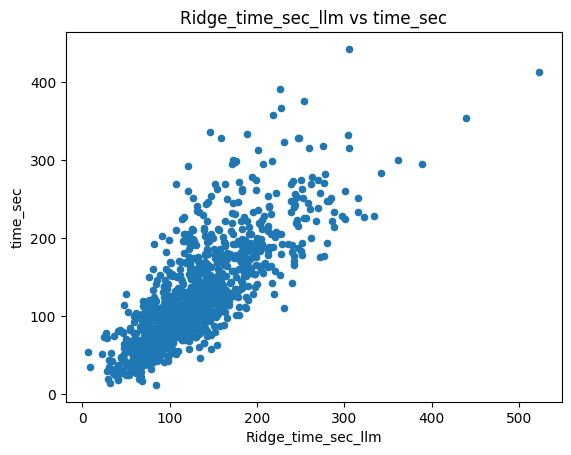

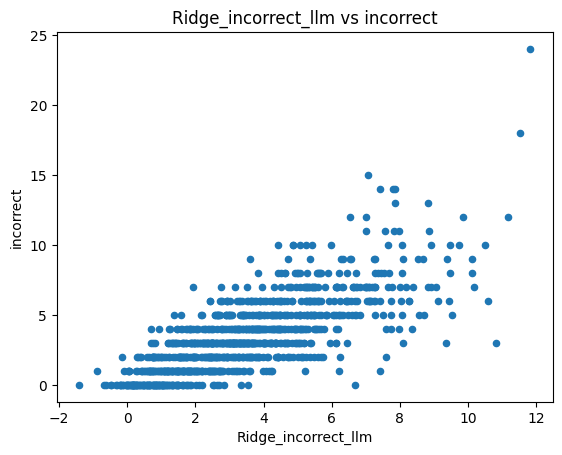

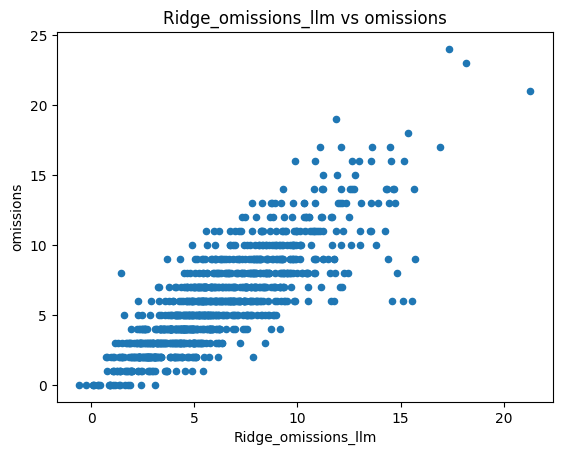

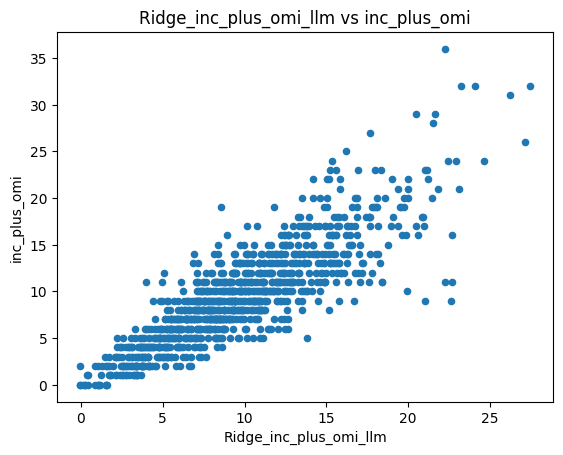

In [ ]:
for target_column in dataset.target_columns:
    metric = get_top_metric_by_validation(dev, target_column, True)
    plot_metric_target_scatterplot(test, metric, target_column)
